<a href="https://colab.research.google.com/github/wallisonferreira/machine-learning-pavic/blob/main/PAVIC_ML_15_PT_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 19: Geração de novas imagens com GANs

## Etapa 1: Importação das bibliotecas

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'2.1.0+cu121'

In [2]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [3]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True,
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

## Etapa 3: Construção do gerador

In [16]:
class gerador(nn.Module):
    def __init__(self):
        super().__init__()
        # 100 -> 32 -> 63 -> 128 -> 784 (28*28)

        self.dense0 = nn.Linear(100, 32)
        self.dense1 = nn.Linear(32, 64)
        self.dense2 = nn.Linear(64, 128)
        self.dense3 = nn.Linear(128, 784)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(F.leaky_relu(self.dense0(x), 0.2))
        x = self.dropout(F.leaky_relu(self.dense1(x), 0.2))
        x = self.dropout(F.leaky_relu(self.dense2(x), 0.2))
        x = torch.tanh(self.dense3(x)) # last dense layer -> tanh: [-1, 1]
        x = x.view(x.shape[0], 28, 28) # transforma o shape para 28 x 28 antes calcular função de custo
        return x


## Etapa 4: Construção do discriminador

In [17]:
class discriminador(nn.Module):
    def __init__(self):
        super().__init__()

        # 784 -> 128 -> 64 -> 32 -> 1

        self.dense0 = nn.Linear(784, 128)
        self.dense1 = nn.Linear(128, 64)
        self.dense2 = nn.Linear(64, 32)
        self.dense3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.shape[0], 28*28)
        x = self.dropout(F.leaky_relu(self.dense0(x), 0.2))
        x = self.dropout(F.leaky_relu(self.dense1(x), 0.2))
        x = self.dropout(F.leaky_relu(self.dense2(x), 0.2))
        x = self.dense3(x)
        return x

## Etapa 5: Criação dos objetos

In [18]:
G = gerador()
D = discriminador()

In [19]:
G_optimizer = optim.Adam(G.parameters(), lr=0.002)
D_optimizer = optim.Adam(D.parameters(), lr=0.002)

In [20]:
# função de custo
criterion = nn.BCEWithLogitsLoss()

In [21]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [22]:
# envia as redes neurais para a GPU
G.to(device)
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

 Epoch: 1 batch: 1 D_loss: 0.471 G_loss: 19.617 
 Epoch: 1 batch: 2 D_loss: 0.471 G_loss: 21.532 
 Epoch: 1 batch: 3 D_loss: 0.423 G_loss: 20.271 
 Epoch: 1 batch: 4 D_loss: 0.387 G_loss: 22.480 
 Epoch: 1 batch: 5 D_loss: 0.378 G_loss: 23.502 
 Epoch: 1 batch: 6 D_loss: 0.394 G_loss: 23.605 
 Epoch: 1 batch: 7 D_loss: 0.366 G_loss: 25.329 
 Epoch: 1 batch: 8 D_loss: 0.377 G_loss: 24.274 
 Epoch: 1 batch: 9 D_loss: 0.374 G_loss: 23.597 
 Epoch: 1 batch: 10 D_loss: 0.431 G_loss: 17.923 
 Epoch: 1 batch: 11 D_loss: 0.487 G_loss: 15.622 
 Epoch: 1 batch: 12 D_loss: 0.517 G_loss: 14.112 
 Epoch: 1 batch: 13 D_loss: 0.583 G_loss: 14.232 
 Epoch: 1 batch: 14 D_loss: 0.607 G_loss: 12.570 
 Epoch: 1 batch: 15 D_loss: 0.690 G_loss: 11.066 
 Epoch: 1 batch: 16 D_loss: 0.710 G_loss: 12.454 
 Epoch: 1 batch: 17 D_loss: 0.732 G_loss: 9.807 
 Epoch: 1 batch: 18 D_loss: 0.714 G_loss: 9.046 
 Epoch: 1 batch: 19 D_loss: 0.746 G_loss: 8.127 
 Epoch: 1 batch: 20 D_loss: 0.767 G_loss: 7.517 
 Epoch: 1 bat

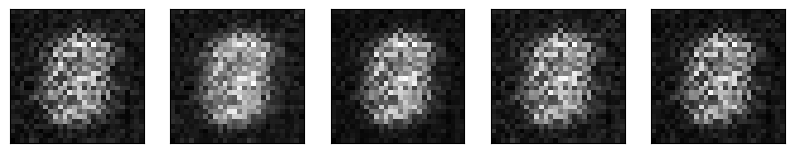

 Epoch: 2 batch: 1 D_loss: 1.072 G_loss: 2.765 
 Epoch: 2 batch: 2 D_loss: 1.030 G_loss: 2.916 
 Epoch: 2 batch: 3 D_loss: 0.961 G_loss: 2.680 
 Epoch: 2 batch: 4 D_loss: 0.844 G_loss: 3.290 
 Epoch: 2 batch: 5 D_loss: 0.844 G_loss: 4.212 
 Epoch: 2 batch: 6 D_loss: 0.770 G_loss: 4.551 
 Epoch: 2 batch: 7 D_loss: 0.746 G_loss: 5.145 
 Epoch: 2 batch: 8 D_loss: 0.803 G_loss: 4.272 
 Epoch: 2 batch: 9 D_loss: 0.794 G_loss: 4.154 
 Epoch: 2 batch: 10 D_loss: 0.730 G_loss: 4.803 
 Epoch: 2 batch: 11 D_loss: 0.800 G_loss: 6.714 
 Epoch: 2 batch: 12 D_loss: 0.820 G_loss: 5.942 
 Epoch: 2 batch: 13 D_loss: 0.751 G_loss: 4.964 
 Epoch: 2 batch: 14 D_loss: 0.881 G_loss: 4.147 
 Epoch: 2 batch: 15 D_loss: 0.872 G_loss: 5.362 
 Epoch: 2 batch: 16 D_loss: 0.841 G_loss: 5.632 
 Epoch: 2 batch: 17 D_loss: 0.839 G_loss: 4.700 
 Epoch: 2 batch: 18 D_loss: 0.843 G_loss: 4.637 
 Epoch: 2 batch: 19 D_loss: 0.949 G_loss: 4.150 
 Epoch: 2 batch: 20 D_loss: 1.071 G_loss: 3.941 
 Epoch: 2 batch: 21 D_loss: 0

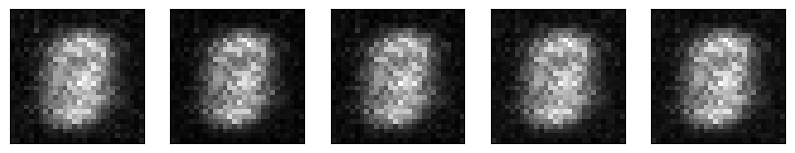

 Epoch: 3 batch: 1 D_loss: 0.901 G_loss: 2.446 
 Epoch: 3 batch: 2 D_loss: 1.060 G_loss: 1.924 
 Epoch: 3 batch: 3 D_loss: 0.986 G_loss: 3.412 
 Epoch: 3 batch: 4 D_loss: 1.212 G_loss: 3.813 
 Epoch: 3 batch: 5 D_loss: 1.199 G_loss: 1.344 
 Epoch: 3 batch: 6 D_loss: 1.256 G_loss: 1.436 
 Epoch: 3 batch: 7 D_loss: 1.543 G_loss: 2.824 
 Epoch: 3 batch: 8 D_loss: 1.310 G_loss: 1.692 
 Epoch: 3 batch: 9 D_loss: 1.434 G_loss: 1.109 
 Epoch: 3 batch: 10 D_loss: 1.389 G_loss: 1.170 
 Epoch: 3 batch: 11 D_loss: 1.247 G_loss: 2.290 
 Epoch: 3 batch: 12 D_loss: 1.367 G_loss: 2.682 
 Epoch: 3 batch: 13 D_loss: 1.185 G_loss: 2.121 
 Epoch: 3 batch: 14 D_loss: 1.190 G_loss: 1.883 
 Epoch: 3 batch: 15 D_loss: 1.100 G_loss: 2.048 
 Epoch: 3 batch: 16 D_loss: 1.133 G_loss: 2.259 
 Epoch: 3 batch: 17 D_loss: 1.139 G_loss: 2.368 
 Epoch: 3 batch: 18 D_loss: 1.129 G_loss: 1.908 
 Epoch: 3 batch: 19 D_loss: 1.123 G_loss: 1.518 
 Epoch: 3 batch: 20 D_loss: 1.165 G_loss: 1.720 
 Epoch: 3 batch: 21 D_loss: 1

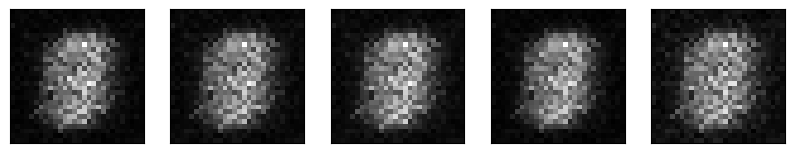

 Epoch: 4 batch: 1 D_loss: 0.912 G_loss: 3.898 
 Epoch: 4 batch: 2 D_loss: 0.816 G_loss: 4.020 
 Epoch: 4 batch: 3 D_loss: 0.864 G_loss: 3.712 
 Epoch: 4 batch: 4 D_loss: 0.833 G_loss: 4.466 
 Epoch: 4 batch: 5 D_loss: 0.884 G_loss: 4.669 
 Epoch: 4 batch: 6 D_loss: 0.879 G_loss: 4.485 
 Epoch: 4 batch: 7 D_loss: 0.863 G_loss: 3.710 
 Epoch: 4 batch: 8 D_loss: 0.903 G_loss: 2.775 
 Epoch: 4 batch: 9 D_loss: 0.994 G_loss: 2.494 
 Epoch: 4 batch: 10 D_loss: 1.022 G_loss: 2.076 
 Epoch: 4 batch: 11 D_loss: 1.160 G_loss: 2.203 
 Epoch: 4 batch: 12 D_loss: 1.165 G_loss: 2.663 
 Epoch: 4 batch: 13 D_loss: 1.280 G_loss: 1.874 
 Epoch: 4 batch: 14 D_loss: 1.356 G_loss: 1.242 
 Epoch: 4 batch: 15 D_loss: 1.441 G_loss: 0.899 
 Epoch: 4 batch: 16 D_loss: 1.524 G_loss: 0.951 
 Epoch: 4 batch: 17 D_loss: 1.485 G_loss: 0.889 
 Epoch: 4 batch: 18 D_loss: 1.579 G_loss: 0.905 
 Epoch: 4 batch: 19 D_loss: 1.579 G_loss: 0.810 
 Epoch: 4 batch: 20 D_loss: 1.579 G_loss: 0.703 
 Epoch: 4 batch: 21 D_loss: 1

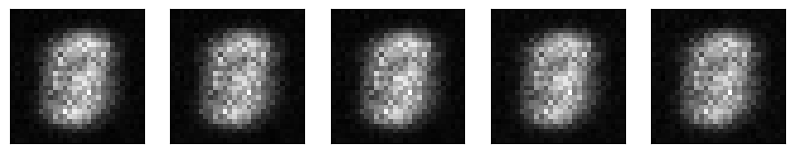

 Epoch: 5 batch: 1 D_loss: 1.314 G_loss: 0.854 
 Epoch: 5 batch: 2 D_loss: 1.304 G_loss: 0.857 
 Epoch: 5 batch: 3 D_loss: 1.305 G_loss: 0.881 
 Epoch: 5 batch: 4 D_loss: 1.296 G_loss: 0.873 
 Epoch: 5 batch: 5 D_loss: 1.285 G_loss: 0.888 
 Epoch: 5 batch: 6 D_loss: 1.290 G_loss: 0.919 
 Epoch: 5 batch: 7 D_loss: 1.277 G_loss: 0.896 
 Epoch: 5 batch: 8 D_loss: 1.253 G_loss: 0.886 
 Epoch: 5 batch: 9 D_loss: 1.261 G_loss: 0.917 
 Epoch: 5 batch: 10 D_loss: 1.266 G_loss: 0.936 
 Epoch: 5 batch: 11 D_loss: 1.241 G_loss: 0.941 
 Epoch: 5 batch: 12 D_loss: 1.226 G_loss: 0.940 
 Epoch: 5 batch: 13 D_loss: 1.221 G_loss: 0.988 
 Epoch: 5 batch: 14 D_loss: 1.195 G_loss: 0.975 
 Epoch: 5 batch: 15 D_loss: 1.205 G_loss: 0.980 
 Epoch: 5 batch: 16 D_loss: 1.193 G_loss: 1.029 
 Epoch: 5 batch: 17 D_loss: 1.188 G_loss: 1.009 
 Epoch: 5 batch: 18 D_loss: 1.144 G_loss: 1.070 
 Epoch: 5 batch: 19 D_loss: 1.164 G_loss: 1.111 
 Epoch: 5 batch: 20 D_loss: 1.093 G_loss: 1.110 
 Epoch: 5 batch: 21 D_loss: 1

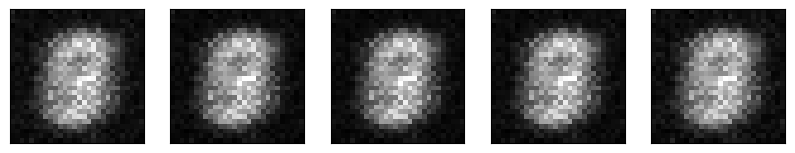

 Epoch: 6 batch: 1 D_loss: 0.967 G_loss: 1.761 
 Epoch: 6 batch: 2 D_loss: 0.989 G_loss: 2.071 
 Epoch: 6 batch: 3 D_loss: 1.205 G_loss: 3.269 
 Epoch: 6 batch: 4 D_loss: 1.157 G_loss: 2.381 
 Epoch: 6 batch: 5 D_loss: 1.182 G_loss: 1.354 
 Epoch: 6 batch: 6 D_loss: 1.277 G_loss: 1.074 
 Epoch: 6 batch: 7 D_loss: 1.226 G_loss: 1.335 
 Epoch: 6 batch: 8 D_loss: 1.203 G_loss: 1.613 
 Epoch: 6 batch: 9 D_loss: 1.195 G_loss: 2.093 
 Epoch: 6 batch: 10 D_loss: 1.080 G_loss: 2.022 
 Epoch: 6 batch: 11 D_loss: 1.061 G_loss: 2.205 
 Epoch: 6 batch: 12 D_loss: 0.899 G_loss: 2.193 
 Epoch: 6 batch: 13 D_loss: 0.787 G_loss: 3.409 
 Epoch: 6 batch: 14 D_loss: 0.928 G_loss: 4.409 
 Epoch: 6 batch: 15 D_loss: 0.724 G_loss: 4.142 
 Epoch: 6 batch: 16 D_loss: 0.719 G_loss: 3.962 
 Epoch: 6 batch: 17 D_loss: 0.700 G_loss: 3.839 
 Epoch: 6 batch: 18 D_loss: 0.602 G_loss: 4.378 
 Epoch: 6 batch: 19 D_loss: 0.634 G_loss: 5.137 
 Epoch: 6 batch: 20 D_loss: 0.640 G_loss: 5.573 
 Epoch: 6 batch: 21 D_loss: 0

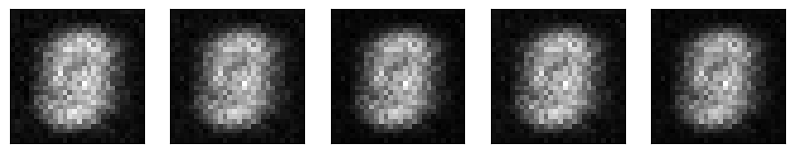

 Epoch: 7 batch: 1 D_loss: 1.054 G_loss: 1.624 
 Epoch: 7 batch: 2 D_loss: 1.018 G_loss: 1.692 
 Epoch: 7 batch: 3 D_loss: 0.929 G_loss: 1.768 
 Epoch: 7 batch: 4 D_loss: 0.965 G_loss: 1.708 
 Epoch: 7 batch: 5 D_loss: 0.973 G_loss: 1.790 
 Epoch: 7 batch: 6 D_loss: 0.949 G_loss: 1.803 
 Epoch: 7 batch: 7 D_loss: 0.971 G_loss: 1.918 
 Epoch: 7 batch: 8 D_loss: 1.034 G_loss: 1.781 
 Epoch: 7 batch: 9 D_loss: 1.055 G_loss: 1.704 
 Epoch: 7 batch: 10 D_loss: 0.974 G_loss: 1.305 
 Epoch: 7 batch: 11 D_loss: 1.099 G_loss: 1.267 
 Epoch: 7 batch: 12 D_loss: 1.018 G_loss: 1.302 
 Epoch: 7 batch: 13 D_loss: 1.044 G_loss: 1.527 
 Epoch: 7 batch: 14 D_loss: 1.102 G_loss: 1.735 
 Epoch: 7 batch: 15 D_loss: 1.129 G_loss: 1.552 
 Epoch: 7 batch: 16 D_loss: 1.129 G_loss: 1.427 
 Epoch: 7 batch: 17 D_loss: 1.248 G_loss: 1.267 
 Epoch: 7 batch: 18 D_loss: 1.172 G_loss: 1.004 
 Epoch: 7 batch: 19 D_loss: 1.245 G_loss: 0.891 
 Epoch: 7 batch: 20 D_loss: 1.266 G_loss: 0.871 
 Epoch: 7 batch: 21 D_loss: 1

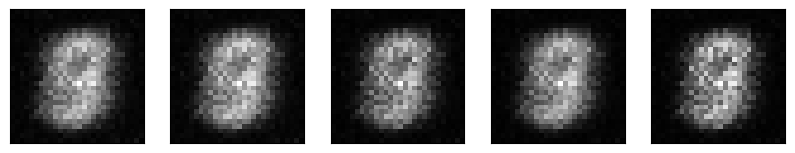

 Epoch: 8 batch: 1 D_loss: 1.124 G_loss: 0.938 
 Epoch: 8 batch: 2 D_loss: 1.117 G_loss: 0.938 
 Epoch: 8 batch: 3 D_loss: 1.179 G_loss: 0.976 
 Epoch: 8 batch: 4 D_loss: 1.150 G_loss: 0.958 
 Epoch: 8 batch: 5 D_loss: 1.142 G_loss: 0.989 
 Epoch: 8 batch: 6 D_loss: 1.165 G_loss: 0.998 
 Epoch: 8 batch: 7 D_loss: 1.151 G_loss: 0.995 
 Epoch: 8 batch: 8 D_loss: 1.142 G_loss: 1.027 
 Epoch: 8 batch: 9 D_loss: 1.094 G_loss: 1.042 
 Epoch: 8 batch: 10 D_loss: 1.060 G_loss: 1.058 
 Epoch: 8 batch: 11 D_loss: 1.110 G_loss: 1.080 
 Epoch: 8 batch: 12 D_loss: 1.101 G_loss: 1.090 
 Epoch: 8 batch: 13 D_loss: 1.092 G_loss: 1.118 
 Epoch: 8 batch: 14 D_loss: 1.057 G_loss: 1.131 
 Epoch: 8 batch: 15 D_loss: 1.072 G_loss: 1.150 
 Epoch: 8 batch: 16 D_loss: 1.055 G_loss: 1.138 
 Epoch: 8 batch: 17 D_loss: 1.068 G_loss: 1.175 
 Epoch: 8 batch: 18 D_loss: 1.057 G_loss: 1.211 
 Epoch: 8 batch: 19 D_loss: 1.029 G_loss: 1.254 
 Epoch: 8 batch: 20 D_loss: 0.982 G_loss: 1.311 
 Epoch: 8 batch: 21 D_loss: 1

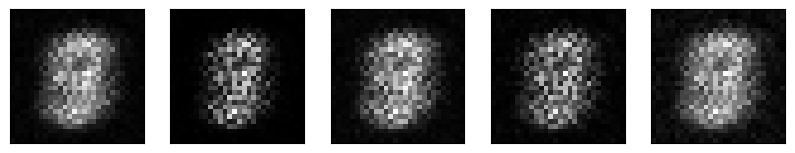

 Epoch: 9 batch: 1 D_loss: 1.043 G_loss: 2.158 
 Epoch: 9 batch: 2 D_loss: 0.982 G_loss: 2.254 
 Epoch: 9 batch: 3 D_loss: 0.976 G_loss: 2.216 
 Epoch: 9 batch: 4 D_loss: 0.850 G_loss: 2.293 
 Epoch: 9 batch: 5 D_loss: 0.893 G_loss: 2.181 
 Epoch: 9 batch: 6 D_loss: 0.896 G_loss: 2.326 
 Epoch: 9 batch: 7 D_loss: 0.955 G_loss: 2.504 
 Epoch: 9 batch: 8 D_loss: 0.987 G_loss: 3.001 
 Epoch: 9 batch: 9 D_loss: 1.097 G_loss: 2.682 
 Epoch: 9 batch: 10 D_loss: 1.191 G_loss: 2.899 
 Epoch: 9 batch: 11 D_loss: 1.308 G_loss: 2.370 
 Epoch: 9 batch: 12 D_loss: 1.378 G_loss: 1.770 
 Epoch: 9 batch: 13 D_loss: 1.292 G_loss: 1.298 
 Epoch: 9 batch: 14 D_loss: 1.308 G_loss: 1.158 
 Epoch: 9 batch: 15 D_loss: 1.237 G_loss: 1.043 
 Epoch: 9 batch: 16 D_loss: 1.151 G_loss: 1.099 
 Epoch: 9 batch: 17 D_loss: 1.092 G_loss: 1.401 
 Epoch: 9 batch: 18 D_loss: 1.064 G_loss: 1.723 
 Epoch: 9 batch: 19 D_loss: 0.970 G_loss: 2.196 
 Epoch: 9 batch: 20 D_loss: 0.977 G_loss: 2.609 
 Epoch: 9 batch: 21 D_loss: 1

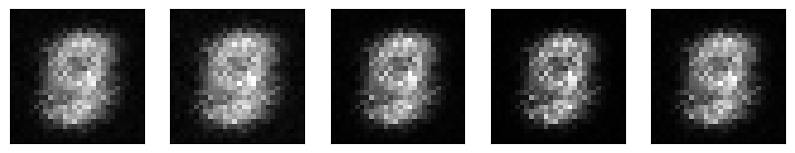

 Epoch: 10 batch: 1 D_loss: 0.948 G_loss: 1.344 
 Epoch: 10 batch: 2 D_loss: 0.935 G_loss: 1.342 
 Epoch: 10 batch: 3 D_loss: 1.016 G_loss: 1.459 
 Epoch: 10 batch: 4 D_loss: 0.934 G_loss: 1.452 
 Epoch: 10 batch: 5 D_loss: 1.002 G_loss: 1.613 
 Epoch: 10 batch: 6 D_loss: 0.951 G_loss: 1.644 
 Epoch: 10 batch: 7 D_loss: 1.004 G_loss: 1.666 
 Epoch: 10 batch: 8 D_loss: 0.965 G_loss: 1.651 
 Epoch: 10 batch: 9 D_loss: 0.939 G_loss: 1.719 
 Epoch: 10 batch: 10 D_loss: 0.918 G_loss: 1.670 
 Epoch: 10 batch: 11 D_loss: 0.868 G_loss: 1.818 
 Epoch: 10 batch: 12 D_loss: 0.938 G_loss: 1.779 
 Epoch: 10 batch: 13 D_loss: 0.900 G_loss: 1.872 
 Epoch: 10 batch: 14 D_loss: 0.893 G_loss: 1.926 
 Epoch: 10 batch: 15 D_loss: 0.950 G_loss: 1.911 
 Epoch: 10 batch: 16 D_loss: 0.894 G_loss: 1.785 
 Epoch: 10 batch: 17 D_loss: 0.890 G_loss: 1.904 
 Epoch: 10 batch: 18 D_loss: 0.898 G_loss: 1.953 
 Epoch: 10 batch: 19 D_loss: 0.967 G_loss: 1.932 
 Epoch: 10 batch: 20 D_loss: 0.890 G_loss: 2.026 
 Epoch: 1

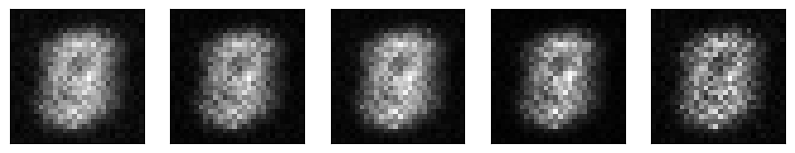

 Epoch: 11 batch: 1 D_loss: 0.868 G_loss: 1.620 
 Epoch: 11 batch: 2 D_loss: 0.867 G_loss: 1.611 
 Epoch: 11 batch: 3 D_loss: 0.888 G_loss: 1.699 
 Epoch: 11 batch: 4 D_loss: 0.834 G_loss: 1.701 
 Epoch: 11 batch: 5 D_loss: 0.831 G_loss: 1.708 
 Epoch: 11 batch: 6 D_loss: 0.894 G_loss: 1.765 
 Epoch: 11 batch: 7 D_loss: 0.869 G_loss: 1.821 
 Epoch: 11 batch: 8 D_loss: 0.927 G_loss: 1.829 
 Epoch: 11 batch: 9 D_loss: 0.899 G_loss: 1.931 
 Epoch: 11 batch: 10 D_loss: 0.886 G_loss: 1.949 
 Epoch: 11 batch: 11 D_loss: 0.909 G_loss: 1.804 
 Epoch: 11 batch: 12 D_loss: 0.948 G_loss: 1.806 
 Epoch: 11 batch: 13 D_loss: 0.944 G_loss: 1.770 
 Epoch: 11 batch: 14 D_loss: 0.964 G_loss: 1.741 
 Epoch: 11 batch: 15 D_loss: 0.990 G_loss: 1.592 
 Epoch: 11 batch: 16 D_loss: 0.921 G_loss: 1.503 
 Epoch: 11 batch: 17 D_loss: 1.000 G_loss: 1.471 
 Epoch: 11 batch: 18 D_loss: 0.925 G_loss: 1.382 
 Epoch: 11 batch: 19 D_loss: 0.928 G_loss: 1.475 
 Epoch: 11 batch: 20 D_loss: 0.945 G_loss: 1.317 
 Epoch: 1

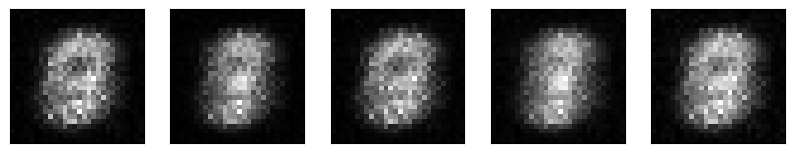

 Epoch: 12 batch: 1 D_loss: 0.851 G_loss: 1.576 
 Epoch: 12 batch: 2 D_loss: 0.825 G_loss: 1.592 
 Epoch: 12 batch: 3 D_loss: 0.843 G_loss: 1.764 
 Epoch: 12 batch: 4 D_loss: 0.797 G_loss: 1.922 
 Epoch: 12 batch: 5 D_loss: 0.742 G_loss: 2.256 
 Epoch: 12 batch: 6 D_loss: 0.763 G_loss: 2.730 
 Epoch: 12 batch: 7 D_loss: 0.807 G_loss: 3.264 
 Epoch: 12 batch: 8 D_loss: 0.871 G_loss: 3.418 
 Epoch: 12 batch: 9 D_loss: 0.870 G_loss: 2.964 
 Epoch: 12 batch: 10 D_loss: 0.837 G_loss: 2.471 
 Epoch: 12 batch: 11 D_loss: 0.829 G_loss: 2.119 
 Epoch: 12 batch: 12 D_loss: 0.864 G_loss: 2.070 
 Epoch: 12 batch: 13 D_loss: 0.869 G_loss: 1.956 
 Epoch: 12 batch: 14 D_loss: 0.888 G_loss: 2.287 
 Epoch: 12 batch: 15 D_loss: 0.964 G_loss: 2.621 
 Epoch: 12 batch: 16 D_loss: 0.941 G_loss: 2.134 
 Epoch: 12 batch: 17 D_loss: 0.968 G_loss: 1.780 
 Epoch: 12 batch: 18 D_loss: 0.966 G_loss: 1.576 
 Epoch: 12 batch: 19 D_loss: 1.031 G_loss: 1.409 
 Epoch: 12 batch: 20 D_loss: 0.957 G_loss: 1.512 
 Epoch: 1

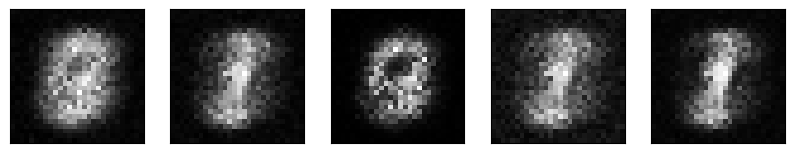

 Epoch: 13 batch: 1 D_loss: 1.093 G_loss: 1.279 
 Epoch: 13 batch: 2 D_loss: 1.160 G_loss: 1.258 
 Epoch: 13 batch: 3 D_loss: 1.064 G_loss: 1.247 
 Epoch: 13 batch: 4 D_loss: 1.086 G_loss: 1.262 
 Epoch: 13 batch: 5 D_loss: 1.087 G_loss: 1.306 
 Epoch: 13 batch: 6 D_loss: 1.094 G_loss: 1.361 
 Epoch: 13 batch: 7 D_loss: 1.087 G_loss: 1.546 
 Epoch: 13 batch: 8 D_loss: 1.112 G_loss: 1.591 
 Epoch: 13 batch: 9 D_loss: 1.049 G_loss: 1.577 
 Epoch: 13 batch: 10 D_loss: 1.070 G_loss: 1.550 
 Epoch: 13 batch: 11 D_loss: 1.120 G_loss: 1.521 
 Epoch: 13 batch: 12 D_loss: 1.024 G_loss: 1.432 
 Epoch: 13 batch: 13 D_loss: 1.122 G_loss: 1.640 
 Epoch: 13 batch: 14 D_loss: 1.180 G_loss: 1.731 
 Epoch: 13 batch: 15 D_loss: 1.091 G_loss: 1.593 
 Epoch: 13 batch: 16 D_loss: 1.097 G_loss: 1.407 
 Epoch: 13 batch: 17 D_loss: 1.074 G_loss: 1.563 
 Epoch: 13 batch: 18 D_loss: 1.010 G_loss: 1.774 
 Epoch: 13 batch: 19 D_loss: 1.002 G_loss: 1.866 
 Epoch: 13 batch: 20 D_loss: 0.997 G_loss: 2.371 
 Epoch: 1

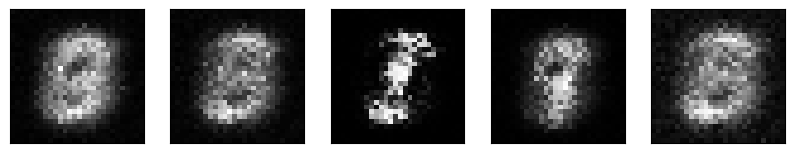

 Epoch: 14 batch: 1 D_loss: 0.994 G_loss: 1.558 
 Epoch: 14 batch: 2 D_loss: 1.011 G_loss: 1.454 
 Epoch: 14 batch: 3 D_loss: 1.011 G_loss: 1.519 
 Epoch: 14 batch: 4 D_loss: 0.993 G_loss: 1.920 
 Epoch: 14 batch: 5 D_loss: 0.974 G_loss: 2.368 
 Epoch: 14 batch: 6 D_loss: 1.001 G_loss: 2.349 
 Epoch: 14 batch: 7 D_loss: 1.032 G_loss: 2.551 
 Epoch: 14 batch: 8 D_loss: 1.030 G_loss: 2.402 
 Epoch: 14 batch: 9 D_loss: 0.969 G_loss: 2.098 
 Epoch: 14 batch: 10 D_loss: 0.943 G_loss: 1.952 
 Epoch: 14 batch: 11 D_loss: 1.009 G_loss: 1.875 
 Epoch: 14 batch: 12 D_loss: 1.004 G_loss: 1.673 
 Epoch: 14 batch: 13 D_loss: 1.052 G_loss: 1.912 
 Epoch: 14 batch: 14 D_loss: 1.092 G_loss: 1.935 
 Epoch: 14 batch: 15 D_loss: 1.057 G_loss: 1.898 
 Epoch: 14 batch: 16 D_loss: 1.159 G_loss: 1.813 
 Epoch: 14 batch: 17 D_loss: 1.078 G_loss: 1.491 
 Epoch: 14 batch: 18 D_loss: 1.132 G_loss: 1.439 
 Epoch: 14 batch: 19 D_loss: 1.146 G_loss: 1.219 
 Epoch: 14 batch: 20 D_loss: 1.126 G_loss: 1.160 
 Epoch: 1

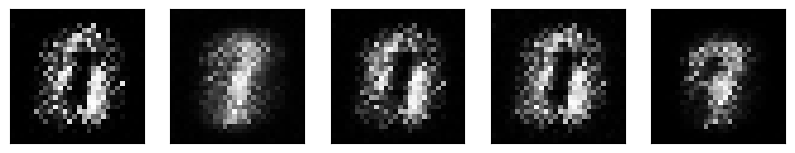

 Epoch: 15 batch: 1 D_loss: 0.883 G_loss: 3.270 
 Epoch: 15 batch: 2 D_loss: 0.867 G_loss: 2.838 
 Epoch: 15 batch: 3 D_loss: 0.879 G_loss: 2.477 
 Epoch: 15 batch: 4 D_loss: 0.837 G_loss: 2.197 
 Epoch: 15 batch: 5 D_loss: 0.917 G_loss: 2.570 
 Epoch: 15 batch: 6 D_loss: 0.955 G_loss: 2.888 
 Epoch: 15 batch: 7 D_loss: 0.834 G_loss: 2.940 
 Epoch: 15 batch: 8 D_loss: 0.838 G_loss: 2.929 
 Epoch: 15 batch: 9 D_loss: 0.824 G_loss: 2.913 
 Epoch: 15 batch: 10 D_loss: 0.795 G_loss: 2.938 
 Epoch: 15 batch: 11 D_loss: 0.762 G_loss: 3.294 
 Epoch: 15 batch: 12 D_loss: 0.708 G_loss: 4.101 
 Epoch: 15 batch: 13 D_loss: 0.724 G_loss: 4.588 
 Epoch: 15 batch: 14 D_loss: 0.762 G_loss: 5.267 
 Epoch: 15 batch: 15 D_loss: 0.695 G_loss: 5.033 
 Epoch: 15 batch: 16 D_loss: 0.871 G_loss: 4.709 
 Epoch: 15 batch: 17 D_loss: 0.806 G_loss: 3.488 
 Epoch: 15 batch: 18 D_loss: 0.866 G_loss: 3.480 
 Epoch: 15 batch: 19 D_loss: 0.889 G_loss: 3.279 
 Epoch: 15 batch: 20 D_loss: 1.002 G_loss: 2.992 
 Epoch: 1

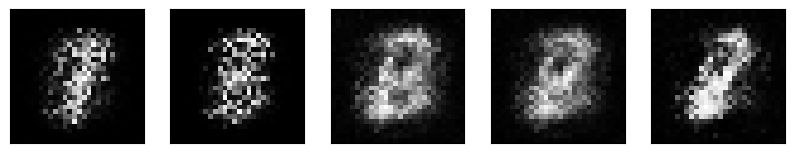

 Epoch: 16 batch: 1 D_loss: 1.113 G_loss: 3.192 
 Epoch: 16 batch: 2 D_loss: 1.091 G_loss: 3.303 
 Epoch: 16 batch: 3 D_loss: 1.186 G_loss: 2.729 
 Epoch: 16 batch: 4 D_loss: 1.166 G_loss: 2.311 
 Epoch: 16 batch: 5 D_loss: 1.268 G_loss: 1.997 
 Epoch: 16 batch: 6 D_loss: 1.266 G_loss: 1.586 
 Epoch: 16 batch: 7 D_loss: 1.335 G_loss: 1.384 
 Epoch: 16 batch: 8 D_loss: 1.292 G_loss: 0.986 
 Epoch: 16 batch: 9 D_loss: 1.267 G_loss: 0.946 
 Epoch: 16 batch: 10 D_loss: 1.318 G_loss: 1.070 
 Epoch: 16 batch: 11 D_loss: 1.225 G_loss: 1.066 
 Epoch: 16 batch: 12 D_loss: 1.233 G_loss: 1.131 
 Epoch: 16 batch: 13 D_loss: 1.227 G_loss: 1.149 
 Epoch: 16 batch: 14 D_loss: 1.216 G_loss: 1.086 
 Epoch: 16 batch: 15 D_loss: 1.151 G_loss: 1.155 
 Epoch: 16 batch: 16 D_loss: 1.240 G_loss: 1.126 
 Epoch: 16 batch: 17 D_loss: 1.130 G_loss: 1.121 
 Epoch: 16 batch: 18 D_loss: 1.085 G_loss: 1.164 
 Epoch: 16 batch: 19 D_loss: 1.108 G_loss: 1.303 
 Epoch: 16 batch: 20 D_loss: 1.081 G_loss: 1.440 
 Epoch: 1

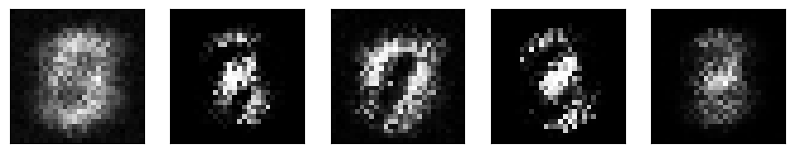

 Epoch: 17 batch: 1 D_loss: 1.001 G_loss: 2.369 
 Epoch: 17 batch: 2 D_loss: 1.066 G_loss: 2.496 
 Epoch: 17 batch: 3 D_loss: 1.077 G_loss: 1.911 
 Epoch: 17 batch: 4 D_loss: 1.041 G_loss: 1.800 
 Epoch: 17 batch: 5 D_loss: 1.106 G_loss: 1.536 
 Epoch: 17 batch: 6 D_loss: 1.043 G_loss: 1.569 
 Epoch: 17 batch: 7 D_loss: 1.045 G_loss: 1.833 
 Epoch: 17 batch: 8 D_loss: 1.061 G_loss: 2.042 
 Epoch: 17 batch: 9 D_loss: 1.206 G_loss: 2.344 
 Epoch: 17 batch: 10 D_loss: 1.000 G_loss: 2.101 
 Epoch: 17 batch: 11 D_loss: 1.078 G_loss: 1.749 
 Epoch: 17 batch: 12 D_loss: 1.079 G_loss: 1.595 
 Epoch: 17 batch: 13 D_loss: 1.033 G_loss: 1.598 
 Epoch: 17 batch: 14 D_loss: 1.048 G_loss: 1.889 
 Epoch: 17 batch: 15 D_loss: 1.143 G_loss: 2.178 
 Epoch: 17 batch: 16 D_loss: 1.103 G_loss: 2.322 
 Epoch: 17 batch: 17 D_loss: 1.101 G_loss: 1.898 
 Epoch: 17 batch: 18 D_loss: 1.069 G_loss: 1.671 
 Epoch: 17 batch: 19 D_loss: 1.174 G_loss: 1.608 
 Epoch: 17 batch: 20 D_loss: 1.093 G_loss: 1.625 
 Epoch: 1

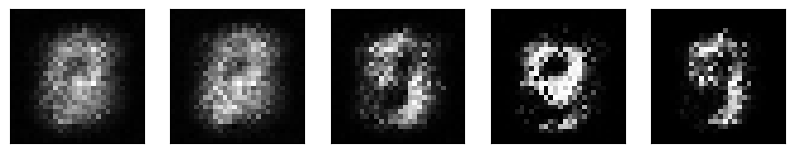

 Epoch: 18 batch: 1 D_loss: 1.356 G_loss: 2.096 
 Epoch: 18 batch: 2 D_loss: 1.158 G_loss: 1.607 
 Epoch: 18 batch: 3 D_loss: 1.135 G_loss: 1.278 
 Epoch: 18 batch: 4 D_loss: 1.110 G_loss: 1.152 
 Epoch: 18 batch: 5 D_loss: 1.141 G_loss: 1.137 
 Epoch: 18 batch: 6 D_loss: 1.105 G_loss: 1.187 
 Epoch: 18 batch: 7 D_loss: 1.166 G_loss: 1.233 
 Epoch: 18 batch: 8 D_loss: 1.153 G_loss: 1.283 
 Epoch: 18 batch: 9 D_loss: 1.210 G_loss: 1.368 
 Epoch: 18 batch: 10 D_loss: 1.053 G_loss: 1.371 
 Epoch: 18 batch: 11 D_loss: 1.119 G_loss: 1.307 
 Epoch: 18 batch: 12 D_loss: 1.040 G_loss: 1.300 
 Epoch: 18 batch: 13 D_loss: 1.106 G_loss: 1.324 
 Epoch: 18 batch: 14 D_loss: 1.016 G_loss: 1.309 
 Epoch: 18 batch: 15 D_loss: 1.037 G_loss: 1.325 
 Epoch: 18 batch: 16 D_loss: 0.982 G_loss: 1.439 
 Epoch: 18 batch: 17 D_loss: 0.984 G_loss: 1.618 
 Epoch: 18 batch: 18 D_loss: 1.034 G_loss: 2.006 
 Epoch: 18 batch: 19 D_loss: 0.983 G_loss: 1.974 
 Epoch: 18 batch: 20 D_loss: 0.953 G_loss: 2.017 
 Epoch: 1

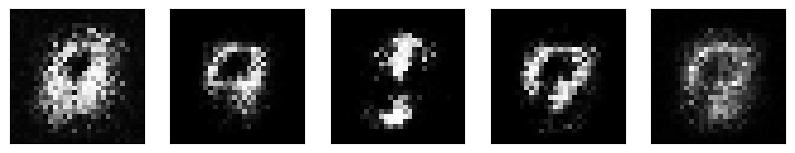

 Epoch: 19 batch: 1 D_loss: 1.043 G_loss: 2.245 
 Epoch: 19 batch: 2 D_loss: 1.019 G_loss: 1.993 
 Epoch: 19 batch: 3 D_loss: 1.015 G_loss: 1.849 
 Epoch: 19 batch: 4 D_loss: 1.036 G_loss: 1.980 
 Epoch: 19 batch: 5 D_loss: 0.996 G_loss: 1.975 
 Epoch: 19 batch: 6 D_loss: 1.003 G_loss: 2.035 
 Epoch: 19 batch: 7 D_loss: 1.038 G_loss: 2.310 
 Epoch: 19 batch: 8 D_loss: 1.038 G_loss: 2.217 
 Epoch: 19 batch: 9 D_loss: 1.049 G_loss: 1.863 
 Epoch: 19 batch: 10 D_loss: 1.039 G_loss: 1.763 
 Epoch: 19 batch: 11 D_loss: 1.077 G_loss: 1.649 
 Epoch: 19 batch: 12 D_loss: 1.014 G_loss: 1.785 
 Epoch: 19 batch: 13 D_loss: 1.097 G_loss: 1.841 
 Epoch: 19 batch: 14 D_loss: 1.039 G_loss: 1.799 
 Epoch: 19 batch: 15 D_loss: 1.082 G_loss: 1.627 
 Epoch: 19 batch: 16 D_loss: 1.018 G_loss: 1.697 
 Epoch: 19 batch: 17 D_loss: 1.052 G_loss: 1.641 
 Epoch: 19 batch: 18 D_loss: 1.105 G_loss: 1.986 
 Epoch: 19 batch: 19 D_loss: 1.078 G_loss: 1.918 
 Epoch: 19 batch: 20 D_loss: 1.059 G_loss: 1.608 
 Epoch: 1

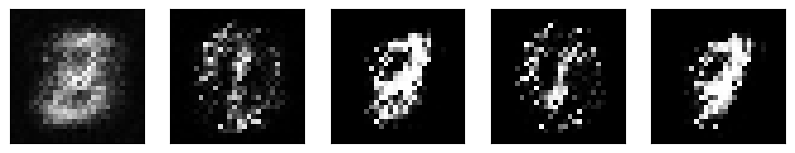

 Epoch: 20 batch: 1 D_loss: 1.024 G_loss: 2.045 
 Epoch: 20 batch: 2 D_loss: 1.141 G_loss: 1.592 
 Epoch: 20 batch: 3 D_loss: 1.118 G_loss: 1.555 
 Epoch: 20 batch: 4 D_loss: 1.109 G_loss: 1.753 
 Epoch: 20 batch: 5 D_loss: 1.225 G_loss: 1.838 
 Epoch: 20 batch: 6 D_loss: 1.203 G_loss: 1.864 
 Epoch: 20 batch: 7 D_loss: 1.193 G_loss: 1.691 
 Epoch: 20 batch: 8 D_loss: 1.193 G_loss: 1.458 
 Epoch: 20 batch: 9 D_loss: 1.252 G_loss: 1.331 
 Epoch: 20 batch: 10 D_loss: 1.160 G_loss: 1.335 
 Epoch: 20 batch: 11 D_loss: 1.152 G_loss: 1.336 
 Epoch: 20 batch: 12 D_loss: 1.130 G_loss: 1.386 
 Epoch: 20 batch: 13 D_loss: 1.151 G_loss: 1.629 
 Epoch: 20 batch: 14 D_loss: 1.180 G_loss: 1.734 
 Epoch: 20 batch: 15 D_loss: 1.145 G_loss: 1.693 
 Epoch: 20 batch: 16 D_loss: 1.171 G_loss: 1.499 
 Epoch: 20 batch: 17 D_loss: 1.178 G_loss: 1.453 
 Epoch: 20 batch: 18 D_loss: 1.150 G_loss: 1.450 
 Epoch: 20 batch: 19 D_loss: 1.181 G_loss: 1.338 
 Epoch: 20 batch: 20 D_loss: 1.204 G_loss: 1.434 
 Epoch: 2

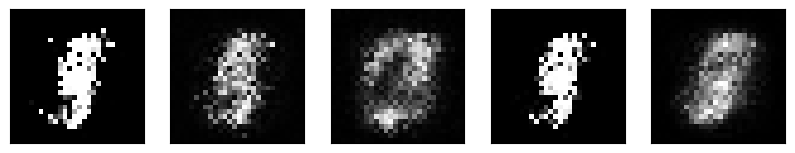

 Epoch: 21 batch: 1 D_loss: 1.192 G_loss: 1.402 
 Epoch: 21 batch: 2 D_loss: 1.215 G_loss: 1.423 
 Epoch: 21 batch: 3 D_loss: 1.238 G_loss: 1.389 
 Epoch: 21 batch: 4 D_loss: 1.203 G_loss: 1.376 
 Epoch: 21 batch: 5 D_loss: 1.287 G_loss: 1.414 
 Epoch: 21 batch: 6 D_loss: 1.270 G_loss: 1.302 
 Epoch: 21 batch: 7 D_loss: 1.216 G_loss: 1.090 
 Epoch: 21 batch: 8 D_loss: 1.265 G_loss: 1.217 
 Epoch: 21 batch: 9 D_loss: 1.190 G_loss: 1.187 
 Epoch: 21 batch: 10 D_loss: 1.157 G_loss: 1.321 
 Epoch: 21 batch: 11 D_loss: 1.181 G_loss: 1.459 
 Epoch: 21 batch: 12 D_loss: 1.147 G_loss: 1.583 
 Epoch: 21 batch: 13 D_loss: 1.226 G_loss: 1.575 
 Epoch: 21 batch: 14 D_loss: 1.133 G_loss: 1.550 
 Epoch: 21 batch: 15 D_loss: 1.093 G_loss: 1.467 
 Epoch: 21 batch: 16 D_loss: 1.121 G_loss: 1.330 
 Epoch: 21 batch: 17 D_loss: 1.172 G_loss: 1.426 
 Epoch: 21 batch: 18 D_loss: 1.119 G_loss: 1.467 
 Epoch: 21 batch: 19 D_loss: 1.228 G_loss: 1.419 
 Epoch: 21 batch: 20 D_loss: 1.098 G_loss: 1.727 
 Epoch: 2

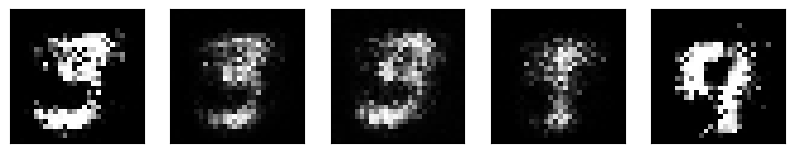

 Epoch: 22 batch: 1 D_loss: 1.050 G_loss: 1.927 
 Epoch: 22 batch: 2 D_loss: 0.995 G_loss: 1.720 
 Epoch: 22 batch: 3 D_loss: 1.088 G_loss: 1.744 
 Epoch: 22 batch: 4 D_loss: 1.084 G_loss: 2.043 
 Epoch: 22 batch: 5 D_loss: 1.183 G_loss: 2.274 
 Epoch: 22 batch: 6 D_loss: 1.119 G_loss: 2.165 
 Epoch: 22 batch: 7 D_loss: 1.185 G_loss: 1.744 
 Epoch: 22 batch: 8 D_loss: 1.174 G_loss: 1.491 
 Epoch: 22 batch: 9 D_loss: 1.251 G_loss: 1.545 
 Epoch: 22 batch: 10 D_loss: 1.167 G_loss: 1.606 
 Epoch: 22 batch: 11 D_loss: 1.241 G_loss: 1.572 
 Epoch: 22 batch: 12 D_loss: 1.187 G_loss: 1.570 
 Epoch: 22 batch: 13 D_loss: 1.246 G_loss: 1.221 
 Epoch: 22 batch: 14 D_loss: 1.241 G_loss: 1.313 
 Epoch: 22 batch: 15 D_loss: 1.217 G_loss: 1.237 
 Epoch: 22 batch: 16 D_loss: 1.231 G_loss: 1.378 
 Epoch: 22 batch: 17 D_loss: 1.144 G_loss: 1.426 
 Epoch: 22 batch: 18 D_loss: 1.109 G_loss: 1.545 
 Epoch: 22 batch: 19 D_loss: 1.111 G_loss: 1.583 
 Epoch: 22 batch: 20 D_loss: 1.111 G_loss: 1.719 
 Epoch: 2

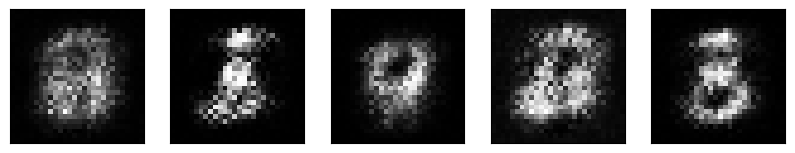

 Epoch: 23 batch: 1 D_loss: 1.188 G_loss: 1.395 
 Epoch: 23 batch: 2 D_loss: 1.162 G_loss: 1.425 
 Epoch: 23 batch: 3 D_loss: 1.223 G_loss: 1.350 
 Epoch: 23 batch: 4 D_loss: 1.226 G_loss: 1.383 
 Epoch: 23 batch: 5 D_loss: 1.239 G_loss: 1.235 
 Epoch: 23 batch: 6 D_loss: 1.178 G_loss: 1.248 
 Epoch: 23 batch: 7 D_loss: 1.195 G_loss: 1.169 
 Epoch: 23 batch: 8 D_loss: 1.216 G_loss: 1.265 
 Epoch: 23 batch: 9 D_loss: 1.252 G_loss: 1.221 
 Epoch: 23 batch: 10 D_loss: 1.132 G_loss: 1.253 
 Epoch: 23 batch: 11 D_loss: 1.180 G_loss: 1.259 
 Epoch: 23 batch: 12 D_loss: 1.176 G_loss: 1.238 
 Epoch: 23 batch: 13 D_loss: 1.129 G_loss: 1.270 
 Epoch: 23 batch: 14 D_loss: 1.160 G_loss: 1.390 
 Epoch: 23 batch: 15 D_loss: 1.201 G_loss: 1.359 
 Epoch: 23 batch: 16 D_loss: 1.127 G_loss: 1.416 
 Epoch: 23 batch: 17 D_loss: 1.100 G_loss: 1.249 
 Epoch: 23 batch: 18 D_loss: 1.123 G_loss: 1.274 
 Epoch: 23 batch: 19 D_loss: 1.098 G_loss: 1.523 
 Epoch: 23 batch: 20 D_loss: 1.076 G_loss: 1.662 
 Epoch: 2

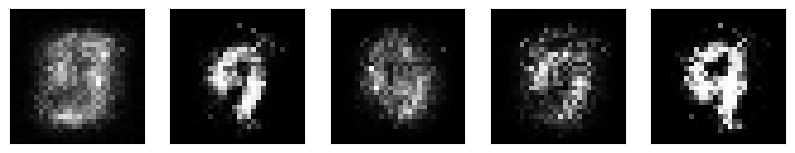

 Epoch: 24 batch: 1 D_loss: 1.085 G_loss: 1.845 
 Epoch: 24 batch: 2 D_loss: 1.062 G_loss: 1.647 
 Epoch: 24 batch: 3 D_loss: 1.124 G_loss: 1.325 
 Epoch: 24 batch: 4 D_loss: 1.150 G_loss: 1.218 
 Epoch: 24 batch: 5 D_loss: 1.118 G_loss: 1.247 
 Epoch: 24 batch: 6 D_loss: 1.125 G_loss: 1.476 
 Epoch: 24 batch: 7 D_loss: 1.132 G_loss: 1.521 
 Epoch: 24 batch: 8 D_loss: 1.098 G_loss: 1.583 
 Epoch: 24 batch: 9 D_loss: 1.133 G_loss: 1.438 
 Epoch: 24 batch: 10 D_loss: 1.042 G_loss: 1.286 
 Epoch: 24 batch: 11 D_loss: 1.158 G_loss: 1.156 
 Epoch: 24 batch: 12 D_loss: 1.166 G_loss: 1.281 
 Epoch: 24 batch: 13 D_loss: 1.142 G_loss: 1.316 
 Epoch: 24 batch: 14 D_loss: 1.182 G_loss: 1.537 
 Epoch: 24 batch: 15 D_loss: 1.142 G_loss: 1.465 
 Epoch: 24 batch: 16 D_loss: 1.133 G_loss: 1.423 
 Epoch: 24 batch: 17 D_loss: 1.078 G_loss: 1.291 
 Epoch: 24 batch: 18 D_loss: 1.072 G_loss: 1.239 
 Epoch: 24 batch: 19 D_loss: 1.065 G_loss: 1.251 
 Epoch: 24 batch: 20 D_loss: 1.100 G_loss: 1.520 
 Epoch: 2

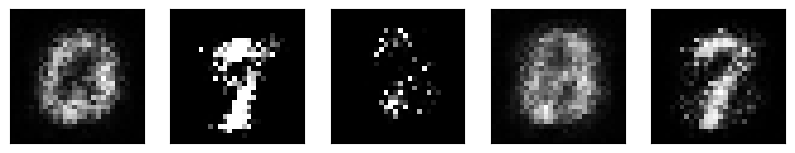

 Epoch: 25 batch: 1 D_loss: 1.185 G_loss: 1.270 
 Epoch: 25 batch: 2 D_loss: 1.071 G_loss: 1.268 
 Epoch: 25 batch: 3 D_loss: 1.141 G_loss: 1.332 
 Epoch: 25 batch: 4 D_loss: 1.102 G_loss: 1.281 
 Epoch: 25 batch: 5 D_loss: 1.138 G_loss: 1.352 
 Epoch: 25 batch: 6 D_loss: 1.142 G_loss: 1.423 
 Epoch: 25 batch: 7 D_loss: 1.095 G_loss: 1.531 
 Epoch: 25 batch: 8 D_loss: 1.148 G_loss: 1.662 
 Epoch: 25 batch: 9 D_loss: 1.110 G_loss: 1.620 
 Epoch: 25 batch: 10 D_loss: 0.998 G_loss: 1.693 
 Epoch: 25 batch: 11 D_loss: 1.048 G_loss: 1.691 
 Epoch: 25 batch: 12 D_loss: 1.057 G_loss: 1.937 
 Epoch: 25 batch: 13 D_loss: 1.049 G_loss: 2.566 
 Epoch: 25 batch: 14 D_loss: 1.074 G_loss: 2.074 
 Epoch: 25 batch: 15 D_loss: 1.137 G_loss: 1.729 
 Epoch: 25 batch: 16 D_loss: 1.090 G_loss: 1.650 
 Epoch: 25 batch: 17 D_loss: 1.122 G_loss: 1.524 
 Epoch: 25 batch: 18 D_loss: 1.130 G_loss: 1.701 
 Epoch: 25 batch: 19 D_loss: 1.106 G_loss: 1.593 
 Epoch: 25 batch: 20 D_loss: 1.229 G_loss: 1.656 
 Epoch: 2

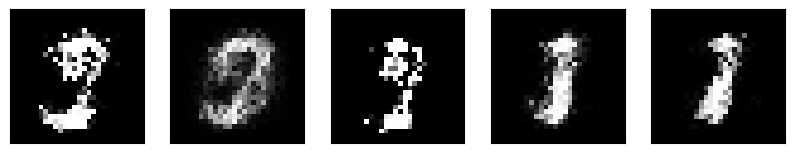

 Epoch: 26 batch: 1 D_loss: 1.099 G_loss: 1.738 
 Epoch: 26 batch: 2 D_loss: 1.022 G_loss: 1.659 
 Epoch: 26 batch: 3 D_loss: 1.101 G_loss: 1.643 
 Epoch: 26 batch: 4 D_loss: 1.103 G_loss: 1.412 
 Epoch: 26 batch: 5 D_loss: 1.080 G_loss: 1.436 
 Epoch: 26 batch: 6 D_loss: 1.170 G_loss: 1.463 
 Epoch: 26 batch: 7 D_loss: 1.100 G_loss: 1.311 
 Epoch: 26 batch: 8 D_loss: 1.071 G_loss: 1.560 
 Epoch: 26 batch: 9 D_loss: 1.084 G_loss: 1.514 
 Epoch: 26 batch: 10 D_loss: 1.191 G_loss: 1.529 
 Epoch: 26 batch: 11 D_loss: 1.045 G_loss: 1.493 
 Epoch: 26 batch: 12 D_loss: 1.059 G_loss: 1.429 
 Epoch: 26 batch: 13 D_loss: 1.029 G_loss: 1.459 
 Epoch: 26 batch: 14 D_loss: 1.081 G_loss: 1.481 
 Epoch: 26 batch: 15 D_loss: 0.999 G_loss: 1.475 
 Epoch: 26 batch: 16 D_loss: 1.027 G_loss: 1.732 
 Epoch: 26 batch: 17 D_loss: 1.017 G_loss: 1.789 
 Epoch: 26 batch: 18 D_loss: 1.004 G_loss: 1.723 
 Epoch: 26 batch: 19 D_loss: 0.980 G_loss: 1.983 
 Epoch: 26 batch: 20 D_loss: 1.050 G_loss: 1.886 
 Epoch: 2

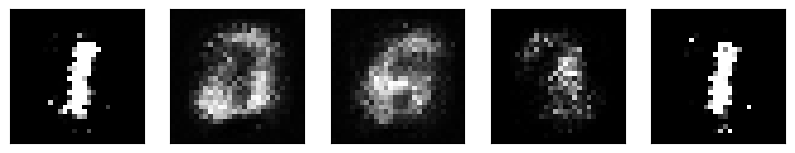

 Epoch: 27 batch: 1 D_loss: 1.033 G_loss: 1.574 
 Epoch: 27 batch: 2 D_loss: 1.091 G_loss: 1.966 
 Epoch: 27 batch: 3 D_loss: 1.127 G_loss: 2.008 
 Epoch: 27 batch: 4 D_loss: 1.074 G_loss: 1.750 
 Epoch: 27 batch: 5 D_loss: 1.140 G_loss: 1.534 
 Epoch: 27 batch: 6 D_loss: 1.171 G_loss: 1.419 
 Epoch: 27 batch: 7 D_loss: 1.166 G_loss: 1.391 
 Epoch: 27 batch: 8 D_loss: 1.245 G_loss: 1.344 
 Epoch: 27 batch: 9 D_loss: 1.270 G_loss: 1.375 
 Epoch: 27 batch: 10 D_loss: 1.181 G_loss: 1.199 
 Epoch: 27 batch: 11 D_loss: 1.183 G_loss: 1.265 
 Epoch: 27 batch: 12 D_loss: 1.203 G_loss: 1.174 
 Epoch: 27 batch: 13 D_loss: 1.213 G_loss: 1.288 
 Epoch: 27 batch: 14 D_loss: 1.225 G_loss: 1.276 
 Epoch: 27 batch: 15 D_loss: 1.214 G_loss: 1.224 
 Epoch: 27 batch: 16 D_loss: 1.219 G_loss: 1.169 
 Epoch: 27 batch: 17 D_loss: 1.192 G_loss: 1.188 
 Epoch: 27 batch: 18 D_loss: 1.166 G_loss: 1.061 
 Epoch: 27 batch: 19 D_loss: 1.213 G_loss: 1.101 
 Epoch: 27 batch: 20 D_loss: 1.156 G_loss: 1.157 
 Epoch: 2

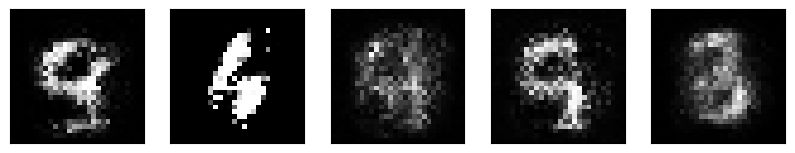

 Epoch: 28 batch: 1 D_loss: 1.141 G_loss: 1.383 
 Epoch: 28 batch: 2 D_loss: 1.124 G_loss: 1.353 
 Epoch: 28 batch: 3 D_loss: 1.173 G_loss: 1.328 
 Epoch: 28 batch: 4 D_loss: 1.127 G_loss: 1.207 
 Epoch: 28 batch: 5 D_loss: 1.155 G_loss: 1.205 
 Epoch: 28 batch: 6 D_loss: 1.159 G_loss: 1.175 
 Epoch: 28 batch: 7 D_loss: 1.135 G_loss: 1.209 
 Epoch: 28 batch: 8 D_loss: 1.199 G_loss: 1.211 
 Epoch: 28 batch: 9 D_loss: 1.184 G_loss: 1.215 
 Epoch: 28 batch: 10 D_loss: 1.091 G_loss: 1.171 
 Epoch: 28 batch: 11 D_loss: 1.151 G_loss: 1.231 
 Epoch: 28 batch: 12 D_loss: 1.155 G_loss: 1.212 
 Epoch: 28 batch: 13 D_loss: 1.155 G_loss: 1.242 
 Epoch: 28 batch: 14 D_loss: 1.133 G_loss: 1.322 
 Epoch: 28 batch: 15 D_loss: 1.150 G_loss: 1.281 
 Epoch: 28 batch: 16 D_loss: 1.102 G_loss: 1.265 
 Epoch: 28 batch: 17 D_loss: 1.112 G_loss: 1.390 
 Epoch: 28 batch: 18 D_loss: 1.146 G_loss: 1.257 
 Epoch: 28 batch: 19 D_loss: 1.126 G_loss: 1.293 
 Epoch: 28 batch: 20 D_loss: 1.167 G_loss: 1.323 
 Epoch: 2

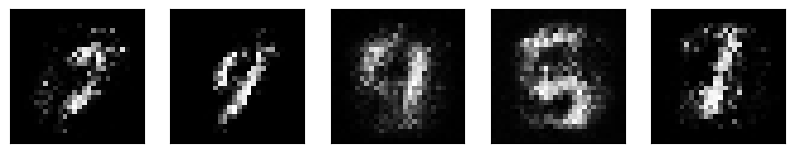

 Epoch: 29 batch: 1 D_loss: 0.997 G_loss: 1.696 
 Epoch: 29 batch: 2 D_loss: 1.047 G_loss: 2.014 
 Epoch: 29 batch: 3 D_loss: 1.003 G_loss: 2.088 
 Epoch: 29 batch: 4 D_loss: 1.066 G_loss: 1.985 
 Epoch: 29 batch: 5 D_loss: 1.091 G_loss: 1.674 
 Epoch: 29 batch: 6 D_loss: 1.037 G_loss: 1.468 
 Epoch: 29 batch: 7 D_loss: 1.071 G_loss: 1.596 
 Epoch: 29 batch: 8 D_loss: 1.053 G_loss: 1.702 
 Epoch: 29 batch: 9 D_loss: 1.178 G_loss: 1.870 
 Epoch: 29 batch: 10 D_loss: 1.042 G_loss: 1.721 
 Epoch: 29 batch: 11 D_loss: 1.164 G_loss: 1.538 
 Epoch: 29 batch: 12 D_loss: 1.085 G_loss: 1.413 
 Epoch: 29 batch: 13 D_loss: 1.076 G_loss: 1.389 
 Epoch: 29 batch: 14 D_loss: 1.094 G_loss: 1.401 
 Epoch: 29 batch: 15 D_loss: 1.136 G_loss: 1.434 
 Epoch: 29 batch: 16 D_loss: 1.093 G_loss: 1.558 
 Epoch: 29 batch: 17 D_loss: 1.108 G_loss: 1.475 
 Epoch: 29 batch: 18 D_loss: 1.103 G_loss: 1.351 
 Epoch: 29 batch: 19 D_loss: 1.112 G_loss: 1.438 
 Epoch: 29 batch: 20 D_loss: 1.067 G_loss: 1.603 
 Epoch: 2

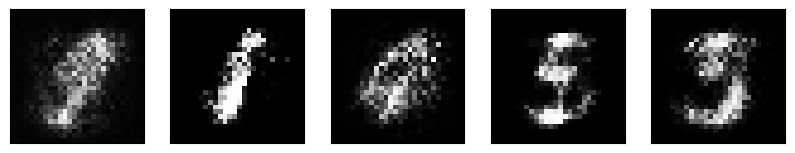

 Epoch: 30 batch: 1 D_loss: 1.125 G_loss: 1.439 
 Epoch: 30 batch: 2 D_loss: 1.097 G_loss: 1.454 
 Epoch: 30 batch: 3 D_loss: 1.071 G_loss: 1.697 
 Epoch: 30 batch: 4 D_loss: 1.119 G_loss: 1.481 
 Epoch: 30 batch: 5 D_loss: 1.099 G_loss: 1.475 
 Epoch: 30 batch: 6 D_loss: 1.137 G_loss: 1.495 
 Epoch: 30 batch: 7 D_loss: 1.126 G_loss: 1.491 
 Epoch: 30 batch: 8 D_loss: 1.181 G_loss: 1.485 
 Epoch: 30 batch: 9 D_loss: 1.112 G_loss: 1.467 
 Epoch: 30 batch: 10 D_loss: 1.079 G_loss: 1.582 
 Epoch: 30 batch: 11 D_loss: 1.165 G_loss: 1.530 
 Epoch: 30 batch: 12 D_loss: 1.154 G_loss: 1.441 
 Epoch: 30 batch: 13 D_loss: 1.113 G_loss: 1.271 
 Epoch: 30 batch: 14 D_loss: 1.126 G_loss: 1.283 
 Epoch: 30 batch: 15 D_loss: 1.136 G_loss: 1.237 
 Epoch: 30 batch: 16 D_loss: 1.046 G_loss: 1.291 
 Epoch: 30 batch: 17 D_loss: 1.092 G_loss: 1.315 
 Epoch: 30 batch: 18 D_loss: 1.097 G_loss: 1.476 
 Epoch: 30 batch: 19 D_loss: 1.024 G_loss: 1.677 
 Epoch: 30 batch: 20 D_loss: 1.162 G_loss: 1.823 
 Epoch: 3

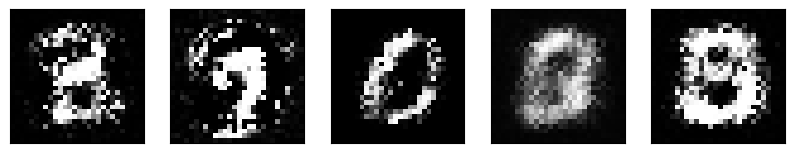

 Epoch: 31 batch: 1 D_loss: 1.222 G_loss: 1.374 
 Epoch: 31 batch: 2 D_loss: 1.108 G_loss: 1.343 
 Epoch: 31 batch: 3 D_loss: 1.134 G_loss: 1.468 
 Epoch: 31 batch: 4 D_loss: 1.090 G_loss: 1.283 
 Epoch: 31 batch: 5 D_loss: 1.138 G_loss: 1.382 
 Epoch: 31 batch: 6 D_loss: 1.212 G_loss: 1.199 
 Epoch: 31 batch: 7 D_loss: 1.081 G_loss: 1.240 
 Epoch: 31 batch: 8 D_loss: 1.168 G_loss: 1.254 
 Epoch: 31 batch: 9 D_loss: 1.125 G_loss: 1.500 
 Epoch: 31 batch: 10 D_loss: 0.946 G_loss: 1.626 
 Epoch: 31 batch: 11 D_loss: 1.118 G_loss: 1.879 
 Epoch: 31 batch: 12 D_loss: 1.133 G_loss: 1.885 
 Epoch: 31 batch: 13 D_loss: 1.020 G_loss: 2.124 
 Epoch: 31 batch: 14 D_loss: 1.042 G_loss: 1.746 
 Epoch: 31 batch: 15 D_loss: 1.097 G_loss: 1.713 
 Epoch: 31 batch: 16 D_loss: 1.119 G_loss: 1.633 
 Epoch: 31 batch: 17 D_loss: 1.077 G_loss: 1.559 
 Epoch: 31 batch: 18 D_loss: 1.199 G_loss: 1.659 
 Epoch: 31 batch: 19 D_loss: 1.231 G_loss: 1.559 
 Epoch: 31 batch: 20 D_loss: 1.160 G_loss: 1.575 
 Epoch: 3

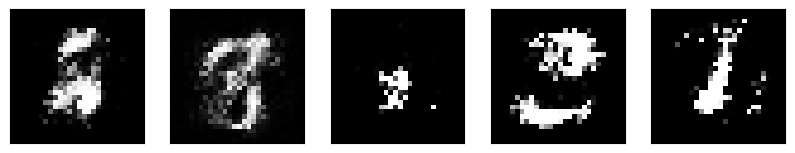

 Epoch: 32 batch: 1 D_loss: 1.080 G_loss: 1.524 
 Epoch: 32 batch: 2 D_loss: 1.141 G_loss: 1.397 
 Epoch: 32 batch: 3 D_loss: 1.095 G_loss: 1.332 
 Epoch: 32 batch: 4 D_loss: 1.056 G_loss: 1.325 
 Epoch: 32 batch: 5 D_loss: 1.162 G_loss: 1.539 
 Epoch: 32 batch: 6 D_loss: 1.063 G_loss: 1.910 
 Epoch: 32 batch: 7 D_loss: 1.094 G_loss: 2.030 
 Epoch: 32 batch: 8 D_loss: 1.086 G_loss: 1.824 
 Epoch: 32 batch: 9 D_loss: 1.146 G_loss: 1.565 
 Epoch: 32 batch: 10 D_loss: 1.141 G_loss: 1.224 
 Epoch: 32 batch: 11 D_loss: 1.181 G_loss: 1.260 
 Epoch: 32 batch: 12 D_loss: 1.227 G_loss: 1.417 
 Epoch: 32 batch: 13 D_loss: 1.153 G_loss: 1.479 
 Epoch: 32 batch: 14 D_loss: 1.154 G_loss: 1.405 
 Epoch: 32 batch: 15 D_loss: 1.205 G_loss: 1.301 
 Epoch: 32 batch: 16 D_loss: 1.236 G_loss: 1.122 
 Epoch: 32 batch: 17 D_loss: 1.205 G_loss: 1.164 
 Epoch: 32 batch: 18 D_loss: 1.209 G_loss: 1.155 
 Epoch: 32 batch: 19 D_loss: 1.141 G_loss: 1.261 
 Epoch: 32 batch: 20 D_loss: 1.193 G_loss: 1.350 
 Epoch: 3

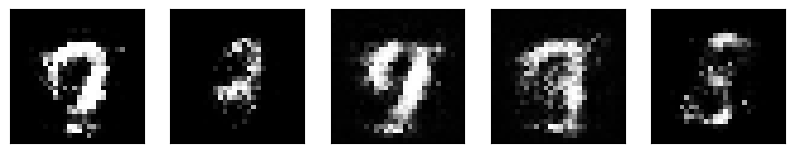

 Epoch: 33 batch: 1 D_loss: 1.154 G_loss: 1.019 
 Epoch: 33 batch: 2 D_loss: 1.178 G_loss: 1.184 
 Epoch: 33 batch: 3 D_loss: 1.144 G_loss: 1.294 
 Epoch: 33 batch: 4 D_loss: 1.158 G_loss: 1.659 
 Epoch: 33 batch: 5 D_loss: 1.262 G_loss: 1.663 
 Epoch: 33 batch: 6 D_loss: 1.185 G_loss: 1.467 
 Epoch: 33 batch: 7 D_loss: 1.206 G_loss: 1.362 
 Epoch: 33 batch: 8 D_loss: 1.212 G_loss: 1.144 
 Epoch: 33 batch: 9 D_loss: 1.197 G_loss: 1.009 
 Epoch: 33 batch: 10 D_loss: 1.160 G_loss: 1.043 
 Epoch: 33 batch: 11 D_loss: 1.188 G_loss: 1.187 
 Epoch: 33 batch: 12 D_loss: 1.118 G_loss: 1.308 
 Epoch: 33 batch: 13 D_loss: 1.115 G_loss: 1.435 
 Epoch: 33 batch: 14 D_loss: 1.158 G_loss: 1.582 
 Epoch: 33 batch: 15 D_loss: 1.199 G_loss: 1.421 
 Epoch: 33 batch: 16 D_loss: 1.120 G_loss: 1.231 
 Epoch: 33 batch: 17 D_loss: 1.200 G_loss: 1.195 
 Epoch: 33 batch: 18 D_loss: 1.259 G_loss: 1.154 
 Epoch: 33 batch: 19 D_loss: 1.177 G_loss: 1.189 
 Epoch: 33 batch: 20 D_loss: 1.171 G_loss: 1.411 
 Epoch: 3

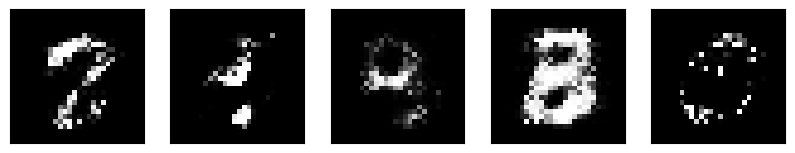

 Epoch: 34 batch: 1 D_loss: 1.027 G_loss: 1.936 
 Epoch: 34 batch: 2 D_loss: 1.124 G_loss: 1.484 
 Epoch: 34 batch: 3 D_loss: 1.102 G_loss: 1.415 
 Epoch: 34 batch: 4 D_loss: 1.090 G_loss: 1.503 
 Epoch: 34 batch: 5 D_loss: 1.259 G_loss: 1.564 
 Epoch: 34 batch: 6 D_loss: 1.228 G_loss: 1.480 
 Epoch: 34 batch: 7 D_loss: 1.242 G_loss: 1.512 
 Epoch: 34 batch: 8 D_loss: 1.288 G_loss: 1.205 
 Epoch: 34 batch: 9 D_loss: 1.338 G_loss: 1.180 
 Epoch: 34 batch: 10 D_loss: 1.252 G_loss: 0.989 
 Epoch: 34 batch: 11 D_loss: 1.303 G_loss: 1.109 
 Epoch: 34 batch: 12 D_loss: 1.304 G_loss: 1.113 
 Epoch: 34 batch: 13 D_loss: 1.269 G_loss: 1.198 
 Epoch: 34 batch: 14 D_loss: 1.302 G_loss: 1.156 
 Epoch: 34 batch: 15 D_loss: 1.254 G_loss: 1.145 
 Epoch: 34 batch: 16 D_loss: 1.282 G_loss: 1.081 
 Epoch: 34 batch: 17 D_loss: 1.242 G_loss: 1.001 
 Epoch: 34 batch: 18 D_loss: 1.251 G_loss: 0.981 
 Epoch: 34 batch: 19 D_loss: 1.257 G_loss: 0.977 
 Epoch: 34 batch: 20 D_loss: 1.218 G_loss: 0.981 
 Epoch: 3

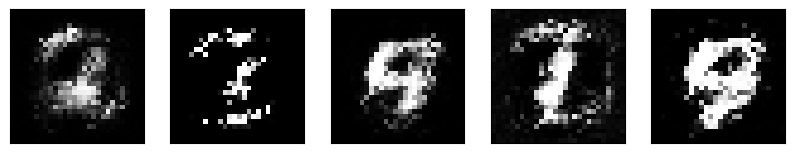

 Epoch: 35 batch: 1 D_loss: 1.166 G_loss: 1.306 
 Epoch: 35 batch: 2 D_loss: 1.161 G_loss: 1.604 
 Epoch: 35 batch: 3 D_loss: 1.051 G_loss: 1.505 
 Epoch: 35 batch: 4 D_loss: 1.185 G_loss: 1.603 
 Epoch: 35 batch: 5 D_loss: 1.213 G_loss: 1.690 
 Epoch: 35 batch: 6 D_loss: 1.186 G_loss: 1.382 
 Epoch: 35 batch: 7 D_loss: 1.163 G_loss: 1.327 
 Epoch: 35 batch: 8 D_loss: 1.238 G_loss: 1.274 
 Epoch: 35 batch: 9 D_loss: 1.200 G_loss: 1.357 
 Epoch: 35 batch: 10 D_loss: 1.120 G_loss: 1.474 
 Epoch: 35 batch: 11 D_loss: 1.130 G_loss: 1.499 
 Epoch: 35 batch: 12 D_loss: 1.142 G_loss: 1.553 
 Epoch: 35 batch: 13 D_loss: 1.191 G_loss: 1.490 
 Epoch: 35 batch: 14 D_loss: 1.182 G_loss: 1.320 
 Epoch: 35 batch: 15 D_loss: 1.141 G_loss: 1.183 
 Epoch: 35 batch: 16 D_loss: 1.169 G_loss: 1.087 
 Epoch: 35 batch: 17 D_loss: 1.160 G_loss: 1.180 
 Epoch: 35 batch: 18 D_loss: 1.163 G_loss: 1.208 
 Epoch: 35 batch: 19 D_loss: 1.177 G_loss: 1.334 
 Epoch: 35 batch: 20 D_loss: 1.189 G_loss: 1.486 
 Epoch: 3

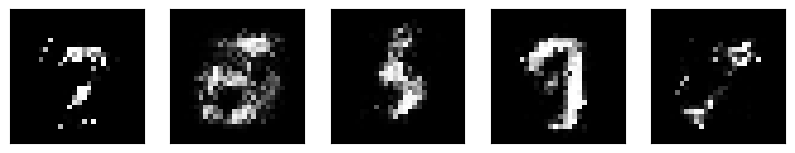

 Epoch: 36 batch: 1 D_loss: 1.157 G_loss: 1.397 
 Epoch: 36 batch: 2 D_loss: 1.239 G_loss: 1.255 
 Epoch: 36 batch: 3 D_loss: 1.177 G_loss: 1.133 
 Epoch: 36 batch: 4 D_loss: 1.224 G_loss: 1.220 
 Epoch: 36 batch: 5 D_loss: 1.210 G_loss: 1.364 
 Epoch: 36 batch: 6 D_loss: 1.106 G_loss: 1.454 
 Epoch: 36 batch: 7 D_loss: 1.172 G_loss: 1.501 
 Epoch: 36 batch: 8 D_loss: 1.215 G_loss: 1.440 
 Epoch: 36 batch: 9 D_loss: 1.245 G_loss: 1.258 
 Epoch: 36 batch: 10 D_loss: 1.190 G_loss: 1.076 
 Epoch: 36 batch: 11 D_loss: 1.195 G_loss: 0.998 
 Epoch: 36 batch: 12 D_loss: 1.205 G_loss: 1.018 
 Epoch: 36 batch: 13 D_loss: 1.201 G_loss: 1.087 
 Epoch: 36 batch: 14 D_loss: 1.125 G_loss: 1.380 
 Epoch: 36 batch: 15 D_loss: 1.178 G_loss: 1.472 
 Epoch: 36 batch: 16 D_loss: 1.185 G_loss: 1.488 
 Epoch: 36 batch: 17 D_loss: 1.105 G_loss: 1.495 
 Epoch: 36 batch: 18 D_loss: 1.143 G_loss: 1.472 
 Epoch: 36 batch: 19 D_loss: 1.127 G_loss: 1.292 
 Epoch: 36 batch: 20 D_loss: 1.108 G_loss: 1.336 
 Epoch: 3

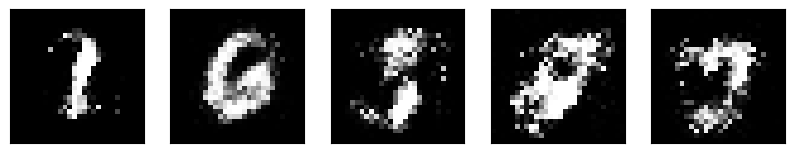

 Epoch: 37 batch: 1 D_loss: 1.133 G_loss: 1.694 
 Epoch: 37 batch: 2 D_loss: 1.096 G_loss: 1.523 
 Epoch: 37 batch: 3 D_loss: 1.109 G_loss: 1.823 
 Epoch: 37 batch: 4 D_loss: 1.070 G_loss: 1.769 
 Epoch: 37 batch: 5 D_loss: 1.155 G_loss: 1.793 
 Epoch: 37 batch: 6 D_loss: 1.086 G_loss: 1.827 
 Epoch: 37 batch: 7 D_loss: 1.035 G_loss: 1.704 
 Epoch: 37 batch: 8 D_loss: 1.090 G_loss: 1.663 
 Epoch: 37 batch: 9 D_loss: 1.111 G_loss: 1.703 
 Epoch: 37 batch: 10 D_loss: 1.114 G_loss: 1.594 
 Epoch: 37 batch: 11 D_loss: 1.126 G_loss: 1.798 
 Epoch: 37 batch: 12 D_loss: 1.182 G_loss: 1.536 
 Epoch: 37 batch: 13 D_loss: 1.198 G_loss: 1.520 
 Epoch: 37 batch: 14 D_loss: 1.154 G_loss: 1.400 
 Epoch: 37 batch: 15 D_loss: 1.155 G_loss: 1.403 
 Epoch: 37 batch: 16 D_loss: 1.153 G_loss: 1.398 
 Epoch: 37 batch: 17 D_loss: 1.131 G_loss: 1.386 
 Epoch: 37 batch: 18 D_loss: 1.163 G_loss: 1.404 
 Epoch: 37 batch: 19 D_loss: 1.133 G_loss: 1.408 
 Epoch: 37 batch: 20 D_loss: 1.167 G_loss: 1.520 
 Epoch: 3

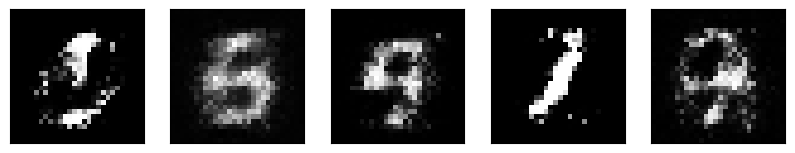

 Epoch: 38 batch: 1 D_loss: 1.257 G_loss: 1.279 
 Epoch: 38 batch: 2 D_loss: 1.183 G_loss: 1.216 
 Epoch: 38 batch: 3 D_loss: 1.234 G_loss: 1.203 
 Epoch: 38 batch: 4 D_loss: 1.218 G_loss: 1.267 
 Epoch: 38 batch: 5 D_loss: 1.208 G_loss: 1.388 
 Epoch: 38 batch: 6 D_loss: 1.224 G_loss: 1.413 
 Epoch: 38 batch: 7 D_loss: 1.287 G_loss: 1.452 
 Epoch: 38 batch: 8 D_loss: 1.258 G_loss: 1.320 
 Epoch: 38 batch: 9 D_loss: 1.252 G_loss: 1.118 
 Epoch: 38 batch: 10 D_loss: 1.209 G_loss: 0.938 
 Epoch: 38 batch: 11 D_loss: 1.297 G_loss: 0.920 
 Epoch: 38 batch: 12 D_loss: 1.217 G_loss: 1.006 
 Epoch: 38 batch: 13 D_loss: 1.259 G_loss: 1.076 
 Epoch: 38 batch: 14 D_loss: 1.264 G_loss: 1.183 
 Epoch: 38 batch: 15 D_loss: 1.236 G_loss: 1.220 
 Epoch: 38 batch: 16 D_loss: 1.251 G_loss: 1.170 
 Epoch: 38 batch: 17 D_loss: 1.225 G_loss: 1.164 
 Epoch: 38 batch: 18 D_loss: 1.222 G_loss: 1.075 
 Epoch: 38 batch: 19 D_loss: 1.221 G_loss: 1.076 
 Epoch: 38 batch: 20 D_loss: 1.291 G_loss: 1.117 
 Epoch: 3

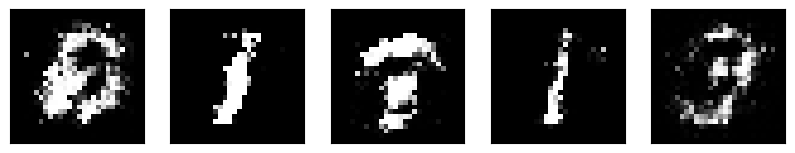

 Epoch: 39 batch: 1 D_loss: 1.274 G_loss: 0.901 
 Epoch: 39 batch: 2 D_loss: 1.277 G_loss: 0.944 
 Epoch: 39 batch: 3 D_loss: 1.227 G_loss: 0.963 
 Epoch: 39 batch: 4 D_loss: 1.227 G_loss: 0.993 
 Epoch: 39 batch: 5 D_loss: 1.289 G_loss: 1.038 
 Epoch: 39 batch: 6 D_loss: 1.281 G_loss: 1.069 
 Epoch: 39 batch: 7 D_loss: 1.287 G_loss: 1.063 
 Epoch: 39 batch: 8 D_loss: 1.273 G_loss: 1.076 
 Epoch: 39 batch: 9 D_loss: 1.292 G_loss: 1.009 
 Epoch: 39 batch: 10 D_loss: 1.204 G_loss: 1.008 
 Epoch: 39 batch: 11 D_loss: 1.244 G_loss: 1.095 
 Epoch: 39 batch: 12 D_loss: 1.163 G_loss: 1.119 
 Epoch: 39 batch: 13 D_loss: 1.189 G_loss: 1.093 
 Epoch: 39 batch: 14 D_loss: 1.184 G_loss: 1.199 
 Epoch: 39 batch: 15 D_loss: 1.214 G_loss: 1.282 
 Epoch: 39 batch: 16 D_loss: 1.163 G_loss: 1.301 
 Epoch: 39 batch: 17 D_loss: 1.171 G_loss: 1.386 
 Epoch: 39 batch: 18 D_loss: 1.083 G_loss: 1.455 
 Epoch: 39 batch: 19 D_loss: 1.240 G_loss: 1.425 
 Epoch: 39 batch: 20 D_loss: 1.130 G_loss: 1.501 
 Epoch: 3

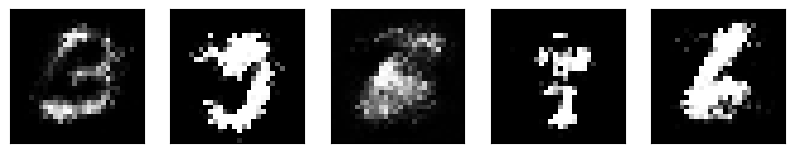

 Epoch: 40 batch: 1 D_loss: 1.193 G_loss: 1.724 
 Epoch: 40 batch: 2 D_loss: 1.187 G_loss: 1.767 
 Epoch: 40 batch: 3 D_loss: 1.193 G_loss: 1.409 
 Epoch: 40 batch: 4 D_loss: 1.159 G_loss: 1.298 
 Epoch: 40 batch: 5 D_loss: 1.190 G_loss: 1.163 
 Epoch: 40 batch: 6 D_loss: 1.196 G_loss: 1.236 
 Epoch: 40 batch: 7 D_loss: 1.124 G_loss: 1.275 
 Epoch: 40 batch: 8 D_loss: 1.265 G_loss: 1.398 
 Epoch: 40 batch: 9 D_loss: 1.254 G_loss: 1.304 
 Epoch: 40 batch: 10 D_loss: 1.164 G_loss: 1.307 
 Epoch: 40 batch: 11 D_loss: 1.214 G_loss: 1.216 
 Epoch: 40 batch: 12 D_loss: 1.217 G_loss: 1.238 
 Epoch: 40 batch: 13 D_loss: 1.233 G_loss: 1.248 
 Epoch: 40 batch: 14 D_loss: 1.265 G_loss: 1.167 
 Epoch: 40 batch: 15 D_loss: 1.233 G_loss: 1.180 
 Epoch: 40 batch: 16 D_loss: 1.241 G_loss: 1.140 
 Epoch: 40 batch: 17 D_loss: 1.220 G_loss: 1.165 
 Epoch: 40 batch: 18 D_loss: 1.217 G_loss: 1.178 
 Epoch: 40 batch: 19 D_loss: 1.182 G_loss: 1.199 
 Epoch: 40 batch: 20 D_loss: 1.202 G_loss: 1.253 
 Epoch: 4

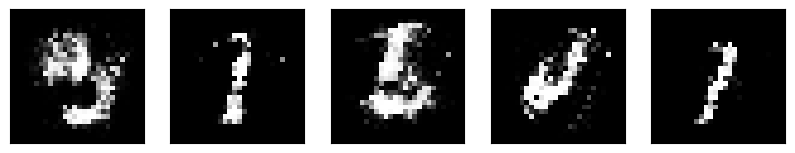

 Epoch: 41 batch: 1 D_loss: 1.237 G_loss: 1.163 
 Epoch: 41 batch: 2 D_loss: 1.277 G_loss: 1.267 
 Epoch: 41 batch: 3 D_loss: 1.236 G_loss: 1.288 
 Epoch: 41 batch: 4 D_loss: 1.173 G_loss: 1.178 
 Epoch: 41 batch: 5 D_loss: 1.251 G_loss: 1.040 
 Epoch: 41 batch: 6 D_loss: 1.260 G_loss: 0.993 
 Epoch: 41 batch: 7 D_loss: 1.253 G_loss: 1.062 
 Epoch: 41 batch: 8 D_loss: 1.260 G_loss: 1.082 
 Epoch: 41 batch: 9 D_loss: 1.255 G_loss: 1.146 
 Epoch: 41 batch: 10 D_loss: 1.120 G_loss: 1.231 
 Epoch: 41 batch: 11 D_loss: 1.236 G_loss: 1.278 
 Epoch: 41 batch: 12 D_loss: 1.189 G_loss: 1.406 
 Epoch: 41 batch: 13 D_loss: 1.135 G_loss: 1.472 
 Epoch: 41 batch: 14 D_loss: 1.136 G_loss: 1.307 
 Epoch: 41 batch: 15 D_loss: 1.201 G_loss: 1.554 
 Epoch: 41 batch: 16 D_loss: 1.195 G_loss: 1.340 
 Epoch: 41 batch: 17 D_loss: 1.160 G_loss: 1.343 
 Epoch: 41 batch: 18 D_loss: 1.197 G_loss: 1.346 
 Epoch: 41 batch: 19 D_loss: 1.289 G_loss: 1.393 
 Epoch: 41 batch: 20 D_loss: 1.185 G_loss: 1.389 
 Epoch: 4

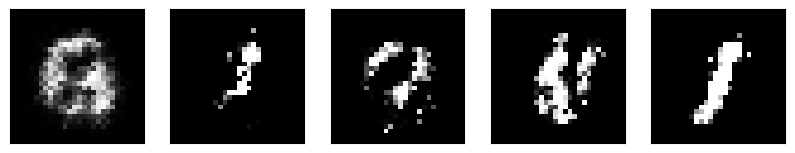

 Epoch: 42 batch: 1 D_loss: 1.223 G_loss: 1.181 
 Epoch: 42 batch: 2 D_loss: 1.196 G_loss: 1.182 
 Epoch: 42 batch: 3 D_loss: 1.176 G_loss: 1.178 
 Epoch: 42 batch: 4 D_loss: 1.175 G_loss: 1.164 
 Epoch: 42 batch: 5 D_loss: 1.241 G_loss: 1.151 
 Epoch: 42 batch: 6 D_loss: 1.217 G_loss: 1.141 
 Epoch: 42 batch: 7 D_loss: 1.204 G_loss: 1.142 
 Epoch: 42 batch: 8 D_loss: 1.256 G_loss: 1.156 
 Epoch: 42 batch: 9 D_loss: 1.169 G_loss: 1.200 
 Epoch: 42 batch: 10 D_loss: 1.105 G_loss: 1.161 
 Epoch: 42 batch: 11 D_loss: 1.165 G_loss: 1.196 
 Epoch: 42 batch: 12 D_loss: 1.117 G_loss: 1.302 
 Epoch: 42 batch: 13 D_loss: 1.143 G_loss: 1.380 
 Epoch: 42 batch: 14 D_loss: 1.082 G_loss: 1.390 
 Epoch: 42 batch: 15 D_loss: 1.184 G_loss: 1.459 
 Epoch: 42 batch: 16 D_loss: 1.089 G_loss: 1.559 
 Epoch: 42 batch: 17 D_loss: 1.131 G_loss: 1.400 
 Epoch: 42 batch: 18 D_loss: 1.191 G_loss: 1.369 
 Epoch: 42 batch: 19 D_loss: 1.196 G_loss: 1.256 
 Epoch: 42 batch: 20 D_loss: 1.153 G_loss: 1.127 
 Epoch: 4

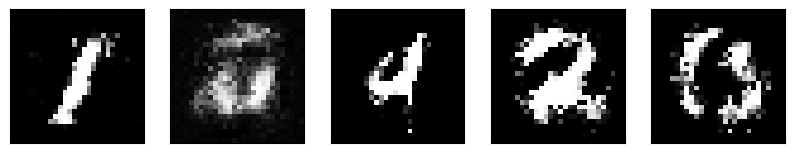

 Epoch: 43 batch: 1 D_loss: 1.222 G_loss: 1.779 
 Epoch: 43 batch: 2 D_loss: 1.283 G_loss: 1.680 
 Epoch: 43 batch: 3 D_loss: 1.211 G_loss: 1.187 
 Epoch: 43 batch: 4 D_loss: 1.200 G_loss: 1.064 
 Epoch: 43 batch: 5 D_loss: 1.240 G_loss: 1.050 
 Epoch: 43 batch: 6 D_loss: 1.256 G_loss: 1.034 
 Epoch: 43 batch: 7 D_loss: 1.220 G_loss: 1.088 
 Epoch: 43 batch: 8 D_loss: 1.250 G_loss: 1.163 
 Epoch: 43 batch: 9 D_loss: 1.263 G_loss: 1.162 
 Epoch: 43 batch: 10 D_loss: 1.162 G_loss: 1.150 
 Epoch: 43 batch: 11 D_loss: 1.264 G_loss: 1.137 
 Epoch: 43 batch: 12 D_loss: 1.219 G_loss: 1.116 
 Epoch: 43 batch: 13 D_loss: 1.231 G_loss: 1.033 
 Epoch: 43 batch: 14 D_loss: 1.215 G_loss: 1.022 
 Epoch: 43 batch: 15 D_loss: 1.273 G_loss: 0.958 
 Epoch: 43 batch: 16 D_loss: 1.263 G_loss: 0.965 
 Epoch: 43 batch: 17 D_loss: 1.277 G_loss: 1.024 
 Epoch: 43 batch: 18 D_loss: 1.207 G_loss: 1.052 
 Epoch: 43 batch: 19 D_loss: 1.280 G_loss: 1.179 
 Epoch: 43 batch: 20 D_loss: 1.252 G_loss: 1.160 
 Epoch: 4

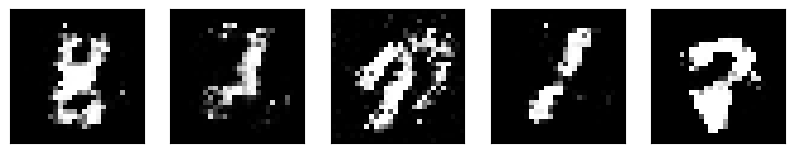

 Epoch: 44 batch: 1 D_loss: 1.241 G_loss: 1.041 
 Epoch: 44 batch: 2 D_loss: 1.200 G_loss: 1.081 
 Epoch: 44 batch: 3 D_loss: 1.155 G_loss: 1.116 
 Epoch: 44 batch: 4 D_loss: 1.117 G_loss: 1.180 
 Epoch: 44 batch: 5 D_loss: 1.313 G_loss: 1.536 
 Epoch: 44 batch: 6 D_loss: 1.270 G_loss: 1.574 
 Epoch: 44 batch: 7 D_loss: 1.194 G_loss: 1.538 
 Epoch: 44 batch: 8 D_loss: 1.256 G_loss: 1.297 
 Epoch: 44 batch: 9 D_loss: 1.210 G_loss: 1.179 
 Epoch: 44 batch: 10 D_loss: 1.129 G_loss: 1.150 
 Epoch: 44 batch: 11 D_loss: 1.276 G_loss: 1.209 
 Epoch: 44 batch: 12 D_loss: 1.225 G_loss: 1.323 
 Epoch: 44 batch: 13 D_loss: 1.279 G_loss: 1.404 
 Epoch: 44 batch: 14 D_loss: 1.263 G_loss: 1.241 
 Epoch: 44 batch: 15 D_loss: 1.264 G_loss: 1.070 
 Epoch: 44 batch: 16 D_loss: 1.226 G_loss: 0.967 
 Epoch: 44 batch: 17 D_loss: 1.222 G_loss: 0.951 
 Epoch: 44 batch: 18 D_loss: 1.227 G_loss: 0.969 
 Epoch: 44 batch: 19 D_loss: 1.254 G_loss: 0.981 
 Epoch: 44 batch: 20 D_loss: 1.243 G_loss: 0.981 
 Epoch: 4

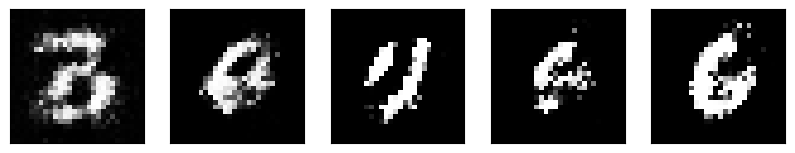

 Epoch: 45 batch: 1 D_loss: 1.121 G_loss: 1.482 
 Epoch: 45 batch: 2 D_loss: 1.189 G_loss: 1.744 
 Epoch: 45 batch: 3 D_loss: 1.158 G_loss: 1.584 
 Epoch: 45 batch: 4 D_loss: 1.224 G_loss: 1.647 
 Epoch: 45 batch: 5 D_loss: 1.232 G_loss: 1.374 
 Epoch: 45 batch: 6 D_loss: 1.134 G_loss: 1.321 
 Epoch: 45 batch: 7 D_loss: 1.192 G_loss: 1.183 
 Epoch: 45 batch: 8 D_loss: 1.230 G_loss: 1.225 
 Epoch: 45 batch: 9 D_loss: 1.254 G_loss: 1.162 
 Epoch: 45 batch: 10 D_loss: 1.199 G_loss: 1.157 
 Epoch: 45 batch: 11 D_loss: 1.240 G_loss: 1.208 
 Epoch: 45 batch: 12 D_loss: 1.264 G_loss: 1.098 
 Epoch: 45 batch: 13 D_loss: 1.250 G_loss: 1.036 
 Epoch: 45 batch: 14 D_loss: 1.201 G_loss: 0.994 
 Epoch: 45 batch: 15 D_loss: 1.251 G_loss: 1.011 
 Epoch: 45 batch: 16 D_loss: 1.232 G_loss: 0.935 
 Epoch: 45 batch: 17 D_loss: 1.222 G_loss: 0.965 
 Epoch: 45 batch: 18 D_loss: 1.239 G_loss: 0.948 
 Epoch: 45 batch: 19 D_loss: 1.179 G_loss: 1.000 
 Epoch: 45 batch: 20 D_loss: 1.212 G_loss: 1.095 
 Epoch: 4

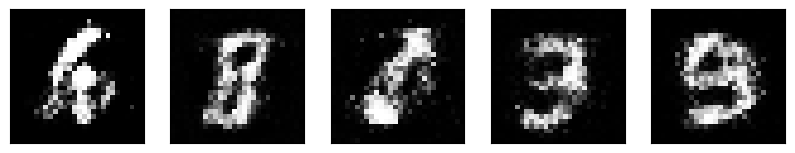

 Epoch: 46 batch: 1 D_loss: 1.326 G_loss: 1.191 
 Epoch: 46 batch: 2 D_loss: 1.173 G_loss: 1.333 
 Epoch: 46 batch: 3 D_loss: 1.243 G_loss: 1.124 
 Epoch: 46 batch: 4 D_loss: 1.185 G_loss: 1.087 
 Epoch: 46 batch: 5 D_loss: 1.259 G_loss: 1.089 
 Epoch: 46 batch: 6 D_loss: 1.235 G_loss: 1.183 
 Epoch: 46 batch: 7 D_loss: 1.289 G_loss: 1.208 
 Epoch: 46 batch: 8 D_loss: 1.282 G_loss: 1.197 
 Epoch: 46 batch: 9 D_loss: 1.282 G_loss: 1.197 
 Epoch: 46 batch: 10 D_loss: 1.149 G_loss: 1.154 
 Epoch: 46 batch: 11 D_loss: 1.256 G_loss: 1.107 
 Epoch: 46 batch: 12 D_loss: 1.232 G_loss: 1.052 
 Epoch: 46 batch: 13 D_loss: 1.189 G_loss: 1.097 
 Epoch: 46 batch: 14 D_loss: 1.194 G_loss: 1.150 
 Epoch: 46 batch: 15 D_loss: 1.252 G_loss: 1.157 
 Epoch: 46 batch: 16 D_loss: 1.261 G_loss: 1.159 
 Epoch: 46 batch: 17 D_loss: 1.212 G_loss: 1.156 
 Epoch: 46 batch: 18 D_loss: 1.232 G_loss: 1.199 
 Epoch: 46 batch: 19 D_loss: 1.279 G_loss: 1.207 
 Epoch: 46 batch: 20 D_loss: 1.201 G_loss: 1.148 
 Epoch: 4

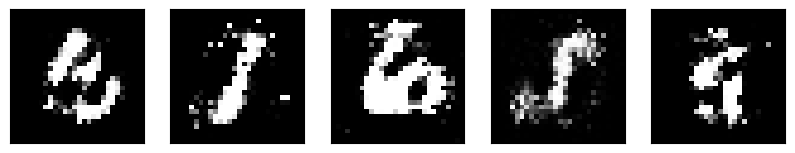

 Epoch: 47 batch: 1 D_loss: 1.187 G_loss: 1.892 
 Epoch: 47 batch: 2 D_loss: 1.242 G_loss: 1.942 
 Epoch: 47 batch: 3 D_loss: 1.181 G_loss: 1.494 
 Epoch: 47 batch: 4 D_loss: 1.269 G_loss: 1.297 
 Epoch: 47 batch: 5 D_loss: 1.309 G_loss: 1.348 
 Epoch: 47 batch: 6 D_loss: 1.263 G_loss: 1.344 
 Epoch: 47 batch: 7 D_loss: 1.273 G_loss: 1.332 
 Epoch: 47 batch: 8 D_loss: 1.302 G_loss: 1.265 
 Epoch: 47 batch: 9 D_loss: 1.370 G_loss: 1.085 
 Epoch: 47 batch: 10 D_loss: 1.262 G_loss: 1.071 
 Epoch: 47 batch: 11 D_loss: 1.289 G_loss: 0.933 
 Epoch: 47 batch: 12 D_loss: 1.281 G_loss: 0.912 
 Epoch: 47 batch: 13 D_loss: 1.291 G_loss: 0.846 
 Epoch: 47 batch: 14 D_loss: 1.315 G_loss: 0.830 
 Epoch: 47 batch: 15 D_loss: 1.307 G_loss: 0.846 
 Epoch: 47 batch: 16 D_loss: 1.282 G_loss: 0.846 
 Epoch: 47 batch: 17 D_loss: 1.268 G_loss: 0.927 
 Epoch: 47 batch: 18 D_loss: 1.314 G_loss: 0.907 
 Epoch: 47 batch: 19 D_loss: 1.298 G_loss: 1.000 
 Epoch: 47 batch: 20 D_loss: 1.304 G_loss: 0.998 
 Epoch: 4

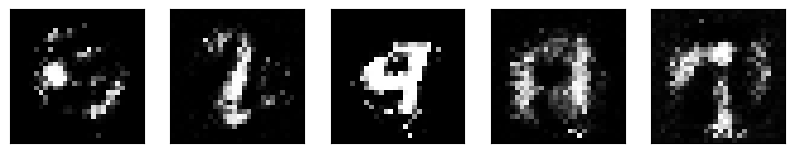

 Epoch: 48 batch: 1 D_loss: 1.262 G_loss: 1.112 
 Epoch: 48 batch: 2 D_loss: 1.229 G_loss: 1.322 
 Epoch: 48 batch: 3 D_loss: 1.279 G_loss: 1.360 
 Epoch: 48 batch: 4 D_loss: 1.255 G_loss: 1.235 
 Epoch: 48 batch: 5 D_loss: 1.268 G_loss: 1.133 
 Epoch: 48 batch: 6 D_loss: 1.309 G_loss: 0.985 
 Epoch: 48 batch: 7 D_loss: 1.285 G_loss: 0.990 
 Epoch: 48 batch: 8 D_loss: 1.262 G_loss: 1.005 
 Epoch: 48 batch: 9 D_loss: 1.284 G_loss: 1.014 
 Epoch: 48 batch: 10 D_loss: 1.162 G_loss: 1.015 
 Epoch: 48 batch: 11 D_loss: 1.240 G_loss: 1.109 
 Epoch: 48 batch: 12 D_loss: 1.183 G_loss: 1.234 
 Epoch: 48 batch: 13 D_loss: 1.176 G_loss: 1.288 
 Epoch: 48 batch: 14 D_loss: 1.181 G_loss: 1.266 
 Epoch: 48 batch: 15 D_loss: 1.210 G_loss: 1.516 
 Epoch: 48 batch: 16 D_loss: 1.127 G_loss: 1.358 
 Epoch: 48 batch: 17 D_loss: 1.159 G_loss: 1.375 
 Epoch: 48 batch: 18 D_loss: 1.199 G_loss: 1.558 
 Epoch: 48 batch: 19 D_loss: 1.357 G_loss: 1.572 
 Epoch: 48 batch: 20 D_loss: 1.180 G_loss: 1.342 
 Epoch: 4

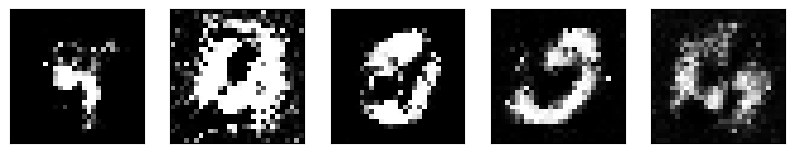

 Epoch: 49 batch: 1 D_loss: 1.209 G_loss: 1.274 
 Epoch: 49 batch: 2 D_loss: 1.232 G_loss: 1.187 
 Epoch: 49 batch: 3 D_loss: 1.296 G_loss: 1.183 
 Epoch: 49 batch: 4 D_loss: 1.257 G_loss: 1.073 
 Epoch: 49 batch: 5 D_loss: 1.283 G_loss: 1.026 
 Epoch: 49 batch: 6 D_loss: 1.258 G_loss: 1.011 
 Epoch: 49 batch: 7 D_loss: 1.306 G_loss: 1.015 
 Epoch: 49 batch: 8 D_loss: 1.297 G_loss: 0.945 
 Epoch: 49 batch: 9 D_loss: 1.316 G_loss: 1.030 
 Epoch: 49 batch: 10 D_loss: 1.201 G_loss: 0.980 
 Epoch: 49 batch: 11 D_loss: 1.322 G_loss: 1.021 
 Epoch: 49 batch: 12 D_loss: 1.280 G_loss: 1.004 
 Epoch: 49 batch: 13 D_loss: 1.242 G_loss: 1.066 
 Epoch: 49 batch: 14 D_loss: 1.230 G_loss: 1.050 
 Epoch: 49 batch: 15 D_loss: 1.281 G_loss: 1.067 
 Epoch: 49 batch: 16 D_loss: 1.235 G_loss: 1.136 
 Epoch: 49 batch: 17 D_loss: 1.260 G_loss: 1.136 
 Epoch: 49 batch: 18 D_loss: 1.219 G_loss: 1.154 
 Epoch: 49 batch: 19 D_loss: 1.263 G_loss: 1.275 
 Epoch: 49 batch: 20 D_loss: 1.199 G_loss: 1.265 
 Epoch: 4

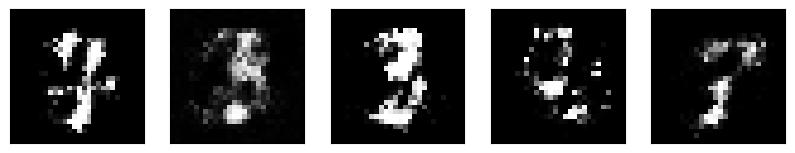

 Epoch: 50 batch: 1 D_loss: 1.244 G_loss: 1.006 
 Epoch: 50 batch: 2 D_loss: 1.214 G_loss: 1.052 
 Epoch: 50 batch: 3 D_loss: 1.198 G_loss: 1.185 
 Epoch: 50 batch: 4 D_loss: 1.215 G_loss: 1.266 
 Epoch: 50 batch: 5 D_loss: 1.254 G_loss: 1.410 
 Epoch: 50 batch: 6 D_loss: 1.243 G_loss: 1.542 
 Epoch: 50 batch: 7 D_loss: 1.185 G_loss: 1.420 
 Epoch: 50 batch: 8 D_loss: 1.229 G_loss: 1.389 
 Epoch: 50 batch: 9 D_loss: 1.223 G_loss: 1.343 
 Epoch: 50 batch: 10 D_loss: 1.159 G_loss: 1.212 
 Epoch: 50 batch: 11 D_loss: 1.220 G_loss: 1.348 
 Epoch: 50 batch: 12 D_loss: 1.202 G_loss: 1.562 
 Epoch: 50 batch: 13 D_loss: 1.194 G_loss: 1.443 
 Epoch: 50 batch: 14 D_loss: 1.166 G_loss: 1.208 
 Epoch: 50 batch: 15 D_loss: 1.178 G_loss: 1.297 
 Epoch: 50 batch: 16 D_loss: 1.237 G_loss: 1.326 
 Epoch: 50 batch: 17 D_loss: 1.262 G_loss: 1.223 
 Epoch: 50 batch: 18 D_loss: 1.190 G_loss: 1.207 
 Epoch: 50 batch: 19 D_loss: 1.174 G_loss: 1.163 
 Epoch: 50 batch: 20 D_loss: 1.215 G_loss: 1.238 
 Epoch: 5

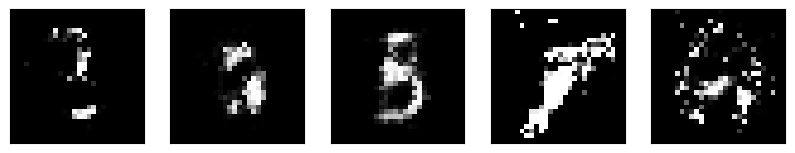

 Epoch: 51 batch: 1 D_loss: 1.248 G_loss: 0.996 
 Epoch: 51 batch: 2 D_loss: 1.292 G_loss: 0.998 
 Epoch: 51 batch: 3 D_loss: 1.271 G_loss: 0.965 
 Epoch: 51 batch: 4 D_loss: 1.246 G_loss: 0.967 
 Epoch: 51 batch: 5 D_loss: 1.265 G_loss: 0.993 
 Epoch: 51 batch: 6 D_loss: 1.208 G_loss: 1.134 
 Epoch: 51 batch: 7 D_loss: 1.182 G_loss: 1.186 
 Epoch: 51 batch: 8 D_loss: 1.163 G_loss: 1.446 
 Epoch: 51 batch: 9 D_loss: 1.154 G_loss: 1.591 
 Epoch: 51 batch: 10 D_loss: 1.138 G_loss: 1.887 
 Epoch: 51 batch: 11 D_loss: 1.190 G_loss: 1.833 
 Epoch: 51 batch: 12 D_loss: 1.185 G_loss: 1.575 
 Epoch: 51 batch: 13 D_loss: 1.152 G_loss: 1.309 
 Epoch: 51 batch: 14 D_loss: 1.140 G_loss: 1.247 
 Epoch: 51 batch: 15 D_loss: 1.144 G_loss: 1.519 
 Epoch: 51 batch: 16 D_loss: 1.131 G_loss: 1.905 
 Epoch: 51 batch: 17 D_loss: 1.237 G_loss: 2.008 
 Epoch: 51 batch: 18 D_loss: 1.234 G_loss: 1.639 
 Epoch: 51 batch: 19 D_loss: 1.227 G_loss: 1.234 
 Epoch: 51 batch: 20 D_loss: 1.132 G_loss: 1.197 
 Epoch: 5

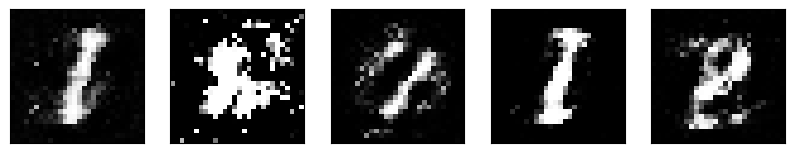

 Epoch: 52 batch: 1 D_loss: 1.230 G_loss: 0.999 
 Epoch: 52 batch: 2 D_loss: 1.299 G_loss: 1.026 
 Epoch: 52 batch: 3 D_loss: 1.258 G_loss: 0.889 
 Epoch: 52 batch: 4 D_loss: 1.299 G_loss: 0.845 
 Epoch: 52 batch: 5 D_loss: 1.318 G_loss: 0.927 
 Epoch: 52 batch: 6 D_loss: 1.308 G_loss: 0.907 
 Epoch: 52 batch: 7 D_loss: 1.283 G_loss: 0.931 
 Epoch: 52 batch: 8 D_loss: 1.286 G_loss: 0.957 
 Epoch: 52 batch: 9 D_loss: 1.283 G_loss: 0.934 
 Epoch: 52 batch: 10 D_loss: 1.220 G_loss: 0.950 
 Epoch: 52 batch: 11 D_loss: 1.244 G_loss: 0.938 
 Epoch: 52 batch: 12 D_loss: 1.221 G_loss: 0.942 
 Epoch: 52 batch: 13 D_loss: 1.197 G_loss: 1.008 
 Epoch: 52 batch: 14 D_loss: 1.161 G_loss: 1.028 
 Epoch: 52 batch: 15 D_loss: 1.166 G_loss: 1.252 
 Epoch: 52 batch: 16 D_loss: 1.176 G_loss: 1.521 
 Epoch: 52 batch: 17 D_loss: 1.182 G_loss: 1.778 
 Epoch: 52 batch: 18 D_loss: 1.247 G_loss: 1.624 
 Epoch: 52 batch: 19 D_loss: 1.192 G_loss: 1.621 
 Epoch: 52 batch: 20 D_loss: 1.186 G_loss: 1.702 
 Epoch: 5

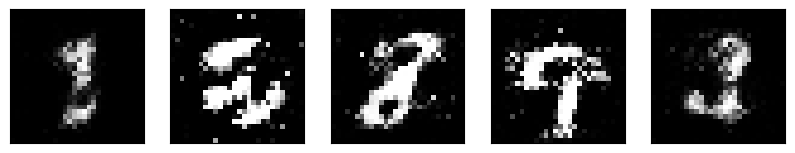

 Epoch: 53 batch: 1 D_loss: 1.219 G_loss: 1.155 
 Epoch: 53 batch: 2 D_loss: 1.168 G_loss: 1.219 
 Epoch: 53 batch: 3 D_loss: 1.176 G_loss: 1.159 
 Epoch: 53 batch: 4 D_loss: 1.155 G_loss: 1.336 
 Epoch: 53 batch: 5 D_loss: 1.178 G_loss: 1.329 
 Epoch: 53 batch: 6 D_loss: 1.190 G_loss: 1.350 
 Epoch: 53 batch: 7 D_loss: 1.154 G_loss: 1.363 
 Epoch: 53 batch: 8 D_loss: 1.179 G_loss: 1.403 
 Epoch: 53 batch: 9 D_loss: 1.179 G_loss: 1.352 
 Epoch: 53 batch: 10 D_loss: 1.051 G_loss: 1.382 
 Epoch: 53 batch: 11 D_loss: 1.166 G_loss: 1.556 
 Epoch: 53 batch: 12 D_loss: 1.099 G_loss: 1.688 
 Epoch: 53 batch: 13 D_loss: 1.108 G_loss: 1.527 
 Epoch: 53 batch: 14 D_loss: 1.146 G_loss: 1.481 
 Epoch: 53 batch: 15 D_loss: 1.155 G_loss: 1.454 
 Epoch: 53 batch: 16 D_loss: 1.083 G_loss: 1.468 
 Epoch: 53 batch: 17 D_loss: 1.133 G_loss: 1.609 
 Epoch: 53 batch: 18 D_loss: 1.217 G_loss: 1.626 
 Epoch: 53 batch: 19 D_loss: 1.185 G_loss: 1.591 
 Epoch: 53 batch: 20 D_loss: 1.214 G_loss: 1.394 
 Epoch: 5

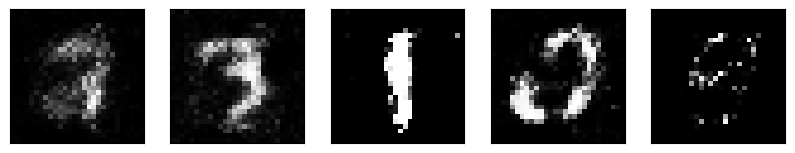

 Epoch: 54 batch: 1 D_loss: 1.140 G_loss: 1.555 
 Epoch: 54 batch: 2 D_loss: 1.178 G_loss: 1.629 
 Epoch: 54 batch: 3 D_loss: 1.088 G_loss: 1.833 
 Epoch: 54 batch: 4 D_loss: 1.225 G_loss: 1.436 
 Epoch: 54 batch: 5 D_loss: 1.291 G_loss: 1.512 
 Epoch: 54 batch: 6 D_loss: 1.241 G_loss: 1.436 
 Epoch: 54 batch: 7 D_loss: 1.163 G_loss: 1.525 
 Epoch: 54 batch: 8 D_loss: 1.249 G_loss: 1.585 
 Epoch: 54 batch: 9 D_loss: 1.215 G_loss: 1.544 
 Epoch: 54 batch: 10 D_loss: 1.159 G_loss: 1.364 
 Epoch: 54 batch: 11 D_loss: 1.275 G_loss: 1.278 
 Epoch: 54 batch: 12 D_loss: 1.190 G_loss: 1.176 
 Epoch: 54 batch: 13 D_loss: 1.234 G_loss: 1.133 
 Epoch: 54 batch: 14 D_loss: 1.251 G_loss: 1.079 
 Epoch: 54 batch: 15 D_loss: 1.243 G_loss: 1.170 
 Epoch: 54 batch: 16 D_loss: 1.187 G_loss: 1.350 
 Epoch: 54 batch: 17 D_loss: 1.193 G_loss: 1.431 
 Epoch: 54 batch: 18 D_loss: 1.182 G_loss: 1.561 
 Epoch: 54 batch: 19 D_loss: 1.067 G_loss: 1.499 
 Epoch: 54 batch: 20 D_loss: 1.116 G_loss: 1.643 
 Epoch: 5

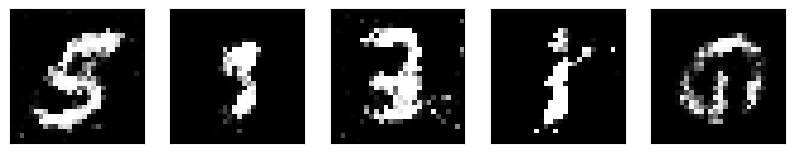

 Epoch: 55 batch: 1 D_loss: 1.238 G_loss: 1.141 
 Epoch: 55 batch: 2 D_loss: 1.264 G_loss: 1.099 
 Epoch: 55 batch: 3 D_loss: 1.236 G_loss: 1.043 
 Epoch: 55 batch: 4 D_loss: 1.191 G_loss: 0.986 
 Epoch: 55 batch: 5 D_loss: 1.288 G_loss: 1.014 
 Epoch: 55 batch: 6 D_loss: 1.304 G_loss: 1.022 
 Epoch: 55 batch: 7 D_loss: 1.242 G_loss: 1.034 
 Epoch: 55 batch: 8 D_loss: 1.359 G_loss: 1.090 
 Epoch: 55 batch: 9 D_loss: 1.277 G_loss: 1.081 
 Epoch: 55 batch: 10 D_loss: 1.198 G_loss: 1.028 
 Epoch: 55 batch: 11 D_loss: 1.235 G_loss: 1.008 
 Epoch: 55 batch: 12 D_loss: 1.231 G_loss: 0.999 
 Epoch: 55 batch: 13 D_loss: 1.238 G_loss: 0.987 
 Epoch: 55 batch: 14 D_loss: 1.264 G_loss: 0.991 
 Epoch: 55 batch: 15 D_loss: 1.244 G_loss: 1.079 
 Epoch: 55 batch: 16 D_loss: 1.218 G_loss: 1.160 
 Epoch: 55 batch: 17 D_loss: 1.249 G_loss: 1.201 
 Epoch: 55 batch: 18 D_loss: 1.195 G_loss: 1.332 
 Epoch: 55 batch: 19 D_loss: 1.253 G_loss: 1.262 
 Epoch: 55 batch: 20 D_loss: 1.187 G_loss: 1.265 
 Epoch: 5

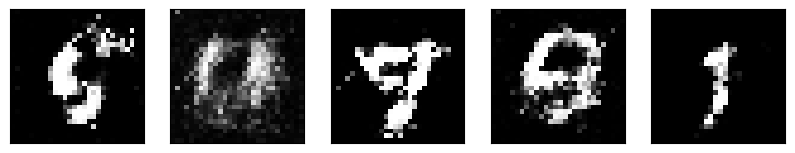

 Epoch: 56 batch: 1 D_loss: 1.234 G_loss: 1.046 
 Epoch: 56 batch: 2 D_loss: 1.193 G_loss: 1.100 
 Epoch: 56 batch: 3 D_loss: 1.236 G_loss: 1.143 
 Epoch: 56 batch: 4 D_loss: 1.197 G_loss: 1.121 
 Epoch: 56 batch: 5 D_loss: 1.290 G_loss: 1.085 
 Epoch: 56 batch: 6 D_loss: 1.285 G_loss: 1.070 
 Epoch: 56 batch: 7 D_loss: 1.207 G_loss: 1.051 
 Epoch: 56 batch: 8 D_loss: 1.282 G_loss: 1.021 
 Epoch: 56 batch: 9 D_loss: 1.322 G_loss: 1.022 
 Epoch: 56 batch: 10 D_loss: 1.199 G_loss: 1.021 
 Epoch: 56 batch: 11 D_loss: 1.226 G_loss: 1.018 
 Epoch: 56 batch: 12 D_loss: 1.243 G_loss: 1.081 
 Epoch: 56 batch: 13 D_loss: 1.231 G_loss: 1.125 
 Epoch: 56 batch: 14 D_loss: 1.231 G_loss: 1.159 
 Epoch: 56 batch: 15 D_loss: 1.246 G_loss: 1.197 
 Epoch: 56 batch: 16 D_loss: 1.239 G_loss: 1.194 
 Epoch: 56 batch: 17 D_loss: 1.219 G_loss: 1.129 
 Epoch: 56 batch: 18 D_loss: 1.247 G_loss: 1.119 
 Epoch: 56 batch: 19 D_loss: 1.216 G_loss: 1.014 
 Epoch: 56 batch: 20 D_loss: 1.220 G_loss: 1.024 
 Epoch: 5

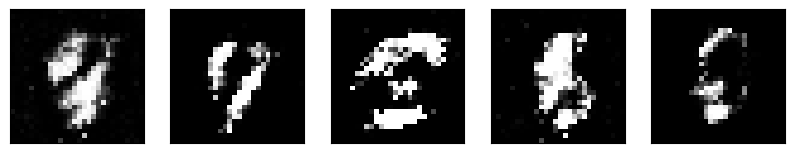

 Epoch: 57 batch: 1 D_loss: 1.273 G_loss: 1.123 
 Epoch: 57 batch: 2 D_loss: 1.312 G_loss: 1.115 
 Epoch: 57 batch: 3 D_loss: 1.254 G_loss: 1.130 
 Epoch: 57 batch: 4 D_loss: 1.239 G_loss: 1.103 
 Epoch: 57 batch: 5 D_loss: 1.260 G_loss: 1.006 
 Epoch: 57 batch: 6 D_loss: 1.327 G_loss: 1.010 
 Epoch: 57 batch: 7 D_loss: 1.231 G_loss: 0.947 
 Epoch: 57 batch: 8 D_loss: 1.290 G_loss: 0.933 
 Epoch: 57 batch: 9 D_loss: 1.381 G_loss: 0.939 
 Epoch: 57 batch: 10 D_loss: 1.209 G_loss: 0.980 
 Epoch: 57 batch: 11 D_loss: 1.269 G_loss: 0.986 
 Epoch: 57 batch: 12 D_loss: 1.283 G_loss: 0.990 
 Epoch: 57 batch: 13 D_loss: 1.231 G_loss: 0.955 
 Epoch: 57 batch: 14 D_loss: 1.202 G_loss: 1.011 
 Epoch: 57 batch: 15 D_loss: 1.254 G_loss: 1.040 
 Epoch: 57 batch: 16 D_loss: 1.237 G_loss: 1.037 
 Epoch: 57 batch: 17 D_loss: 1.246 G_loss: 1.132 
 Epoch: 57 batch: 18 D_loss: 1.191 G_loss: 1.195 
 Epoch: 57 batch: 19 D_loss: 1.159 G_loss: 1.203 
 Epoch: 57 batch: 20 D_loss: 1.223 G_loss: 1.390 
 Epoch: 5

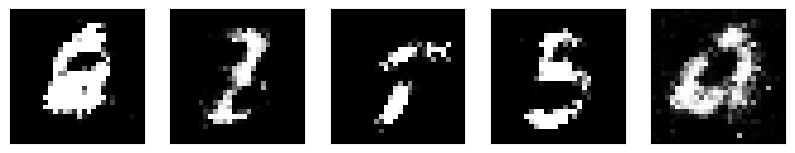

 Epoch: 58 batch: 1 D_loss: 1.145 G_loss: 1.269 
 Epoch: 58 batch: 2 D_loss: 1.175 G_loss: 1.190 
 Epoch: 58 batch: 3 D_loss: 1.138 G_loss: 1.247 
 Epoch: 58 batch: 4 D_loss: 1.114 G_loss: 1.361 
 Epoch: 58 batch: 5 D_loss: 1.284 G_loss: 1.763 
 Epoch: 58 batch: 6 D_loss: 1.299 G_loss: 1.552 
 Epoch: 58 batch: 7 D_loss: 1.253 G_loss: 1.534 
 Epoch: 58 batch: 8 D_loss: 1.334 G_loss: 1.180 
 Epoch: 58 batch: 9 D_loss: 1.332 G_loss: 0.995 
 Epoch: 58 batch: 10 D_loss: 1.227 G_loss: 0.994 
 Epoch: 58 batch: 11 D_loss: 1.316 G_loss: 1.000 
 Epoch: 58 batch: 12 D_loss: 1.289 G_loss: 1.047 
 Epoch: 58 batch: 13 D_loss: 1.239 G_loss: 1.060 
 Epoch: 58 batch: 14 D_loss: 1.299 G_loss: 1.049 
 Epoch: 58 batch: 15 D_loss: 1.323 G_loss: 0.976 
 Epoch: 58 batch: 16 D_loss: 1.296 G_loss: 0.902 
 Epoch: 58 batch: 17 D_loss: 1.305 G_loss: 0.878 
 Epoch: 58 batch: 18 D_loss: 1.352 G_loss: 0.826 
 Epoch: 58 batch: 19 D_loss: 1.296 G_loss: 0.881 
 Epoch: 58 batch: 20 D_loss: 1.301 G_loss: 0.902 
 Epoch: 5

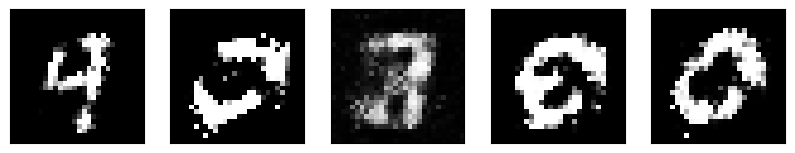

 Epoch: 59 batch: 1 D_loss: 1.193 G_loss: 1.187 
 Epoch: 59 batch: 2 D_loss: 1.178 G_loss: 1.168 
 Epoch: 59 batch: 3 D_loss: 1.189 G_loss: 1.179 
 Epoch: 59 batch: 4 D_loss: 1.155 G_loss: 1.117 
 Epoch: 59 batch: 5 D_loss: 1.256 G_loss: 1.134 
 Epoch: 59 batch: 6 D_loss: 1.210 G_loss: 1.220 
 Epoch: 59 batch: 7 D_loss: 1.194 G_loss: 1.220 
 Epoch: 59 batch: 8 D_loss: 1.250 G_loss: 1.153 
 Epoch: 59 batch: 9 D_loss: 1.271 G_loss: 1.172 
 Epoch: 59 batch: 10 D_loss: 1.184 G_loss: 1.105 
 Epoch: 59 batch: 11 D_loss: 1.239 G_loss: 1.217 
 Epoch: 59 batch: 12 D_loss: 1.235 G_loss: 1.263 
 Epoch: 59 batch: 13 D_loss: 1.203 G_loss: 1.248 
 Epoch: 59 batch: 14 D_loss: 1.256 G_loss: 1.210 
 Epoch: 59 batch: 15 D_loss: 1.271 G_loss: 1.217 
 Epoch: 59 batch: 16 D_loss: 1.254 G_loss: 1.123 
 Epoch: 59 batch: 17 D_loss: 1.220 G_loss: 1.036 
 Epoch: 59 batch: 18 D_loss: 1.249 G_loss: 0.951 
 Epoch: 59 batch: 19 D_loss: 1.247 G_loss: 0.996 
 Epoch: 59 batch: 20 D_loss: 1.261 G_loss: 1.028 
 Epoch: 5

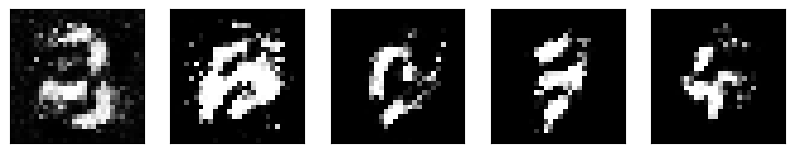

 Epoch: 60 batch: 1 D_loss: 1.248 G_loss: 1.298 
 Epoch: 60 batch: 2 D_loss: 1.176 G_loss: 1.331 
 Epoch: 60 batch: 3 D_loss: 1.192 G_loss: 1.363 
 Epoch: 60 batch: 4 D_loss: 1.240 G_loss: 1.351 
 Epoch: 60 batch: 5 D_loss: 1.284 G_loss: 1.348 
 Epoch: 60 batch: 6 D_loss: 1.296 G_loss: 1.202 
 Epoch: 60 batch: 7 D_loss: 1.202 G_loss: 1.126 
 Epoch: 60 batch: 8 D_loss: 1.306 G_loss: 1.053 
 Epoch: 60 batch: 9 D_loss: 1.270 G_loss: 1.030 
 Epoch: 60 batch: 10 D_loss: 1.195 G_loss: 1.042 
 Epoch: 60 batch: 11 D_loss: 1.219 G_loss: 0.984 
 Epoch: 60 batch: 12 D_loss: 1.280 G_loss: 0.961 
 Epoch: 60 batch: 13 D_loss: 1.209 G_loss: 1.051 
 Epoch: 60 batch: 14 D_loss: 1.253 G_loss: 1.063 
 Epoch: 60 batch: 15 D_loss: 1.254 G_loss: 1.112 
 Epoch: 60 batch: 16 D_loss: 1.177 G_loss: 1.329 
 Epoch: 60 batch: 17 D_loss: 1.224 G_loss: 1.316 
 Epoch: 60 batch: 18 D_loss: 1.163 G_loss: 1.549 
 Epoch: 60 batch: 19 D_loss: 1.333 G_loss: 1.698 
 Epoch: 60 batch: 20 D_loss: 1.240 G_loss: 1.415 
 Epoch: 6

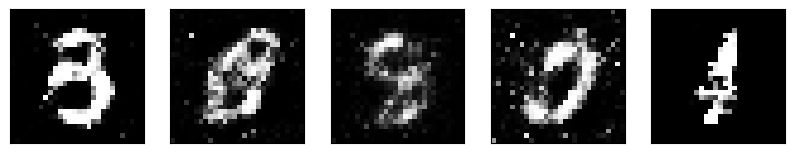

 Epoch: 61 batch: 1 D_loss: 1.273 G_loss: 1.256 
 Epoch: 61 batch: 2 D_loss: 1.285 G_loss: 1.272 
 Epoch: 61 batch: 3 D_loss: 1.249 G_loss: 1.181 
 Epoch: 61 batch: 4 D_loss: 1.363 G_loss: 1.136 
 Epoch: 61 batch: 5 D_loss: 1.345 G_loss: 0.996 
 Epoch: 61 batch: 6 D_loss: 1.326 G_loss: 0.943 
 Epoch: 61 batch: 7 D_loss: 1.289 G_loss: 0.910 
 Epoch: 61 batch: 8 D_loss: 1.323 G_loss: 0.905 
 Epoch: 61 batch: 9 D_loss: 1.313 G_loss: 1.006 
 Epoch: 61 batch: 10 D_loss: 1.280 G_loss: 0.979 
 Epoch: 61 batch: 11 D_loss: 1.275 G_loss: 1.052 
 Epoch: 61 batch: 12 D_loss: 1.301 G_loss: 1.013 
 Epoch: 61 batch: 13 D_loss: 1.317 G_loss: 1.053 
 Epoch: 61 batch: 14 D_loss: 1.302 G_loss: 0.974 
 Epoch: 61 batch: 15 D_loss: 1.294 G_loss: 0.950 
 Epoch: 61 batch: 16 D_loss: 1.320 G_loss: 0.916 
 Epoch: 61 batch: 17 D_loss: 1.270 G_loss: 0.931 
 Epoch: 61 batch: 18 D_loss: 1.298 G_loss: 0.928 
 Epoch: 61 batch: 19 D_loss: 1.256 G_loss: 0.951 
 Epoch: 61 batch: 20 D_loss: 1.256 G_loss: 0.982 
 Epoch: 6

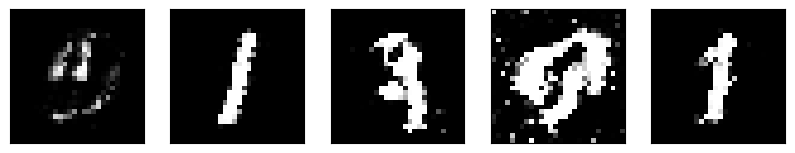

 Epoch: 62 batch: 1 D_loss: 1.264 G_loss: 1.014 
 Epoch: 62 batch: 2 D_loss: 1.281 G_loss: 0.998 
 Epoch: 62 batch: 3 D_loss: 1.275 G_loss: 1.008 
 Epoch: 62 batch: 4 D_loss: 1.266 G_loss: 1.019 
 Epoch: 62 batch: 5 D_loss: 1.277 G_loss: 1.007 
 Epoch: 62 batch: 6 D_loss: 1.327 G_loss: 0.985 
 Epoch: 62 batch: 7 D_loss: 1.275 G_loss: 0.943 
 Epoch: 62 batch: 8 D_loss: 1.330 G_loss: 0.911 
 Epoch: 62 batch: 9 D_loss: 1.256 G_loss: 0.909 
 Epoch: 62 batch: 10 D_loss: 1.219 G_loss: 0.895 
 Epoch: 62 batch: 11 D_loss: 1.271 G_loss: 0.915 
 Epoch: 62 batch: 12 D_loss: 1.246 G_loss: 0.947 
 Epoch: 62 batch: 13 D_loss: 1.215 G_loss: 1.013 
 Epoch: 62 batch: 14 D_loss: 1.282 G_loss: 1.006 
 Epoch: 62 batch: 15 D_loss: 1.257 G_loss: 1.032 
 Epoch: 62 batch: 16 D_loss: 1.246 G_loss: 1.086 
 Epoch: 62 batch: 17 D_loss: 1.213 G_loss: 1.092 
 Epoch: 62 batch: 18 D_loss: 1.213 G_loss: 1.086 
 Epoch: 62 batch: 19 D_loss: 1.197 G_loss: 1.160 
 Epoch: 62 batch: 20 D_loss: 1.196 G_loss: 1.270 
 Epoch: 6

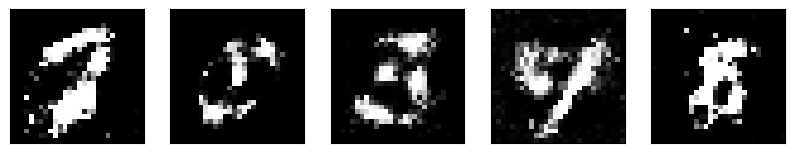

 Epoch: 63 batch: 1 D_loss: 1.262 G_loss: 1.228 
 Epoch: 63 batch: 2 D_loss: 1.280 G_loss: 1.198 
 Epoch: 63 batch: 3 D_loss: 1.287 G_loss: 1.168 
 Epoch: 63 batch: 4 D_loss: 1.225 G_loss: 1.210 
 Epoch: 63 batch: 5 D_loss: 1.336 G_loss: 1.113 
 Epoch: 63 batch: 6 D_loss: 1.275 G_loss: 1.120 
 Epoch: 63 batch: 7 D_loss: 1.278 G_loss: 1.164 
 Epoch: 63 batch: 8 D_loss: 1.319 G_loss: 1.073 
 Epoch: 63 batch: 9 D_loss: 1.302 G_loss: 1.058 
 Epoch: 63 batch: 10 D_loss: 1.254 G_loss: 1.012 
 Epoch: 63 batch: 11 D_loss: 1.358 G_loss: 0.981 
 Epoch: 63 batch: 12 D_loss: 1.275 G_loss: 0.940 
 Epoch: 63 batch: 13 D_loss: 1.283 G_loss: 0.904 
 Epoch: 63 batch: 14 D_loss: 1.302 G_loss: 0.891 
 Epoch: 63 batch: 15 D_loss: 1.284 G_loss: 0.923 
 Epoch: 63 batch: 16 D_loss: 1.275 G_loss: 0.907 
 Epoch: 63 batch: 17 D_loss: 1.277 G_loss: 0.957 
 Epoch: 63 batch: 18 D_loss: 1.241 G_loss: 0.921 
 Epoch: 63 batch: 19 D_loss: 1.297 G_loss: 0.923 
 Epoch: 63 batch: 20 D_loss: 1.244 G_loss: 0.970 
 Epoch: 6

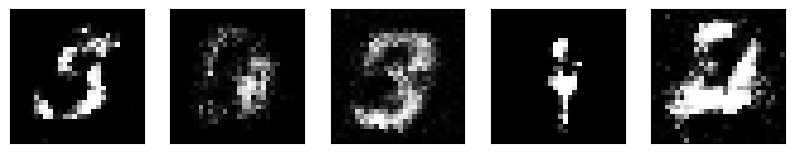

 Epoch: 64 batch: 1 D_loss: 1.242 G_loss: 1.690 
 Epoch: 64 batch: 2 D_loss: 1.270 G_loss: 1.343 
 Epoch: 64 batch: 3 D_loss: 1.282 G_loss: 1.218 
 Epoch: 64 batch: 4 D_loss: 1.262 G_loss: 0.992 
 Epoch: 64 batch: 5 D_loss: 1.287 G_loss: 0.993 
 Epoch: 64 batch: 6 D_loss: 1.319 G_loss: 0.933 
 Epoch: 64 batch: 7 D_loss: 1.286 G_loss: 0.998 
 Epoch: 64 batch: 8 D_loss: 1.331 G_loss: 0.963 
 Epoch: 64 batch: 9 D_loss: 1.342 G_loss: 0.992 
 Epoch: 64 batch: 10 D_loss: 1.299 G_loss: 1.036 
 Epoch: 64 batch: 11 D_loss: 1.318 G_loss: 0.997 
 Epoch: 64 batch: 12 D_loss: 1.322 G_loss: 0.936 
 Epoch: 64 batch: 13 D_loss: 1.287 G_loss: 0.912 
 Epoch: 64 batch: 14 D_loss: 1.316 G_loss: 0.846 
 Epoch: 64 batch: 15 D_loss: 1.297 G_loss: 0.871 
 Epoch: 64 batch: 16 D_loss: 1.275 G_loss: 0.825 
 Epoch: 64 batch: 17 D_loss: 1.232 G_loss: 0.862 
 Epoch: 64 batch: 18 D_loss: 1.285 G_loss: 0.917 
 Epoch: 64 batch: 19 D_loss: 1.298 G_loss: 0.938 
 Epoch: 64 batch: 20 D_loss: 1.262 G_loss: 0.954 
 Epoch: 6

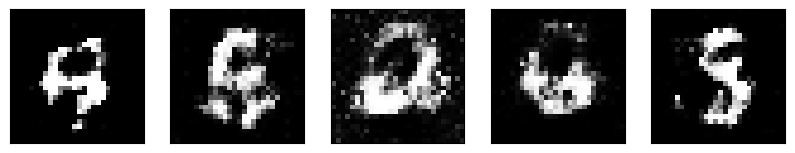

 Epoch: 65 batch: 1 D_loss: 1.225 G_loss: 1.267 
 Epoch: 65 batch: 2 D_loss: 1.298 G_loss: 1.227 
 Epoch: 65 batch: 3 D_loss: 1.245 G_loss: 1.152 
 Epoch: 65 batch: 4 D_loss: 1.212 G_loss: 1.152 
 Epoch: 65 batch: 5 D_loss: 1.281 G_loss: 1.088 
 Epoch: 65 batch: 6 D_loss: 1.260 G_loss: 1.043 
 Epoch: 65 batch: 7 D_loss: 1.258 G_loss: 1.172 
 Epoch: 65 batch: 8 D_loss: 1.276 G_loss: 1.060 
 Epoch: 65 batch: 9 D_loss: 1.303 G_loss: 1.022 
 Epoch: 65 batch: 10 D_loss: 1.254 G_loss: 0.976 
 Epoch: 65 batch: 11 D_loss: 1.269 G_loss: 0.959 
 Epoch: 65 batch: 12 D_loss: 1.255 G_loss: 0.969 
 Epoch: 65 batch: 13 D_loss: 1.231 G_loss: 0.969 
 Epoch: 65 batch: 14 D_loss: 1.253 G_loss: 1.045 
 Epoch: 65 batch: 15 D_loss: 1.233 G_loss: 1.047 
 Epoch: 65 batch: 16 D_loss: 1.253 G_loss: 1.099 
 Epoch: 65 batch: 17 D_loss: 1.233 G_loss: 1.102 
 Epoch: 65 batch: 18 D_loss: 1.222 G_loss: 1.215 
 Epoch: 65 batch: 19 D_loss: 1.252 G_loss: 1.300 
 Epoch: 65 batch: 20 D_loss: 1.136 G_loss: 1.405 
 Epoch: 6

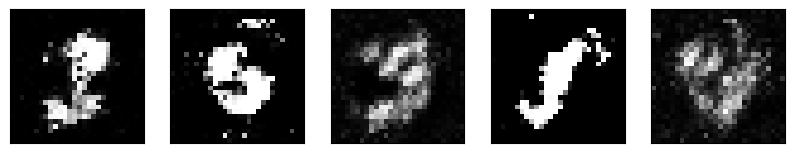

 Epoch: 66 batch: 1 D_loss: 1.304 G_loss: 0.997 
 Epoch: 66 batch: 2 D_loss: 1.298 G_loss: 0.923 
 Epoch: 66 batch: 3 D_loss: 1.313 G_loss: 0.900 
 Epoch: 66 batch: 4 D_loss: 1.301 G_loss: 0.885 
 Epoch: 66 batch: 5 D_loss: 1.314 G_loss: 0.868 
 Epoch: 66 batch: 6 D_loss: 1.326 G_loss: 0.904 
 Epoch: 66 batch: 7 D_loss: 1.263 G_loss: 0.893 
 Epoch: 66 batch: 8 D_loss: 1.316 G_loss: 0.946 
 Epoch: 66 batch: 9 D_loss: 1.281 G_loss: 1.071 
 Epoch: 66 batch: 10 D_loss: 1.194 G_loss: 1.125 
 Epoch: 66 batch: 11 D_loss: 1.229 G_loss: 1.222 
 Epoch: 66 batch: 12 D_loss: 1.144 G_loss: 1.357 
 Epoch: 66 batch: 13 D_loss: 1.136 G_loss: 1.741 
 Epoch: 66 batch: 14 D_loss: 1.186 G_loss: 2.080 
 Epoch: 66 batch: 15 D_loss: 1.264 G_loss: 1.952 
 Epoch: 66 batch: 16 D_loss: 1.258 G_loss: 1.746 
 Epoch: 66 batch: 17 D_loss: 1.321 G_loss: 1.197 
 Epoch: 66 batch: 18 D_loss: 1.341 G_loss: 1.093 
 Epoch: 66 batch: 19 D_loss: 1.339 G_loss: 1.068 
 Epoch: 66 batch: 20 D_loss: 1.323 G_loss: 1.229 
 Epoch: 6

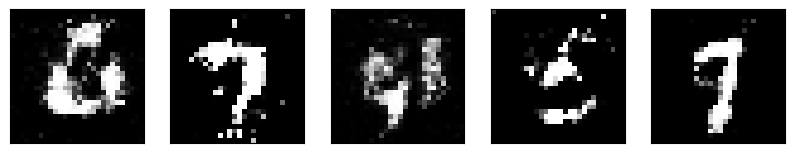

 Epoch: 67 batch: 1 D_loss: 1.266 G_loss: 1.021 
 Epoch: 67 batch: 2 D_loss: 1.195 G_loss: 1.020 
 Epoch: 67 batch: 3 D_loss: 1.238 G_loss: 1.047 
 Epoch: 67 batch: 4 D_loss: 1.211 G_loss: 1.068 
 Epoch: 67 batch: 5 D_loss: 1.290 G_loss: 1.192 
 Epoch: 67 batch: 6 D_loss: 1.294 G_loss: 1.036 
 Epoch: 67 batch: 7 D_loss: 1.236 G_loss: 1.043 
 Epoch: 67 batch: 8 D_loss: 1.236 G_loss: 1.085 
 Epoch: 67 batch: 9 D_loss: 1.239 G_loss: 1.067 
 Epoch: 67 batch: 10 D_loss: 1.221 G_loss: 1.162 
 Epoch: 67 batch: 11 D_loss: 1.226 G_loss: 1.115 
 Epoch: 67 batch: 12 D_loss: 1.204 G_loss: 1.270 
 Epoch: 67 batch: 13 D_loss: 1.187 G_loss: 1.140 
 Epoch: 67 batch: 14 D_loss: 1.152 G_loss: 1.195 
 Epoch: 67 batch: 15 D_loss: 1.195 G_loss: 1.274 
 Epoch: 67 batch: 16 D_loss: 1.224 G_loss: 1.281 
 Epoch: 67 batch: 17 D_loss: 1.116 G_loss: 1.187 
 Epoch: 67 batch: 18 D_loss: 1.187 G_loss: 1.111 
 Epoch: 67 batch: 19 D_loss: 1.193 G_loss: 1.313 
 Epoch: 67 batch: 20 D_loss: 1.170 G_loss: 1.338 
 Epoch: 6

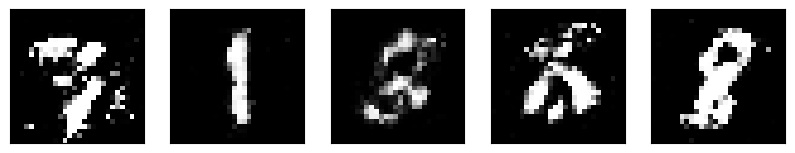

 Epoch: 68 batch: 1 D_loss: 1.288 G_loss: 1.055 
 Epoch: 68 batch: 2 D_loss: 1.222 G_loss: 1.035 
 Epoch: 68 batch: 3 D_loss: 1.213 G_loss: 1.035 
 Epoch: 68 batch: 4 D_loss: 1.212 G_loss: 1.109 
 Epoch: 68 batch: 5 D_loss: 1.241 G_loss: 1.072 
 Epoch: 68 batch: 6 D_loss: 1.273 G_loss: 1.156 
 Epoch: 68 batch: 7 D_loss: 1.132 G_loss: 1.324 
 Epoch: 68 batch: 8 D_loss: 1.244 G_loss: 1.360 
 Epoch: 68 batch: 9 D_loss: 1.283 G_loss: 1.312 
 Epoch: 68 batch: 10 D_loss: 1.201 G_loss: 1.410 
 Epoch: 68 batch: 11 D_loss: 1.234 G_loss: 1.438 
 Epoch: 68 batch: 12 D_loss: 1.253 G_loss: 1.577 
 Epoch: 68 batch: 13 D_loss: 1.176 G_loss: 1.368 
 Epoch: 68 batch: 14 D_loss: 1.249 G_loss: 1.380 
 Epoch: 68 batch: 15 D_loss: 1.258 G_loss: 1.303 
 Epoch: 68 batch: 16 D_loss: 1.209 G_loss: 1.240 
 Epoch: 68 batch: 17 D_loss: 1.251 G_loss: 1.121 
 Epoch: 68 batch: 18 D_loss: 1.259 G_loss: 1.156 
 Epoch: 68 batch: 19 D_loss: 1.248 G_loss: 1.167 
 Epoch: 68 batch: 20 D_loss: 1.247 G_loss: 1.067 
 Epoch: 6

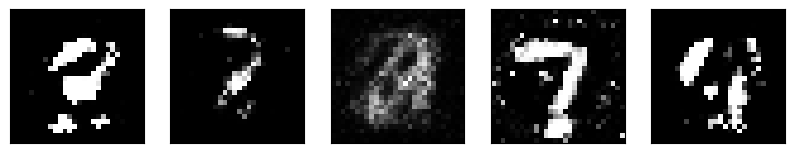

 Epoch: 69 batch: 1 D_loss: 1.311 G_loss: 1.945 
 Epoch: 69 batch: 2 D_loss: 1.222 G_loss: 1.943 
 Epoch: 69 batch: 3 D_loss: 1.215 G_loss: 1.704 
 Epoch: 69 batch: 4 D_loss: 1.220 G_loss: 1.151 
 Epoch: 69 batch: 5 D_loss: 1.241 G_loss: 1.054 
 Epoch: 69 batch: 6 D_loss: 1.259 G_loss: 1.182 
 Epoch: 69 batch: 7 D_loss: 1.187 G_loss: 1.360 
 Epoch: 69 batch: 8 D_loss: 1.415 G_loss: 1.435 
 Epoch: 69 batch: 9 D_loss: 1.401 G_loss: 1.230 
 Epoch: 69 batch: 10 D_loss: 1.311 G_loss: 1.169 
 Epoch: 69 batch: 11 D_loss: 1.334 G_loss: 0.889 
 Epoch: 69 batch: 12 D_loss: 1.314 G_loss: 0.873 
 Epoch: 69 batch: 13 D_loss: 1.342 G_loss: 0.909 
 Epoch: 69 batch: 14 D_loss: 1.337 G_loss: 0.935 
 Epoch: 69 batch: 15 D_loss: 1.310 G_loss: 0.952 
 Epoch: 69 batch: 16 D_loss: 1.332 G_loss: 0.955 
 Epoch: 69 batch: 17 D_loss: 1.341 G_loss: 0.962 
 Epoch: 69 batch: 18 D_loss: 1.329 G_loss: 0.902 
 Epoch: 69 batch: 19 D_loss: 1.318 G_loss: 0.860 
 Epoch: 69 batch: 20 D_loss: 1.309 G_loss: 0.854 
 Epoch: 6

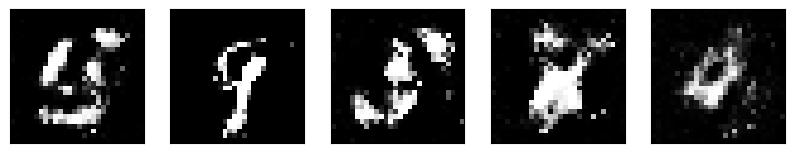

 Epoch: 70 batch: 1 D_loss: 1.213 G_loss: 1.144 
 Epoch: 70 batch: 2 D_loss: 1.184 G_loss: 1.283 
 Epoch: 70 batch: 3 D_loss: 1.161 G_loss: 1.306 
 Epoch: 70 batch: 4 D_loss: 1.164 G_loss: 1.355 
 Epoch: 70 batch: 5 D_loss: 1.196 G_loss: 1.685 
 Epoch: 70 batch: 6 D_loss: 1.272 G_loss: 1.771 
 Epoch: 70 batch: 7 D_loss: 1.266 G_loss: 1.735 
 Epoch: 70 batch: 8 D_loss: 1.280 G_loss: 1.959 
 Epoch: 70 batch: 9 D_loss: 1.214 G_loss: 1.210 
 Epoch: 70 batch: 10 D_loss: 1.289 G_loss: 1.292 
 Epoch: 70 batch: 11 D_loss: 1.259 G_loss: 1.135 
 Epoch: 70 batch: 12 D_loss: 1.234 G_loss: 1.245 
 Epoch: 70 batch: 13 D_loss: 1.265 G_loss: 1.233 
 Epoch: 70 batch: 14 D_loss: 1.303 G_loss: 1.276 
 Epoch: 70 batch: 15 D_loss: 1.288 G_loss: 1.084 
 Epoch: 70 batch: 16 D_loss: 1.284 G_loss: 1.025 
 Epoch: 70 batch: 17 D_loss: 1.246 G_loss: 0.977 
 Epoch: 70 batch: 18 D_loss: 1.234 G_loss: 0.931 
 Epoch: 70 batch: 19 D_loss: 1.235 G_loss: 0.958 
 Epoch: 70 batch: 20 D_loss: 1.244 G_loss: 0.979 
 Epoch: 7

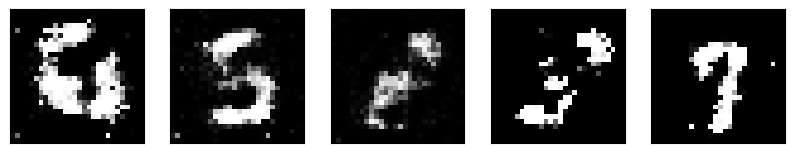

 Epoch: 71 batch: 1 D_loss: 1.248 G_loss: 1.357 
 Epoch: 71 batch: 2 D_loss: 1.239 G_loss: 1.299 
 Epoch: 71 batch: 3 D_loss: 1.243 G_loss: 1.231 
 Epoch: 71 batch: 4 D_loss: 1.162 G_loss: 1.189 
 Epoch: 71 batch: 5 D_loss: 1.232 G_loss: 1.169 
 Epoch: 71 batch: 6 D_loss: 1.265 G_loss: 1.135 
 Epoch: 71 batch: 7 D_loss: 1.200 G_loss: 1.128 
 Epoch: 71 batch: 8 D_loss: 1.299 G_loss: 1.194 
 Epoch: 71 batch: 9 D_loss: 1.282 G_loss: 1.240 
 Epoch: 71 batch: 10 D_loss: 1.228 G_loss: 1.263 
 Epoch: 71 batch: 11 D_loss: 1.233 G_loss: 1.228 
 Epoch: 71 batch: 12 D_loss: 1.265 G_loss: 1.165 
 Epoch: 71 batch: 13 D_loss: 1.225 G_loss: 1.077 
 Epoch: 71 batch: 14 D_loss: 1.223 G_loss: 1.144 
 Epoch: 71 batch: 15 D_loss: 1.276 G_loss: 1.104 
 Epoch: 71 batch: 16 D_loss: 1.267 G_loss: 1.096 
 Epoch: 71 batch: 17 D_loss: 1.229 G_loss: 1.083 
 Epoch: 71 batch: 18 D_loss: 1.232 G_loss: 1.019 
 Epoch: 71 batch: 19 D_loss: 1.242 G_loss: 1.015 
 Epoch: 71 batch: 20 D_loss: 1.296 G_loss: 1.197 
 Epoch: 7

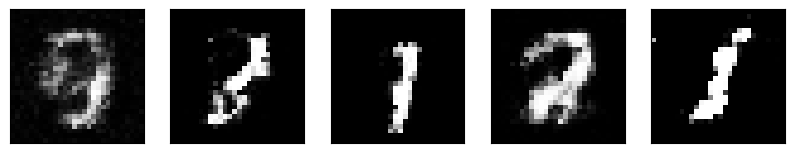

 Epoch: 72 batch: 1 D_loss: 1.224 G_loss: 1.159 
 Epoch: 72 batch: 2 D_loss: 1.217 G_loss: 1.313 
 Epoch: 72 batch: 3 D_loss: 1.240 G_loss: 1.415 
 Epoch: 72 batch: 4 D_loss: 1.170 G_loss: 1.344 
 Epoch: 72 batch: 5 D_loss: 1.266 G_loss: 1.436 
 Epoch: 72 batch: 6 D_loss: 1.291 G_loss: 1.221 
 Epoch: 72 batch: 7 D_loss: 1.189 G_loss: 1.162 
 Epoch: 72 batch: 8 D_loss: 1.332 G_loss: 1.079 
 Epoch: 72 batch: 9 D_loss: 1.257 G_loss: 1.139 
 Epoch: 72 batch: 10 D_loss: 1.245 G_loss: 0.992 
 Epoch: 72 batch: 11 D_loss: 1.230 G_loss: 1.036 
 Epoch: 72 batch: 12 D_loss: 1.233 G_loss: 1.051 
 Epoch: 72 batch: 13 D_loss: 1.222 G_loss: 1.087 
 Epoch: 72 batch: 14 D_loss: 1.239 G_loss: 0.997 
 Epoch: 72 batch: 15 D_loss: 1.180 G_loss: 1.113 
 Epoch: 72 batch: 16 D_loss: 1.178 G_loss: 1.045 
 Epoch: 72 batch: 17 D_loss: 1.162 G_loss: 1.150 
 Epoch: 72 batch: 18 D_loss: 1.237 G_loss: 1.268 
 Epoch: 72 batch: 19 D_loss: 1.180 G_loss: 1.344 
 Epoch: 72 batch: 20 D_loss: 1.220 G_loss: 1.606 
 Epoch: 7

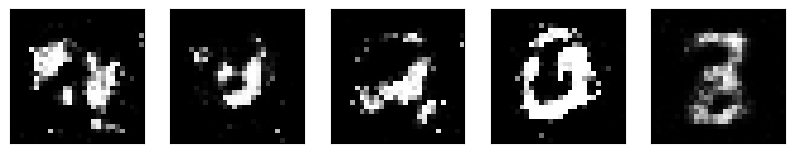

 Epoch: 73 batch: 1 D_loss: 1.245 G_loss: 1.333 
 Epoch: 73 batch: 2 D_loss: 1.254 G_loss: 1.371 
 Epoch: 73 batch: 3 D_loss: 1.265 G_loss: 1.304 
 Epoch: 73 batch: 4 D_loss: 1.241 G_loss: 1.333 
 Epoch: 73 batch: 5 D_loss: 1.294 G_loss: 1.165 
 Epoch: 73 batch: 6 D_loss: 1.285 G_loss: 1.204 
 Epoch: 73 batch: 7 D_loss: 1.225 G_loss: 1.124 
 Epoch: 73 batch: 8 D_loss: 1.224 G_loss: 1.109 
 Epoch: 73 batch: 9 D_loss: 1.181 G_loss: 1.147 
 Epoch: 73 batch: 10 D_loss: 1.143 G_loss: 1.106 
 Epoch: 73 batch: 11 D_loss: 1.220 G_loss: 1.439 
 Epoch: 73 batch: 12 D_loss: 1.195 G_loss: 1.560 
 Epoch: 73 batch: 13 D_loss: 1.212 G_loss: 1.739 
 Epoch: 73 batch: 14 D_loss: 1.190 G_loss: 1.706 
 Epoch: 73 batch: 15 D_loss: 1.342 G_loss: 1.666 
 Epoch: 73 batch: 16 D_loss: 1.191 G_loss: 1.319 
 Epoch: 73 batch: 17 D_loss: 1.222 G_loss: 1.469 
 Epoch: 73 batch: 18 D_loss: 1.195 G_loss: 1.652 
 Epoch: 73 batch: 19 D_loss: 1.222 G_loss: 1.830 
 Epoch: 73 batch: 20 D_loss: 1.293 G_loss: 1.550 
 Epoch: 7

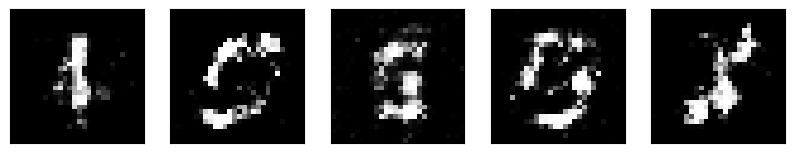

 Epoch: 74 batch: 1 D_loss: 1.274 G_loss: 1.694 
 Epoch: 74 batch: 2 D_loss: 1.223 G_loss: 1.471 
 Epoch: 74 batch: 3 D_loss: 1.205 G_loss: 1.282 
 Epoch: 74 batch: 4 D_loss: 1.185 G_loss: 1.196 
 Epoch: 74 batch: 5 D_loss: 1.272 G_loss: 1.100 
 Epoch: 74 batch: 6 D_loss: 1.254 G_loss: 1.185 
 Epoch: 74 batch: 7 D_loss: 1.225 G_loss: 1.229 
 Epoch: 74 batch: 8 D_loss: 1.247 G_loss: 1.159 
 Epoch: 74 batch: 9 D_loss: 1.266 G_loss: 1.282 
 Epoch: 74 batch: 10 D_loss: 1.173 G_loss: 1.277 
 Epoch: 74 batch: 11 D_loss: 1.207 G_loss: 1.243 
 Epoch: 74 batch: 12 D_loss: 1.238 G_loss: 1.278 
 Epoch: 74 batch: 13 D_loss: 1.176 G_loss: 1.109 
 Epoch: 74 batch: 14 D_loss: 1.222 G_loss: 1.100 
 Epoch: 74 batch: 15 D_loss: 1.243 G_loss: 1.096 
 Epoch: 74 batch: 16 D_loss: 1.267 G_loss: 1.162 
 Epoch: 74 batch: 17 D_loss: 1.219 G_loss: 1.160 
 Epoch: 74 batch: 18 D_loss: 1.164 G_loss: 1.343 
 Epoch: 74 batch: 19 D_loss: 1.245 G_loss: 1.301 
 Epoch: 74 batch: 20 D_loss: 1.266 G_loss: 1.472 
 Epoch: 7

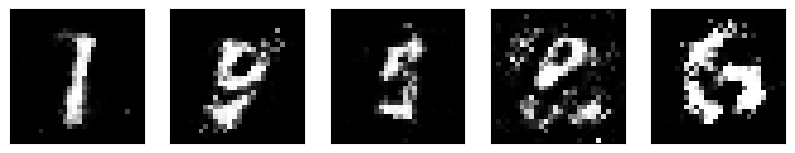

 Epoch: 75 batch: 1 D_loss: 1.147 G_loss: 1.895 
 Epoch: 75 batch: 2 D_loss: 1.294 G_loss: 1.756 
 Epoch: 75 batch: 3 D_loss: 1.210 G_loss: 1.244 
 Epoch: 75 batch: 4 D_loss: 1.248 G_loss: 1.142 
 Epoch: 75 batch: 5 D_loss: 1.338 G_loss: 1.128 
 Epoch: 75 batch: 6 D_loss: 1.233 G_loss: 1.186 
 Epoch: 75 batch: 7 D_loss: 1.246 G_loss: 1.101 
 Epoch: 75 batch: 8 D_loss: 1.383 G_loss: 1.119 
 Epoch: 75 batch: 9 D_loss: 1.358 G_loss: 1.084 
 Epoch: 75 batch: 10 D_loss: 1.271 G_loss: 0.982 
 Epoch: 75 batch: 11 D_loss: 1.260 G_loss: 0.971 
 Epoch: 75 batch: 12 D_loss: 1.257 G_loss: 0.969 
 Epoch: 75 batch: 13 D_loss: 1.283 G_loss: 0.920 
 Epoch: 75 batch: 14 D_loss: 1.283 G_loss: 0.934 
 Epoch: 75 batch: 15 D_loss: 1.243 G_loss: 0.881 
 Epoch: 75 batch: 16 D_loss: 1.234 G_loss: 0.904 
 Epoch: 75 batch: 17 D_loss: 1.250 G_loss: 0.875 
 Epoch: 75 batch: 18 D_loss: 1.263 G_loss: 0.905 
 Epoch: 75 batch: 19 D_loss: 1.247 G_loss: 0.894 
 Epoch: 75 batch: 20 D_loss: 1.224 G_loss: 0.935 
 Epoch: 7

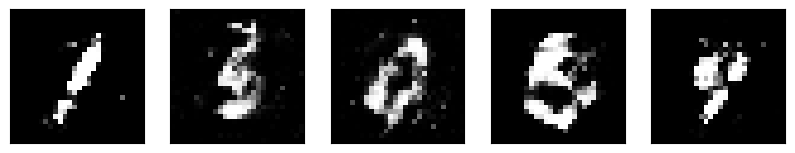

 Epoch: 76 batch: 1 D_loss: 1.271 G_loss: 1.022 
 Epoch: 76 batch: 2 D_loss: 1.252 G_loss: 1.002 
 Epoch: 76 batch: 3 D_loss: 1.203 G_loss: 0.955 
 Epoch: 76 batch: 4 D_loss: 1.249 G_loss: 0.967 
 Epoch: 76 batch: 5 D_loss: 1.272 G_loss: 0.997 
 Epoch: 76 batch: 6 D_loss: 1.273 G_loss: 1.016 
 Epoch: 76 batch: 7 D_loss: 1.212 G_loss: 1.061 
 Epoch: 76 batch: 8 D_loss: 1.232 G_loss: 1.074 
 Epoch: 76 batch: 9 D_loss: 1.218 G_loss: 1.082 
 Epoch: 76 batch: 10 D_loss: 1.246 G_loss: 1.212 
 Epoch: 76 batch: 11 D_loss: 1.202 G_loss: 1.241 
 Epoch: 76 batch: 12 D_loss: 1.199 G_loss: 1.317 
 Epoch: 76 batch: 13 D_loss: 1.178 G_loss: 1.534 
 Epoch: 76 batch: 14 D_loss: 1.198 G_loss: 1.492 
 Epoch: 76 batch: 15 D_loss: 1.276 G_loss: 1.375 
 Epoch: 76 batch: 16 D_loss: 1.201 G_loss: 1.209 
 Epoch: 76 batch: 17 D_loss: 1.177 G_loss: 1.146 
 Epoch: 76 batch: 18 D_loss: 1.290 G_loss: 1.265 
 Epoch: 76 batch: 19 D_loss: 1.281 G_loss: 1.328 
 Epoch: 76 batch: 20 D_loss: 1.245 G_loss: 1.238 
 Epoch: 7

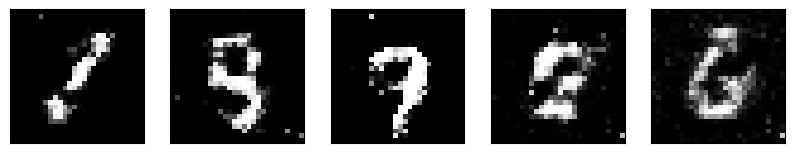

 Epoch: 77 batch: 1 D_loss: 1.286 G_loss: 1.608 
 Epoch: 77 batch: 2 D_loss: 1.230 G_loss: 1.586 
 Epoch: 77 batch: 3 D_loss: 1.249 G_loss: 1.254 
 Epoch: 77 batch: 4 D_loss: 1.219 G_loss: 1.075 
 Epoch: 77 batch: 5 D_loss: 1.261 G_loss: 1.059 
 Epoch: 77 batch: 6 D_loss: 1.272 G_loss: 0.997 
 Epoch: 77 batch: 7 D_loss: 1.283 G_loss: 1.080 
 Epoch: 77 batch: 8 D_loss: 1.300 G_loss: 1.017 
 Epoch: 77 batch: 9 D_loss: 1.302 G_loss: 1.028 
 Epoch: 77 batch: 10 D_loss: 1.235 G_loss: 1.081 
 Epoch: 77 batch: 11 D_loss: 1.290 G_loss: 0.991 
 Epoch: 77 batch: 12 D_loss: 1.243 G_loss: 1.054 
 Epoch: 77 batch: 13 D_loss: 1.206 G_loss: 1.184 
 Epoch: 77 batch: 14 D_loss: 1.206 G_loss: 1.179 
 Epoch: 77 batch: 15 D_loss: 1.260 G_loss: 1.243 
 Epoch: 77 batch: 16 D_loss: 1.272 G_loss: 1.436 
 Epoch: 77 batch: 17 D_loss: 1.241 G_loss: 1.330 
 Epoch: 77 batch: 18 D_loss: 1.209 G_loss: 1.220 
 Epoch: 77 batch: 19 D_loss: 1.220 G_loss: 1.237 
 Epoch: 77 batch: 20 D_loss: 1.214 G_loss: 1.503 
 Epoch: 7

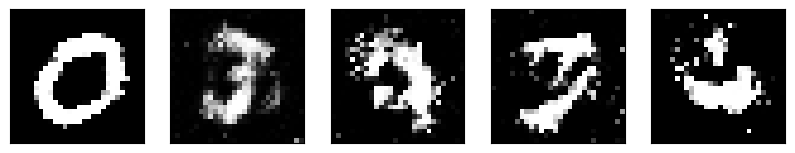

 Epoch: 78 batch: 1 D_loss: 1.344 G_loss: 1.602 
 Epoch: 78 batch: 2 D_loss: 1.273 G_loss: 1.311 
 Epoch: 78 batch: 3 D_loss: 1.266 G_loss: 1.304 
 Epoch: 78 batch: 4 D_loss: 1.213 G_loss: 1.213 
 Epoch: 78 batch: 5 D_loss: 1.247 G_loss: 1.198 
 Epoch: 78 batch: 6 D_loss: 1.247 G_loss: 1.119 
 Epoch: 78 batch: 7 D_loss: 1.228 G_loss: 1.226 
 Epoch: 78 batch: 8 D_loss: 1.311 G_loss: 1.337 
 Epoch: 78 batch: 9 D_loss: 1.302 G_loss: 1.319 
 Epoch: 78 batch: 10 D_loss: 1.221 G_loss: 1.129 
 Epoch: 78 batch: 11 D_loss: 1.246 G_loss: 1.168 
 Epoch: 78 batch: 12 D_loss: 1.192 G_loss: 1.078 
 Epoch: 78 batch: 13 D_loss: 1.234 G_loss: 1.132 
 Epoch: 78 batch: 14 D_loss: 1.203 G_loss: 1.269 
 Epoch: 78 batch: 15 D_loss: 1.282 G_loss: 1.399 
 Epoch: 78 batch: 16 D_loss: 1.229 G_loss: 1.458 
 Epoch: 78 batch: 17 D_loss: 1.165 G_loss: 1.566 
 Epoch: 78 batch: 18 D_loss: 1.302 G_loss: 1.334 
 Epoch: 78 batch: 19 D_loss: 1.310 G_loss: 1.254 
 Epoch: 78 batch: 20 D_loss: 1.291 G_loss: 1.207 
 Epoch: 7

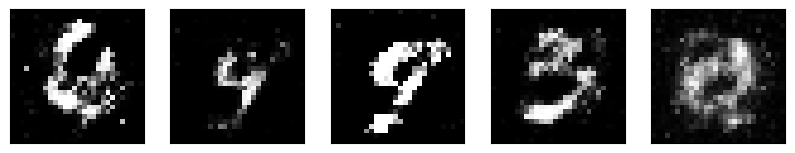

 Epoch: 79 batch: 1 D_loss: 1.227 G_loss: 1.339 
 Epoch: 79 batch: 2 D_loss: 1.238 G_loss: 1.332 
 Epoch: 79 batch: 3 D_loss: 1.252 G_loss: 1.176 
 Epoch: 79 batch: 4 D_loss: 1.246 G_loss: 1.120 
 Epoch: 79 batch: 5 D_loss: 1.291 G_loss: 1.001 
 Epoch: 79 batch: 6 D_loss: 1.261 G_loss: 1.069 
 Epoch: 79 batch: 7 D_loss: 1.222 G_loss: 1.144 
 Epoch: 79 batch: 8 D_loss: 1.209 G_loss: 1.072 
 Epoch: 79 batch: 9 D_loss: 1.190 G_loss: 1.339 
 Epoch: 79 batch: 10 D_loss: 1.239 G_loss: 1.388 
 Epoch: 79 batch: 11 D_loss: 1.174 G_loss: 1.337 
 Epoch: 79 batch: 12 D_loss: 1.229 G_loss: 1.253 
 Epoch: 79 batch: 13 D_loss: 1.305 G_loss: 1.267 
 Epoch: 79 batch: 14 D_loss: 1.261 G_loss: 1.013 
 Epoch: 79 batch: 15 D_loss: 1.282 G_loss: 1.088 
 Epoch: 79 batch: 16 D_loss: 1.207 G_loss: 0.992 
 Epoch: 79 batch: 17 D_loss: 1.215 G_loss: 1.029 
 Epoch: 79 batch: 18 D_loss: 1.275 G_loss: 1.187 
 Epoch: 79 batch: 19 D_loss: 1.207 G_loss: 1.329 
 Epoch: 79 batch: 20 D_loss: 1.259 G_loss: 1.388 
 Epoch: 7

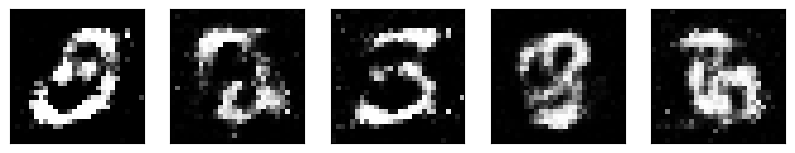

 Epoch: 80 batch: 1 D_loss: 1.301 G_loss: 0.880 
 Epoch: 80 batch: 2 D_loss: 1.294 G_loss: 0.886 
 Epoch: 80 batch: 3 D_loss: 1.272 G_loss: 0.881 
 Epoch: 80 batch: 4 D_loss: 1.250 G_loss: 0.942 
 Epoch: 80 batch: 5 D_loss: 1.290 G_loss: 0.883 
 Epoch: 80 batch: 6 D_loss: 1.285 G_loss: 0.967 
 Epoch: 80 batch: 7 D_loss: 1.267 G_loss: 0.945 
 Epoch: 80 batch: 8 D_loss: 1.307 G_loss: 1.054 
 Epoch: 80 batch: 9 D_loss: 1.260 G_loss: 1.018 
 Epoch: 80 batch: 10 D_loss: 1.257 G_loss: 1.045 
 Epoch: 80 batch: 11 D_loss: 1.264 G_loss: 1.032 
 Epoch: 80 batch: 12 D_loss: 1.278 G_loss: 1.046 
 Epoch: 80 batch: 13 D_loss: 1.249 G_loss: 1.081 
 Epoch: 80 batch: 14 D_loss: 1.294 G_loss: 1.102 
 Epoch: 80 batch: 15 D_loss: 1.250 G_loss: 1.106 
 Epoch: 80 batch: 16 D_loss: 1.240 G_loss: 1.136 
 Epoch: 80 batch: 17 D_loss: 1.203 G_loss: 1.116 
 Epoch: 80 batch: 18 D_loss: 1.187 G_loss: 1.154 
 Epoch: 80 batch: 19 D_loss: 1.228 G_loss: 1.130 
 Epoch: 80 batch: 20 D_loss: 1.212 G_loss: 1.132 
 Epoch: 8

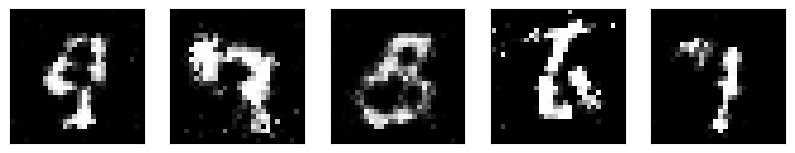

 Epoch: 81 batch: 1 D_loss: 1.273 G_loss: 0.889 
 Epoch: 81 batch: 2 D_loss: 1.331 G_loss: 0.938 
 Epoch: 81 batch: 3 D_loss: 1.283 G_loss: 0.923 
 Epoch: 81 batch: 4 D_loss: 1.254 G_loss: 0.946 
 Epoch: 81 batch: 5 D_loss: 1.300 G_loss: 0.990 
 Epoch: 81 batch: 6 D_loss: 1.267 G_loss: 1.011 
 Epoch: 81 batch: 7 D_loss: 1.233 G_loss: 1.014 
 Epoch: 81 batch: 8 D_loss: 1.215 G_loss: 1.074 
 Epoch: 81 batch: 9 D_loss: 1.224 G_loss: 1.107 
 Epoch: 81 batch: 10 D_loss: 1.184 G_loss: 1.333 
 Epoch: 81 batch: 11 D_loss: 1.143 G_loss: 1.513 
 Epoch: 81 batch: 12 D_loss: 1.171 G_loss: 2.018 
 Epoch: 81 batch: 13 D_loss: 1.214 G_loss: 2.008 
 Epoch: 81 batch: 14 D_loss: 1.235 G_loss: 1.527 
 Epoch: 81 batch: 15 D_loss: 1.285 G_loss: 1.116 
 Epoch: 81 batch: 16 D_loss: 1.271 G_loss: 1.083 
 Epoch: 81 batch: 17 D_loss: 1.324 G_loss: 0.934 
 Epoch: 81 batch: 18 D_loss: 1.228 G_loss: 1.221 
 Epoch: 81 batch: 19 D_loss: 1.306 G_loss: 1.313 
 Epoch: 81 batch: 20 D_loss: 1.347 G_loss: 1.323 
 Epoch: 8

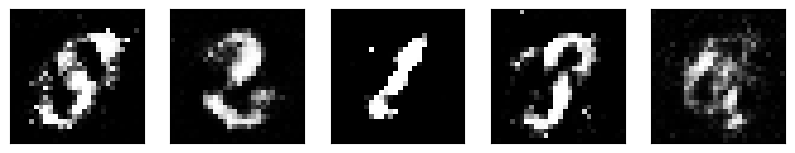

 Epoch: 82 batch: 1 D_loss: 1.255 G_loss: 1.150 
 Epoch: 82 batch: 2 D_loss: 1.213 G_loss: 1.142 
 Epoch: 82 batch: 3 D_loss: 1.221 G_loss: 1.254 
 Epoch: 82 batch: 4 D_loss: 1.232 G_loss: 1.409 
 Epoch: 82 batch: 5 D_loss: 1.254 G_loss: 1.412 
 Epoch: 82 batch: 6 D_loss: 1.253 G_loss: 1.221 
 Epoch: 82 batch: 7 D_loss: 1.276 G_loss: 1.316 
 Epoch: 82 batch: 8 D_loss: 1.327 G_loss: 1.428 
 Epoch: 82 batch: 9 D_loss: 1.335 G_loss: 1.166 
 Epoch: 82 batch: 10 D_loss: 1.244 G_loss: 1.089 
 Epoch: 82 batch: 11 D_loss: 1.284 G_loss: 1.080 
 Epoch: 82 batch: 12 D_loss: 1.287 G_loss: 1.018 
 Epoch: 82 batch: 13 D_loss: 1.266 G_loss: 0.999 
 Epoch: 82 batch: 14 D_loss: 1.276 G_loss: 1.078 
 Epoch: 82 batch: 15 D_loss: 1.273 G_loss: 1.051 
 Epoch: 82 batch: 16 D_loss: 1.278 G_loss: 1.072 
 Epoch: 82 batch: 17 D_loss: 1.270 G_loss: 1.041 
 Epoch: 82 batch: 18 D_loss: 1.264 G_loss: 1.036 
 Epoch: 82 batch: 19 D_loss: 1.270 G_loss: 1.077 
 Epoch: 82 batch: 20 D_loss: 1.267 G_loss: 1.159 
 Epoch: 8

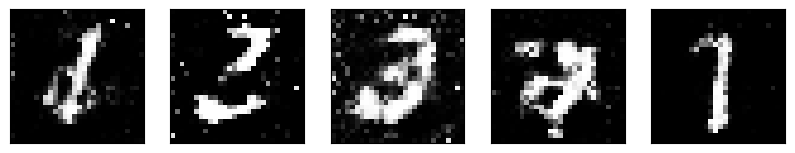

 Epoch: 83 batch: 1 D_loss: 1.286 G_loss: 0.882 
 Epoch: 83 batch: 2 D_loss: 1.280 G_loss: 0.899 
 Epoch: 83 batch: 3 D_loss: 1.262 G_loss: 0.918 
 Epoch: 83 batch: 4 D_loss: 1.256 G_loss: 0.909 
 Epoch: 83 batch: 5 D_loss: 1.321 G_loss: 0.932 
 Epoch: 83 batch: 6 D_loss: 1.278 G_loss: 0.912 
 Epoch: 83 batch: 7 D_loss: 1.229 G_loss: 0.916 
 Epoch: 83 batch: 8 D_loss: 1.298 G_loss: 0.894 
 Epoch: 83 batch: 9 D_loss: 1.289 G_loss: 0.950 
 Epoch: 83 batch: 10 D_loss: 1.249 G_loss: 0.934 
 Epoch: 83 batch: 11 D_loss: 1.238 G_loss: 1.046 
 Epoch: 83 batch: 12 D_loss: 1.230 G_loss: 1.103 
 Epoch: 83 batch: 13 D_loss: 1.153 G_loss: 1.250 
 Epoch: 83 batch: 14 D_loss: 1.239 G_loss: 1.413 
 Epoch: 83 batch: 15 D_loss: 1.247 G_loss: 1.753 
 Epoch: 83 batch: 16 D_loss: 1.204 G_loss: 1.534 
 Epoch: 83 batch: 17 D_loss: 1.210 G_loss: 1.726 
 Epoch: 83 batch: 18 D_loss: 1.288 G_loss: 1.471 
 Epoch: 83 batch: 19 D_loss: 1.290 G_loss: 1.278 
 Epoch: 83 batch: 20 D_loss: 1.249 G_loss: 1.238 
 Epoch: 8

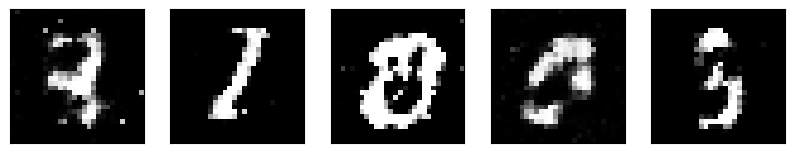

 Epoch: 84 batch: 1 D_loss: 1.303 G_loss: 1.501 
 Epoch: 84 batch: 2 D_loss: 1.277 G_loss: 1.193 
 Epoch: 84 batch: 3 D_loss: 1.235 G_loss: 0.942 
 Epoch: 84 batch: 4 D_loss: 1.280 G_loss: 0.983 
 Epoch: 84 batch: 5 D_loss: 1.284 G_loss: 0.958 
 Epoch: 84 batch: 6 D_loss: 1.247 G_loss: 1.060 
 Epoch: 84 batch: 7 D_loss: 1.256 G_loss: 1.128 
 Epoch: 84 batch: 8 D_loss: 1.327 G_loss: 1.171 
 Epoch: 84 batch: 9 D_loss: 1.347 G_loss: 1.194 
 Epoch: 84 batch: 10 D_loss: 1.257 G_loss: 1.128 
 Epoch: 84 batch: 11 D_loss: 1.269 G_loss: 1.040 
 Epoch: 84 batch: 12 D_loss: 1.305 G_loss: 0.960 
 Epoch: 84 batch: 13 D_loss: 1.268 G_loss: 0.912 
 Epoch: 84 batch: 14 D_loss: 1.254 G_loss: 0.879 
 Epoch: 84 batch: 15 D_loss: 1.340 G_loss: 0.866 
 Epoch: 84 batch: 16 D_loss: 1.265 G_loss: 0.941 
 Epoch: 84 batch: 17 D_loss: 1.243 G_loss: 1.007 
 Epoch: 84 batch: 18 D_loss: 1.246 G_loss: 1.030 
 Epoch: 84 batch: 19 D_loss: 1.216 G_loss: 1.167 
 Epoch: 84 batch: 20 D_loss: 1.245 G_loss: 1.191 
 Epoch: 8

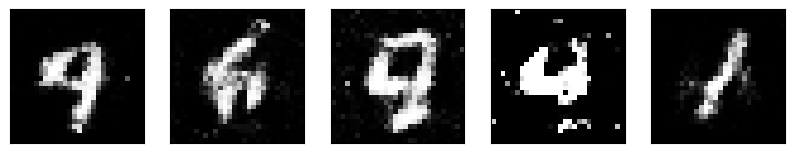

 Epoch: 85 batch: 1 D_loss: 1.208 G_loss: 1.208 
 Epoch: 85 batch: 2 D_loss: 1.244 G_loss: 1.147 
 Epoch: 85 batch: 3 D_loss: 1.260 G_loss: 1.189 
 Epoch: 85 batch: 4 D_loss: 1.212 G_loss: 1.243 
 Epoch: 85 batch: 5 D_loss: 1.269 G_loss: 1.254 
 Epoch: 85 batch: 6 D_loss: 1.222 G_loss: 1.171 
 Epoch: 85 batch: 7 D_loss: 1.225 G_loss: 1.204 
 Epoch: 85 batch: 8 D_loss: 1.266 G_loss: 1.168 
 Epoch: 85 batch: 9 D_loss: 1.269 G_loss: 1.113 
 Epoch: 85 batch: 10 D_loss: 1.194 G_loss: 1.205 
 Epoch: 85 batch: 11 D_loss: 1.252 G_loss: 1.114 
 Epoch: 85 batch: 12 D_loss: 1.281 G_loss: 1.229 
 Epoch: 85 batch: 13 D_loss: 1.230 G_loss: 1.155 
 Epoch: 85 batch: 14 D_loss: 1.278 G_loss: 1.163 
 Epoch: 85 batch: 15 D_loss: 1.307 G_loss: 1.124 
 Epoch: 85 batch: 16 D_loss: 1.260 G_loss: 1.028 
 Epoch: 85 batch: 17 D_loss: 1.270 G_loss: 0.961 
 Epoch: 85 batch: 18 D_loss: 1.296 G_loss: 1.098 
 Epoch: 85 batch: 19 D_loss: 1.251 G_loss: 1.066 
 Epoch: 85 batch: 20 D_loss: 1.286 G_loss: 1.103 
 Epoch: 8

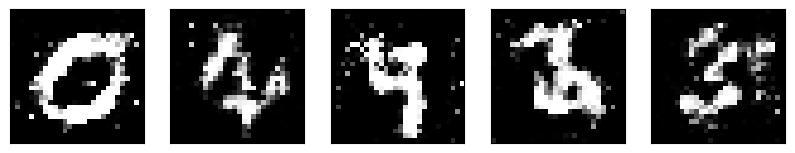

 Epoch: 86 batch: 1 D_loss: 1.257 G_loss: 1.289 
 Epoch: 86 batch: 2 D_loss: 1.228 G_loss: 1.255 
 Epoch: 86 batch: 3 D_loss: 1.216 G_loss: 1.196 
 Epoch: 86 batch: 4 D_loss: 1.196 G_loss: 1.185 
 Epoch: 86 batch: 5 D_loss: 1.298 G_loss: 1.154 
 Epoch: 86 batch: 6 D_loss: 1.290 G_loss: 1.203 
 Epoch: 86 batch: 7 D_loss: 1.284 G_loss: 1.124 
 Epoch: 86 batch: 8 D_loss: 1.300 G_loss: 1.115 
 Epoch: 86 batch: 9 D_loss: 1.267 G_loss: 1.097 
 Epoch: 86 batch: 10 D_loss: 1.186 G_loss: 1.121 
 Epoch: 86 batch: 11 D_loss: 1.240 G_loss: 1.128 
 Epoch: 86 batch: 12 D_loss: 1.240 G_loss: 1.183 
 Epoch: 86 batch: 13 D_loss: 1.269 G_loss: 1.083 
 Epoch: 86 batch: 14 D_loss: 1.329 G_loss: 1.086 
 Epoch: 86 batch: 15 D_loss: 1.257 G_loss: 0.953 
 Epoch: 86 batch: 16 D_loss: 1.252 G_loss: 0.945 
 Epoch: 86 batch: 17 D_loss: 1.231 G_loss: 0.942 
 Epoch: 86 batch: 18 D_loss: 1.260 G_loss: 0.956 
 Epoch: 86 batch: 19 D_loss: 1.240 G_loss: 1.021 
 Epoch: 86 batch: 20 D_loss: 1.300 G_loss: 1.120 
 Epoch: 8

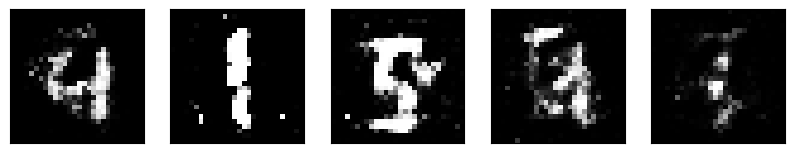

 Epoch: 87 batch: 1 D_loss: 1.262 G_loss: 1.297 
 Epoch: 87 batch: 2 D_loss: 1.221 G_loss: 1.325 
 Epoch: 87 batch: 3 D_loss: 1.237 G_loss: 1.339 
 Epoch: 87 batch: 4 D_loss: 1.189 G_loss: 1.174 
 Epoch: 87 batch: 5 D_loss: 1.295 G_loss: 1.223 
 Epoch: 87 batch: 6 D_loss: 1.257 G_loss: 1.286 
 Epoch: 87 batch: 7 D_loss: 1.266 G_loss: 1.318 
 Epoch: 87 batch: 8 D_loss: 1.296 G_loss: 1.167 
 Epoch: 87 batch: 9 D_loss: 1.292 G_loss: 1.196 
 Epoch: 87 batch: 10 D_loss: 1.265 G_loss: 1.136 
 Epoch: 87 batch: 11 D_loss: 1.311 G_loss: 1.156 
 Epoch: 87 batch: 12 D_loss: 1.308 G_loss: 1.154 
 Epoch: 87 batch: 13 D_loss: 1.270 G_loss: 1.144 
 Epoch: 87 batch: 14 D_loss: 1.303 G_loss: 1.120 
 Epoch: 87 batch: 15 D_loss: 1.286 G_loss: 1.014 
 Epoch: 87 batch: 16 D_loss: 1.260 G_loss: 1.127 
 Epoch: 87 batch: 17 D_loss: 1.235 G_loss: 0.925 
 Epoch: 87 batch: 18 D_loss: 1.287 G_loss: 1.011 
 Epoch: 87 batch: 19 D_loss: 1.298 G_loss: 1.126 
 Epoch: 87 batch: 20 D_loss: 1.284 G_loss: 0.966 
 Epoch: 8

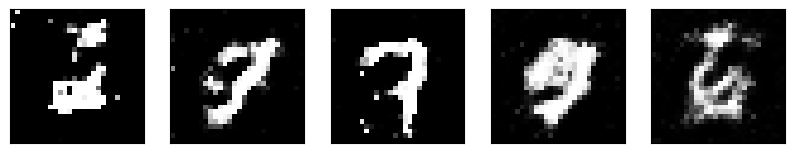

 Epoch: 88 batch: 1 D_loss: 1.227 G_loss: 1.015 
 Epoch: 88 batch: 2 D_loss: 1.229 G_loss: 1.024 
 Epoch: 88 batch: 3 D_loss: 1.289 G_loss: 1.147 
 Epoch: 88 batch: 4 D_loss: 1.235 G_loss: 1.157 
 Epoch: 88 batch: 5 D_loss: 1.317 G_loss: 1.087 
 Epoch: 88 batch: 6 D_loss: 1.260 G_loss: 1.100 
 Epoch: 88 batch: 7 D_loss: 1.263 G_loss: 1.046 
 Epoch: 88 batch: 8 D_loss: 1.283 G_loss: 1.055 
 Epoch: 88 batch: 9 D_loss: 1.339 G_loss: 1.016 
 Epoch: 88 batch: 10 D_loss: 1.258 G_loss: 1.010 
 Epoch: 88 batch: 11 D_loss: 1.277 G_loss: 0.998 
 Epoch: 88 batch: 12 D_loss: 1.267 G_loss: 0.951 
 Epoch: 88 batch: 13 D_loss: 1.260 G_loss: 1.084 
 Epoch: 88 batch: 14 D_loss: 1.279 G_loss: 1.113 
 Epoch: 88 batch: 15 D_loss: 1.273 G_loss: 1.213 
 Epoch: 88 batch: 16 D_loss: 1.251 G_loss: 1.202 
 Epoch: 88 batch: 17 D_loss: 1.263 G_loss: 1.125 
 Epoch: 88 batch: 18 D_loss: 1.301 G_loss: 1.048 
 Epoch: 88 batch: 19 D_loss: 1.316 G_loss: 1.038 
 Epoch: 88 batch: 20 D_loss: 1.263 G_loss: 0.941 
 Epoch: 8

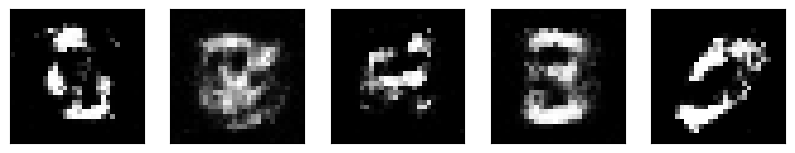

 Epoch: 89 batch: 1 D_loss: 1.425 G_loss: 1.435 
 Epoch: 89 batch: 2 D_loss: 1.248 G_loss: 1.101 
 Epoch: 89 batch: 3 D_loss: 1.309 G_loss: 0.946 
 Epoch: 89 batch: 4 D_loss: 1.319 G_loss: 0.873 
 Epoch: 89 batch: 5 D_loss: 1.341 G_loss: 0.890 
 Epoch: 89 batch: 6 D_loss: 1.326 G_loss: 0.931 
 Epoch: 89 batch: 7 D_loss: 1.327 G_loss: 0.945 
 Epoch: 89 batch: 8 D_loss: 1.343 G_loss: 1.009 
 Epoch: 89 batch: 9 D_loss: 1.332 G_loss: 1.011 
 Epoch: 89 batch: 10 D_loss: 1.306 G_loss: 0.972 
 Epoch: 89 batch: 11 D_loss: 1.312 G_loss: 0.944 
 Epoch: 89 batch: 12 D_loss: 1.267 G_loss: 0.873 
 Epoch: 89 batch: 13 D_loss: 1.291 G_loss: 0.834 
 Epoch: 89 batch: 14 D_loss: 1.243 G_loss: 0.836 
 Epoch: 89 batch: 15 D_loss: 1.289 G_loss: 0.851 
 Epoch: 89 batch: 16 D_loss: 1.266 G_loss: 0.914 
 Epoch: 89 batch: 17 D_loss: 1.253 G_loss: 0.919 
 Epoch: 89 batch: 18 D_loss: 1.223 G_loss: 0.993 
 Epoch: 89 batch: 19 D_loss: 1.300 G_loss: 1.015 
 Epoch: 89 batch: 20 D_loss: 1.239 G_loss: 1.094 
 Epoch: 8

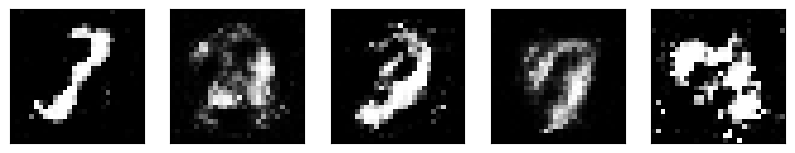

 Epoch: 90 batch: 1 D_loss: 1.285 G_loss: 0.936 
 Epoch: 90 batch: 2 D_loss: 1.255 G_loss: 0.911 
 Epoch: 90 batch: 3 D_loss: 1.264 G_loss: 0.981 
 Epoch: 90 batch: 4 D_loss: 1.252 G_loss: 1.055 
 Epoch: 90 batch: 5 D_loss: 1.313 G_loss: 1.129 
 Epoch: 90 batch: 6 D_loss: 1.255 G_loss: 1.171 
 Epoch: 90 batch: 7 D_loss: 1.233 G_loss: 1.191 
 Epoch: 90 batch: 8 D_loss: 1.312 G_loss: 1.272 
 Epoch: 90 batch: 9 D_loss: 1.306 G_loss: 1.290 
 Epoch: 90 batch: 10 D_loss: 1.146 G_loss: 1.304 
 Epoch: 90 batch: 11 D_loss: 1.211 G_loss: 1.472 
 Epoch: 90 batch: 12 D_loss: 1.265 G_loss: 1.567 
 Epoch: 90 batch: 13 D_loss: 1.153 G_loss: 1.453 
 Epoch: 90 batch: 14 D_loss: 1.248 G_loss: 1.392 
 Epoch: 90 batch: 15 D_loss: 1.274 G_loss: 1.153 
 Epoch: 90 batch: 16 D_loss: 1.325 G_loss: 1.182 
 Epoch: 90 batch: 17 D_loss: 1.302 G_loss: 1.016 
 Epoch: 90 batch: 18 D_loss: 1.248 G_loss: 0.955 
 Epoch: 90 batch: 19 D_loss: 1.296 G_loss: 0.909 
 Epoch: 90 batch: 20 D_loss: 1.258 G_loss: 1.021 
 Epoch: 9

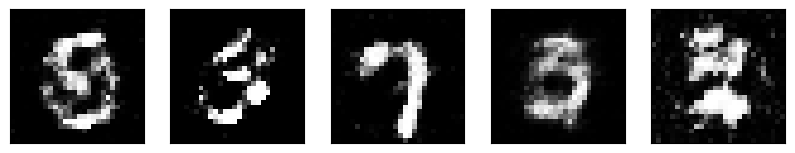

 Epoch: 91 batch: 1 D_loss: 1.289 G_loss: 0.984 
 Epoch: 91 batch: 2 D_loss: 1.271 G_loss: 1.088 
 Epoch: 91 batch: 3 D_loss: 1.286 G_loss: 1.109 
 Epoch: 91 batch: 4 D_loss: 1.304 G_loss: 1.074 
 Epoch: 91 batch: 5 D_loss: 1.338 G_loss: 1.042 
 Epoch: 91 batch: 6 D_loss: 1.309 G_loss: 1.007 
 Epoch: 91 batch: 7 D_loss: 1.262 G_loss: 0.922 
 Epoch: 91 batch: 8 D_loss: 1.346 G_loss: 0.856 
 Epoch: 91 batch: 9 D_loss: 1.322 G_loss: 0.877 
 Epoch: 91 batch: 10 D_loss: 1.275 G_loss: 0.864 
 Epoch: 91 batch: 11 D_loss: 1.309 G_loss: 0.937 
 Epoch: 91 batch: 12 D_loss: 1.280 G_loss: 1.016 
 Epoch: 91 batch: 13 D_loss: 1.284 G_loss: 1.017 
 Epoch: 91 batch: 14 D_loss: 1.284 G_loss: 1.015 
 Epoch: 91 batch: 15 D_loss: 1.289 G_loss: 1.045 
 Epoch: 91 batch: 16 D_loss: 1.291 G_loss: 1.132 
 Epoch: 91 batch: 17 D_loss: 1.250 G_loss: 1.016 
 Epoch: 91 batch: 18 D_loss: 1.269 G_loss: 1.014 
 Epoch: 91 batch: 19 D_loss: 1.294 G_loss: 1.046 
 Epoch: 91 batch: 20 D_loss: 1.263 G_loss: 1.162 
 Epoch: 9

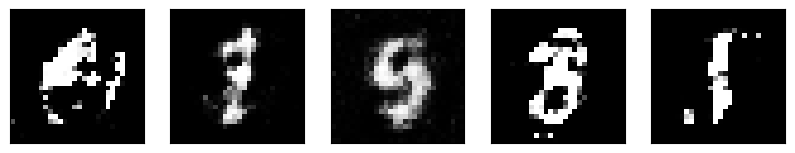

 Epoch: 92 batch: 1 D_loss: 1.253 G_loss: 1.046 
 Epoch: 92 batch: 2 D_loss: 1.277 G_loss: 1.092 
 Epoch: 92 batch: 3 D_loss: 1.252 G_loss: 1.062 
 Epoch: 92 batch: 4 D_loss: 1.218 G_loss: 1.098 
 Epoch: 92 batch: 5 D_loss: 1.311 G_loss: 1.041 
 Epoch: 92 batch: 6 D_loss: 1.250 G_loss: 1.048 
 Epoch: 92 batch: 7 D_loss: 1.217 G_loss: 1.082 
 Epoch: 92 batch: 8 D_loss: 1.351 G_loss: 1.103 
 Epoch: 92 batch: 9 D_loss: 1.298 G_loss: 1.162 
 Epoch: 92 batch: 10 D_loss: 1.201 G_loss: 1.176 
 Epoch: 92 batch: 11 D_loss: 1.223 G_loss: 1.203 
 Epoch: 92 batch: 12 D_loss: 1.261 G_loss: 1.181 
 Epoch: 92 batch: 13 D_loss: 1.233 G_loss: 1.274 
 Epoch: 92 batch: 14 D_loss: 1.188 G_loss: 1.336 
 Epoch: 92 batch: 15 D_loss: 1.244 G_loss: 1.231 
 Epoch: 92 batch: 16 D_loss: 1.211 G_loss: 1.213 
 Epoch: 92 batch: 17 D_loss: 1.207 G_loss: 1.250 
 Epoch: 92 batch: 18 D_loss: 1.270 G_loss: 1.217 
 Epoch: 92 batch: 19 D_loss: 1.249 G_loss: 1.298 
 Epoch: 92 batch: 20 D_loss: 1.253 G_loss: 1.367 
 Epoch: 9

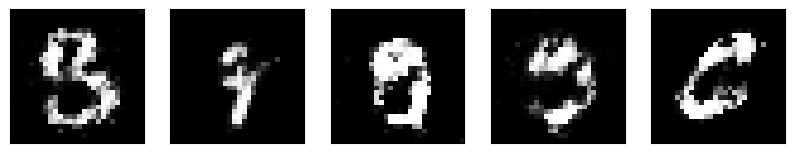

 Epoch: 93 batch: 1 D_loss: 1.190 G_loss: 1.235 
 Epoch: 93 batch: 2 D_loss: 1.189 G_loss: 1.435 
 Epoch: 93 batch: 3 D_loss: 1.239 G_loss: 1.297 
 Epoch: 93 batch: 4 D_loss: 1.173 G_loss: 1.464 
 Epoch: 93 batch: 5 D_loss: 1.243 G_loss: 1.575 
 Epoch: 93 batch: 6 D_loss: 1.227 G_loss: 1.860 
 Epoch: 93 batch: 7 D_loss: 1.168 G_loss: 1.718 
 Epoch: 93 batch: 8 D_loss: 1.244 G_loss: 1.827 
 Epoch: 93 batch: 9 D_loss: 1.224 G_loss: 1.748 
 Epoch: 93 batch: 10 D_loss: 1.285 G_loss: 1.598 
 Epoch: 93 batch: 11 D_loss: 1.347 G_loss: 1.441 
 Epoch: 93 batch: 12 D_loss: 1.310 G_loss: 1.113 
 Epoch: 93 batch: 13 D_loss: 1.335 G_loss: 0.954 
 Epoch: 93 batch: 14 D_loss: 1.320 G_loss: 0.972 
 Epoch: 93 batch: 15 D_loss: 1.337 G_loss: 1.070 
 Epoch: 93 batch: 16 D_loss: 1.332 G_loss: 1.042 
 Epoch: 93 batch: 17 D_loss: 1.369 G_loss: 1.014 
 Epoch: 93 batch: 18 D_loss: 1.325 G_loss: 0.963 
 Epoch: 93 batch: 19 D_loss: 1.305 G_loss: 0.895 
 Epoch: 93 batch: 20 D_loss: 1.329 G_loss: 0.852 
 Epoch: 9

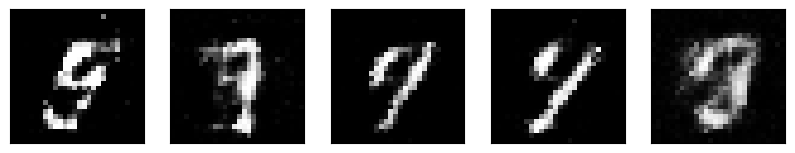

 Epoch: 94 batch: 1 D_loss: 1.261 G_loss: 1.171 
 Epoch: 94 batch: 2 D_loss: 1.249 G_loss: 1.146 
 Epoch: 94 batch: 3 D_loss: 1.268 G_loss: 1.101 
 Epoch: 94 batch: 4 D_loss: 1.308 G_loss: 1.133 
 Epoch: 94 batch: 5 D_loss: 1.328 G_loss: 1.080 
 Epoch: 94 batch: 6 D_loss: 1.347 G_loss: 0.999 
 Epoch: 94 batch: 7 D_loss: 1.253 G_loss: 0.918 
 Epoch: 94 batch: 8 D_loss: 1.287 G_loss: 0.940 
 Epoch: 94 batch: 9 D_loss: 1.272 G_loss: 0.896 
 Epoch: 94 batch: 10 D_loss: 1.288 G_loss: 0.892 
 Epoch: 94 batch: 11 D_loss: 1.231 G_loss: 0.933 
 Epoch: 94 batch: 12 D_loss: 1.257 G_loss: 0.994 
 Epoch: 94 batch: 13 D_loss: 1.330 G_loss: 0.977 
 Epoch: 94 batch: 14 D_loss: 1.293 G_loss: 1.061 
 Epoch: 94 batch: 15 D_loss: 1.235 G_loss: 0.996 
 Epoch: 94 batch: 16 D_loss: 1.258 G_loss: 0.998 
 Epoch: 94 batch: 17 D_loss: 1.242 G_loss: 0.995 
 Epoch: 94 batch: 18 D_loss: 1.248 G_loss: 1.037 
 Epoch: 94 batch: 19 D_loss: 1.224 G_loss: 1.025 
 Epoch: 94 batch: 20 D_loss: 1.239 G_loss: 1.015 
 Epoch: 9

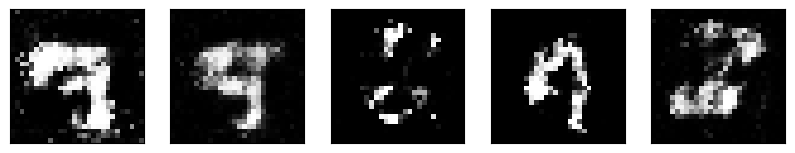

 Epoch: 95 batch: 1 D_loss: 1.242 G_loss: 1.069 
 Epoch: 95 batch: 2 D_loss: 1.203 G_loss: 1.136 
 Epoch: 95 batch: 3 D_loss: 1.243 G_loss: 1.143 
 Epoch: 95 batch: 4 D_loss: 1.194 G_loss: 1.187 
 Epoch: 95 batch: 5 D_loss: 1.285 G_loss: 1.178 
 Epoch: 95 batch: 6 D_loss: 1.235 G_loss: 1.306 
 Epoch: 95 batch: 7 D_loss: 1.245 G_loss: 1.280 
 Epoch: 95 batch: 8 D_loss: 1.209 G_loss: 1.449 
 Epoch: 95 batch: 9 D_loss: 1.240 G_loss: 1.339 
 Epoch: 95 batch: 10 D_loss: 1.194 G_loss: 1.334 
 Epoch: 95 batch: 11 D_loss: 1.308 G_loss: 1.542 
 Epoch: 95 batch: 12 D_loss: 1.279 G_loss: 1.375 
 Epoch: 95 batch: 13 D_loss: 1.307 G_loss: 1.430 
 Epoch: 95 batch: 14 D_loss: 1.361 G_loss: 1.095 
 Epoch: 95 batch: 15 D_loss: 1.345 G_loss: 0.936 
 Epoch: 95 batch: 16 D_loss: 1.310 G_loss: 0.857 
 Epoch: 95 batch: 17 D_loss: 1.340 G_loss: 0.847 
 Epoch: 95 batch: 18 D_loss: 1.325 G_loss: 0.922 
 Epoch: 95 batch: 19 D_loss: 1.347 G_loss: 0.958 
 Epoch: 95 batch: 20 D_loss: 1.374 G_loss: 0.965 
 Epoch: 9

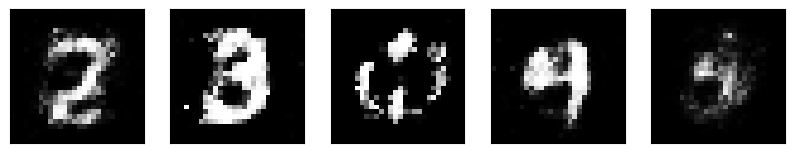

 Epoch: 96 batch: 1 D_loss: 1.259 G_loss: 0.913 
 Epoch: 96 batch: 2 D_loss: 1.262 G_loss: 0.958 
 Epoch: 96 batch: 3 D_loss: 1.335 G_loss: 0.974 
 Epoch: 96 batch: 4 D_loss: 1.282 G_loss: 0.977 
 Epoch: 96 batch: 5 D_loss: 1.348 G_loss: 0.922 
 Epoch: 96 batch: 6 D_loss: 1.290 G_loss: 0.975 
 Epoch: 96 batch: 7 D_loss: 1.254 G_loss: 0.998 
 Epoch: 96 batch: 8 D_loss: 1.301 G_loss: 0.971 
 Epoch: 96 batch: 9 D_loss: 1.296 G_loss: 1.034 
 Epoch: 96 batch: 10 D_loss: 1.259 G_loss: 1.025 
 Epoch: 96 batch: 11 D_loss: 1.227 G_loss: 1.040 
 Epoch: 96 batch: 12 D_loss: 1.257 G_loss: 1.142 
 Epoch: 96 batch: 13 D_loss: 1.285 G_loss: 1.056 
 Epoch: 96 batch: 14 D_loss: 1.292 G_loss: 1.066 
 Epoch: 96 batch: 15 D_loss: 1.282 G_loss: 0.993 
 Epoch: 96 batch: 16 D_loss: 1.227 G_loss: 0.955 
 Epoch: 96 batch: 17 D_loss: 1.294 G_loss: 1.029 
 Epoch: 96 batch: 18 D_loss: 1.273 G_loss: 1.035 
 Epoch: 96 batch: 19 D_loss: 1.243 G_loss: 0.998 
 Epoch: 96 batch: 20 D_loss: 1.297 G_loss: 0.996 
 Epoch: 9

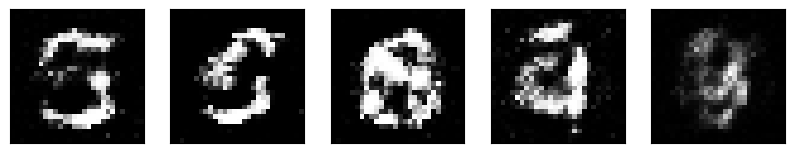

 Epoch: 97 batch: 1 D_loss: 1.267 G_loss: 1.029 
 Epoch: 97 batch: 2 D_loss: 1.223 G_loss: 1.090 
 Epoch: 97 batch: 3 D_loss: 1.204 G_loss: 1.119 
 Epoch: 97 batch: 4 D_loss: 1.239 G_loss: 1.099 
 Epoch: 97 batch: 5 D_loss: 1.268 G_loss: 1.039 
 Epoch: 97 batch: 6 D_loss: 1.264 G_loss: 1.135 
 Epoch: 97 batch: 7 D_loss: 1.260 G_loss: 1.102 
 Epoch: 97 batch: 8 D_loss: 1.295 G_loss: 1.133 
 Epoch: 97 batch: 9 D_loss: 1.307 G_loss: 1.131 
 Epoch: 97 batch: 10 D_loss: 1.203 G_loss: 1.112 
 Epoch: 97 batch: 11 D_loss: 1.230 G_loss: 1.160 
 Epoch: 97 batch: 12 D_loss: 1.235 G_loss: 1.166 
 Epoch: 97 batch: 13 D_loss: 1.229 G_loss: 1.245 
 Epoch: 97 batch: 14 D_loss: 1.227 G_loss: 1.270 
 Epoch: 97 batch: 15 D_loss: 1.227 G_loss: 1.174 
 Epoch: 97 batch: 16 D_loss: 1.207 G_loss: 1.120 
 Epoch: 97 batch: 17 D_loss: 1.202 G_loss: 1.269 
 Epoch: 97 batch: 18 D_loss: 1.202 G_loss: 1.179 
 Epoch: 97 batch: 19 D_loss: 1.240 G_loss: 1.209 
 Epoch: 97 batch: 20 D_loss: 1.257 G_loss: 1.217 
 Epoch: 9

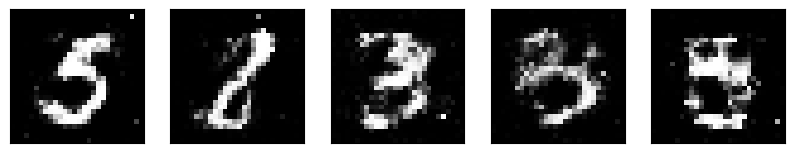

 Epoch: 98 batch: 1 D_loss: 1.272 G_loss: 1.080 
 Epoch: 98 batch: 2 D_loss: 1.210 G_loss: 1.077 
 Epoch: 98 batch: 3 D_loss: 1.109 G_loss: 1.250 
 Epoch: 98 batch: 4 D_loss: 1.200 G_loss: 1.370 
 Epoch: 98 batch: 5 D_loss: 1.232 G_loss: 1.352 
 Epoch: 98 batch: 6 D_loss: 1.183 G_loss: 1.390 
 Epoch: 98 batch: 7 D_loss: 1.270 G_loss: 1.398 
 Epoch: 98 batch: 8 D_loss: 1.348 G_loss: 1.256 
 Epoch: 98 batch: 9 D_loss: 1.367 G_loss: 1.293 
 Epoch: 98 batch: 10 D_loss: 1.290 G_loss: 1.083 
 Epoch: 98 batch: 11 D_loss: 1.325 G_loss: 1.160 
 Epoch: 98 batch: 12 D_loss: 1.282 G_loss: 1.154 
 Epoch: 98 batch: 13 D_loss: 1.309 G_loss: 1.140 
 Epoch: 98 batch: 14 D_loss: 1.293 G_loss: 1.043 
 Epoch: 98 batch: 15 D_loss: 1.321 G_loss: 1.017 
 Epoch: 98 batch: 16 D_loss: 1.301 G_loss: 0.964 
 Epoch: 98 batch: 17 D_loss: 1.301 G_loss: 0.946 
 Epoch: 98 batch: 18 D_loss: 1.309 G_loss: 0.855 
 Epoch: 98 batch: 19 D_loss: 1.275 G_loss: 0.832 
 Epoch: 98 batch: 20 D_loss: 1.274 G_loss: 0.842 
 Epoch: 9

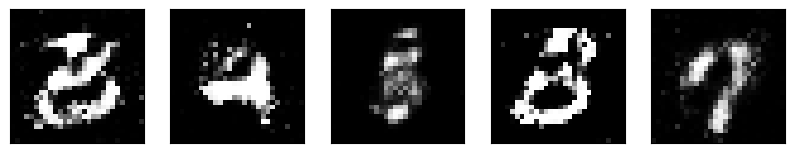

 Epoch: 99 batch: 1 D_loss: 1.286 G_loss: 0.993 
 Epoch: 99 batch: 2 D_loss: 1.264 G_loss: 0.985 
 Epoch: 99 batch: 3 D_loss: 1.292 G_loss: 0.976 
 Epoch: 99 batch: 4 D_loss: 1.256 G_loss: 0.918 
 Epoch: 99 batch: 5 D_loss: 1.301 G_loss: 0.909 
 Epoch: 99 batch: 6 D_loss: 1.324 G_loss: 0.999 
 Epoch: 99 batch: 7 D_loss: 1.300 G_loss: 0.960 
 Epoch: 99 batch: 8 D_loss: 1.337 G_loss: 0.997 
 Epoch: 99 batch: 9 D_loss: 1.308 G_loss: 0.963 
 Epoch: 99 batch: 10 D_loss: 1.265 G_loss: 0.972 
 Epoch: 99 batch: 11 D_loss: 1.338 G_loss: 0.945 
 Epoch: 99 batch: 12 D_loss: 1.296 G_loss: 0.929 
 Epoch: 99 batch: 13 D_loss: 1.266 G_loss: 0.926 
 Epoch: 99 batch: 14 D_loss: 1.297 G_loss: 0.936 
 Epoch: 99 batch: 15 D_loss: 1.291 G_loss: 0.888 
 Epoch: 99 batch: 16 D_loss: 1.288 G_loss: 0.920 
 Epoch: 99 batch: 17 D_loss: 1.258 G_loss: 0.933 
 Epoch: 99 batch: 18 D_loss: 1.262 G_loss: 0.920 
 Epoch: 99 batch: 19 D_loss: 1.314 G_loss: 0.974 
 Epoch: 99 batch: 20 D_loss: 1.329 G_loss: 0.989 
 Epoch: 9

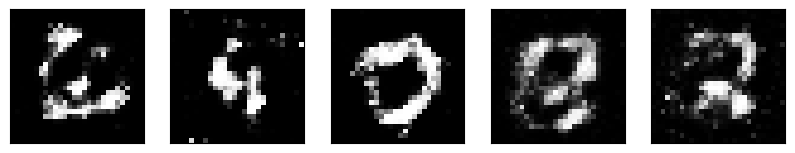

 Epoch: 100 batch: 1 D_loss: 1.336 G_loss: 0.845 
 Epoch: 100 batch: 2 D_loss: 1.286 G_loss: 0.876 
 Epoch: 100 batch: 3 D_loss: 1.305 G_loss: 0.905 
 Epoch: 100 batch: 4 D_loss: 1.294 G_loss: 0.936 
 Epoch: 100 batch: 5 D_loss: 1.319 G_loss: 0.934 
 Epoch: 100 batch: 6 D_loss: 1.318 G_loss: 0.920 
 Epoch: 100 batch: 7 D_loss: 1.280 G_loss: 0.908 
 Epoch: 100 batch: 8 D_loss: 1.312 G_loss: 0.896 
 Epoch: 100 batch: 9 D_loss: 1.274 G_loss: 0.878 
 Epoch: 100 batch: 10 D_loss: 1.243 G_loss: 0.861 
 Epoch: 100 batch: 11 D_loss: 1.284 G_loss: 0.901 
 Epoch: 100 batch: 12 D_loss: 1.251 G_loss: 0.917 
 Epoch: 100 batch: 13 D_loss: 1.243 G_loss: 0.931 
 Epoch: 100 batch: 14 D_loss: 1.264 G_loss: 0.995 
 Epoch: 100 batch: 15 D_loss: 1.267 G_loss: 1.031 
 Epoch: 100 batch: 16 D_loss: 1.224 G_loss: 1.016 
 Epoch: 100 batch: 17 D_loss: 1.260 G_loss: 1.102 
 Epoch: 100 batch: 18 D_loss: 1.245 G_loss: 1.136 
 Epoch: 100 batch: 19 D_loss: 1.246 G_loss: 1.233 
 Epoch: 100 batch: 20 D_loss: 1.220 G_lo

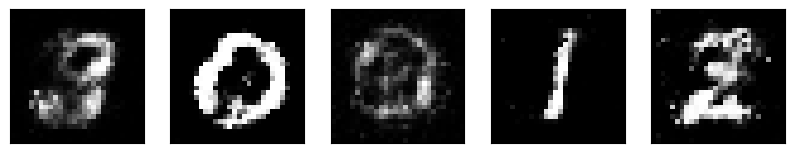

 Epoch: 101 batch: 1 D_loss: 1.260 G_loss: 1.128 
 Epoch: 101 batch: 2 D_loss: 1.253 G_loss: 1.106 
 Epoch: 101 batch: 3 D_loss: 1.187 G_loss: 1.152 
 Epoch: 101 batch: 4 D_loss: 1.209 G_loss: 1.195 
 Epoch: 101 batch: 5 D_loss: 1.281 G_loss: 1.181 
 Epoch: 101 batch: 6 D_loss: 1.256 G_loss: 1.121 
 Epoch: 101 batch: 7 D_loss: 1.255 G_loss: 1.157 
 Epoch: 101 batch: 8 D_loss: 1.284 G_loss: 1.035 
 Epoch: 101 batch: 9 D_loss: 1.310 G_loss: 1.007 
 Epoch: 101 batch: 10 D_loss: 1.255 G_loss: 1.005 
 Epoch: 101 batch: 11 D_loss: 1.227 G_loss: 1.033 
 Epoch: 101 batch: 12 D_loss: 1.215 G_loss: 1.091 
 Epoch: 101 batch: 13 D_loss: 1.221 G_loss: 1.132 
 Epoch: 101 batch: 14 D_loss: 1.242 G_loss: 1.183 
 Epoch: 101 batch: 15 D_loss: 1.322 G_loss: 1.222 
 Epoch: 101 batch: 16 D_loss: 1.277 G_loss: 1.178 
 Epoch: 101 batch: 17 D_loss: 1.214 G_loss: 1.044 
 Epoch: 101 batch: 18 D_loss: 1.289 G_loss: 0.949 
 Epoch: 101 batch: 19 D_loss: 1.238 G_loss: 0.940 
 Epoch: 101 batch: 20 D_loss: 1.257 G_lo

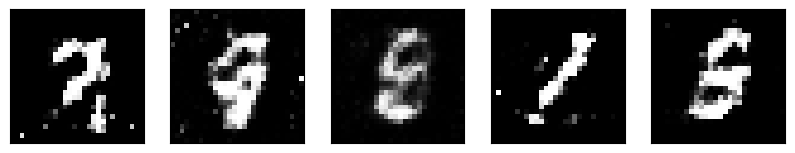

 Epoch: 102 batch: 1 D_loss: 1.244 G_loss: 1.197 
 Epoch: 102 batch: 2 D_loss: 1.243 G_loss: 1.114 
 Epoch: 102 batch: 3 D_loss: 1.277 G_loss: 1.313 
 Epoch: 102 batch: 4 D_loss: 1.197 G_loss: 1.246 
 Epoch: 102 batch: 5 D_loss: 1.258 G_loss: 1.235 
 Epoch: 102 batch: 6 D_loss: 1.320 G_loss: 1.165 
 Epoch: 102 batch: 7 D_loss: 1.259 G_loss: 1.134 
 Epoch: 102 batch: 8 D_loss: 1.324 G_loss: 1.043 
 Epoch: 102 batch: 9 D_loss: 1.329 G_loss: 1.058 
 Epoch: 102 batch: 10 D_loss: 1.232 G_loss: 1.020 
 Epoch: 102 batch: 11 D_loss: 1.327 G_loss: 1.053 
 Epoch: 102 batch: 12 D_loss: 1.286 G_loss: 1.054 
 Epoch: 102 batch: 13 D_loss: 1.285 G_loss: 0.998 
 Epoch: 102 batch: 14 D_loss: 1.305 G_loss: 0.942 
 Epoch: 102 batch: 15 D_loss: 1.281 G_loss: 0.913 
 Epoch: 102 batch: 16 D_loss: 1.295 G_loss: 0.959 
 Epoch: 102 batch: 17 D_loss: 1.286 G_loss: 0.962 
 Epoch: 102 batch: 18 D_loss: 1.312 G_loss: 0.965 
 Epoch: 102 batch: 19 D_loss: 1.321 G_loss: 0.983 
 Epoch: 102 batch: 20 D_loss: 1.316 G_lo

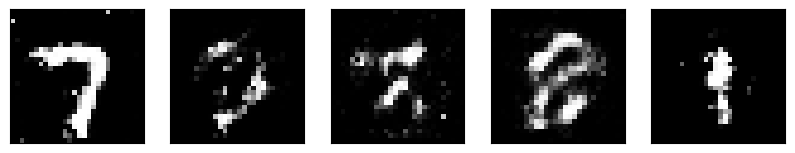

 Epoch: 103 batch: 1 D_loss: 1.358 G_loss: 1.162 
 Epoch: 103 batch: 2 D_loss: 1.289 G_loss: 1.072 
 Epoch: 103 batch: 3 D_loss: 1.318 G_loss: 1.167 
 Epoch: 103 batch: 4 D_loss: 1.327 G_loss: 1.123 
 Epoch: 103 batch: 5 D_loss: 1.331 G_loss: 1.069 
 Epoch: 103 batch: 6 D_loss: 1.322 G_loss: 1.001 
 Epoch: 103 batch: 7 D_loss: 1.287 G_loss: 0.929 
 Epoch: 103 batch: 8 D_loss: 1.334 G_loss: 0.930 
 Epoch: 103 batch: 9 D_loss: 1.310 G_loss: 0.957 
 Epoch: 103 batch: 10 D_loss: 1.280 G_loss: 1.071 
 Epoch: 103 batch: 11 D_loss: 1.293 G_loss: 1.082 
 Epoch: 103 batch: 12 D_loss: 1.233 G_loss: 1.172 
 Epoch: 103 batch: 13 D_loss: 1.280 G_loss: 1.344 
 Epoch: 103 batch: 14 D_loss: 1.276 G_loss: 1.397 
 Epoch: 103 batch: 15 D_loss: 1.245 G_loss: 1.434 
 Epoch: 103 batch: 16 D_loss: 1.235 G_loss: 1.433 
 Epoch: 103 batch: 17 D_loss: 1.282 G_loss: 1.384 
 Epoch: 103 batch: 18 D_loss: 1.239 G_loss: 1.475 
 Epoch: 103 batch: 19 D_loss: 1.312 G_loss: 1.677 
 Epoch: 103 batch: 20 D_loss: 1.283 G_lo

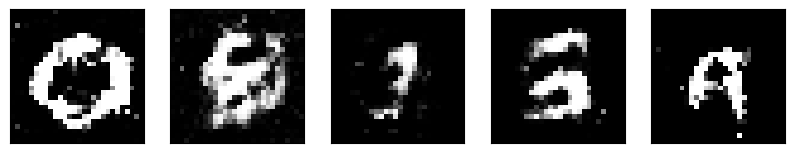

 Epoch: 104 batch: 1 D_loss: 1.238 G_loss: 1.701 
 Epoch: 104 batch: 2 D_loss: 1.208 G_loss: 1.628 
 Epoch: 104 batch: 3 D_loss: 1.175 G_loss: 1.473 
 Epoch: 104 batch: 4 D_loss: 1.209 G_loss: 1.484 
 Epoch: 104 batch: 5 D_loss: 1.263 G_loss: 1.536 
 Epoch: 104 batch: 6 D_loss: 1.327 G_loss: 1.782 
 Epoch: 104 batch: 7 D_loss: 1.203 G_loss: 1.326 
 Epoch: 104 batch: 8 D_loss: 1.303 G_loss: 1.283 
 Epoch: 104 batch: 9 D_loss: 1.266 G_loss: 1.157 
 Epoch: 104 batch: 10 D_loss: 1.241 G_loss: 1.091 
 Epoch: 104 batch: 11 D_loss: 1.343 G_loss: 1.154 
 Epoch: 104 batch: 12 D_loss: 1.343 G_loss: 1.070 
 Epoch: 104 batch: 13 D_loss: 1.327 G_loss: 1.053 
 Epoch: 104 batch: 14 D_loss: 1.384 G_loss: 0.952 
 Epoch: 104 batch: 15 D_loss: 1.372 G_loss: 0.857 
 Epoch: 104 batch: 16 D_loss: 1.363 G_loss: 0.815 
 Epoch: 104 batch: 17 D_loss: 1.353 G_loss: 0.791 
 Epoch: 104 batch: 18 D_loss: 1.339 G_loss: 0.809 
 Epoch: 104 batch: 19 D_loss: 1.354 G_loss: 0.834 
 Epoch: 104 batch: 20 D_loss: 1.351 G_lo

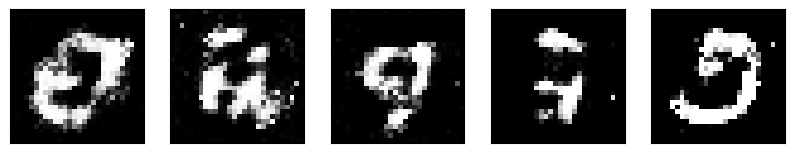

 Epoch: 105 batch: 1 D_loss: 1.299 G_loss: 0.879 
 Epoch: 105 batch: 2 D_loss: 1.237 G_loss: 0.914 
 Epoch: 105 batch: 3 D_loss: 1.216 G_loss: 1.010 
 Epoch: 105 batch: 4 D_loss: 1.146 G_loss: 1.344 
 Epoch: 105 batch: 5 D_loss: 1.123 G_loss: 1.778 
 Epoch: 105 batch: 6 D_loss: 1.047 G_loss: 2.449 
 Epoch: 105 batch: 7 D_loss: 1.022 G_loss: 3.503 
 Epoch: 105 batch: 8 D_loss: 1.327 G_loss: 4.580 
 Epoch: 105 batch: 9 D_loss: 1.100 G_loss: 2.496 
 Epoch: 105 batch: 10 D_loss: 1.202 G_loss: 1.664 
 Epoch: 105 batch: 11 D_loss: 1.312 G_loss: 1.191 
 Epoch: 105 batch: 12 D_loss: 1.307 G_loss: 1.238 
 Epoch: 105 batch: 13 D_loss: 1.335 G_loss: 1.413 
 Epoch: 105 batch: 14 D_loss: 1.357 G_loss: 1.477 
 Epoch: 105 batch: 15 D_loss: 1.311 G_loss: 1.238 
 Epoch: 105 batch: 16 D_loss: 1.291 G_loss: 1.084 
 Epoch: 105 batch: 17 D_loss: 1.275 G_loss: 0.988 
 Epoch: 105 batch: 18 D_loss: 1.267 G_loss: 0.974 
 Epoch: 105 batch: 19 D_loss: 1.291 G_loss: 0.956 
 Epoch: 105 batch: 20 D_loss: 1.282 G_lo

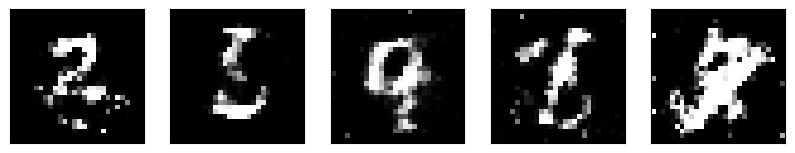

 Epoch: 106 batch: 1 D_loss: 1.165 G_loss: 1.440 
 Epoch: 106 batch: 2 D_loss: 1.210 G_loss: 1.440 
 Epoch: 106 batch: 3 D_loss: 1.188 G_loss: 1.280 
 Epoch: 106 batch: 4 D_loss: 1.184 G_loss: 1.164 
 Epoch: 106 batch: 5 D_loss: 1.268 G_loss: 1.095 
 Epoch: 106 batch: 6 D_loss: 1.215 G_loss: 1.212 
 Epoch: 106 batch: 7 D_loss: 1.208 G_loss: 1.134 
 Epoch: 106 batch: 8 D_loss: 1.277 G_loss: 1.220 
 Epoch: 106 batch: 9 D_loss: 1.250 G_loss: 1.397 
 Epoch: 106 batch: 10 D_loss: 1.135 G_loss: 1.356 
 Epoch: 106 batch: 11 D_loss: 1.213 G_loss: 1.361 
 Epoch: 106 batch: 12 D_loss: 1.299 G_loss: 1.362 
 Epoch: 106 batch: 13 D_loss: 1.163 G_loss: 1.319 
 Epoch: 106 batch: 14 D_loss: 1.210 G_loss: 1.260 
 Epoch: 106 batch: 15 D_loss: 1.197 G_loss: 1.163 
 Epoch: 106 batch: 16 D_loss: 1.201 G_loss: 1.220 
 Epoch: 106 batch: 17 D_loss: 1.187 G_loss: 1.084 
 Epoch: 106 batch: 18 D_loss: 1.227 G_loss: 1.149 
 Epoch: 106 batch: 19 D_loss: 1.255 G_loss: 1.263 
 Epoch: 106 batch: 20 D_loss: 1.240 G_lo

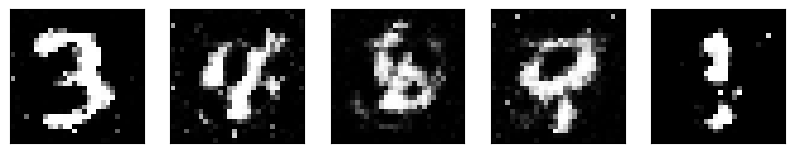

 Epoch: 107 batch: 1 D_loss: 1.289 G_loss: 1.326 
 Epoch: 107 batch: 2 D_loss: 1.261 G_loss: 1.265 
 Epoch: 107 batch: 3 D_loss: 1.210 G_loss: 1.251 
 Epoch: 107 batch: 4 D_loss: 1.217 G_loss: 1.224 
 Epoch: 107 batch: 5 D_loss: 1.268 G_loss: 1.152 
 Epoch: 107 batch: 6 D_loss: 1.265 G_loss: 1.155 
 Epoch: 107 batch: 7 D_loss: 1.203 G_loss: 1.115 
 Epoch: 107 batch: 8 D_loss: 1.257 G_loss: 1.118 
 Epoch: 107 batch: 9 D_loss: 1.312 G_loss: 1.183 
 Epoch: 107 batch: 10 D_loss: 1.156 G_loss: 1.133 
 Epoch: 107 batch: 11 D_loss: 1.252 G_loss: 1.211 
 Epoch: 107 batch: 12 D_loss: 1.254 G_loss: 1.258 
 Epoch: 107 batch: 13 D_loss: 1.165 G_loss: 1.239 
 Epoch: 107 batch: 14 D_loss: 1.200 G_loss: 1.295 
 Epoch: 107 batch: 15 D_loss: 1.206 G_loss: 1.252 
 Epoch: 107 batch: 16 D_loss: 1.190 G_loss: 1.255 
 Epoch: 107 batch: 17 D_loss: 1.311 G_loss: 1.239 
 Epoch: 107 batch: 18 D_loss: 1.276 G_loss: 1.058 
 Epoch: 107 batch: 19 D_loss: 1.245 G_loss: 1.110 
 Epoch: 107 batch: 20 D_loss: 1.308 G_lo

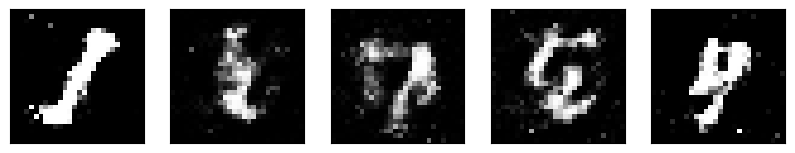

 Epoch: 108 batch: 1 D_loss: 1.232 G_loss: 1.227 
 Epoch: 108 batch: 2 D_loss: 1.179 G_loss: 1.393 
 Epoch: 108 batch: 3 D_loss: 1.202 G_loss: 1.265 
 Epoch: 108 batch: 4 D_loss: 1.151 G_loss: 1.467 
 Epoch: 108 batch: 5 D_loss: 1.258 G_loss: 1.562 
 Epoch: 108 batch: 6 D_loss: 1.244 G_loss: 1.495 
 Epoch: 108 batch: 7 D_loss: 1.195 G_loss: 1.481 
 Epoch: 108 batch: 8 D_loss: 1.328 G_loss: 1.244 
 Epoch: 108 batch: 9 D_loss: 1.261 G_loss: 1.155 
 Epoch: 108 batch: 10 D_loss: 1.240 G_loss: 1.075 
 Epoch: 108 batch: 11 D_loss: 1.248 G_loss: 1.097 
 Epoch: 108 batch: 12 D_loss: 1.208 G_loss: 1.108 
 Epoch: 108 batch: 13 D_loss: 1.219 G_loss: 1.059 
 Epoch: 108 batch: 14 D_loss: 1.278 G_loss: 1.079 
 Epoch: 108 batch: 15 D_loss: 1.248 G_loss: 1.085 
 Epoch: 108 batch: 16 D_loss: 1.279 G_loss: 1.063 
 Epoch: 108 batch: 17 D_loss: 1.232 G_loss: 1.010 
 Epoch: 108 batch: 18 D_loss: 1.234 G_loss: 1.014 
 Epoch: 108 batch: 19 D_loss: 1.228 G_loss: 1.049 
 Epoch: 108 batch: 20 D_loss: 1.292 G_lo

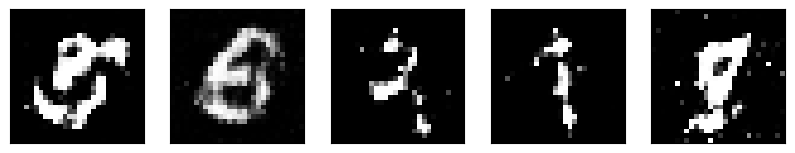

 Epoch: 109 batch: 1 D_loss: 1.241 G_loss: 0.965 
 Epoch: 109 batch: 2 D_loss: 1.262 G_loss: 0.977 
 Epoch: 109 batch: 3 D_loss: 1.225 G_loss: 1.023 
 Epoch: 109 batch: 4 D_loss: 1.261 G_loss: 1.075 
 Epoch: 109 batch: 5 D_loss: 1.334 G_loss: 1.153 
 Epoch: 109 batch: 6 D_loss: 1.298 G_loss: 1.131 
 Epoch: 109 batch: 7 D_loss: 1.265 G_loss: 1.120 
 Epoch: 109 batch: 8 D_loss: 1.366 G_loss: 1.050 
 Epoch: 109 batch: 9 D_loss: 1.311 G_loss: 1.022 
 Epoch: 109 batch: 10 D_loss: 1.225 G_loss: 1.024 
 Epoch: 109 batch: 11 D_loss: 1.279 G_loss: 1.034 
 Epoch: 109 batch: 12 D_loss: 1.294 G_loss: 0.998 
 Epoch: 109 batch: 13 D_loss: 1.234 G_loss: 1.030 
 Epoch: 109 batch: 14 D_loss: 1.272 G_loss: 1.090 
 Epoch: 109 batch: 15 D_loss: 1.293 G_loss: 1.053 
 Epoch: 109 batch: 16 D_loss: 1.266 G_loss: 1.162 
 Epoch: 109 batch: 17 D_loss: 1.258 G_loss: 1.108 
 Epoch: 109 batch: 18 D_loss: 1.284 G_loss: 1.068 
 Epoch: 109 batch: 19 D_loss: 1.258 G_loss: 1.091 
 Epoch: 109 batch: 20 D_loss: 1.255 G_lo

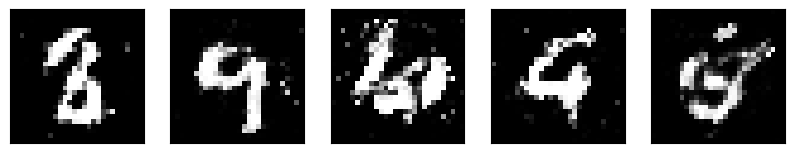

 Epoch: 110 batch: 1 D_loss: 1.256 G_loss: 1.005 
 Epoch: 110 batch: 2 D_loss: 1.245 G_loss: 1.007 
 Epoch: 110 batch: 3 D_loss: 1.250 G_loss: 1.071 
 Epoch: 110 batch: 4 D_loss: 1.252 G_loss: 1.083 
 Epoch: 110 batch: 5 D_loss: 1.304 G_loss: 1.105 
 Epoch: 110 batch: 6 D_loss: 1.283 G_loss: 1.171 
 Epoch: 110 batch: 7 D_loss: 1.290 G_loss: 1.237 
 Epoch: 110 batch: 8 D_loss: 1.329 G_loss: 1.195 
 Epoch: 110 batch: 9 D_loss: 1.323 G_loss: 1.148 
 Epoch: 110 batch: 10 D_loss: 1.189 G_loss: 1.072 
 Epoch: 110 batch: 11 D_loss: 1.271 G_loss: 1.072 
 Epoch: 110 batch: 12 D_loss: 1.245 G_loss: 0.994 
 Epoch: 110 batch: 13 D_loss: 1.218 G_loss: 1.008 
 Epoch: 110 batch: 14 D_loss: 1.284 G_loss: 0.962 
 Epoch: 110 batch: 15 D_loss: 1.271 G_loss: 1.004 
 Epoch: 110 batch: 16 D_loss: 1.270 G_loss: 0.988 
 Epoch: 110 batch: 17 D_loss: 1.304 G_loss: 1.045 
 Epoch: 110 batch: 18 D_loss: 1.276 G_loss: 1.058 
 Epoch: 110 batch: 19 D_loss: 1.274 G_loss: 1.036 
 Epoch: 110 batch: 20 D_loss: 1.255 G_lo

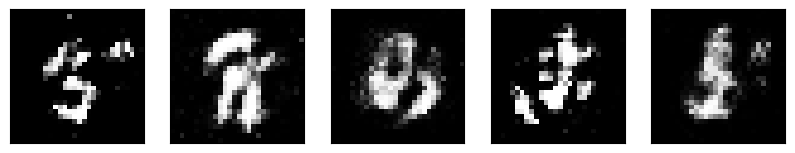

 Epoch: 111 batch: 1 D_loss: 1.257 G_loss: 0.991 
 Epoch: 111 batch: 2 D_loss: 1.250 G_loss: 0.975 
 Epoch: 111 batch: 3 D_loss: 1.280 G_loss: 0.979 
 Epoch: 111 batch: 4 D_loss: 1.252 G_loss: 0.950 
 Epoch: 111 batch: 5 D_loss: 1.310 G_loss: 0.966 
 Epoch: 111 batch: 6 D_loss: 1.309 G_loss: 0.972 
 Epoch: 111 batch: 7 D_loss: 1.248 G_loss: 0.994 
 Epoch: 111 batch: 8 D_loss: 1.328 G_loss: 0.987 
 Epoch: 111 batch: 9 D_loss: 1.277 G_loss: 1.049 
 Epoch: 111 batch: 10 D_loss: 1.234 G_loss: 1.091 
 Epoch: 111 batch: 11 D_loss: 1.233 G_loss: 1.107 
 Epoch: 111 batch: 12 D_loss: 1.240 G_loss: 1.263 
 Epoch: 111 batch: 13 D_loss: 1.260 G_loss: 1.175 
 Epoch: 111 batch: 14 D_loss: 1.271 G_loss: 1.237 
 Epoch: 111 batch: 15 D_loss: 1.256 G_loss: 1.014 
 Epoch: 111 batch: 16 D_loss: 1.240 G_loss: 0.949 
 Epoch: 111 batch: 17 D_loss: 1.320 G_loss: 0.955 
 Epoch: 111 batch: 18 D_loss: 1.262 G_loss: 0.960 
 Epoch: 111 batch: 19 D_loss: 1.282 G_loss: 0.963 
 Epoch: 111 batch: 20 D_loss: 1.309 G_lo

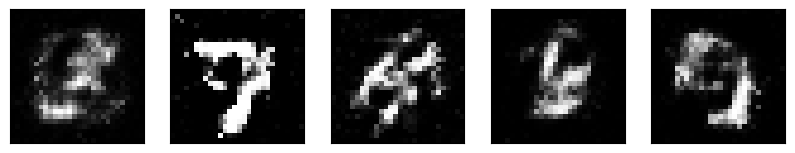

 Epoch: 112 batch: 1 D_loss: 1.329 G_loss: 1.312 
 Epoch: 112 batch: 2 D_loss: 1.290 G_loss: 1.235 
 Epoch: 112 batch: 3 D_loss: 1.248 G_loss: 1.113 
 Epoch: 112 batch: 4 D_loss: 1.244 G_loss: 0.982 
 Epoch: 112 batch: 5 D_loss: 1.270 G_loss: 0.942 
 Epoch: 112 batch: 6 D_loss: 1.286 G_loss: 0.919 
 Epoch: 112 batch: 7 D_loss: 1.303 G_loss: 0.921 
 Epoch: 112 batch: 8 D_loss: 1.314 G_loss: 0.921 
 Epoch: 112 batch: 9 D_loss: 1.310 G_loss: 0.904 
 Epoch: 112 batch: 10 D_loss: 1.235 G_loss: 0.925 
 Epoch: 112 batch: 11 D_loss: 1.314 G_loss: 0.900 
 Epoch: 112 batch: 12 D_loss: 1.276 G_loss: 0.931 
 Epoch: 112 batch: 13 D_loss: 1.246 G_loss: 0.969 
 Epoch: 112 batch: 14 D_loss: 1.252 G_loss: 0.957 
 Epoch: 112 batch: 15 D_loss: 1.310 G_loss: 0.994 
 Epoch: 112 batch: 16 D_loss: 1.258 G_loss: 0.982 
 Epoch: 112 batch: 17 D_loss: 1.226 G_loss: 1.010 
 Epoch: 112 batch: 18 D_loss: 1.207 G_loss: 1.107 
 Epoch: 112 batch: 19 D_loss: 1.250 G_loss: 1.120 
 Epoch: 112 batch: 20 D_loss: 1.201 G_lo

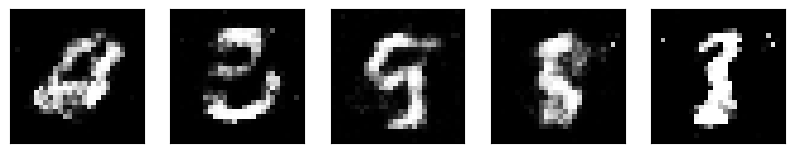

 Epoch: 113 batch: 1 D_loss: 1.293 G_loss: 0.906 
 Epoch: 113 batch: 2 D_loss: 1.266 G_loss: 0.929 
 Epoch: 113 batch: 3 D_loss: 1.267 G_loss: 0.919 
 Epoch: 113 batch: 4 D_loss: 1.223 G_loss: 0.953 
 Epoch: 113 batch: 5 D_loss: 1.276 G_loss: 0.962 
 Epoch: 113 batch: 6 D_loss: 1.292 G_loss: 0.953 
 Epoch: 113 batch: 7 D_loss: 1.251 G_loss: 0.965 
 Epoch: 113 batch: 8 D_loss: 1.313 G_loss: 1.038 
 Epoch: 113 batch: 9 D_loss: 1.343 G_loss: 1.014 
 Epoch: 113 batch: 10 D_loss: 1.225 G_loss: 1.119 
 Epoch: 113 batch: 11 D_loss: 1.228 G_loss: 1.141 
 Epoch: 113 batch: 12 D_loss: 1.253 G_loss: 1.166 
 Epoch: 113 batch: 13 D_loss: 1.196 G_loss: 1.187 
 Epoch: 113 batch: 14 D_loss: 1.222 G_loss: 1.179 
 Epoch: 113 batch: 15 D_loss: 1.292 G_loss: 1.177 
 Epoch: 113 batch: 16 D_loss: 1.251 G_loss: 1.164 
 Epoch: 113 batch: 17 D_loss: 1.245 G_loss: 1.206 
 Epoch: 113 batch: 18 D_loss: 1.208 G_loss: 1.309 
 Epoch: 113 batch: 19 D_loss: 1.238 G_loss: 1.318 
 Epoch: 113 batch: 20 D_loss: 1.213 G_lo

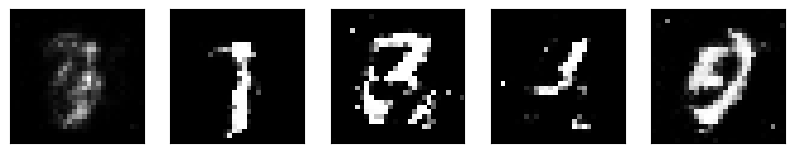

 Epoch: 114 batch: 1 D_loss: 1.269 G_loss: 1.046 
 Epoch: 114 batch: 2 D_loss: 1.266 G_loss: 1.018 
 Epoch: 114 batch: 3 D_loss: 1.271 G_loss: 1.038 
 Epoch: 114 batch: 4 D_loss: 1.226 G_loss: 1.123 
 Epoch: 114 batch: 5 D_loss: 1.290 G_loss: 1.164 
 Epoch: 114 batch: 6 D_loss: 1.270 G_loss: 1.154 
 Epoch: 114 batch: 7 D_loss: 1.317 G_loss: 1.298 
 Epoch: 114 batch: 8 D_loss: 1.300 G_loss: 1.224 
 Epoch: 114 batch: 9 D_loss: 1.322 G_loss: 1.127 
 Epoch: 114 batch: 10 D_loss: 1.248 G_loss: 1.017 
 Epoch: 114 batch: 11 D_loss: 1.330 G_loss: 0.989 
 Epoch: 114 batch: 12 D_loss: 1.292 G_loss: 0.986 
 Epoch: 114 batch: 13 D_loss: 1.289 G_loss: 0.961 
 Epoch: 114 batch: 14 D_loss: 1.334 G_loss: 0.972 
 Epoch: 114 batch: 15 D_loss: 1.302 G_loss: 0.979 
 Epoch: 114 batch: 16 D_loss: 1.352 G_loss: 0.959 
 Epoch: 114 batch: 17 D_loss: 1.304 G_loss: 0.937 
 Epoch: 114 batch: 18 D_loss: 1.321 G_loss: 0.930 
 Epoch: 114 batch: 19 D_loss: 1.338 G_loss: 0.901 
 Epoch: 114 batch: 20 D_loss: 1.292 G_lo

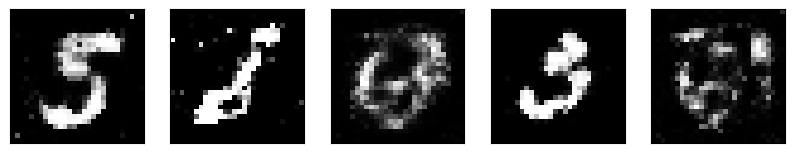

 Epoch: 115 batch: 1 D_loss: 1.327 G_loss: 1.313 
 Epoch: 115 batch: 2 D_loss: 1.270 G_loss: 1.289 
 Epoch: 115 batch: 3 D_loss: 1.284 G_loss: 1.120 
 Epoch: 115 batch: 4 D_loss: 1.219 G_loss: 1.143 
 Epoch: 115 batch: 5 D_loss: 1.367 G_loss: 1.094 
 Epoch: 115 batch: 6 D_loss: 1.341 G_loss: 1.033 
 Epoch: 115 batch: 7 D_loss: 1.312 G_loss: 0.968 
 Epoch: 115 batch: 8 D_loss: 1.339 G_loss: 0.981 
 Epoch: 115 batch: 9 D_loss: 1.317 G_loss: 1.000 
 Epoch: 115 batch: 10 D_loss: 1.273 G_loss: 1.004 
 Epoch: 115 batch: 11 D_loss: 1.333 G_loss: 1.018 
 Epoch: 115 batch: 12 D_loss: 1.302 G_loss: 1.036 
 Epoch: 115 batch: 13 D_loss: 1.293 G_loss: 0.994 
 Epoch: 115 batch: 14 D_loss: 1.289 G_loss: 0.914 
 Epoch: 115 batch: 15 D_loss: 1.275 G_loss: 0.914 
 Epoch: 115 batch: 16 D_loss: 1.324 G_loss: 0.847 
 Epoch: 115 batch: 17 D_loss: 1.285 G_loss: 0.912 
 Epoch: 115 batch: 18 D_loss: 1.270 G_loss: 1.006 
 Epoch: 115 batch: 19 D_loss: 1.270 G_loss: 1.071 
 Epoch: 115 batch: 20 D_loss: 1.262 G_lo

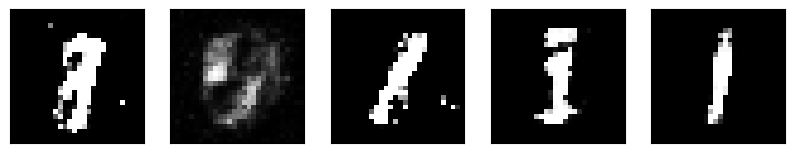

 Epoch: 116 batch: 1 D_loss: 1.327 G_loss: 1.533 
 Epoch: 116 batch: 2 D_loss: 1.270 G_loss: 1.353 
 Epoch: 116 batch: 3 D_loss: 1.266 G_loss: 1.121 
 Epoch: 116 batch: 4 D_loss: 1.250 G_loss: 1.022 
 Epoch: 116 batch: 5 D_loss: 1.378 G_loss: 0.980 
 Epoch: 116 batch: 6 D_loss: 1.330 G_loss: 0.978 
 Epoch: 116 batch: 7 D_loss: 1.294 G_loss: 0.988 
 Epoch: 116 batch: 8 D_loss: 1.404 G_loss: 0.943 
 Epoch: 116 batch: 9 D_loss: 1.349 G_loss: 1.011 
 Epoch: 116 batch: 10 D_loss: 1.288 G_loss: 0.973 
 Epoch: 116 batch: 11 D_loss: 1.299 G_loss: 0.996 
 Epoch: 116 batch: 12 D_loss: 1.296 G_loss: 0.926 
 Epoch: 116 batch: 13 D_loss: 1.222 G_loss: 0.943 
 Epoch: 116 batch: 14 D_loss: 1.254 G_loss: 0.931 
 Epoch: 116 batch: 15 D_loss: 1.259 G_loss: 0.986 
 Epoch: 116 batch: 16 D_loss: 1.277 G_loss: 0.968 
 Epoch: 116 batch: 17 D_loss: 1.185 G_loss: 1.128 
 Epoch: 116 batch: 18 D_loss: 1.239 G_loss: 1.190 
 Epoch: 116 batch: 19 D_loss: 1.247 G_loss: 1.238 
 Epoch: 116 batch: 20 D_loss: 1.192 G_lo

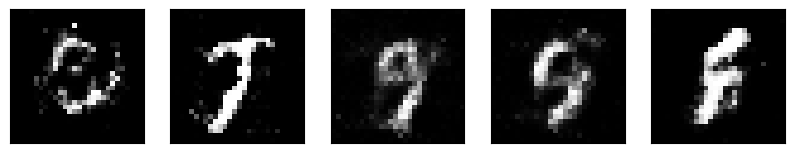

 Epoch: 117 batch: 1 D_loss: 1.310 G_loss: 2.362 
 Epoch: 117 batch: 2 D_loss: 1.309 G_loss: 2.010 
 Epoch: 117 batch: 3 D_loss: 1.187 G_loss: 1.365 
 Epoch: 117 batch: 4 D_loss: 1.197 G_loss: 1.389 
 Epoch: 117 batch: 5 D_loss: 1.211 G_loss: 1.375 
 Epoch: 117 batch: 6 D_loss: 1.174 G_loss: 1.573 
 Epoch: 117 batch: 7 D_loss: 1.175 G_loss: 1.707 
 Epoch: 117 batch: 8 D_loss: 1.273 G_loss: 1.797 
 Epoch: 117 batch: 9 D_loss: 1.306 G_loss: 1.485 
 Epoch: 117 batch: 10 D_loss: 1.192 G_loss: 1.216 
 Epoch: 117 batch: 11 D_loss: 1.227 G_loss: 1.052 
 Epoch: 117 batch: 12 D_loss: 1.243 G_loss: 1.011 
 Epoch: 117 batch: 13 D_loss: 1.247 G_loss: 0.946 
 Epoch: 117 batch: 14 D_loss: 1.209 G_loss: 0.966 
 Epoch: 117 batch: 15 D_loss: 1.226 G_loss: 0.991 
 Epoch: 117 batch: 16 D_loss: 1.243 G_loss: 1.042 
 Epoch: 117 batch: 17 D_loss: 1.214 G_loss: 1.123 
 Epoch: 117 batch: 18 D_loss: 1.226 G_loss: 1.088 
 Epoch: 117 batch: 19 D_loss: 1.163 G_loss: 1.110 
 Epoch: 117 batch: 20 D_loss: 1.229 G_lo

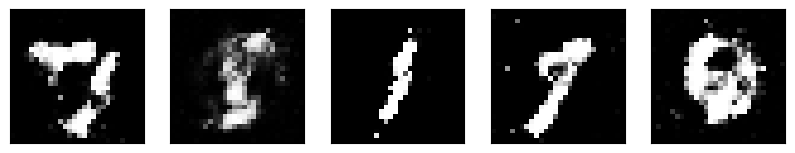

 Epoch: 118 batch: 1 D_loss: 1.127 G_loss: 1.353 
 Epoch: 118 batch: 2 D_loss: 1.112 G_loss: 1.301 
 Epoch: 118 batch: 3 D_loss: 1.140 G_loss: 1.364 
 Epoch: 118 batch: 4 D_loss: 1.134 G_loss: 1.455 
 Epoch: 118 batch: 5 D_loss: 1.099 G_loss: 1.419 
 Epoch: 118 batch: 6 D_loss: 1.204 G_loss: 1.505 
 Epoch: 118 batch: 7 D_loss: 1.061 G_loss: 1.728 
 Epoch: 118 batch: 8 D_loss: 1.182 G_loss: 1.761 
 Epoch: 118 batch: 9 D_loss: 1.140 G_loss: 1.752 
 Epoch: 118 batch: 10 D_loss: 1.187 G_loss: 1.642 
 Epoch: 118 batch: 11 D_loss: 1.160 G_loss: 1.714 
 Epoch: 118 batch: 12 D_loss: 1.231 G_loss: 1.540 
 Epoch: 118 batch: 13 D_loss: 1.236 G_loss: 1.552 
 Epoch: 118 batch: 14 D_loss: 1.268 G_loss: 1.462 
 Epoch: 118 batch: 15 D_loss: 1.240 G_loss: 1.235 
 Epoch: 118 batch: 16 D_loss: 1.230 G_loss: 1.096 
 Epoch: 118 batch: 17 D_loss: 1.255 G_loss: 1.026 
 Epoch: 118 batch: 18 D_loss: 1.305 G_loss: 1.034 
 Epoch: 118 batch: 19 D_loss: 1.347 G_loss: 1.046 
 Epoch: 118 batch: 20 D_loss: 1.343 G_lo

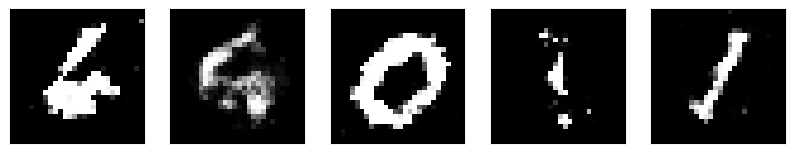

 Epoch: 119 batch: 1 D_loss: 1.336 G_loss: 0.971 
 Epoch: 119 batch: 2 D_loss: 1.309 G_loss: 1.008 
 Epoch: 119 batch: 3 D_loss: 1.320 G_loss: 0.972 
 Epoch: 119 batch: 4 D_loss: 1.291 G_loss: 0.937 
 Epoch: 119 batch: 5 D_loss: 1.324 G_loss: 0.877 
 Epoch: 119 batch: 6 D_loss: 1.314 G_loss: 0.896 
 Epoch: 119 batch: 7 D_loss: 1.276 G_loss: 0.872 
 Epoch: 119 batch: 8 D_loss: 1.258 G_loss: 0.998 
 Epoch: 119 batch: 9 D_loss: 1.219 G_loss: 1.112 
 Epoch: 119 batch: 10 D_loss: 1.177 G_loss: 1.300 
 Epoch: 119 batch: 11 D_loss: 1.198 G_loss: 1.853 
 Epoch: 119 batch: 12 D_loss: 1.199 G_loss: 1.985 
 Epoch: 119 batch: 13 D_loss: 1.213 G_loss: 1.793 
 Epoch: 119 batch: 14 D_loss: 1.147 G_loss: 1.481 
 Epoch: 119 batch: 15 D_loss: 1.195 G_loss: 1.508 
 Epoch: 119 batch: 16 D_loss: 1.142 G_loss: 1.556 
 Epoch: 119 batch: 17 D_loss: 1.118 G_loss: 1.989 
 Epoch: 119 batch: 18 D_loss: 1.193 G_loss: 2.171 
 Epoch: 119 batch: 19 D_loss: 1.272 G_loss: 2.451 
 Epoch: 119 batch: 20 D_loss: 1.187 G_lo

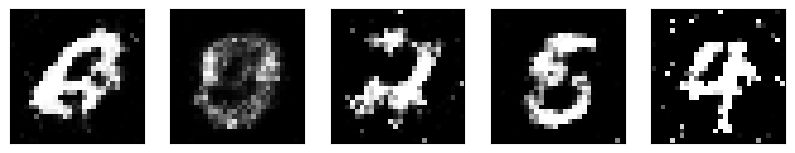

 Epoch: 120 batch: 1 D_loss: 1.274 G_loss: 1.094 
 Epoch: 120 batch: 2 D_loss: 1.216 G_loss: 1.151 
 Epoch: 120 batch: 3 D_loss: 1.196 G_loss: 1.186 
 Epoch: 120 batch: 4 D_loss: 1.168 G_loss: 1.157 
 Epoch: 120 batch: 5 D_loss: 1.326 G_loss: 1.197 
 Epoch: 120 batch: 6 D_loss: 1.232 G_loss: 1.156 
 Epoch: 120 batch: 7 D_loss: 1.204 G_loss: 1.120 
 Epoch: 120 batch: 8 D_loss: 1.226 G_loss: 1.146 
 Epoch: 120 batch: 9 D_loss: 1.182 G_loss: 1.168 
 Epoch: 120 batch: 10 D_loss: 1.098 G_loss: 1.236 
 Epoch: 120 batch: 11 D_loss: 1.194 G_loss: 1.335 
 Epoch: 120 batch: 12 D_loss: 1.146 G_loss: 1.459 
 Epoch: 120 batch: 13 D_loss: 1.174 G_loss: 1.738 
 Epoch: 120 batch: 14 D_loss: 1.166 G_loss: 1.760 
 Epoch: 120 batch: 15 D_loss: 1.154 G_loss: 1.640 
 Epoch: 120 batch: 16 D_loss: 1.187 G_loss: 1.645 
 Epoch: 120 batch: 17 D_loss: 1.232 G_loss: 1.468 
 Epoch: 120 batch: 18 D_loss: 1.179 G_loss: 1.497 
 Epoch: 120 batch: 19 D_loss: 1.212 G_loss: 1.511 
 Epoch: 120 batch: 20 D_loss: 1.279 G_lo

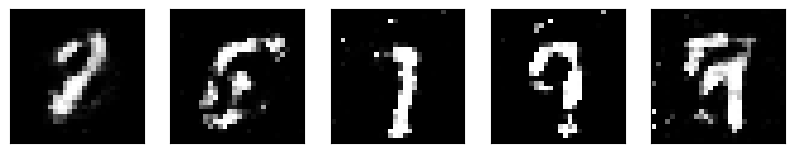

 Epoch: 121 batch: 1 D_loss: 1.239 G_loss: 1.028 
 Epoch: 121 batch: 2 D_loss: 1.173 G_loss: 1.066 
 Epoch: 121 batch: 3 D_loss: 1.215 G_loss: 1.088 
 Epoch: 121 batch: 4 D_loss: 1.200 G_loss: 1.108 
 Epoch: 121 batch: 5 D_loss: 1.243 G_loss: 1.321 
 Epoch: 121 batch: 6 D_loss: 1.282 G_loss: 1.290 
 Epoch: 121 batch: 7 D_loss: 1.250 G_loss: 1.186 
 Epoch: 121 batch: 8 D_loss: 1.237 G_loss: 1.239 
 Epoch: 121 batch: 9 D_loss: 1.270 G_loss: 1.104 
 Epoch: 121 batch: 10 D_loss: 1.221 G_loss: 1.090 
 Epoch: 121 batch: 11 D_loss: 1.174 G_loss: 1.097 
 Epoch: 121 batch: 12 D_loss: 1.178 G_loss: 1.178 
 Epoch: 121 batch: 13 D_loss: 1.222 G_loss: 1.200 
 Epoch: 121 batch: 14 D_loss: 1.137 G_loss: 1.356 
 Epoch: 121 batch: 15 D_loss: 1.141 G_loss: 1.445 
 Epoch: 121 batch: 16 D_loss: 1.157 G_loss: 1.555 
 Epoch: 121 batch: 17 D_loss: 1.144 G_loss: 1.676 
 Epoch: 121 batch: 18 D_loss: 1.188 G_loss: 1.702 
 Epoch: 121 batch: 19 D_loss: 1.151 G_loss: 1.469 
 Epoch: 121 batch: 20 D_loss: 1.245 G_lo

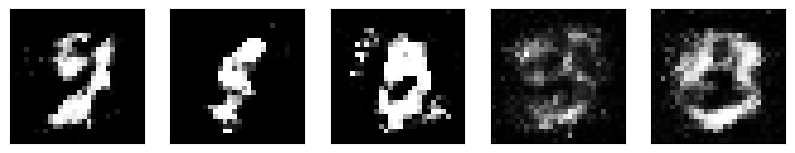

 Epoch: 122 batch: 1 D_loss: 1.185 G_loss: 1.109 
 Epoch: 122 batch: 2 D_loss: 1.196 G_loss: 1.116 
 Epoch: 122 batch: 3 D_loss: 1.207 G_loss: 1.123 
 Epoch: 122 batch: 4 D_loss: 1.152 G_loss: 1.204 
 Epoch: 122 batch: 5 D_loss: 1.227 G_loss: 1.334 
 Epoch: 122 batch: 6 D_loss: 1.260 G_loss: 1.359 
 Epoch: 122 batch: 7 D_loss: 1.203 G_loss: 1.641 
 Epoch: 122 batch: 8 D_loss: 1.299 G_loss: 1.522 
 Epoch: 122 batch: 9 D_loss: 1.288 G_loss: 1.362 
 Epoch: 122 batch: 10 D_loss: 1.232 G_loss: 1.258 
 Epoch: 122 batch: 11 D_loss: 1.252 G_loss: 1.229 
 Epoch: 122 batch: 12 D_loss: 1.251 G_loss: 1.184 
 Epoch: 122 batch: 13 D_loss: 1.235 G_loss: 1.233 
 Epoch: 122 batch: 14 D_loss: 1.244 G_loss: 1.324 
 Epoch: 122 batch: 15 D_loss: 1.354 G_loss: 1.170 
 Epoch: 122 batch: 16 D_loss: 1.332 G_loss: 1.079 
 Epoch: 122 batch: 17 D_loss: 1.297 G_loss: 0.984 
 Epoch: 122 batch: 18 D_loss: 1.293 G_loss: 0.947 
 Epoch: 122 batch: 19 D_loss: 1.297 G_loss: 0.894 
 Epoch: 122 batch: 20 D_loss: 1.319 G_lo

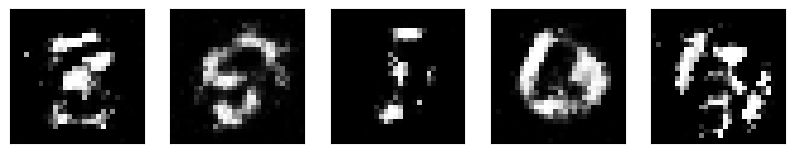

 Epoch: 123 batch: 1 D_loss: 1.287 G_loss: 1.041 
 Epoch: 123 batch: 2 D_loss: 1.298 G_loss: 0.993 
 Epoch: 123 batch: 3 D_loss: 1.246 G_loss: 1.001 
 Epoch: 123 batch: 4 D_loss: 1.259 G_loss: 1.082 
 Epoch: 123 batch: 5 D_loss: 1.287 G_loss: 1.051 
 Epoch: 123 batch: 6 D_loss: 1.221 G_loss: 1.048 
 Epoch: 123 batch: 7 D_loss: 1.238 G_loss: 1.041 
 Epoch: 123 batch: 8 D_loss: 1.309 G_loss: 1.025 
 Epoch: 123 batch: 9 D_loss: 1.305 G_loss: 0.968 
 Epoch: 123 batch: 10 D_loss: 1.231 G_loss: 1.033 
 Epoch: 123 batch: 11 D_loss: 1.214 G_loss: 1.004 
 Epoch: 123 batch: 12 D_loss: 1.286 G_loss: 1.049 
 Epoch: 123 batch: 13 D_loss: 1.232 G_loss: 1.085 
 Epoch: 123 batch: 14 D_loss: 1.200 G_loss: 1.060 
 Epoch: 123 batch: 15 D_loss: 1.257 G_loss: 1.099 
 Epoch: 123 batch: 16 D_loss: 1.224 G_loss: 1.151 
 Epoch: 123 batch: 17 D_loss: 1.251 G_loss: 1.113 
 Epoch: 123 batch: 18 D_loss: 1.200 G_loss: 1.176 
 Epoch: 123 batch: 19 D_loss: 1.258 G_loss: 1.221 
 Epoch: 123 batch: 20 D_loss: 1.232 G_lo

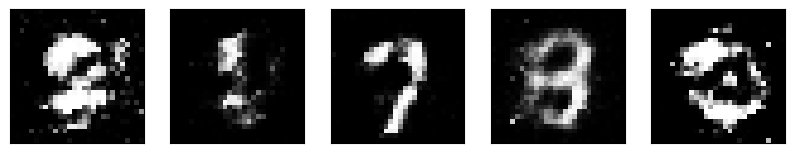

 Epoch: 124 batch: 1 D_loss: 1.197 G_loss: 1.237 
 Epoch: 124 batch: 2 D_loss: 1.250 G_loss: 1.384 
 Epoch: 124 batch: 3 D_loss: 1.222 G_loss: 1.351 
 Epoch: 124 batch: 4 D_loss: 1.196 G_loss: 1.351 
 Epoch: 124 batch: 5 D_loss: 1.281 G_loss: 1.348 
 Epoch: 124 batch: 6 D_loss: 1.265 G_loss: 1.204 
 Epoch: 124 batch: 7 D_loss: 1.229 G_loss: 1.136 
 Epoch: 124 batch: 8 D_loss: 1.353 G_loss: 1.125 
 Epoch: 124 batch: 9 D_loss: 1.306 G_loss: 1.176 
 Epoch: 124 batch: 10 D_loss: 1.155 G_loss: 1.078 
 Epoch: 124 batch: 11 D_loss: 1.271 G_loss: 1.086 
 Epoch: 124 batch: 12 D_loss: 1.209 G_loss: 1.044 
 Epoch: 124 batch: 13 D_loss: 1.238 G_loss: 1.065 
 Epoch: 124 batch: 14 D_loss: 1.192 G_loss: 1.069 
 Epoch: 124 batch: 15 D_loss: 1.269 G_loss: 1.054 
 Epoch: 124 batch: 16 D_loss: 1.208 G_loss: 1.075 
 Epoch: 124 batch: 17 D_loss: 1.244 G_loss: 1.055 
 Epoch: 124 batch: 18 D_loss: 1.232 G_loss: 1.009 
 Epoch: 124 batch: 19 D_loss: 1.270 G_loss: 0.997 
 Epoch: 124 batch: 20 D_loss: 1.279 G_lo

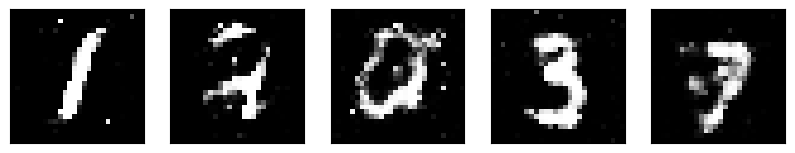

 Epoch: 125 batch: 1 D_loss: 1.228 G_loss: 1.133 
 Epoch: 125 batch: 2 D_loss: 1.240 G_loss: 1.158 
 Epoch: 125 batch: 3 D_loss: 1.238 G_loss: 1.037 
 Epoch: 125 batch: 4 D_loss: 1.247 G_loss: 1.049 
 Epoch: 125 batch: 5 D_loss: 1.286 G_loss: 1.060 
 Epoch: 125 batch: 6 D_loss: 1.304 G_loss: 1.126 
 Epoch: 125 batch: 7 D_loss: 1.267 G_loss: 1.046 
 Epoch: 125 batch: 8 D_loss: 1.295 G_loss: 1.163 
 Epoch: 125 batch: 9 D_loss: 1.256 G_loss: 1.242 
 Epoch: 125 batch: 10 D_loss: 1.170 G_loss: 1.229 
 Epoch: 125 batch: 11 D_loss: 1.235 G_loss: 1.295 
 Epoch: 125 batch: 12 D_loss: 1.242 G_loss: 1.392 
 Epoch: 125 batch: 13 D_loss: 1.263 G_loss: 1.275 
 Epoch: 125 batch: 14 D_loss: 1.234 G_loss: 1.124 
 Epoch: 125 batch: 15 D_loss: 1.242 G_loss: 1.152 
 Epoch: 125 batch: 16 D_loss: 1.216 G_loss: 1.127 
 Epoch: 125 batch: 17 D_loss: 1.268 G_loss: 1.277 
 Epoch: 125 batch: 18 D_loss: 1.217 G_loss: 1.260 
 Epoch: 125 batch: 19 D_loss: 1.260 G_loss: 1.292 
 Epoch: 125 batch: 20 D_loss: 1.304 G_lo

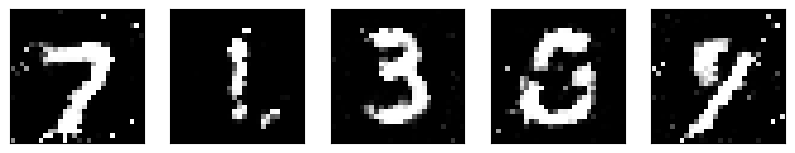

 Epoch: 126 batch: 1 D_loss: 1.275 G_loss: 1.093 
 Epoch: 126 batch: 2 D_loss: 1.270 G_loss: 1.084 
 Epoch: 126 batch: 3 D_loss: 1.206 G_loss: 1.065 
 Epoch: 126 batch: 4 D_loss: 1.167 G_loss: 1.071 
 Epoch: 126 batch: 5 D_loss: 1.249 G_loss: 1.153 
 Epoch: 126 batch: 6 D_loss: 1.228 G_loss: 1.196 
 Epoch: 126 batch: 7 D_loss: 1.271 G_loss: 1.209 
 Epoch: 126 batch: 8 D_loss: 1.314 G_loss: 1.259 
 Epoch: 126 batch: 9 D_loss: 1.427 G_loss: 1.104 
 Epoch: 126 batch: 10 D_loss: 1.221 G_loss: 0.984 
 Epoch: 126 batch: 11 D_loss: 1.310 G_loss: 0.899 
 Epoch: 126 batch: 12 D_loss: 1.313 G_loss: 0.910 
 Epoch: 126 batch: 13 D_loss: 1.287 G_loss: 0.922 
 Epoch: 126 batch: 14 D_loss: 1.253 G_loss: 0.912 
 Epoch: 126 batch: 15 D_loss: 1.332 G_loss: 0.928 
 Epoch: 126 batch: 16 D_loss: 1.314 G_loss: 0.926 
 Epoch: 126 batch: 17 D_loss: 1.303 G_loss: 0.940 
 Epoch: 126 batch: 18 D_loss: 1.279 G_loss: 0.920 
 Epoch: 126 batch: 19 D_loss: 1.293 G_loss: 0.950 
 Epoch: 126 batch: 20 D_loss: 1.314 G_lo

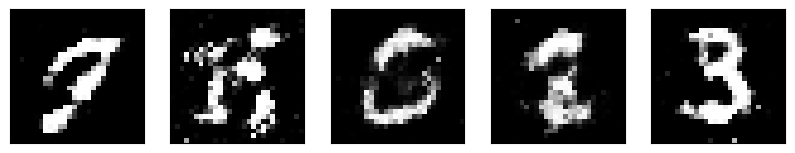

 Epoch: 127 batch: 1 D_loss: 1.308 G_loss: 1.528 
 Epoch: 127 batch: 2 D_loss: 1.256 G_loss: 1.212 
 Epoch: 127 batch: 3 D_loss: 1.265 G_loss: 1.193 
 Epoch: 127 batch: 4 D_loss: 1.288 G_loss: 1.131 
 Epoch: 127 batch: 5 D_loss: 1.291 G_loss: 1.139 
 Epoch: 127 batch: 6 D_loss: 1.271 G_loss: 1.108 
 Epoch: 127 batch: 7 D_loss: 1.330 G_loss: 1.174 
 Epoch: 127 batch: 8 D_loss: 1.355 G_loss: 1.154 
 Epoch: 127 batch: 9 D_loss: 1.345 G_loss: 1.046 
 Epoch: 127 batch: 10 D_loss: 1.282 G_loss: 1.019 
 Epoch: 127 batch: 11 D_loss: 1.338 G_loss: 0.975 
 Epoch: 127 batch: 12 D_loss: 1.301 G_loss: 0.900 
 Epoch: 127 batch: 13 D_loss: 1.321 G_loss: 0.855 
 Epoch: 127 batch: 14 D_loss: 1.283 G_loss: 0.871 
 Epoch: 127 batch: 15 D_loss: 1.295 G_loss: 0.846 
 Epoch: 127 batch: 16 D_loss: 1.298 G_loss: 0.861 
 Epoch: 127 batch: 17 D_loss: 1.305 G_loss: 0.894 
 Epoch: 127 batch: 18 D_loss: 1.280 G_loss: 0.883 
 Epoch: 127 batch: 19 D_loss: 1.317 G_loss: 0.913 
 Epoch: 127 batch: 20 D_loss: 1.313 G_lo

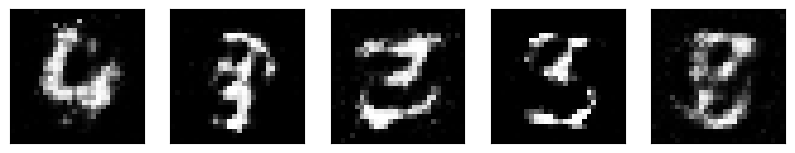

 Epoch: 128 batch: 1 D_loss: 1.285 G_loss: 0.946 
 Epoch: 128 batch: 2 D_loss: 1.292 G_loss: 0.905 
 Epoch: 128 batch: 3 D_loss: 1.284 G_loss: 1.037 
 Epoch: 128 batch: 4 D_loss: 1.269 G_loss: 0.991 
 Epoch: 128 batch: 5 D_loss: 1.305 G_loss: 1.123 
 Epoch: 128 batch: 6 D_loss: 1.292 G_loss: 1.070 
 Epoch: 128 batch: 7 D_loss: 1.293 G_loss: 1.049 
 Epoch: 128 batch: 8 D_loss: 1.324 G_loss: 1.001 
 Epoch: 128 batch: 9 D_loss: 1.303 G_loss: 0.938 
 Epoch: 128 batch: 10 D_loss: 1.267 G_loss: 0.989 
 Epoch: 128 batch: 11 D_loss: 1.271 G_loss: 0.928 
 Epoch: 128 batch: 12 D_loss: 1.251 G_loss: 0.955 
 Epoch: 128 batch: 13 D_loss: 1.258 G_loss: 0.989 
 Epoch: 128 batch: 14 D_loss: 1.232 G_loss: 1.077 
 Epoch: 128 batch: 15 D_loss: 1.292 G_loss: 1.155 
 Epoch: 128 batch: 16 D_loss: 1.239 G_loss: 1.233 
 Epoch: 128 batch: 17 D_loss: 1.222 G_loss: 1.285 
 Epoch: 128 batch: 18 D_loss: 1.288 G_loss: 1.418 
 Epoch: 128 batch: 19 D_loss: 1.262 G_loss: 1.254 
 Epoch: 128 batch: 20 D_loss: 1.234 G_lo

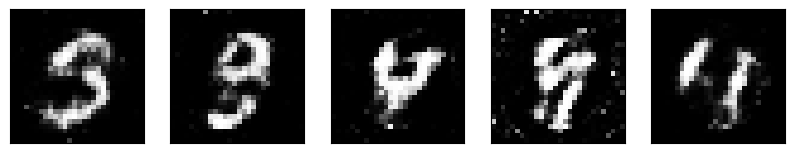

 Epoch: 129 batch: 1 D_loss: 1.274 G_loss: 1.018 
 Epoch: 129 batch: 2 D_loss: 1.274 G_loss: 1.017 
 Epoch: 129 batch: 3 D_loss: 1.258 G_loss: 1.021 
 Epoch: 129 batch: 4 D_loss: 1.202 G_loss: 1.037 
 Epoch: 129 batch: 5 D_loss: 1.306 G_loss: 1.074 
 Epoch: 129 batch: 6 D_loss: 1.268 G_loss: 1.003 
 Epoch: 129 batch: 7 D_loss: 1.251 G_loss: 0.965 
 Epoch: 129 batch: 8 D_loss: 1.358 G_loss: 0.966 
 Epoch: 129 batch: 9 D_loss: 1.343 G_loss: 0.979 
 Epoch: 129 batch: 10 D_loss: 1.200 G_loss: 1.093 
 Epoch: 129 batch: 11 D_loss: 1.289 G_loss: 1.119 
 Epoch: 129 batch: 12 D_loss: 1.231 G_loss: 1.160 
 Epoch: 129 batch: 13 D_loss: 1.266 G_loss: 1.163 
 Epoch: 129 batch: 14 D_loss: 1.295 G_loss: 1.194 
 Epoch: 129 batch: 15 D_loss: 1.318 G_loss: 1.129 
 Epoch: 129 batch: 16 D_loss: 1.268 G_loss: 1.020 
 Epoch: 129 batch: 17 D_loss: 1.277 G_loss: 1.010 
 Epoch: 129 batch: 18 D_loss: 1.273 G_loss: 0.881 
 Epoch: 129 batch: 19 D_loss: 1.342 G_loss: 0.956 
 Epoch: 129 batch: 20 D_loss: 1.306 G_lo

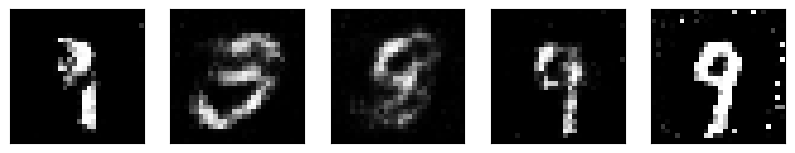

 Epoch: 130 batch: 1 D_loss: 1.314 G_loss: 0.921 
 Epoch: 130 batch: 2 D_loss: 1.305 G_loss: 0.903 
 Epoch: 130 batch: 3 D_loss: 1.298 G_loss: 0.886 
 Epoch: 130 batch: 4 D_loss: 1.262 G_loss: 0.901 
 Epoch: 130 batch: 5 D_loss: 1.314 G_loss: 0.917 
 Epoch: 130 batch: 6 D_loss: 1.286 G_loss: 0.927 
 Epoch: 130 batch: 7 D_loss: 1.249 G_loss: 0.954 
 Epoch: 130 batch: 8 D_loss: 1.249 G_loss: 1.060 
 Epoch: 130 batch: 9 D_loss: 1.229 G_loss: 1.196 
 Epoch: 130 batch: 10 D_loss: 1.166 G_loss: 1.260 
 Epoch: 130 batch: 11 D_loss: 1.222 G_loss: 1.654 
 Epoch: 130 batch: 12 D_loss: 1.272 G_loss: 1.692 
 Epoch: 130 batch: 13 D_loss: 1.216 G_loss: 1.330 
 Epoch: 130 batch: 14 D_loss: 1.268 G_loss: 1.289 
 Epoch: 130 batch: 15 D_loss: 1.306 G_loss: 0.997 
 Epoch: 130 batch: 16 D_loss: 1.262 G_loss: 1.214 
 Epoch: 130 batch: 17 D_loss: 1.283 G_loss: 1.375 
 Epoch: 130 batch: 18 D_loss: 1.334 G_loss: 1.387 
 Epoch: 130 batch: 19 D_loss: 1.318 G_loss: 1.106 
 Epoch: 130 batch: 20 D_loss: 1.330 G_lo

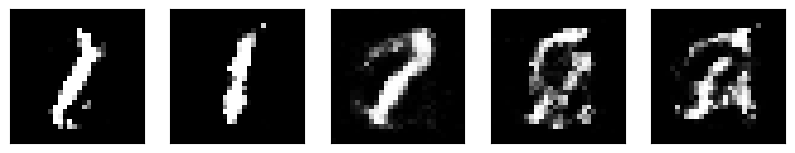

 Epoch: 131 batch: 1 D_loss: 1.314 G_loss: 1.018 
 Epoch: 131 batch: 2 D_loss: 1.274 G_loss: 0.971 
 Epoch: 131 batch: 3 D_loss: 1.310 G_loss: 0.896 
 Epoch: 131 batch: 4 D_loss: 1.303 G_loss: 0.860 
 Epoch: 131 batch: 5 D_loss: 1.365 G_loss: 0.830 
 Epoch: 131 batch: 6 D_loss: 1.361 G_loss: 0.919 
 Epoch: 131 batch: 7 D_loss: 1.277 G_loss: 0.954 
 Epoch: 131 batch: 8 D_loss: 1.318 G_loss: 1.042 
 Epoch: 131 batch: 9 D_loss: 1.341 G_loss: 1.096 
 Epoch: 131 batch: 10 D_loss: 1.261 G_loss: 1.091 
 Epoch: 131 batch: 11 D_loss: 1.286 G_loss: 1.068 
 Epoch: 131 batch: 12 D_loss: 1.283 G_loss: 1.202 
 Epoch: 131 batch: 13 D_loss: 1.230 G_loss: 1.221 
 Epoch: 131 batch: 14 D_loss: 1.267 G_loss: 1.308 
 Epoch: 131 batch: 15 D_loss: 1.388 G_loss: 1.185 
 Epoch: 131 batch: 16 D_loss: 1.295 G_loss: 1.204 
 Epoch: 131 batch: 17 D_loss: 1.234 G_loss: 1.206 
 Epoch: 131 batch: 18 D_loss: 1.341 G_loss: 1.093 
 Epoch: 131 batch: 19 D_loss: 1.331 G_loss: 1.015 
 Epoch: 131 batch: 20 D_loss: 1.298 G_lo

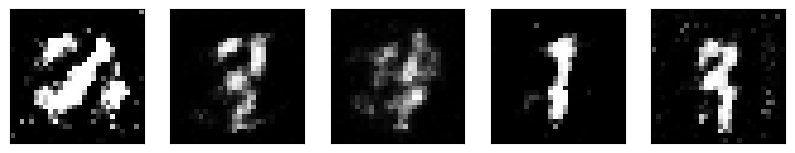

 Epoch: 132 batch: 1 D_loss: 1.275 G_loss: 0.852 
 Epoch: 132 batch: 2 D_loss: 1.232 G_loss: 0.917 
 Epoch: 132 batch: 3 D_loss: 1.235 G_loss: 0.955 
 Epoch: 132 batch: 4 D_loss: 1.241 G_loss: 0.998 
 Epoch: 132 batch: 5 D_loss: 1.278 G_loss: 0.979 
 Epoch: 132 batch: 6 D_loss: 1.235 G_loss: 0.968 
 Epoch: 132 batch: 7 D_loss: 1.204 G_loss: 0.927 
 Epoch: 132 batch: 8 D_loss: 1.258 G_loss: 0.961 
 Epoch: 132 batch: 9 D_loss: 1.198 G_loss: 0.952 
 Epoch: 132 batch: 10 D_loss: 1.152 G_loss: 1.036 
 Epoch: 132 batch: 11 D_loss: 1.295 G_loss: 1.077 
 Epoch: 132 batch: 12 D_loss: 1.175 G_loss: 1.172 
 Epoch: 132 batch: 13 D_loss: 1.138 G_loss: 1.302 
 Epoch: 132 batch: 14 D_loss: 1.188 G_loss: 1.442 
 Epoch: 132 batch: 15 D_loss: 1.302 G_loss: 1.427 
 Epoch: 132 batch: 16 D_loss: 1.211 G_loss: 1.472 
 Epoch: 132 batch: 17 D_loss: 1.172 G_loss: 1.480 
 Epoch: 132 batch: 18 D_loss: 1.194 G_loss: 1.380 
 Epoch: 132 batch: 19 D_loss: 1.353 G_loss: 1.294 
 Epoch: 132 batch: 20 D_loss: 1.311 G_lo

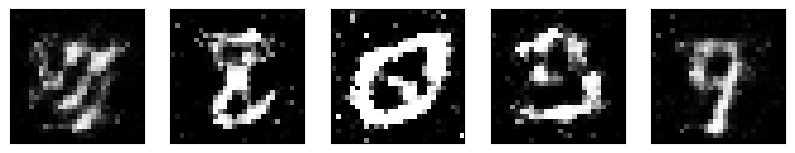

 Epoch: 133 batch: 1 D_loss: 1.148 G_loss: 1.287 
 Epoch: 133 batch: 2 D_loss: 1.172 G_loss: 1.278 
 Epoch: 133 batch: 3 D_loss: 1.256 G_loss: 1.312 
 Epoch: 133 batch: 4 D_loss: 1.152 G_loss: 1.303 
 Epoch: 133 batch: 5 D_loss: 1.232 G_loss: 1.215 
 Epoch: 133 batch: 6 D_loss: 1.280 G_loss: 1.147 
 Epoch: 133 batch: 7 D_loss: 1.266 G_loss: 1.183 
 Epoch: 133 batch: 8 D_loss: 1.362 G_loss: 1.064 
 Epoch: 133 batch: 9 D_loss: 1.324 G_loss: 1.030 
 Epoch: 133 batch: 10 D_loss: 1.293 G_loss: 1.030 
 Epoch: 133 batch: 11 D_loss: 1.332 G_loss: 0.987 
 Epoch: 133 batch: 12 D_loss: 1.313 G_loss: 0.959 
 Epoch: 133 batch: 13 D_loss: 1.314 G_loss: 0.869 
 Epoch: 133 batch: 14 D_loss: 1.287 G_loss: 0.880 
 Epoch: 133 batch: 15 D_loss: 1.315 G_loss: 0.874 
 Epoch: 133 batch: 16 D_loss: 1.296 G_loss: 0.878 
 Epoch: 133 batch: 17 D_loss: 1.297 G_loss: 0.857 
 Epoch: 133 batch: 18 D_loss: 1.307 G_loss: 0.905 
 Epoch: 133 batch: 19 D_loss: 1.330 G_loss: 0.919 
 Epoch: 133 batch: 20 D_loss: 1.297 G_lo

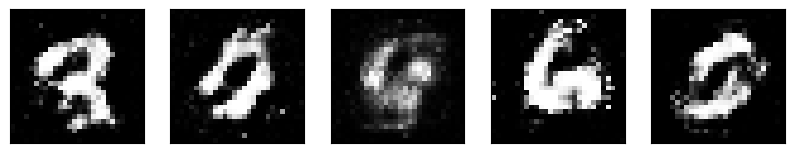

 Epoch: 134 batch: 1 D_loss: 1.265 G_loss: 1.075 
 Epoch: 134 batch: 2 D_loss: 1.208 G_loss: 1.136 
 Epoch: 134 batch: 3 D_loss: 1.224 G_loss: 1.153 
 Epoch: 134 batch: 4 D_loss: 1.211 G_loss: 1.107 
 Epoch: 134 batch: 5 D_loss: 1.332 G_loss: 1.114 
 Epoch: 134 batch: 6 D_loss: 1.312 G_loss: 1.055 
 Epoch: 134 batch: 7 D_loss: 1.246 G_loss: 1.086 
 Epoch: 134 batch: 8 D_loss: 1.337 G_loss: 1.046 
 Epoch: 134 batch: 9 D_loss: 1.305 G_loss: 0.985 
 Epoch: 134 batch: 10 D_loss: 1.218 G_loss: 1.048 
 Epoch: 134 batch: 11 D_loss: 1.319 G_loss: 1.059 
 Epoch: 134 batch: 12 D_loss: 1.295 G_loss: 1.084 
 Epoch: 134 batch: 13 D_loss: 1.292 G_loss: 1.084 
 Epoch: 134 batch: 14 D_loss: 1.253 G_loss: 1.094 
 Epoch: 134 batch: 15 D_loss: 1.226 G_loss: 1.055 
 Epoch: 134 batch: 16 D_loss: 1.276 G_loss: 0.971 
 Epoch: 134 batch: 17 D_loss: 1.277 G_loss: 0.937 
 Epoch: 134 batch: 18 D_loss: 1.242 G_loss: 0.946 
 Epoch: 134 batch: 19 D_loss: 1.284 G_loss: 1.018 
 Epoch: 134 batch: 20 D_loss: 1.290 G_lo

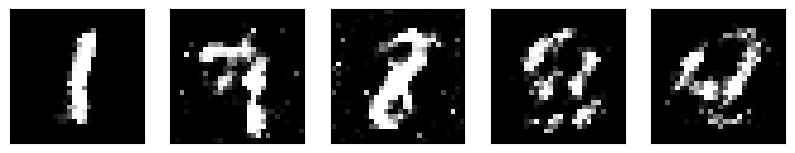

 Epoch: 135 batch: 1 D_loss: 1.228 G_loss: 1.216 
 Epoch: 135 batch: 2 D_loss: 1.185 G_loss: 1.423 
 Epoch: 135 batch: 3 D_loss: 1.168 G_loss: 1.613 
 Epoch: 135 batch: 4 D_loss: 1.162 G_loss: 1.843 
 Epoch: 135 batch: 5 D_loss: 1.175 G_loss: 1.513 
 Epoch: 135 batch: 6 D_loss: 1.273 G_loss: 1.623 
 Epoch: 135 batch: 7 D_loss: 1.348 G_loss: 1.319 
 Epoch: 135 batch: 8 D_loss: 1.350 G_loss: 1.194 
 Epoch: 135 batch: 9 D_loss: 1.298 G_loss: 1.142 
 Epoch: 135 batch: 10 D_loss: 1.171 G_loss: 1.223 
 Epoch: 135 batch: 11 D_loss: 1.280 G_loss: 1.215 
 Epoch: 135 batch: 12 D_loss: 1.285 G_loss: 1.266 
 Epoch: 135 batch: 13 D_loss: 1.283 G_loss: 1.381 
 Epoch: 135 batch: 14 D_loss: 1.287 G_loss: 1.239 
 Epoch: 135 batch: 15 D_loss: 1.339 G_loss: 1.051 
 Epoch: 135 batch: 16 D_loss: 1.317 G_loss: 0.998 
 Epoch: 135 batch: 17 D_loss: 1.321 G_loss: 0.954 
 Epoch: 135 batch: 18 D_loss: 1.276 G_loss: 0.920 
 Epoch: 135 batch: 19 D_loss: 1.361 G_loss: 0.885 
 Epoch: 135 batch: 20 D_loss: 1.310 G_lo

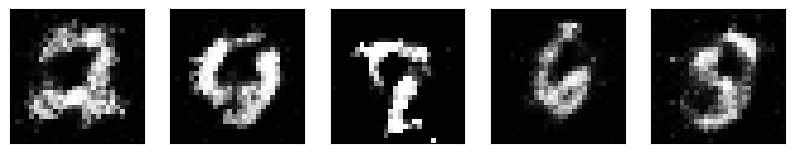

 Epoch: 136 batch: 1 D_loss: 1.213 G_loss: 1.320 
 Epoch: 136 batch: 2 D_loss: 1.186 G_loss: 1.339 
 Epoch: 136 batch: 3 D_loss: 1.180 G_loss: 1.252 
 Epoch: 136 batch: 4 D_loss: 1.176 G_loss: 1.277 
 Epoch: 136 batch: 5 D_loss: 1.286 G_loss: 1.118 
 Epoch: 136 batch: 6 D_loss: 1.229 G_loss: 1.100 
 Epoch: 136 batch: 7 D_loss: 1.212 G_loss: 1.098 
 Epoch: 136 batch: 8 D_loss: 1.262 G_loss: 1.173 
 Epoch: 136 batch: 9 D_loss: 1.268 G_loss: 1.161 
 Epoch: 136 batch: 10 D_loss: 1.169 G_loss: 1.128 
 Epoch: 136 batch: 11 D_loss: 1.263 G_loss: 0.995 
 Epoch: 136 batch: 12 D_loss: 1.272 G_loss: 0.920 
 Epoch: 136 batch: 13 D_loss: 1.211 G_loss: 0.954 
 Epoch: 136 batch: 14 D_loss: 1.233 G_loss: 1.014 
 Epoch: 136 batch: 15 D_loss: 1.287 G_loss: 1.064 
 Epoch: 136 batch: 16 D_loss: 1.228 G_loss: 1.064 
 Epoch: 136 batch: 17 D_loss: 1.249 G_loss: 1.025 
 Epoch: 136 batch: 18 D_loss: 1.235 G_loss: 1.019 
 Epoch: 136 batch: 19 D_loss: 1.283 G_loss: 1.075 
 Epoch: 136 batch: 20 D_loss: 1.269 G_lo

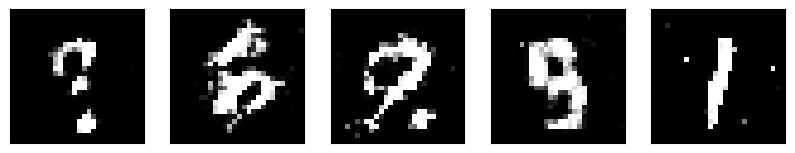

 Epoch: 137 batch: 1 D_loss: 1.288 G_loss: 0.946 
 Epoch: 137 batch: 2 D_loss: 1.297 G_loss: 0.978 
 Epoch: 137 batch: 3 D_loss: 1.307 G_loss: 0.996 
 Epoch: 137 batch: 4 D_loss: 1.245 G_loss: 1.020 
 Epoch: 137 batch: 5 D_loss: 1.264 G_loss: 1.053 
 Epoch: 137 batch: 6 D_loss: 1.256 G_loss: 1.032 
 Epoch: 137 batch: 7 D_loss: 1.252 G_loss: 1.141 
 Epoch: 137 batch: 8 D_loss: 1.256 G_loss: 1.134 
 Epoch: 137 batch: 9 D_loss: 1.267 G_loss: 1.110 
 Epoch: 137 batch: 10 D_loss: 1.214 G_loss: 1.096 
 Epoch: 137 batch: 11 D_loss: 1.231 G_loss: 1.203 
 Epoch: 137 batch: 12 D_loss: 1.258 G_loss: 1.560 
 Epoch: 137 batch: 13 D_loss: 1.168 G_loss: 1.607 
 Epoch: 137 batch: 14 D_loss: 1.346 G_loss: 1.295 
 Epoch: 137 batch: 15 D_loss: 1.360 G_loss: 1.229 
 Epoch: 137 batch: 16 D_loss: 1.365 G_loss: 1.158 
 Epoch: 137 batch: 17 D_loss: 1.369 G_loss: 1.094 
 Epoch: 137 batch: 18 D_loss: 1.335 G_loss: 0.963 
 Epoch: 137 batch: 19 D_loss: 1.328 G_loss: 1.115 
 Epoch: 137 batch: 20 D_loss: 1.267 G_lo

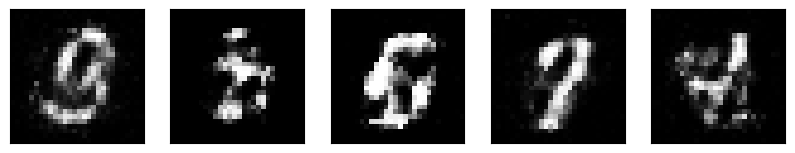

 Epoch: 138 batch: 1 D_loss: 1.175 G_loss: 1.383 
 Epoch: 138 batch: 2 D_loss: 1.181 G_loss: 1.523 
 Epoch: 138 batch: 3 D_loss: 1.220 G_loss: 1.562 
 Epoch: 138 batch: 4 D_loss: 1.230 G_loss: 1.525 
 Epoch: 138 batch: 5 D_loss: 1.288 G_loss: 1.360 
 Epoch: 138 batch: 6 D_loss: 1.242 G_loss: 1.275 
 Epoch: 138 batch: 7 D_loss: 1.193 G_loss: 1.165 
 Epoch: 138 batch: 8 D_loss: 1.315 G_loss: 1.026 
 Epoch: 138 batch: 9 D_loss: 1.256 G_loss: 0.983 
 Epoch: 138 batch: 10 D_loss: 1.225 G_loss: 0.993 
 Epoch: 138 batch: 11 D_loss: 1.264 G_loss: 0.968 
 Epoch: 138 batch: 12 D_loss: 1.293 G_loss: 0.982 
 Epoch: 138 batch: 13 D_loss: 1.187 G_loss: 0.999 
 Epoch: 138 batch: 14 D_loss: 1.264 G_loss: 1.027 
 Epoch: 138 batch: 15 D_loss: 1.279 G_loss: 1.053 
 Epoch: 138 batch: 16 D_loss: 1.241 G_loss: 1.024 
 Epoch: 138 batch: 17 D_loss: 1.239 G_loss: 1.012 
 Epoch: 138 batch: 18 D_loss: 1.259 G_loss: 0.979 
 Epoch: 138 batch: 19 D_loss: 1.270 G_loss: 1.016 
 Epoch: 138 batch: 20 D_loss: 1.226 G_lo

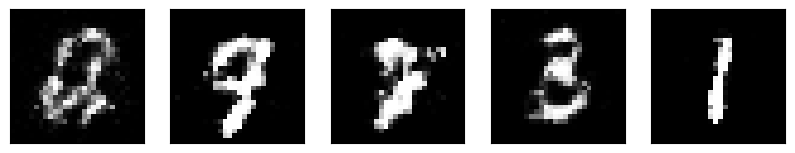

 Epoch: 139 batch: 1 D_loss: 1.241 G_loss: 1.030 
 Epoch: 139 batch: 2 D_loss: 1.234 G_loss: 1.056 
 Epoch: 139 batch: 3 D_loss: 1.210 G_loss: 1.135 
 Epoch: 139 batch: 4 D_loss: 1.209 G_loss: 1.211 
 Epoch: 139 batch: 5 D_loss: 1.277 G_loss: 1.352 
 Epoch: 139 batch: 6 D_loss: 1.243 G_loss: 1.577 
 Epoch: 139 batch: 7 D_loss: 1.264 G_loss: 1.560 
 Epoch: 139 batch: 8 D_loss: 1.164 G_loss: 1.578 
 Epoch: 139 batch: 9 D_loss: 1.265 G_loss: 1.749 
 Epoch: 139 batch: 10 D_loss: 1.146 G_loss: 1.855 
 Epoch: 139 batch: 11 D_loss: 1.168 G_loss: 1.674 
 Epoch: 139 batch: 12 D_loss: 1.209 G_loss: 1.809 
 Epoch: 139 batch: 13 D_loss: 1.192 G_loss: 1.538 
 Epoch: 139 batch: 14 D_loss: 1.318 G_loss: 1.304 
 Epoch: 139 batch: 15 D_loss: 1.244 G_loss: 1.159 
 Epoch: 139 batch: 16 D_loss: 1.290 G_loss: 1.040 
 Epoch: 139 batch: 17 D_loss: 1.256 G_loss: 0.950 
 Epoch: 139 batch: 18 D_loss: 1.272 G_loss: 0.915 
 Epoch: 139 batch: 19 D_loss: 1.297 G_loss: 1.049 
 Epoch: 139 batch: 20 D_loss: 1.345 G_lo

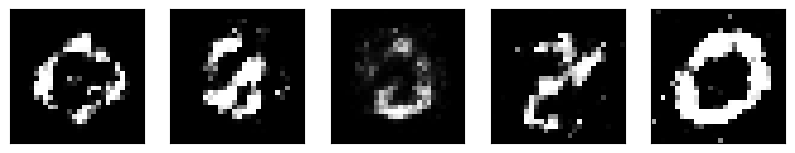

 Epoch: 140 batch: 1 D_loss: 1.316 G_loss: 1.686 
 Epoch: 140 batch: 2 D_loss: 1.329 G_loss: 1.635 
 Epoch: 140 batch: 3 D_loss: 1.289 G_loss: 1.229 
 Epoch: 140 batch: 4 D_loss: 1.296 G_loss: 1.053 
 Epoch: 140 batch: 5 D_loss: 1.329 G_loss: 1.123 
 Epoch: 140 batch: 6 D_loss: 1.346 G_loss: 1.088 
 Epoch: 140 batch: 7 D_loss: 1.294 G_loss: 1.084 
 Epoch: 140 batch: 8 D_loss: 1.350 G_loss: 1.083 
 Epoch: 140 batch: 9 D_loss: 1.341 G_loss: 1.066 
 Epoch: 140 batch: 10 D_loss: 1.291 G_loss: 0.944 
 Epoch: 140 batch: 11 D_loss: 1.308 G_loss: 0.884 
 Epoch: 140 batch: 12 D_loss: 1.293 G_loss: 0.854 
 Epoch: 140 batch: 13 D_loss: 1.279 G_loss: 0.844 
 Epoch: 140 batch: 14 D_loss: 1.297 G_loss: 0.812 
 Epoch: 140 batch: 15 D_loss: 1.274 G_loss: 0.846 
 Epoch: 140 batch: 16 D_loss: 1.272 G_loss: 0.961 
 Epoch: 140 batch: 17 D_loss: 1.259 G_loss: 1.030 
 Epoch: 140 batch: 18 D_loss: 1.252 G_loss: 1.033 
 Epoch: 140 batch: 19 D_loss: 1.305 G_loss: 1.058 
 Epoch: 140 batch: 20 D_loss: 1.247 G_lo

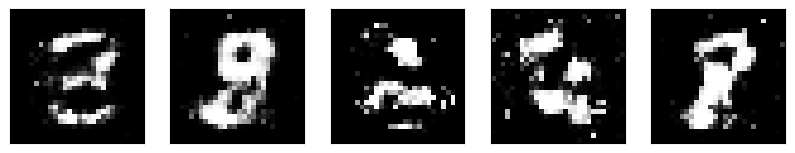

 Epoch: 141 batch: 1 D_loss: 1.281 G_loss: 1.219 
 Epoch: 141 batch: 2 D_loss: 1.240 G_loss: 1.113 
 Epoch: 141 batch: 3 D_loss: 1.239 G_loss: 1.065 
 Epoch: 141 batch: 4 D_loss: 1.255 G_loss: 1.069 
 Epoch: 141 batch: 5 D_loss: 1.260 G_loss: 1.195 
 Epoch: 141 batch: 6 D_loss: 1.296 G_loss: 1.165 
 Epoch: 141 batch: 7 D_loss: 1.206 G_loss: 1.144 
 Epoch: 141 batch: 8 D_loss: 1.274 G_loss: 1.133 
 Epoch: 141 batch: 9 D_loss: 1.292 G_loss: 1.079 
 Epoch: 141 batch: 10 D_loss: 1.247 G_loss: 1.017 
 Epoch: 141 batch: 11 D_loss: 1.289 G_loss: 1.117 
 Epoch: 141 batch: 12 D_loss: 1.247 G_loss: 1.185 
 Epoch: 141 batch: 13 D_loss: 1.170 G_loss: 1.150 
 Epoch: 141 batch: 14 D_loss: 1.229 G_loss: 1.222 
 Epoch: 141 batch: 15 D_loss: 1.230 G_loss: 1.259 
 Epoch: 141 batch: 16 D_loss: 1.177 G_loss: 1.281 
 Epoch: 141 batch: 17 D_loss: 1.139 G_loss: 1.237 
 Epoch: 141 batch: 18 D_loss: 1.241 G_loss: 1.246 
 Epoch: 141 batch: 19 D_loss: 1.236 G_loss: 1.295 
 Epoch: 141 batch: 20 D_loss: 1.240 G_lo

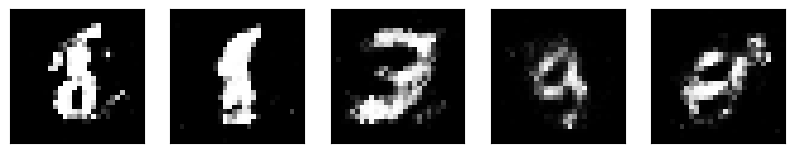

 Epoch: 142 batch: 1 D_loss: 1.273 G_loss: 1.114 
 Epoch: 142 batch: 2 D_loss: 1.222 G_loss: 1.194 
 Epoch: 142 batch: 3 D_loss: 1.224 G_loss: 1.231 
 Epoch: 142 batch: 4 D_loss: 1.205 G_loss: 1.175 
 Epoch: 142 batch: 5 D_loss: 1.292 G_loss: 1.071 
 Epoch: 142 batch: 6 D_loss: 1.274 G_loss: 1.068 
 Epoch: 142 batch: 7 D_loss: 1.249 G_loss: 1.060 
 Epoch: 142 batch: 8 D_loss: 1.333 G_loss: 1.058 
 Epoch: 142 batch: 9 D_loss: 1.300 G_loss: 1.063 
 Epoch: 142 batch: 10 D_loss: 1.266 G_loss: 1.099 
 Epoch: 142 batch: 11 D_loss: 1.324 G_loss: 1.180 
 Epoch: 142 batch: 12 D_loss: 1.216 G_loss: 1.077 
 Epoch: 142 batch: 13 D_loss: 1.234 G_loss: 1.196 
 Epoch: 142 batch: 14 D_loss: 1.203 G_loss: 1.048 
 Epoch: 142 batch: 15 D_loss: 1.229 G_loss: 1.054 
 Epoch: 142 batch: 16 D_loss: 1.219 G_loss: 1.203 
 Epoch: 142 batch: 17 D_loss: 1.298 G_loss: 1.160 
 Epoch: 142 batch: 18 D_loss: 1.244 G_loss: 1.199 
 Epoch: 142 batch: 19 D_loss: 1.277 G_loss: 1.136 
 Epoch: 142 batch: 20 D_loss: 1.249 G_lo

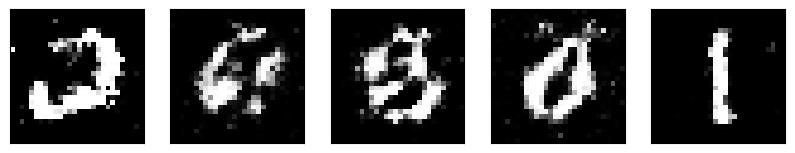

 Epoch: 143 batch: 1 D_loss: 1.263 G_loss: 1.095 
 Epoch: 143 batch: 2 D_loss: 1.265 G_loss: 1.055 
 Epoch: 143 batch: 3 D_loss: 1.199 G_loss: 1.046 
 Epoch: 143 batch: 4 D_loss: 1.241 G_loss: 1.032 
 Epoch: 143 batch: 5 D_loss: 1.337 G_loss: 1.055 
 Epoch: 143 batch: 6 D_loss: 1.286 G_loss: 1.067 
 Epoch: 143 batch: 7 D_loss: 1.241 G_loss: 1.024 
 Epoch: 143 batch: 8 D_loss: 1.329 G_loss: 1.063 
 Epoch: 143 batch: 9 D_loss: 1.338 G_loss: 1.016 
 Epoch: 143 batch: 10 D_loss: 1.211 G_loss: 0.974 
 Epoch: 143 batch: 11 D_loss: 1.274 G_loss: 0.954 
 Epoch: 143 batch: 12 D_loss: 1.268 G_loss: 0.895 
 Epoch: 143 batch: 13 D_loss: 1.259 G_loss: 0.953 
 Epoch: 143 batch: 14 D_loss: 1.209 G_loss: 0.996 
 Epoch: 143 batch: 15 D_loss: 1.247 G_loss: 1.062 
 Epoch: 143 batch: 16 D_loss: 1.255 G_loss: 1.025 
 Epoch: 143 batch: 17 D_loss: 1.279 G_loss: 1.048 
 Epoch: 143 batch: 18 D_loss: 1.243 G_loss: 1.105 
 Epoch: 143 batch: 19 D_loss: 1.251 G_loss: 1.036 
 Epoch: 143 batch: 20 D_loss: 1.273 G_lo

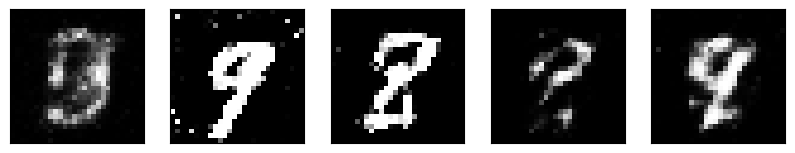

 Epoch: 144 batch: 1 D_loss: 1.305 G_loss: 0.960 
 Epoch: 144 batch: 2 D_loss: 1.270 G_loss: 0.959 
 Epoch: 144 batch: 3 D_loss: 1.254 G_loss: 0.943 
 Epoch: 144 batch: 4 D_loss: 1.259 G_loss: 0.944 
 Epoch: 144 batch: 5 D_loss: 1.335 G_loss: 0.976 
 Epoch: 144 batch: 6 D_loss: 1.336 G_loss: 0.978 
 Epoch: 144 batch: 7 D_loss: 1.274 G_loss: 1.004 
 Epoch: 144 batch: 8 D_loss: 1.321 G_loss: 1.027 
 Epoch: 144 batch: 9 D_loss: 1.358 G_loss: 0.966 
 Epoch: 144 batch: 10 D_loss: 1.244 G_loss: 0.906 
 Epoch: 144 batch: 11 D_loss: 1.299 G_loss: 0.938 
 Epoch: 144 batch: 12 D_loss: 1.297 G_loss: 0.956 
 Epoch: 144 batch: 13 D_loss: 1.284 G_loss: 1.024 
 Epoch: 144 batch: 14 D_loss: 1.273 G_loss: 1.011 
 Epoch: 144 batch: 15 D_loss: 1.275 G_loss: 1.116 
 Epoch: 144 batch: 16 D_loss: 1.270 G_loss: 1.019 
 Epoch: 144 batch: 17 D_loss: 1.256 G_loss: 1.063 
 Epoch: 144 batch: 18 D_loss: 1.283 G_loss: 1.088 
 Epoch: 144 batch: 19 D_loss: 1.286 G_loss: 1.100 
 Epoch: 144 batch: 20 D_loss: 1.265 G_lo

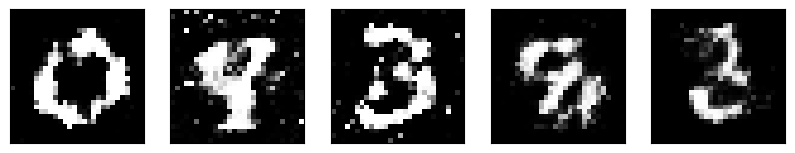

 Epoch: 145 batch: 1 D_loss: 1.272 G_loss: 1.212 
 Epoch: 145 batch: 2 D_loss: 1.204 G_loss: 1.244 
 Epoch: 145 batch: 3 D_loss: 1.184 G_loss: 1.319 
 Epoch: 145 batch: 4 D_loss: 1.205 G_loss: 1.205 
 Epoch: 145 batch: 5 D_loss: 1.321 G_loss: 1.175 
 Epoch: 145 batch: 6 D_loss: 1.294 G_loss: 1.146 
 Epoch: 145 batch: 7 D_loss: 1.304 G_loss: 1.069 
 Epoch: 145 batch: 8 D_loss: 1.302 G_loss: 1.080 
 Epoch: 145 batch: 9 D_loss: 1.288 G_loss: 0.990 
 Epoch: 145 batch: 10 D_loss: 1.228 G_loss: 0.968 
 Epoch: 145 batch: 11 D_loss: 1.304 G_loss: 0.951 
 Epoch: 145 batch: 12 D_loss: 1.264 G_loss: 0.983 
 Epoch: 145 batch: 13 D_loss: 1.230 G_loss: 0.959 
 Epoch: 145 batch: 14 D_loss: 1.251 G_loss: 0.975 
 Epoch: 145 batch: 15 D_loss: 1.208 G_loss: 0.984 
 Epoch: 145 batch: 16 D_loss: 1.251 G_loss: 0.956 
 Epoch: 145 batch: 17 D_loss: 1.212 G_loss: 0.982 
 Epoch: 145 batch: 18 D_loss: 1.289 G_loss: 0.974 
 Epoch: 145 batch: 19 D_loss: 1.276 G_loss: 1.034 
 Epoch: 145 batch: 20 D_loss: 1.290 G_lo

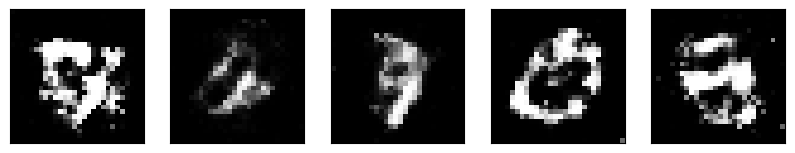

 Epoch: 146 batch: 1 D_loss: 1.230 G_loss: 1.071 
 Epoch: 146 batch: 2 D_loss: 1.233 G_loss: 1.167 
 Epoch: 146 batch: 3 D_loss: 1.210 G_loss: 1.267 
 Epoch: 146 batch: 4 D_loss: 1.152 G_loss: 1.380 
 Epoch: 146 batch: 5 D_loss: 1.210 G_loss: 1.430 
 Epoch: 146 batch: 6 D_loss: 1.278 G_loss: 1.381 
 Epoch: 146 batch: 7 D_loss: 1.250 G_loss: 1.260 
 Epoch: 146 batch: 8 D_loss: 1.296 G_loss: 1.131 
 Epoch: 146 batch: 9 D_loss: 1.257 G_loss: 1.109 
 Epoch: 146 batch: 10 D_loss: 1.260 G_loss: 1.025 
 Epoch: 146 batch: 11 D_loss: 1.278 G_loss: 0.987 
 Epoch: 146 batch: 12 D_loss: 1.251 G_loss: 0.980 
 Epoch: 146 batch: 13 D_loss: 1.261 G_loss: 0.999 
 Epoch: 146 batch: 14 D_loss: 1.228 G_loss: 1.027 
 Epoch: 146 batch: 15 D_loss: 1.295 G_loss: 1.009 
 Epoch: 146 batch: 16 D_loss: 1.277 G_loss: 1.013 
 Epoch: 146 batch: 17 D_loss: 1.254 G_loss: 1.003 
 Epoch: 146 batch: 18 D_loss: 1.233 G_loss: 0.976 
 Epoch: 146 batch: 19 D_loss: 1.312 G_loss: 0.988 
 Epoch: 146 batch: 20 D_loss: 1.287 G_lo

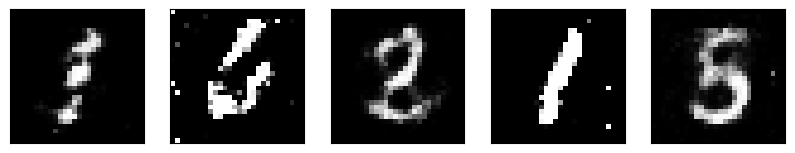

 Epoch: 147 batch: 1 D_loss: 1.322 G_loss: 1.246 
 Epoch: 147 batch: 2 D_loss: 1.285 G_loss: 1.117 
 Epoch: 147 batch: 3 D_loss: 1.298 G_loss: 1.069 
 Epoch: 147 batch: 4 D_loss: 1.282 G_loss: 1.025 
 Epoch: 147 batch: 5 D_loss: 1.253 G_loss: 1.045 
 Epoch: 147 batch: 6 D_loss: 1.268 G_loss: 1.012 
 Epoch: 147 batch: 7 D_loss: 1.274 G_loss: 1.025 
 Epoch: 147 batch: 8 D_loss: 1.274 G_loss: 0.987 
 Epoch: 147 batch: 9 D_loss: 1.395 G_loss: 1.033 
 Epoch: 147 batch: 10 D_loss: 1.255 G_loss: 0.938 
 Epoch: 147 batch: 11 D_loss: 1.270 G_loss: 0.916 
 Epoch: 147 batch: 12 D_loss: 1.274 G_loss: 0.958 
 Epoch: 147 batch: 13 D_loss: 1.264 G_loss: 0.955 
 Epoch: 147 batch: 14 D_loss: 1.247 G_loss: 0.931 
 Epoch: 147 batch: 15 D_loss: 1.313 G_loss: 1.014 
 Epoch: 147 batch: 16 D_loss: 1.275 G_loss: 1.006 
 Epoch: 147 batch: 17 D_loss: 1.299 G_loss: 1.122 
 Epoch: 147 batch: 18 D_loss: 1.244 G_loss: 1.095 
 Epoch: 147 batch: 19 D_loss: 1.234 G_loss: 1.122 
 Epoch: 147 batch: 20 D_loss: 1.272 G_lo

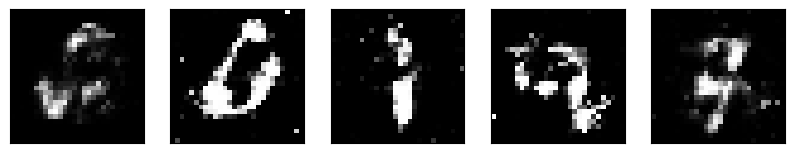

 Epoch: 148 batch: 1 D_loss: 1.211 G_loss: 1.329 
 Epoch: 148 batch: 2 D_loss: 1.230 G_loss: 1.551 
 Epoch: 148 batch: 3 D_loss: 1.227 G_loss: 1.435 
 Epoch: 148 batch: 4 D_loss: 1.220 G_loss: 1.245 
 Epoch: 148 batch: 5 D_loss: 1.304 G_loss: 1.193 
 Epoch: 148 batch: 6 D_loss: 1.206 G_loss: 1.123 
 Epoch: 148 batch: 7 D_loss: 1.260 G_loss: 1.152 
 Epoch: 148 batch: 8 D_loss: 1.310 G_loss: 1.071 
 Epoch: 148 batch: 9 D_loss: 1.316 G_loss: 1.036 
 Epoch: 148 batch: 10 D_loss: 1.250 G_loss: 1.047 
 Epoch: 148 batch: 11 D_loss: 1.320 G_loss: 0.989 
 Epoch: 148 batch: 12 D_loss: 1.257 G_loss: 1.048 
 Epoch: 148 batch: 13 D_loss: 1.252 G_loss: 1.016 
 Epoch: 148 batch: 14 D_loss: 1.290 G_loss: 0.953 
 Epoch: 148 batch: 15 D_loss: 1.299 G_loss: 0.915 
 Epoch: 148 batch: 16 D_loss: 1.315 G_loss: 0.898 
 Epoch: 148 batch: 17 D_loss: 1.270 G_loss: 0.923 
 Epoch: 148 batch: 18 D_loss: 1.289 G_loss: 0.954 
 Epoch: 148 batch: 19 D_loss: 1.266 G_loss: 0.971 
 Epoch: 148 batch: 20 D_loss: 1.285 G_lo

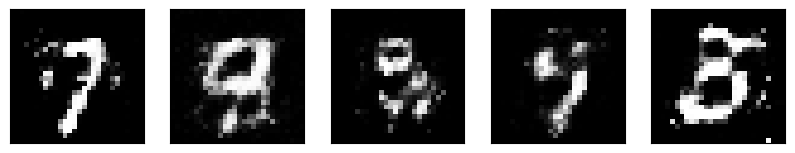

 Epoch: 149 batch: 1 D_loss: 1.287 G_loss: 1.122 
 Epoch: 149 batch: 2 D_loss: 1.238 G_loss: 1.078 
 Epoch: 149 batch: 3 D_loss: 1.250 G_loss: 1.014 
 Epoch: 149 batch: 4 D_loss: 1.275 G_loss: 0.943 
 Epoch: 149 batch: 5 D_loss: 1.294 G_loss: 0.924 
 Epoch: 149 batch: 6 D_loss: 1.322 G_loss: 0.943 
 Epoch: 149 batch: 7 D_loss: 1.249 G_loss: 0.996 
 Epoch: 149 batch: 8 D_loss: 1.332 G_loss: 1.012 
 Epoch: 149 batch: 9 D_loss: 1.333 G_loss: 1.046 
 Epoch: 149 batch: 10 D_loss: 1.245 G_loss: 1.023 
 Epoch: 149 batch: 11 D_loss: 1.338 G_loss: 1.053 
 Epoch: 149 batch: 12 D_loss: 1.280 G_loss: 0.953 
 Epoch: 149 batch: 13 D_loss: 1.290 G_loss: 0.966 
 Epoch: 149 batch: 14 D_loss: 1.289 G_loss: 0.916 
 Epoch: 149 batch: 15 D_loss: 1.323 G_loss: 0.963 
 Epoch: 149 batch: 16 D_loss: 1.300 G_loss: 0.960 
 Epoch: 149 batch: 17 D_loss: 1.295 G_loss: 0.925 
 Epoch: 149 batch: 18 D_loss: 1.297 G_loss: 0.989 
 Epoch: 149 batch: 19 D_loss: 1.296 G_loss: 0.966 
 Epoch: 149 batch: 20 D_loss: 1.302 G_lo

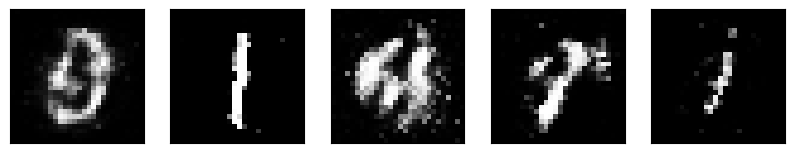

 Epoch: 150 batch: 1 D_loss: 1.210 G_loss: 1.019 
 Epoch: 150 batch: 2 D_loss: 1.253 G_loss: 1.054 
 Epoch: 150 batch: 3 D_loss: 1.242 G_loss: 1.000 
 Epoch: 150 batch: 4 D_loss: 1.245 G_loss: 1.028 
 Epoch: 150 batch: 5 D_loss: 1.276 G_loss: 0.986 
 Epoch: 150 batch: 6 D_loss: 1.320 G_loss: 1.011 
 Epoch: 150 batch: 7 D_loss: 1.244 G_loss: 1.047 
 Epoch: 150 batch: 8 D_loss: 1.324 G_loss: 1.003 
 Epoch: 150 batch: 9 D_loss: 1.277 G_loss: 0.998 
 Epoch: 150 batch: 10 D_loss: 1.227 G_loss: 1.004 
 Epoch: 150 batch: 11 D_loss: 1.290 G_loss: 1.053 
 Epoch: 150 batch: 12 D_loss: 1.263 G_loss: 1.049 
 Epoch: 150 batch: 13 D_loss: 1.249 G_loss: 1.109 
 Epoch: 150 batch: 14 D_loss: 1.195 G_loss: 1.092 
 Epoch: 150 batch: 15 D_loss: 1.270 G_loss: 1.092 
 Epoch: 150 batch: 16 D_loss: 1.204 G_loss: 1.096 
 Epoch: 150 batch: 17 D_loss: 1.244 G_loss: 1.280 
 Epoch: 150 batch: 18 D_loss: 1.222 G_loss: 1.217 
 Epoch: 150 batch: 19 D_loss: 1.242 G_loss: 1.147 
 Epoch: 150 batch: 20 D_loss: 1.279 G_lo

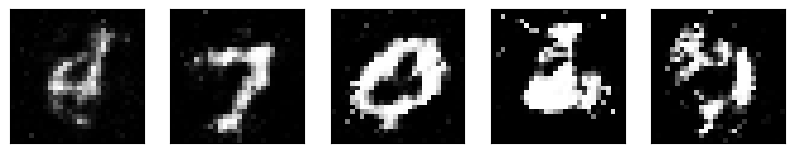

 Epoch: 151 batch: 1 D_loss: 1.260 G_loss: 0.955 
 Epoch: 151 batch: 2 D_loss: 1.249 G_loss: 0.961 
 Epoch: 151 batch: 3 D_loss: 1.305 G_loss: 0.957 
 Epoch: 151 batch: 4 D_loss: 1.285 G_loss: 0.915 
 Epoch: 151 batch: 5 D_loss: 1.277 G_loss: 1.005 
 Epoch: 151 batch: 6 D_loss: 1.269 G_loss: 1.004 
 Epoch: 151 batch: 7 D_loss: 1.270 G_loss: 1.107 
 Epoch: 151 batch: 8 D_loss: 1.260 G_loss: 1.082 
 Epoch: 151 batch: 9 D_loss: 1.299 G_loss: 1.122 
 Epoch: 151 batch: 10 D_loss: 1.208 G_loss: 1.011 
 Epoch: 151 batch: 11 D_loss: 1.252 G_loss: 1.058 
 Epoch: 151 batch: 12 D_loss: 1.251 G_loss: 1.056 
 Epoch: 151 batch: 13 D_loss: 1.211 G_loss: 1.119 
 Epoch: 151 batch: 14 D_loss: 1.188 G_loss: 1.067 
 Epoch: 151 batch: 15 D_loss: 1.212 G_loss: 1.150 
 Epoch: 151 batch: 16 D_loss: 1.240 G_loss: 1.357 
 Epoch: 151 batch: 17 D_loss: 1.254 G_loss: 1.350 
 Epoch: 151 batch: 18 D_loss: 1.279 G_loss: 1.313 
 Epoch: 151 batch: 19 D_loss: 1.190 G_loss: 1.467 
 Epoch: 151 batch: 20 D_loss: 1.350 G_lo

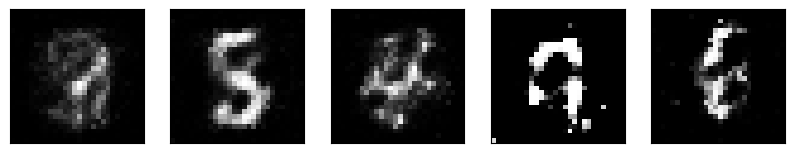

 Epoch: 152 batch: 1 D_loss: 1.303 G_loss: 1.145 
 Epoch: 152 batch: 2 D_loss: 1.324 G_loss: 1.237 
 Epoch: 152 batch: 3 D_loss: 1.281 G_loss: 1.215 
 Epoch: 152 batch: 4 D_loss: 1.235 G_loss: 1.217 
 Epoch: 152 batch: 5 D_loss: 1.324 G_loss: 1.048 
 Epoch: 152 batch: 6 D_loss: 1.312 G_loss: 1.084 
 Epoch: 152 batch: 7 D_loss: 1.302 G_loss: 1.126 
 Epoch: 152 batch: 8 D_loss: 1.313 G_loss: 1.142 
 Epoch: 152 batch: 9 D_loss: 1.378 G_loss: 1.127 
 Epoch: 152 batch: 10 D_loss: 1.276 G_loss: 1.092 
 Epoch: 152 batch: 11 D_loss: 1.348 G_loss: 1.096 
 Epoch: 152 batch: 12 D_loss: 1.284 G_loss: 1.064 
 Epoch: 152 batch: 13 D_loss: 1.339 G_loss: 0.943 
 Epoch: 152 batch: 14 D_loss: 1.355 G_loss: 0.903 
 Epoch: 152 batch: 15 D_loss: 1.338 G_loss: 0.949 
 Epoch: 152 batch: 16 D_loss: 1.325 G_loss: 0.967 
 Epoch: 152 batch: 17 D_loss: 1.325 G_loss: 0.992 
 Epoch: 152 batch: 18 D_loss: 1.330 G_loss: 0.986 
 Epoch: 152 batch: 19 D_loss: 1.348 G_loss: 0.933 
 Epoch: 152 batch: 20 D_loss: 1.330 G_lo

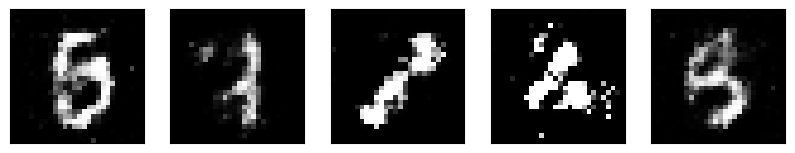

 Epoch: 153 batch: 1 D_loss: 1.218 G_loss: 1.156 
 Epoch: 153 batch: 2 D_loss: 1.210 G_loss: 1.219 
 Epoch: 153 batch: 3 D_loss: 1.177 G_loss: 1.236 
 Epoch: 153 batch: 4 D_loss: 1.135 G_loss: 1.292 
 Epoch: 153 batch: 5 D_loss: 1.331 G_loss: 1.204 
 Epoch: 153 batch: 6 D_loss: 1.259 G_loss: 1.211 
 Epoch: 153 batch: 7 D_loss: 1.253 G_loss: 1.116 
 Epoch: 153 batch: 8 D_loss: 1.352 G_loss: 1.105 
 Epoch: 153 batch: 9 D_loss: 1.332 G_loss: 1.077 
 Epoch: 153 batch: 10 D_loss: 1.261 G_loss: 0.992 
 Epoch: 153 batch: 11 D_loss: 1.337 G_loss: 1.008 
 Epoch: 153 batch: 12 D_loss: 1.253 G_loss: 1.042 
 Epoch: 153 batch: 13 D_loss: 1.266 G_loss: 1.000 
 Epoch: 153 batch: 14 D_loss: 1.285 G_loss: 0.949 
 Epoch: 153 batch: 15 D_loss: 1.278 G_loss: 0.946 
 Epoch: 153 batch: 16 D_loss: 1.301 G_loss: 0.897 
 Epoch: 153 batch: 17 D_loss: 1.314 G_loss: 0.897 
 Epoch: 153 batch: 18 D_loss: 1.281 G_loss: 0.919 
 Epoch: 153 batch: 19 D_loss: 1.310 G_loss: 0.955 
 Epoch: 153 batch: 20 D_loss: 1.331 G_lo

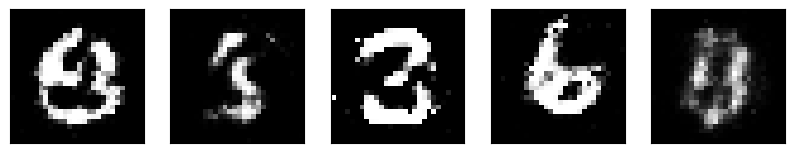

 Epoch: 154 batch: 1 D_loss: 1.281 G_loss: 1.017 
 Epoch: 154 batch: 2 D_loss: 1.236 G_loss: 1.033 
 Epoch: 154 batch: 3 D_loss: 1.231 G_loss: 1.084 
 Epoch: 154 batch: 4 D_loss: 1.230 G_loss: 1.105 
 Epoch: 154 batch: 5 D_loss: 1.314 G_loss: 1.174 
 Epoch: 154 batch: 6 D_loss: 1.287 G_loss: 1.210 
 Epoch: 154 batch: 7 D_loss: 1.256 G_loss: 1.047 
 Epoch: 154 batch: 8 D_loss: 1.287 G_loss: 1.078 
 Epoch: 154 batch: 9 D_loss: 1.318 G_loss: 1.109 
 Epoch: 154 batch: 10 D_loss: 1.275 G_loss: 1.033 
 Epoch: 154 batch: 11 D_loss: 1.241 G_loss: 1.033 
 Epoch: 154 batch: 12 D_loss: 1.251 G_loss: 1.068 
 Epoch: 154 batch: 13 D_loss: 1.241 G_loss: 1.070 
 Epoch: 154 batch: 14 D_loss: 1.229 G_loss: 1.141 
 Epoch: 154 batch: 15 D_loss: 1.281 G_loss: 1.100 
 Epoch: 154 batch: 16 D_loss: 1.280 G_loss: 1.246 
 Epoch: 154 batch: 17 D_loss: 1.279 G_loss: 1.218 
 Epoch: 154 batch: 18 D_loss: 1.233 G_loss: 1.208 
 Epoch: 154 batch: 19 D_loss: 1.306 G_loss: 1.097 
 Epoch: 154 batch: 20 D_loss: 1.247 G_lo

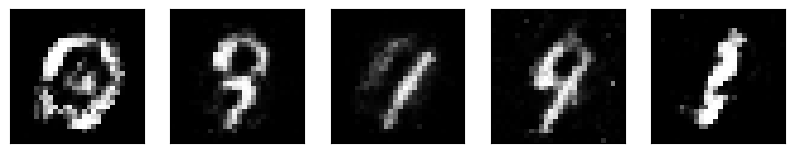

 Epoch: 155 batch: 1 D_loss: 1.284 G_loss: 1.246 
 Epoch: 155 batch: 2 D_loss: 1.288 G_loss: 1.092 
 Epoch: 155 batch: 3 D_loss: 1.234 G_loss: 0.996 
 Epoch: 155 batch: 4 D_loss: 1.265 G_loss: 0.927 
 Epoch: 155 batch: 5 D_loss: 1.337 G_loss: 0.970 
 Epoch: 155 batch: 6 D_loss: 1.312 G_loss: 0.978 
 Epoch: 155 batch: 7 D_loss: 1.302 G_loss: 1.132 
 Epoch: 155 batch: 8 D_loss: 1.341 G_loss: 1.088 
 Epoch: 155 batch: 9 D_loss: 1.372 G_loss: 1.127 
 Epoch: 155 batch: 10 D_loss: 1.225 G_loss: 1.126 
 Epoch: 155 batch: 11 D_loss: 1.305 G_loss: 1.079 
 Epoch: 155 batch: 12 D_loss: 1.249 G_loss: 0.927 
 Epoch: 155 batch: 13 D_loss: 1.275 G_loss: 0.905 
 Epoch: 155 batch: 14 D_loss: 1.230 G_loss: 0.916 
 Epoch: 155 batch: 15 D_loss: 1.268 G_loss: 0.919 
 Epoch: 155 batch: 16 D_loss: 1.256 G_loss: 0.974 
 Epoch: 155 batch: 17 D_loss: 1.218 G_loss: 0.990 
 Epoch: 155 batch: 18 D_loss: 1.173 G_loss: 1.095 
 Epoch: 155 batch: 19 D_loss: 1.285 G_loss: 1.098 
 Epoch: 155 batch: 20 D_loss: 1.220 G_lo

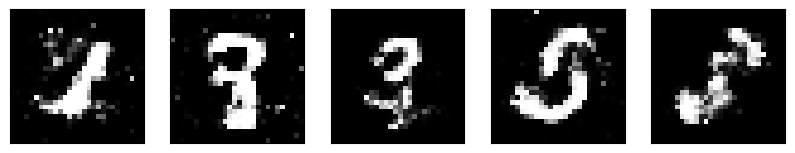

 Epoch: 156 batch: 1 D_loss: 1.245 G_loss: 1.191 
 Epoch: 156 batch: 2 D_loss: 1.204 G_loss: 1.151 
 Epoch: 156 batch: 3 D_loss: 1.233 G_loss: 1.138 
 Epoch: 156 batch: 4 D_loss: 1.205 G_loss: 1.214 
 Epoch: 156 batch: 5 D_loss: 1.224 G_loss: 1.108 
 Epoch: 156 batch: 6 D_loss: 1.264 G_loss: 1.227 
 Epoch: 156 batch: 7 D_loss: 1.228 G_loss: 1.059 
 Epoch: 156 batch: 8 D_loss: 1.290 G_loss: 1.156 
 Epoch: 156 batch: 9 D_loss: 1.301 G_loss: 1.112 
 Epoch: 156 batch: 10 D_loss: 1.234 G_loss: 1.149 
 Epoch: 156 batch: 11 D_loss: 1.271 G_loss: 1.174 
 Epoch: 156 batch: 12 D_loss: 1.209 G_loss: 1.118 
 Epoch: 156 batch: 13 D_loss: 1.235 G_loss: 1.103 
 Epoch: 156 batch: 14 D_loss: 1.193 G_loss: 1.096 
 Epoch: 156 batch: 15 D_loss: 1.298 G_loss: 1.085 
 Epoch: 156 batch: 16 D_loss: 1.224 G_loss: 1.017 
 Epoch: 156 batch: 17 D_loss: 1.193 G_loss: 0.947 
 Epoch: 156 batch: 18 D_loss: 1.237 G_loss: 0.964 
 Epoch: 156 batch: 19 D_loss: 1.264 G_loss: 1.013 
 Epoch: 156 batch: 20 D_loss: 1.217 G_lo

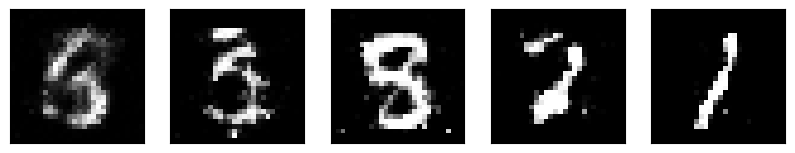

 Epoch: 157 batch: 1 D_loss: 1.142 G_loss: 1.723 
 Epoch: 157 batch: 2 D_loss: 1.260 G_loss: 1.743 
 Epoch: 157 batch: 3 D_loss: 1.136 G_loss: 1.884 
 Epoch: 157 batch: 4 D_loss: 1.147 G_loss: 1.781 
 Epoch: 157 batch: 5 D_loss: 1.188 G_loss: 1.694 
 Epoch: 157 batch: 6 D_loss: 1.257 G_loss: 1.558 
 Epoch: 157 batch: 7 D_loss: 1.198 G_loss: 1.629 
 Epoch: 157 batch: 8 D_loss: 1.269 G_loss: 1.593 
 Epoch: 157 batch: 9 D_loss: 1.356 G_loss: 1.400 
 Epoch: 157 batch: 10 D_loss: 1.264 G_loss: 1.225 
 Epoch: 157 batch: 11 D_loss: 1.296 G_loss: 1.172 
 Epoch: 157 batch: 12 D_loss: 1.254 G_loss: 1.262 
 Epoch: 157 batch: 13 D_loss: 1.278 G_loss: 1.211 
 Epoch: 157 batch: 14 D_loss: 1.236 G_loss: 1.298 
 Epoch: 157 batch: 15 D_loss: 1.372 G_loss: 1.304 
 Epoch: 157 batch: 16 D_loss: 1.305 G_loss: 1.107 
 Epoch: 157 batch: 17 D_loss: 1.284 G_loss: 1.057 
 Epoch: 157 batch: 18 D_loss: 1.289 G_loss: 1.050 
 Epoch: 157 batch: 19 D_loss: 1.260 G_loss: 1.049 
 Epoch: 157 batch: 20 D_loss: 1.247 G_lo

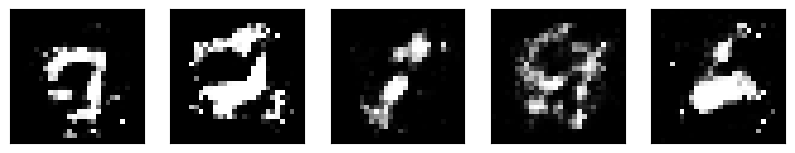

 Epoch: 158 batch: 1 D_loss: 1.246 G_loss: 1.360 
 Epoch: 158 batch: 2 D_loss: 1.223 G_loss: 1.475 
 Epoch: 158 batch: 3 D_loss: 1.198 G_loss: 1.451 
 Epoch: 158 batch: 4 D_loss: 1.190 G_loss: 1.490 
 Epoch: 158 batch: 5 D_loss: 1.229 G_loss: 1.317 
 Epoch: 158 batch: 6 D_loss: 1.250 G_loss: 1.317 
 Epoch: 158 batch: 7 D_loss: 1.150 G_loss: 1.199 
 Epoch: 158 batch: 8 D_loss: 1.301 G_loss: 1.204 
 Epoch: 158 batch: 9 D_loss: 1.297 G_loss: 1.214 
 Epoch: 158 batch: 10 D_loss: 1.201 G_loss: 1.270 
 Epoch: 158 batch: 11 D_loss: 1.290 G_loss: 1.153 
 Epoch: 158 batch: 12 D_loss: 1.179 G_loss: 1.110 
 Epoch: 158 batch: 13 D_loss: 1.218 G_loss: 1.094 
 Epoch: 158 batch: 14 D_loss: 1.243 G_loss: 1.044 
 Epoch: 158 batch: 15 D_loss: 1.269 G_loss: 1.003 
 Epoch: 158 batch: 16 D_loss: 1.235 G_loss: 1.083 
 Epoch: 158 batch: 17 D_loss: 1.189 G_loss: 1.012 
 Epoch: 158 batch: 18 D_loss: 1.163 G_loss: 1.127 
 Epoch: 158 batch: 19 D_loss: 1.246 G_loss: 1.245 
 Epoch: 158 batch: 20 D_loss: 1.209 G_lo

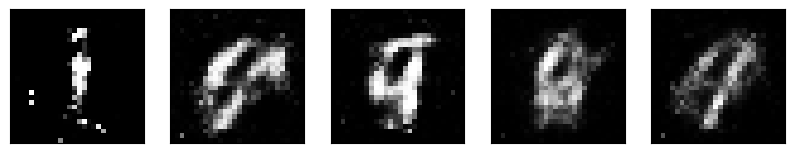

 Epoch: 159 batch: 1 D_loss: 1.226 G_loss: 1.231 
 Epoch: 159 batch: 2 D_loss: 1.186 G_loss: 1.055 
 Epoch: 159 batch: 3 D_loss: 1.233 G_loss: 1.162 
 Epoch: 159 batch: 4 D_loss: 1.191 G_loss: 1.221 
 Epoch: 159 batch: 5 D_loss: 1.207 G_loss: 1.320 
 Epoch: 159 batch: 6 D_loss: 1.167 G_loss: 1.537 
 Epoch: 159 batch: 7 D_loss: 1.180 G_loss: 1.535 
 Epoch: 159 batch: 8 D_loss: 1.301 G_loss: 1.657 
 Epoch: 159 batch: 9 D_loss: 1.295 G_loss: 1.401 
 Epoch: 159 batch: 10 D_loss: 1.169 G_loss: 1.227 
 Epoch: 159 batch: 11 D_loss: 1.289 G_loss: 1.003 
 Epoch: 159 batch: 12 D_loss: 1.302 G_loss: 0.963 
 Epoch: 159 batch: 13 D_loss: 1.307 G_loss: 0.902 
 Epoch: 159 batch: 14 D_loss: 1.228 G_loss: 0.929 
 Epoch: 159 batch: 15 D_loss: 1.292 G_loss: 0.972 
 Epoch: 159 batch: 16 D_loss: 1.287 G_loss: 1.006 
 Epoch: 159 batch: 17 D_loss: 1.217 G_loss: 1.057 
 Epoch: 159 batch: 18 D_loss: 1.214 G_loss: 1.021 
 Epoch: 159 batch: 19 D_loss: 1.231 G_loss: 0.995 
 Epoch: 159 batch: 20 D_loss: 1.222 G_lo

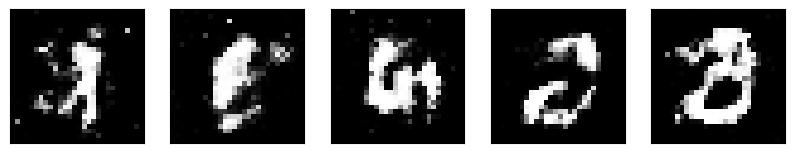

 Epoch: 160 batch: 1 D_loss: 1.242 G_loss: 1.252 
 Epoch: 160 batch: 2 D_loss: 1.176 G_loss: 1.253 
 Epoch: 160 batch: 3 D_loss: 1.272 G_loss: 1.302 
 Epoch: 160 batch: 4 D_loss: 1.232 G_loss: 1.355 
 Epoch: 160 batch: 5 D_loss: 1.266 G_loss: 1.229 
 Epoch: 160 batch: 6 D_loss: 1.276 G_loss: 1.283 
 Epoch: 160 batch: 7 D_loss: 1.258 G_loss: 1.234 
 Epoch: 160 batch: 8 D_loss: 1.295 G_loss: 1.233 
 Epoch: 160 batch: 9 D_loss: 1.292 G_loss: 1.164 
 Epoch: 160 batch: 10 D_loss: 1.290 G_loss: 1.110 
 Epoch: 160 batch: 11 D_loss: 1.290 G_loss: 1.216 
 Epoch: 160 batch: 12 D_loss: 1.270 G_loss: 1.107 
 Epoch: 160 batch: 13 D_loss: 1.288 G_loss: 0.973 
 Epoch: 160 batch: 14 D_loss: 1.303 G_loss: 0.968 
 Epoch: 160 batch: 15 D_loss: 1.329 G_loss: 0.881 
 Epoch: 160 batch: 16 D_loss: 1.302 G_loss: 0.928 
 Epoch: 160 batch: 17 D_loss: 1.296 G_loss: 0.890 
 Epoch: 160 batch: 18 D_loss: 1.321 G_loss: 0.950 
 Epoch: 160 batch: 19 D_loss: 1.287 G_loss: 0.993 
 Epoch: 160 batch: 20 D_loss: 1.308 G_lo

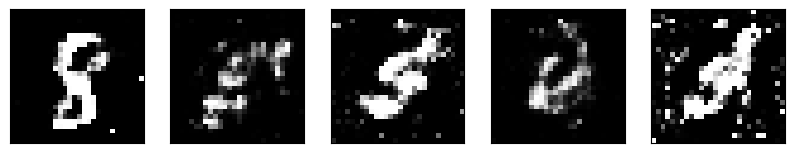

 Epoch: 161 batch: 1 D_loss: 1.263 G_loss: 1.004 
 Epoch: 161 batch: 2 D_loss: 1.248 G_loss: 0.884 
 Epoch: 161 batch: 3 D_loss: 1.259 G_loss: 0.875 
 Epoch: 161 batch: 4 D_loss: 1.227 G_loss: 0.943 
 Epoch: 161 batch: 5 D_loss: 1.223 G_loss: 0.969 
 Epoch: 161 batch: 6 D_loss: 1.247 G_loss: 1.055 
 Epoch: 161 batch: 7 D_loss: 1.198 G_loss: 1.110 
 Epoch: 161 batch: 8 D_loss: 1.245 G_loss: 1.150 
 Epoch: 161 batch: 9 D_loss: 1.252 G_loss: 1.261 
 Epoch: 161 batch: 10 D_loss: 1.192 G_loss: 1.385 
 Epoch: 161 batch: 11 D_loss: 1.242 G_loss: 1.392 
 Epoch: 161 batch: 12 D_loss: 1.201 G_loss: 1.401 
 Epoch: 161 batch: 13 D_loss: 1.256 G_loss: 1.319 
 Epoch: 161 batch: 14 D_loss: 1.292 G_loss: 1.240 
 Epoch: 161 batch: 15 D_loss: 1.259 G_loss: 1.242 
 Epoch: 161 batch: 16 D_loss: 1.257 G_loss: 1.252 
 Epoch: 161 batch: 17 D_loss: 1.284 G_loss: 1.152 
 Epoch: 161 batch: 18 D_loss: 1.258 G_loss: 1.109 
 Epoch: 161 batch: 19 D_loss: 1.270 G_loss: 1.041 
 Epoch: 161 batch: 20 D_loss: 1.323 G_lo

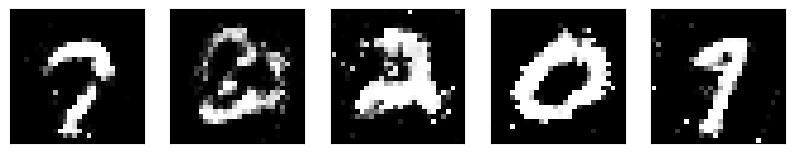

 Epoch: 162 batch: 1 D_loss: 1.231 G_loss: 1.149 
 Epoch: 162 batch: 2 D_loss: 1.319 G_loss: 1.355 
 Epoch: 162 batch: 3 D_loss: 1.284 G_loss: 1.133 
 Epoch: 162 batch: 4 D_loss: 1.244 G_loss: 1.148 
 Epoch: 162 batch: 5 D_loss: 1.283 G_loss: 1.023 
 Epoch: 162 batch: 6 D_loss: 1.304 G_loss: 1.040 
 Epoch: 162 batch: 7 D_loss: 1.287 G_loss: 1.005 
 Epoch: 162 batch: 8 D_loss: 1.281 G_loss: 0.981 
 Epoch: 162 batch: 9 D_loss: 1.320 G_loss: 0.933 
 Epoch: 162 batch: 10 D_loss: 1.230 G_loss: 0.966 
 Epoch: 162 batch: 11 D_loss: 1.283 G_loss: 0.958 
 Epoch: 162 batch: 12 D_loss: 1.235 G_loss: 1.005 
 Epoch: 162 batch: 13 D_loss: 1.242 G_loss: 1.043 
 Epoch: 162 batch: 14 D_loss: 1.242 G_loss: 1.145 
 Epoch: 162 batch: 15 D_loss: 1.309 G_loss: 1.270 
 Epoch: 162 batch: 16 D_loss: 1.289 G_loss: 1.410 
 Epoch: 162 batch: 17 D_loss: 1.277 G_loss: 1.226 
 Epoch: 162 batch: 18 D_loss: 1.244 G_loss: 1.263 
 Epoch: 162 batch: 19 D_loss: 1.454 G_loss: 1.029 
 Epoch: 162 batch: 20 D_loss: 1.295 G_lo

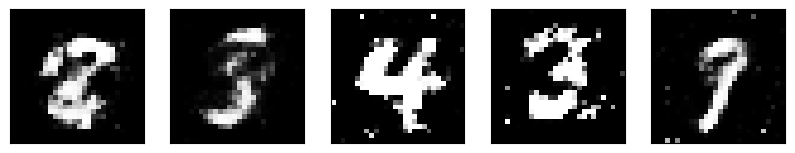

 Epoch: 163 batch: 1 D_loss: 1.319 G_loss: 1.181 
 Epoch: 163 batch: 2 D_loss: 1.309 G_loss: 1.046 
 Epoch: 163 batch: 3 D_loss: 1.286 G_loss: 0.991 
 Epoch: 163 batch: 4 D_loss: 1.240 G_loss: 0.915 
 Epoch: 163 batch: 5 D_loss: 1.302 G_loss: 0.946 
 Epoch: 163 batch: 6 D_loss: 1.308 G_loss: 0.991 
 Epoch: 163 batch: 7 D_loss: 1.312 G_loss: 0.987 
 Epoch: 163 batch: 8 D_loss: 1.329 G_loss: 0.977 
 Epoch: 163 batch: 9 D_loss: 1.338 G_loss: 0.942 
 Epoch: 163 batch: 10 D_loss: 1.293 G_loss: 0.932 
 Epoch: 163 batch: 11 D_loss: 1.287 G_loss: 0.901 
 Epoch: 163 batch: 12 D_loss: 1.298 G_loss: 0.917 
 Epoch: 163 batch: 13 D_loss: 1.278 G_loss: 0.963 
 Epoch: 163 batch: 14 D_loss: 1.255 G_loss: 0.998 
 Epoch: 163 batch: 15 D_loss: 1.298 G_loss: 1.012 
 Epoch: 163 batch: 16 D_loss: 1.302 G_loss: 1.029 
 Epoch: 163 batch: 17 D_loss: 1.244 G_loss: 1.023 
 Epoch: 163 batch: 18 D_loss: 1.221 G_loss: 1.122 
 Epoch: 163 batch: 19 D_loss: 1.242 G_loss: 1.059 
 Epoch: 163 batch: 20 D_loss: 1.203 G_lo

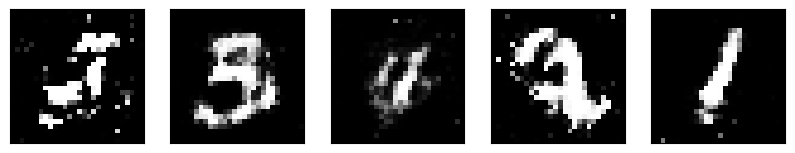

 Epoch: 164 batch: 1 D_loss: 1.300 G_loss: 0.956 
 Epoch: 164 batch: 2 D_loss: 1.306 G_loss: 0.934 
 Epoch: 164 batch: 3 D_loss: 1.253 G_loss: 0.948 
 Epoch: 164 batch: 4 D_loss: 1.250 G_loss: 1.017 
 Epoch: 164 batch: 5 D_loss: 1.348 G_loss: 1.000 
 Epoch: 164 batch: 6 D_loss: 1.320 G_loss: 0.983 
 Epoch: 164 batch: 7 D_loss: 1.250 G_loss: 0.971 
 Epoch: 164 batch: 8 D_loss: 1.296 G_loss: 0.936 
 Epoch: 164 batch: 9 D_loss: 1.280 G_loss: 0.908 
 Epoch: 164 batch: 10 D_loss: 1.260 G_loss: 0.927 
 Epoch: 164 batch: 11 D_loss: 1.242 G_loss: 0.930 
 Epoch: 164 batch: 12 D_loss: 1.280 G_loss: 0.991 
 Epoch: 164 batch: 13 D_loss: 1.228 G_loss: 1.007 
 Epoch: 164 batch: 14 D_loss: 1.223 G_loss: 1.102 
 Epoch: 164 batch: 15 D_loss: 1.241 G_loss: 1.057 
 Epoch: 164 batch: 16 D_loss: 1.205 G_loss: 1.087 
 Epoch: 164 batch: 17 D_loss: 1.192 G_loss: 1.099 
 Epoch: 164 batch: 18 D_loss: 1.188 G_loss: 1.189 
 Epoch: 164 batch: 19 D_loss: 1.173 G_loss: 1.292 
 Epoch: 164 batch: 20 D_loss: 1.180 G_lo

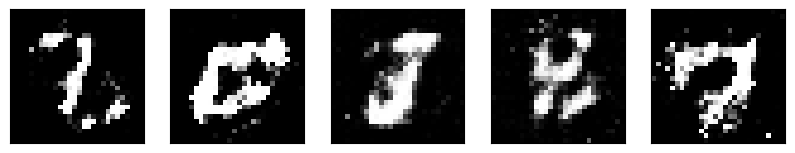

 Epoch: 165 batch: 1 D_loss: 1.285 G_loss: 1.022 
 Epoch: 165 batch: 2 D_loss: 1.179 G_loss: 1.037 
 Epoch: 165 batch: 3 D_loss: 1.184 G_loss: 1.008 
 Epoch: 165 batch: 4 D_loss: 1.171 G_loss: 1.009 
 Epoch: 165 batch: 5 D_loss: 1.242 G_loss: 1.004 
 Epoch: 165 batch: 6 D_loss: 1.258 G_loss: 0.955 
 Epoch: 165 batch: 7 D_loss: 1.179 G_loss: 0.998 
 Epoch: 165 batch: 8 D_loss: 1.199 G_loss: 1.012 
 Epoch: 165 batch: 9 D_loss: 1.223 G_loss: 0.985 
 Epoch: 165 batch: 10 D_loss: 1.194 G_loss: 0.997 
 Epoch: 165 batch: 11 D_loss: 1.194 G_loss: 1.002 
 Epoch: 165 batch: 12 D_loss: 1.189 G_loss: 1.069 
 Epoch: 165 batch: 13 D_loss: 1.123 G_loss: 1.223 
 Epoch: 165 batch: 14 D_loss: 1.140 G_loss: 1.232 
 Epoch: 165 batch: 15 D_loss: 1.145 G_loss: 1.408 
 Epoch: 165 batch: 16 D_loss: 1.159 G_loss: 1.588 
 Epoch: 165 batch: 17 D_loss: 1.115 G_loss: 1.656 
 Epoch: 165 batch: 18 D_loss: 1.136 G_loss: 1.725 
 Epoch: 165 batch: 19 D_loss: 1.295 G_loss: 1.872 
 Epoch: 165 batch: 20 D_loss: 1.310 G_lo

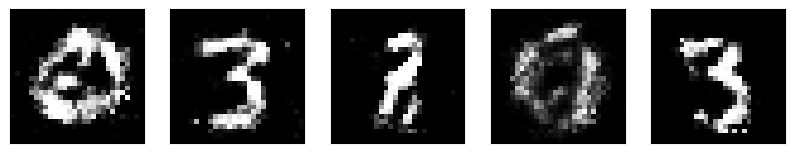

 Epoch: 166 batch: 1 D_loss: 1.220 G_loss: 1.832 
 Epoch: 166 batch: 2 D_loss: 1.200 G_loss: 1.640 
 Epoch: 166 batch: 3 D_loss: 1.127 G_loss: 1.409 
 Epoch: 166 batch: 4 D_loss: 1.210 G_loss: 1.405 
 Epoch: 166 batch: 5 D_loss: 1.297 G_loss: 1.374 
 Epoch: 166 batch: 6 D_loss: 1.188 G_loss: 1.256 
 Epoch: 166 batch: 7 D_loss: 1.245 G_loss: 1.272 
 Epoch: 166 batch: 8 D_loss: 1.327 G_loss: 1.235 
 Epoch: 166 batch: 9 D_loss: 1.312 G_loss: 1.187 
 Epoch: 166 batch: 10 D_loss: 1.223 G_loss: 1.075 
 Epoch: 166 batch: 11 D_loss: 1.284 G_loss: 1.053 
 Epoch: 166 batch: 12 D_loss: 1.251 G_loss: 1.052 
 Epoch: 166 batch: 13 D_loss: 1.286 G_loss: 0.961 
 Epoch: 166 batch: 14 D_loss: 1.268 G_loss: 0.936 
 Epoch: 166 batch: 15 D_loss: 1.251 G_loss: 0.941 
 Epoch: 166 batch: 16 D_loss: 1.232 G_loss: 0.924 
 Epoch: 166 batch: 17 D_loss: 1.264 G_loss: 0.925 
 Epoch: 166 batch: 18 D_loss: 1.234 G_loss: 0.932 
 Epoch: 166 batch: 19 D_loss: 1.301 G_loss: 0.965 
 Epoch: 166 batch: 20 D_loss: 1.292 G_lo

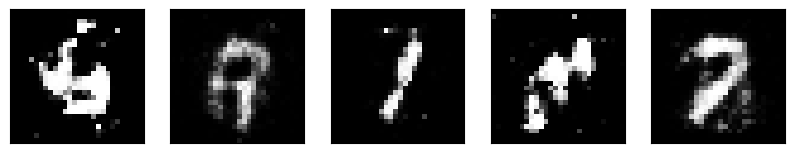

 Epoch: 167 batch: 1 D_loss: 1.284 G_loss: 1.226 
 Epoch: 167 batch: 2 D_loss: 1.206 G_loss: 1.265 
 Epoch: 167 batch: 3 D_loss: 1.166 G_loss: 1.145 
 Epoch: 167 batch: 4 D_loss: 1.134 G_loss: 1.240 
 Epoch: 167 batch: 5 D_loss: 1.236 G_loss: 1.312 
 Epoch: 167 batch: 6 D_loss: 1.319 G_loss: 1.250 
 Epoch: 167 batch: 7 D_loss: 1.213 G_loss: 1.108 
 Epoch: 167 batch: 8 D_loss: 1.315 G_loss: 1.067 
 Epoch: 167 batch: 9 D_loss: 1.279 G_loss: 1.015 
 Epoch: 167 batch: 10 D_loss: 1.241 G_loss: 0.993 
 Epoch: 167 batch: 11 D_loss: 1.244 G_loss: 0.982 
 Epoch: 167 batch: 12 D_loss: 1.200 G_loss: 1.045 
 Epoch: 167 batch: 13 D_loss: 1.217 G_loss: 1.093 
 Epoch: 167 batch: 14 D_loss: 1.209 G_loss: 1.053 
 Epoch: 167 batch: 15 D_loss: 1.213 G_loss: 0.998 
 Epoch: 167 batch: 16 D_loss: 1.208 G_loss: 0.997 
 Epoch: 167 batch: 17 D_loss: 1.244 G_loss: 0.976 
 Epoch: 167 batch: 18 D_loss: 1.194 G_loss: 1.009 
 Epoch: 167 batch: 19 D_loss: 1.254 G_loss: 1.048 
 Epoch: 167 batch: 20 D_loss: 1.193 G_lo

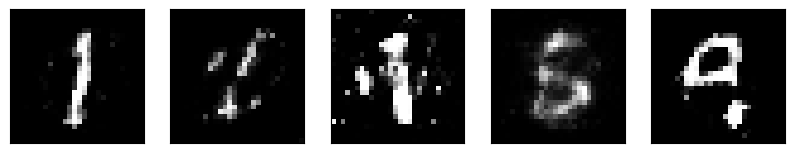

 Epoch: 168 batch: 1 D_loss: 1.289 G_loss: 1.081 
 Epoch: 168 batch: 2 D_loss: 1.274 G_loss: 1.054 
 Epoch: 168 batch: 3 D_loss: 1.258 G_loss: 1.066 
 Epoch: 168 batch: 4 D_loss: 1.295 G_loss: 1.099 
 Epoch: 168 batch: 5 D_loss: 1.306 G_loss: 1.072 
 Epoch: 168 batch: 6 D_loss: 1.353 G_loss: 1.007 
 Epoch: 168 batch: 7 D_loss: 1.258 G_loss: 0.999 
 Epoch: 168 batch: 8 D_loss: 1.303 G_loss: 1.034 
 Epoch: 168 batch: 9 D_loss: 1.306 G_loss: 1.071 
 Epoch: 168 batch: 10 D_loss: 1.179 G_loss: 1.106 
 Epoch: 168 batch: 11 D_loss: 1.229 G_loss: 1.187 
 Epoch: 168 batch: 12 D_loss: 1.182 G_loss: 1.164 
 Epoch: 168 batch: 13 D_loss: 1.247 G_loss: 1.456 
 Epoch: 168 batch: 14 D_loss: 1.229 G_loss: 1.497 
 Epoch: 168 batch: 15 D_loss: 1.253 G_loss: 1.528 
 Epoch: 168 batch: 16 D_loss: 1.200 G_loss: 1.400 
 Epoch: 168 batch: 17 D_loss: 1.291 G_loss: 1.345 
 Epoch: 168 batch: 18 D_loss: 1.279 G_loss: 1.000 
 Epoch: 168 batch: 19 D_loss: 1.317 G_loss: 1.017 
 Epoch: 168 batch: 20 D_loss: 1.309 G_lo

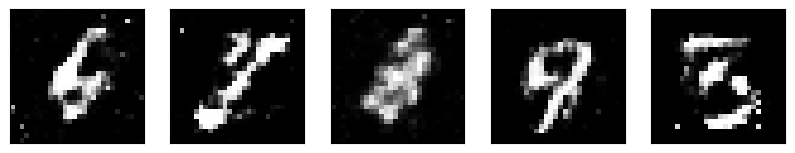

 Epoch: 169 batch: 1 D_loss: 1.264 G_loss: 1.107 
 Epoch: 169 batch: 2 D_loss: 1.239 G_loss: 1.100 
 Epoch: 169 batch: 3 D_loss: 1.255 G_loss: 1.023 
 Epoch: 169 batch: 4 D_loss: 1.160 G_loss: 1.074 
 Epoch: 169 batch: 5 D_loss: 1.296 G_loss: 1.072 
 Epoch: 169 batch: 6 D_loss: 1.248 G_loss: 1.032 
 Epoch: 169 batch: 7 D_loss: 1.217 G_loss: 1.079 
 Epoch: 169 batch: 8 D_loss: 1.262 G_loss: 1.121 
 Epoch: 169 batch: 9 D_loss: 1.257 G_loss: 1.152 
 Epoch: 169 batch: 10 D_loss: 1.229 G_loss: 1.081 
 Epoch: 169 batch: 11 D_loss: 1.305 G_loss: 1.071 
 Epoch: 169 batch: 12 D_loss: 1.305 G_loss: 1.094 
 Epoch: 169 batch: 13 D_loss: 1.244 G_loss: 1.042 
 Epoch: 169 batch: 14 D_loss: 1.312 G_loss: 1.097 
 Epoch: 169 batch: 15 D_loss: 1.260 G_loss: 1.005 
 Epoch: 169 batch: 16 D_loss: 1.269 G_loss: 1.069 
 Epoch: 169 batch: 17 D_loss: 1.262 G_loss: 1.080 
 Epoch: 169 batch: 18 D_loss: 1.247 G_loss: 1.029 
 Epoch: 169 batch: 19 D_loss: 1.275 G_loss: 1.040 
 Epoch: 169 batch: 20 D_loss: 1.281 G_lo

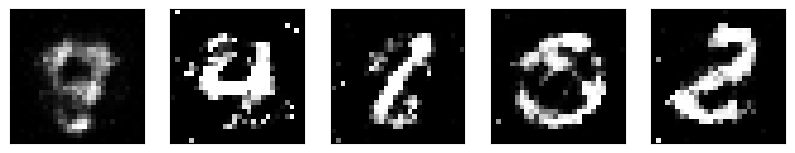

 Epoch: 170 batch: 1 D_loss: 1.329 G_loss: 1.297 
 Epoch: 170 batch: 2 D_loss: 1.246 G_loss: 1.368 
 Epoch: 170 batch: 3 D_loss: 1.250 G_loss: 1.243 
 Epoch: 170 batch: 4 D_loss: 1.250 G_loss: 1.055 
 Epoch: 170 batch: 5 D_loss: 1.343 G_loss: 1.063 
 Epoch: 170 batch: 6 D_loss: 1.266 G_loss: 1.082 
 Epoch: 170 batch: 7 D_loss: 1.266 G_loss: 1.037 
 Epoch: 170 batch: 8 D_loss: 1.313 G_loss: 1.035 
 Epoch: 170 batch: 9 D_loss: 1.337 G_loss: 1.059 
 Epoch: 170 batch: 10 D_loss: 1.256 G_loss: 1.022 
 Epoch: 170 batch: 11 D_loss: 1.277 G_loss: 1.058 
 Epoch: 170 batch: 12 D_loss: 1.241 G_loss: 1.029 
 Epoch: 170 batch: 13 D_loss: 1.272 G_loss: 0.963 
 Epoch: 170 batch: 14 D_loss: 1.285 G_loss: 0.955 
 Epoch: 170 batch: 15 D_loss: 1.299 G_loss: 0.959 
 Epoch: 170 batch: 16 D_loss: 1.271 G_loss: 1.112 
 Epoch: 170 batch: 17 D_loss: 1.259 G_loss: 1.057 
 Epoch: 170 batch: 18 D_loss: 1.262 G_loss: 1.231 
 Epoch: 170 batch: 19 D_loss: 1.346 G_loss: 1.213 
 Epoch: 170 batch: 20 D_loss: 1.326 G_lo

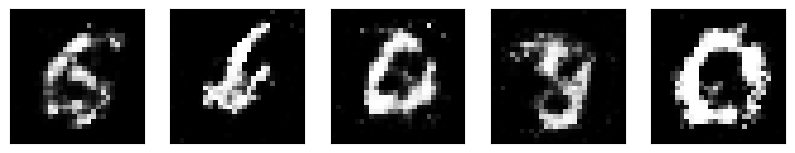

 Epoch: 171 batch: 1 D_loss: 1.266 G_loss: 1.022 
 Epoch: 171 batch: 2 D_loss: 1.253 G_loss: 1.105 
 Epoch: 171 batch: 3 D_loss: 1.257 G_loss: 1.052 
 Epoch: 171 batch: 4 D_loss: 1.203 G_loss: 1.067 
 Epoch: 171 batch: 5 D_loss: 1.215 G_loss: 1.041 
 Epoch: 171 batch: 6 D_loss: 1.230 G_loss: 0.984 
 Epoch: 171 batch: 7 D_loss: 1.257 G_loss: 1.048 
 Epoch: 171 batch: 8 D_loss: 1.270 G_loss: 1.058 
 Epoch: 171 batch: 9 D_loss: 1.270 G_loss: 1.121 
 Epoch: 171 batch: 10 D_loss: 1.222 G_loss: 1.319 
 Epoch: 171 batch: 11 D_loss: 1.209 G_loss: 1.546 
 Epoch: 171 batch: 12 D_loss: 1.271 G_loss: 1.490 
 Epoch: 171 batch: 13 D_loss: 1.218 G_loss: 1.410 
 Epoch: 171 batch: 14 D_loss: 1.185 G_loss: 1.196 
 Epoch: 171 batch: 15 D_loss: 1.269 G_loss: 1.078 
 Epoch: 171 batch: 16 D_loss: 1.243 G_loss: 1.173 
 Epoch: 171 batch: 17 D_loss: 1.196 G_loss: 0.985 
 Epoch: 171 batch: 18 D_loss: 1.241 G_loss: 1.074 
 Epoch: 171 batch: 19 D_loss: 1.243 G_loss: 1.130 
 Epoch: 171 batch: 20 D_loss: 1.285 G_lo

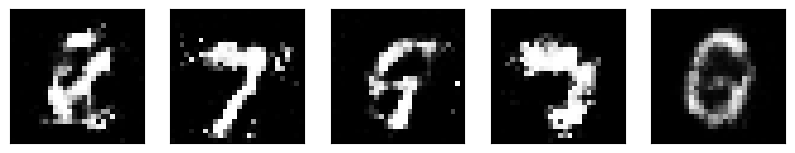

 Epoch: 172 batch: 1 D_loss: 1.248 G_loss: 1.010 
 Epoch: 172 batch: 2 D_loss: 1.284 G_loss: 1.030 
 Epoch: 172 batch: 3 D_loss: 1.225 G_loss: 0.977 
 Epoch: 172 batch: 4 D_loss: 1.283 G_loss: 1.036 
 Epoch: 172 batch: 5 D_loss: 1.311 G_loss: 0.968 
 Epoch: 172 batch: 6 D_loss: 1.310 G_loss: 1.057 
 Epoch: 172 batch: 7 D_loss: 1.294 G_loss: 1.042 
 Epoch: 172 batch: 8 D_loss: 1.329 G_loss: 1.047 
 Epoch: 172 batch: 9 D_loss: 1.334 G_loss: 1.039 
 Epoch: 172 batch: 10 D_loss: 1.219 G_loss: 1.064 
 Epoch: 172 batch: 11 D_loss: 1.285 G_loss: 1.029 
 Epoch: 172 batch: 12 D_loss: 1.252 G_loss: 1.024 
 Epoch: 172 batch: 13 D_loss: 1.272 G_loss: 1.024 
 Epoch: 172 batch: 14 D_loss: 1.251 G_loss: 1.059 
 Epoch: 172 batch: 15 D_loss: 1.260 G_loss: 1.047 
 Epoch: 172 batch: 16 D_loss: 1.260 G_loss: 1.147 
 Epoch: 172 batch: 17 D_loss: 1.293 G_loss: 1.103 
 Epoch: 172 batch: 18 D_loss: 1.304 G_loss: 1.096 
 Epoch: 172 batch: 19 D_loss: 1.241 G_loss: 1.112 
 Epoch: 172 batch: 20 D_loss: 1.344 G_lo

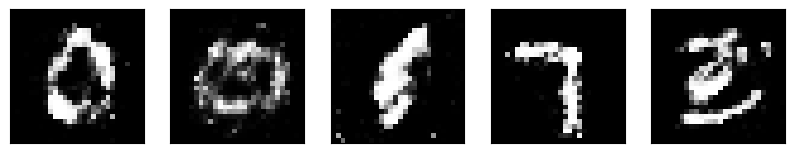

 Epoch: 173 batch: 1 D_loss: 1.347 G_loss: 1.255 
 Epoch: 173 batch: 2 D_loss: 1.291 G_loss: 1.022 
 Epoch: 173 batch: 3 D_loss: 1.278 G_loss: 0.931 
 Epoch: 173 batch: 4 D_loss: 1.291 G_loss: 0.904 
 Epoch: 173 batch: 5 D_loss: 1.323 G_loss: 0.972 
 Epoch: 173 batch: 6 D_loss: 1.311 G_loss: 0.973 
 Epoch: 173 batch: 7 D_loss: 1.312 G_loss: 1.001 
 Epoch: 173 batch: 8 D_loss: 1.349 G_loss: 0.944 
 Epoch: 173 batch: 9 D_loss: 1.379 G_loss: 0.924 
 Epoch: 173 batch: 10 D_loss: 1.285 G_loss: 0.891 
 Epoch: 173 batch: 11 D_loss: 1.341 G_loss: 0.906 
 Epoch: 173 batch: 12 D_loss: 1.286 G_loss: 0.882 
 Epoch: 173 batch: 13 D_loss: 1.294 G_loss: 0.950 
 Epoch: 173 batch: 14 D_loss: 1.278 G_loss: 0.938 
 Epoch: 173 batch: 15 D_loss: 1.271 G_loss: 0.983 
 Epoch: 173 batch: 16 D_loss: 1.258 G_loss: 1.000 
 Epoch: 173 batch: 17 D_loss: 1.263 G_loss: 1.032 
 Epoch: 173 batch: 18 D_loss: 1.243 G_loss: 1.045 
 Epoch: 173 batch: 19 D_loss: 1.296 G_loss: 1.188 
 Epoch: 173 batch: 20 D_loss: 1.277 G_lo

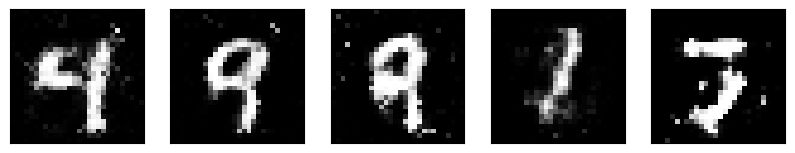

 Epoch: 174 batch: 1 D_loss: 1.267 G_loss: 1.102 
 Epoch: 174 batch: 2 D_loss: 1.319 G_loss: 1.038 
 Epoch: 174 batch: 3 D_loss: 1.244 G_loss: 1.036 
 Epoch: 174 batch: 4 D_loss: 1.259 G_loss: 0.977 
 Epoch: 174 batch: 5 D_loss: 1.265 G_loss: 0.991 
 Epoch: 174 batch: 6 D_loss: 1.341 G_loss: 0.978 
 Epoch: 174 batch: 7 D_loss: 1.289 G_loss: 1.021 
 Epoch: 174 batch: 8 D_loss: 1.287 G_loss: 1.059 
 Epoch: 174 batch: 9 D_loss: 1.299 G_loss: 1.096 
 Epoch: 174 batch: 10 D_loss: 1.223 G_loss: 1.083 
 Epoch: 174 batch: 11 D_loss: 1.239 G_loss: 1.097 
 Epoch: 174 batch: 12 D_loss: 1.272 G_loss: 1.157 
 Epoch: 174 batch: 13 D_loss: 1.202 G_loss: 1.113 
 Epoch: 174 batch: 14 D_loss: 1.256 G_loss: 1.003 
 Epoch: 174 batch: 15 D_loss: 1.253 G_loss: 1.061 
 Epoch: 174 batch: 16 D_loss: 1.306 G_loss: 1.163 
 Epoch: 174 batch: 17 D_loss: 1.251 G_loss: 0.989 
 Epoch: 174 batch: 18 D_loss: 1.307 G_loss: 1.031 
 Epoch: 174 batch: 19 D_loss: 1.240 G_loss: 0.945 
 Epoch: 174 batch: 20 D_loss: 1.305 G_lo

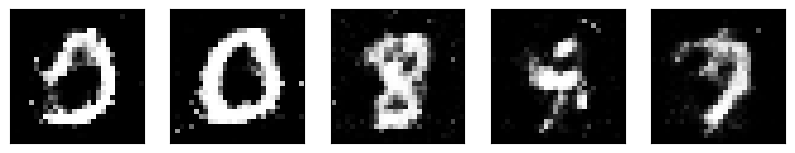

 Epoch: 175 batch: 1 D_loss: 1.290 G_loss: 1.051 
 Epoch: 175 batch: 2 D_loss: 1.226 G_loss: 1.083 
 Epoch: 175 batch: 3 D_loss: 1.243 G_loss: 1.052 
 Epoch: 175 batch: 4 D_loss: 1.221 G_loss: 1.012 
 Epoch: 175 batch: 5 D_loss: 1.281 G_loss: 0.999 
 Epoch: 175 batch: 6 D_loss: 1.334 G_loss: 0.931 
 Epoch: 175 batch: 7 D_loss: 1.341 G_loss: 1.019 
 Epoch: 175 batch: 8 D_loss: 1.387 G_loss: 1.058 
 Epoch: 175 batch: 9 D_loss: 1.352 G_loss: 1.129 
 Epoch: 175 batch: 10 D_loss: 1.244 G_loss: 1.101 
 Epoch: 175 batch: 11 D_loss: 1.272 G_loss: 1.040 
 Epoch: 175 batch: 12 D_loss: 1.278 G_loss: 1.004 
 Epoch: 175 batch: 13 D_loss: 1.263 G_loss: 0.924 
 Epoch: 175 batch: 14 D_loss: 1.249 G_loss: 0.958 
 Epoch: 175 batch: 15 D_loss: 1.297 G_loss: 0.980 
 Epoch: 175 batch: 16 D_loss: 1.244 G_loss: 1.102 
 Epoch: 175 batch: 17 D_loss: 1.312 G_loss: 1.154 
 Epoch: 175 batch: 18 D_loss: 1.297 G_loss: 1.143 
 Epoch: 175 batch: 19 D_loss: 1.276 G_loss: 1.108 
 Epoch: 175 batch: 20 D_loss: 1.262 G_lo

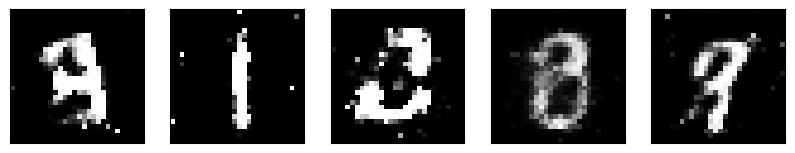

 Epoch: 176 batch: 1 D_loss: 1.268 G_loss: 1.137 
 Epoch: 176 batch: 2 D_loss: 1.215 G_loss: 1.145 
 Epoch: 176 batch: 3 D_loss: 1.173 G_loss: 1.168 
 Epoch: 176 batch: 4 D_loss: 1.249 G_loss: 1.142 
 Epoch: 176 batch: 5 D_loss: 1.227 G_loss: 1.095 
 Epoch: 176 batch: 6 D_loss: 1.228 G_loss: 1.090 
 Epoch: 176 batch: 7 D_loss: 1.214 G_loss: 1.062 
 Epoch: 176 batch: 8 D_loss: 1.231 G_loss: 1.005 
 Epoch: 176 batch: 9 D_loss: 1.305 G_loss: 1.048 
 Epoch: 176 batch: 10 D_loss: 1.222 G_loss: 1.071 
 Epoch: 176 batch: 11 D_loss: 1.273 G_loss: 1.156 
 Epoch: 176 batch: 12 D_loss: 1.256 G_loss: 1.232 
 Epoch: 176 batch: 13 D_loss: 1.232 G_loss: 1.338 
 Epoch: 176 batch: 14 D_loss: 1.232 G_loss: 1.322 
 Epoch: 176 batch: 15 D_loss: 1.272 G_loss: 1.388 
 Epoch: 176 batch: 16 D_loss: 1.239 G_loss: 1.318 
 Epoch: 176 batch: 17 D_loss: 1.266 G_loss: 1.196 
 Epoch: 176 batch: 18 D_loss: 1.258 G_loss: 1.153 
 Epoch: 176 batch: 19 D_loss: 1.350 G_loss: 1.049 
 Epoch: 176 batch: 20 D_loss: 1.333 G_lo

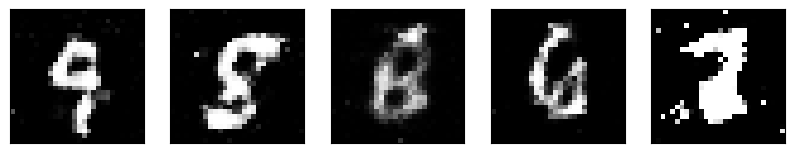

 Epoch: 177 batch: 1 D_loss: 1.308 G_loss: 1.205 
 Epoch: 177 batch: 2 D_loss: 1.242 G_loss: 1.216 
 Epoch: 177 batch: 3 D_loss: 1.312 G_loss: 1.214 
 Epoch: 177 batch: 4 D_loss: 1.329 G_loss: 1.170 
 Epoch: 177 batch: 5 D_loss: 1.272 G_loss: 1.110 
 Epoch: 177 batch: 6 D_loss: 1.270 G_loss: 1.187 
 Epoch: 177 batch: 7 D_loss: 1.284 G_loss: 1.046 
 Epoch: 177 batch: 8 D_loss: 1.304 G_loss: 1.072 
 Epoch: 177 batch: 9 D_loss: 1.301 G_loss: 1.175 
 Epoch: 177 batch: 10 D_loss: 1.209 G_loss: 1.359 
 Epoch: 177 batch: 11 D_loss: 1.253 G_loss: 1.475 
 Epoch: 177 batch: 12 D_loss: 1.247 G_loss: 1.526 
 Epoch: 177 batch: 13 D_loss: 1.347 G_loss: 1.487 
 Epoch: 177 batch: 14 D_loss: 1.286 G_loss: 1.311 
 Epoch: 177 batch: 15 D_loss: 1.292 G_loss: 1.069 
 Epoch: 177 batch: 16 D_loss: 1.294 G_loss: 1.024 
 Epoch: 177 batch: 17 D_loss: 1.286 G_loss: 1.246 
 Epoch: 177 batch: 18 D_loss: 1.245 G_loss: 1.262 
 Epoch: 177 batch: 19 D_loss: 1.261 G_loss: 1.560 
 Epoch: 177 batch: 20 D_loss: 1.256 G_lo

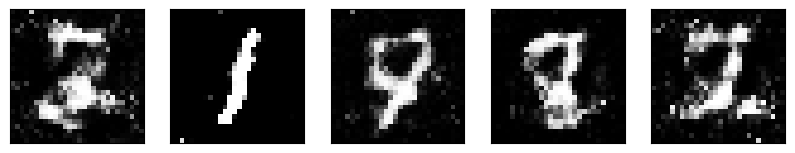

 Epoch: 178 batch: 1 D_loss: 1.240 G_loss: 1.116 
 Epoch: 178 batch: 2 D_loss: 1.209 G_loss: 1.078 
 Epoch: 178 batch: 3 D_loss: 1.237 G_loss: 1.165 
 Epoch: 178 batch: 4 D_loss: 1.184 G_loss: 1.286 
 Epoch: 178 batch: 5 D_loss: 1.219 G_loss: 1.381 
 Epoch: 178 batch: 6 D_loss: 1.295 G_loss: 1.417 
 Epoch: 178 batch: 7 D_loss: 1.266 G_loss: 1.217 
 Epoch: 178 batch: 8 D_loss: 1.231 G_loss: 1.251 
 Epoch: 178 batch: 9 D_loss: 1.270 G_loss: 1.172 
 Epoch: 178 batch: 10 D_loss: 1.162 G_loss: 1.125 
 Epoch: 178 batch: 11 D_loss: 1.125 G_loss: 1.105 
 Epoch: 178 batch: 12 D_loss: 1.172 G_loss: 1.196 
 Epoch: 178 batch: 13 D_loss: 1.142 G_loss: 1.393 
 Epoch: 178 batch: 14 D_loss: 1.167 G_loss: 1.505 
 Epoch: 178 batch: 15 D_loss: 1.137 G_loss: 1.496 
 Epoch: 178 batch: 16 D_loss: 1.099 G_loss: 1.764 
 Epoch: 178 batch: 17 D_loss: 1.138 G_loss: 1.763 
 Epoch: 178 batch: 18 D_loss: 1.157 G_loss: 1.674 
 Epoch: 178 batch: 19 D_loss: 1.170 G_loss: 1.730 
 Epoch: 178 batch: 20 D_loss: 1.171 G_lo

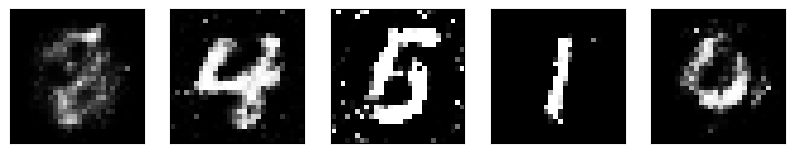

 Epoch: 179 batch: 1 D_loss: 1.244 G_loss: 1.020 
 Epoch: 179 batch: 2 D_loss: 1.234 G_loss: 1.041 
 Epoch: 179 batch: 3 D_loss: 1.308 G_loss: 1.104 
 Epoch: 179 batch: 4 D_loss: 1.212 G_loss: 1.107 
 Epoch: 179 batch: 5 D_loss: 1.277 G_loss: 1.169 
 Epoch: 179 batch: 6 D_loss: 1.200 G_loss: 1.128 
 Epoch: 179 batch: 7 D_loss: 1.204 G_loss: 1.182 
 Epoch: 179 batch: 8 D_loss: 1.270 G_loss: 1.130 
 Epoch: 179 batch: 9 D_loss: 1.226 G_loss: 1.147 
 Epoch: 179 batch: 10 D_loss: 1.196 G_loss: 1.200 
 Epoch: 179 batch: 11 D_loss: 1.204 G_loss: 1.189 
 Epoch: 179 batch: 12 D_loss: 1.176 G_loss: 1.264 
 Epoch: 179 batch: 13 D_loss: 1.250 G_loss: 1.443 
 Epoch: 179 batch: 14 D_loss: 1.207 G_loss: 1.297 
 Epoch: 179 batch: 15 D_loss: 1.232 G_loss: 1.496 
 Epoch: 179 batch: 16 D_loss: 1.150 G_loss: 1.293 
 Epoch: 179 batch: 17 D_loss: 1.171 G_loss: 1.332 
 Epoch: 179 batch: 18 D_loss: 1.180 G_loss: 1.370 
 Epoch: 179 batch: 19 D_loss: 1.195 G_loss: 1.227 
 Epoch: 179 batch: 20 D_loss: 1.234 G_lo

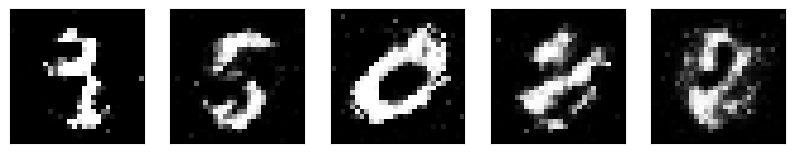

 Epoch: 180 batch: 1 D_loss: 1.254 G_loss: 1.118 
 Epoch: 180 batch: 2 D_loss: 1.188 G_loss: 1.050 
 Epoch: 180 batch: 3 D_loss: 1.164 G_loss: 1.134 
 Epoch: 180 batch: 4 D_loss: 1.135 G_loss: 1.126 
 Epoch: 180 batch: 5 D_loss: 1.198 G_loss: 1.172 
 Epoch: 180 batch: 6 D_loss: 1.217 G_loss: 1.201 
 Epoch: 180 batch: 7 D_loss: 1.211 G_loss: 1.204 
 Epoch: 180 batch: 8 D_loss: 1.351 G_loss: 1.176 
 Epoch: 180 batch: 9 D_loss: 1.283 G_loss: 1.116 
 Epoch: 180 batch: 10 D_loss: 1.145 G_loss: 1.081 
 Epoch: 180 batch: 11 D_loss: 1.264 G_loss: 1.082 
 Epoch: 180 batch: 12 D_loss: 1.217 G_loss: 1.078 
 Epoch: 180 batch: 13 D_loss: 1.149 G_loss: 1.101 
 Epoch: 180 batch: 14 D_loss: 1.176 G_loss: 1.059 
 Epoch: 180 batch: 15 D_loss: 1.271 G_loss: 1.095 
 Epoch: 180 batch: 16 D_loss: 1.158 G_loss: 1.147 
 Epoch: 180 batch: 17 D_loss: 1.176 G_loss: 1.127 
 Epoch: 180 batch: 18 D_loss: 1.225 G_loss: 1.093 
 Epoch: 180 batch: 19 D_loss: 1.208 G_loss: 1.274 
 Epoch: 180 batch: 20 D_loss: 1.206 G_lo

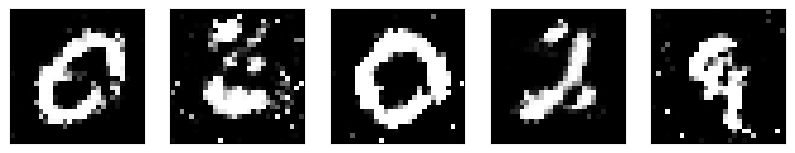

 Epoch: 181 batch: 1 D_loss: 1.208 G_loss: 1.367 
 Epoch: 181 batch: 2 D_loss: 1.254 G_loss: 1.375 
 Epoch: 181 batch: 3 D_loss: 1.236 G_loss: 1.397 
 Epoch: 181 batch: 4 D_loss: 1.205 G_loss: 1.405 
 Epoch: 181 batch: 5 D_loss: 1.264 G_loss: 1.236 
 Epoch: 181 batch: 6 D_loss: 1.282 G_loss: 0.987 
 Epoch: 181 batch: 7 D_loss: 1.289 G_loss: 0.900 
 Epoch: 181 batch: 8 D_loss: 1.319 G_loss: 0.891 
 Epoch: 181 batch: 9 D_loss: 1.326 G_loss: 0.924 
 Epoch: 181 batch: 10 D_loss: 1.249 G_loss: 0.995 
 Epoch: 181 batch: 11 D_loss: 1.273 G_loss: 0.983 
 Epoch: 181 batch: 12 D_loss: 1.272 G_loss: 0.961 
 Epoch: 181 batch: 13 D_loss: 1.262 G_loss: 0.966 
 Epoch: 181 batch: 14 D_loss: 1.228 G_loss: 0.947 
 Epoch: 181 batch: 15 D_loss: 1.312 G_loss: 0.912 
 Epoch: 181 batch: 16 D_loss: 1.239 G_loss: 0.936 
 Epoch: 181 batch: 17 D_loss: 1.212 G_loss: 0.978 
 Epoch: 181 batch: 18 D_loss: 1.235 G_loss: 1.006 
 Epoch: 181 batch: 19 D_loss: 1.285 G_loss: 1.099 
 Epoch: 181 batch: 20 D_loss: 1.189 G_lo

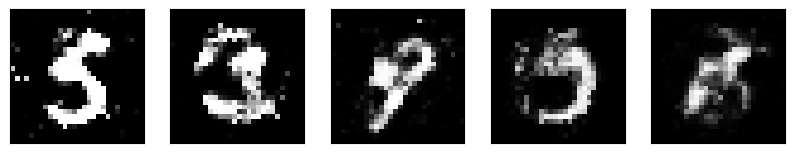

 Epoch: 182 batch: 1 D_loss: 1.146 G_loss: 1.285 
 Epoch: 182 batch: 2 D_loss: 1.154 G_loss: 1.451 
 Epoch: 182 batch: 3 D_loss: 1.084 G_loss: 1.675 
 Epoch: 182 batch: 4 D_loss: 1.188 G_loss: 2.322 
 Epoch: 182 batch: 5 D_loss: 1.236 G_loss: 1.644 
 Epoch: 182 batch: 6 D_loss: 1.200 G_loss: 1.639 
 Epoch: 182 batch: 7 D_loss: 1.232 G_loss: 1.447 
 Epoch: 182 batch: 8 D_loss: 1.252 G_loss: 1.382 
 Epoch: 182 batch: 9 D_loss: 1.275 G_loss: 1.356 
 Epoch: 182 batch: 10 D_loss: 1.216 G_loss: 1.479 
 Epoch: 182 batch: 11 D_loss: 1.350 G_loss: 1.374 
 Epoch: 182 batch: 12 D_loss: 1.310 G_loss: 1.376 
 Epoch: 182 batch: 13 D_loss: 1.227 G_loss: 1.156 
 Epoch: 182 batch: 14 D_loss: 1.282 G_loss: 1.103 
 Epoch: 182 batch: 15 D_loss: 1.280 G_loss: 1.067 
 Epoch: 182 batch: 16 D_loss: 1.225 G_loss: 1.023 
 Epoch: 182 batch: 17 D_loss: 1.282 G_loss: 0.958 
 Epoch: 182 batch: 18 D_loss: 1.233 G_loss: 0.974 
 Epoch: 182 batch: 19 D_loss: 1.260 G_loss: 0.988 
 Epoch: 182 batch: 20 D_loss: 1.301 G_lo

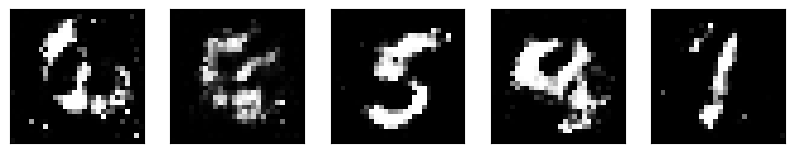

 Epoch: 183 batch: 1 D_loss: 1.216 G_loss: 1.525 
 Epoch: 183 batch: 2 D_loss: 1.329 G_loss: 1.393 
 Epoch: 183 batch: 3 D_loss: 1.218 G_loss: 1.249 
 Epoch: 183 batch: 4 D_loss: 1.186 G_loss: 1.198 
 Epoch: 183 batch: 5 D_loss: 1.300 G_loss: 1.201 
 Epoch: 183 batch: 6 D_loss: 1.315 G_loss: 1.170 
 Epoch: 183 batch: 7 D_loss: 1.269 G_loss: 1.058 
 Epoch: 183 batch: 8 D_loss: 1.318 G_loss: 1.046 
 Epoch: 183 batch: 9 D_loss: 1.313 G_loss: 0.989 
 Epoch: 183 batch: 10 D_loss: 1.232 G_loss: 1.007 
 Epoch: 183 batch: 11 D_loss: 1.292 G_loss: 0.986 
 Epoch: 183 batch: 12 D_loss: 1.249 G_loss: 0.881 
 Epoch: 183 batch: 13 D_loss: 1.218 G_loss: 0.901 
 Epoch: 183 batch: 14 D_loss: 1.237 G_loss: 0.891 
 Epoch: 183 batch: 15 D_loss: 1.238 G_loss: 0.936 
 Epoch: 183 batch: 16 D_loss: 1.213 G_loss: 0.961 
 Epoch: 183 batch: 17 D_loss: 1.169 G_loss: 1.016 
 Epoch: 183 batch: 18 D_loss: 1.207 G_loss: 1.099 
 Epoch: 183 batch: 19 D_loss: 1.171 G_loss: 1.335 
 Epoch: 183 batch: 20 D_loss: 1.187 G_lo

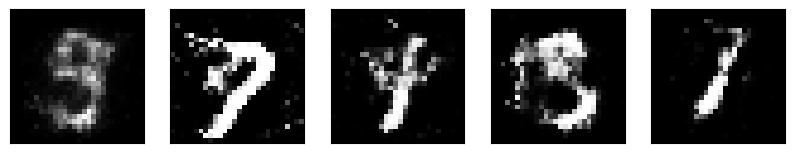

 Epoch: 184 batch: 1 D_loss: 1.270 G_loss: 1.145 
 Epoch: 184 batch: 2 D_loss: 1.220 G_loss: 1.226 
 Epoch: 184 batch: 3 D_loss: 1.234 G_loss: 1.158 
 Epoch: 184 batch: 4 D_loss: 1.232 G_loss: 1.372 
 Epoch: 184 batch: 5 D_loss: 1.308 G_loss: 1.214 
 Epoch: 184 batch: 6 D_loss: 1.323 G_loss: 1.165 
 Epoch: 184 batch: 7 D_loss: 1.278 G_loss: 1.145 
 Epoch: 184 batch: 8 D_loss: 1.289 G_loss: 1.133 
 Epoch: 184 batch: 9 D_loss: 1.260 G_loss: 1.042 
 Epoch: 184 batch: 10 D_loss: 1.187 G_loss: 1.096 
 Epoch: 184 batch: 11 D_loss: 1.202 G_loss: 1.095 
 Epoch: 184 batch: 12 D_loss: 1.231 G_loss: 1.219 
 Epoch: 184 batch: 13 D_loss: 1.185 G_loss: 1.209 
 Epoch: 184 batch: 14 D_loss: 1.198 G_loss: 1.291 
 Epoch: 184 batch: 15 D_loss: 1.189 G_loss: 1.419 
 Epoch: 184 batch: 16 D_loss: 1.320 G_loss: 1.472 
 Epoch: 184 batch: 17 D_loss: 1.284 G_loss: 1.302 
 Epoch: 184 batch: 18 D_loss: 1.318 G_loss: 1.298 
 Epoch: 184 batch: 19 D_loss: 1.267 G_loss: 1.113 
 Epoch: 184 batch: 20 D_loss: 1.271 G_lo

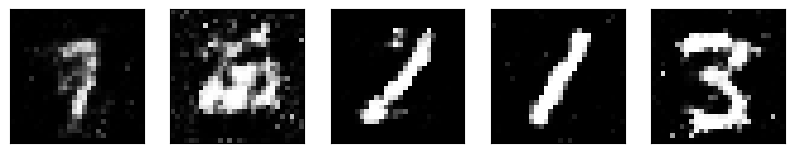

 Epoch: 185 batch: 1 D_loss: 1.216 G_loss: 0.997 
 Epoch: 185 batch: 2 D_loss: 1.244 G_loss: 1.051 
 Epoch: 185 batch: 3 D_loss: 1.215 G_loss: 1.057 
 Epoch: 185 batch: 4 D_loss: 1.246 G_loss: 1.076 
 Epoch: 185 batch: 5 D_loss: 1.262 G_loss: 1.133 
 Epoch: 185 batch: 6 D_loss: 1.282 G_loss: 1.142 
 Epoch: 185 batch: 7 D_loss: 1.240 G_loss: 1.215 
 Epoch: 185 batch: 8 D_loss: 1.267 G_loss: 1.320 
 Epoch: 185 batch: 9 D_loss: 1.281 G_loss: 1.144 
 Epoch: 185 batch: 10 D_loss: 1.283 G_loss: 1.184 
 Epoch: 185 batch: 11 D_loss: 1.353 G_loss: 1.044 
 Epoch: 185 batch: 12 D_loss: 1.261 G_loss: 1.029 
 Epoch: 185 batch: 13 D_loss: 1.268 G_loss: 0.937 
 Epoch: 185 batch: 14 D_loss: 1.261 G_loss: 0.976 
 Epoch: 185 batch: 15 D_loss: 1.269 G_loss: 1.011 
 Epoch: 185 batch: 16 D_loss: 1.247 G_loss: 0.998 
 Epoch: 185 batch: 17 D_loss: 1.257 G_loss: 0.992 
 Epoch: 185 batch: 18 D_loss: 1.260 G_loss: 0.938 
 Epoch: 185 batch: 19 D_loss: 1.315 G_loss: 0.956 
 Epoch: 185 batch: 20 D_loss: 1.271 G_lo

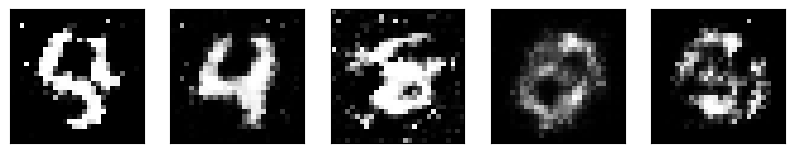

 Epoch: 186 batch: 1 D_loss: 1.276 G_loss: 0.946 
 Epoch: 186 batch: 2 D_loss: 1.256 G_loss: 0.962 
 Epoch: 186 batch: 3 D_loss: 1.202 G_loss: 1.007 
 Epoch: 186 batch: 4 D_loss: 1.208 G_loss: 1.038 
 Epoch: 186 batch: 5 D_loss: 1.287 G_loss: 1.060 
 Epoch: 186 batch: 6 D_loss: 1.218 G_loss: 1.093 
 Epoch: 186 batch: 7 D_loss: 1.216 G_loss: 1.040 
 Epoch: 186 batch: 8 D_loss: 1.309 G_loss: 1.097 
 Epoch: 186 batch: 9 D_loss: 1.322 G_loss: 1.149 
 Epoch: 186 batch: 10 D_loss: 1.155 G_loss: 1.144 
 Epoch: 186 batch: 11 D_loss: 1.249 G_loss: 1.216 
 Epoch: 186 batch: 12 D_loss: 1.285 G_loss: 1.236 
 Epoch: 186 batch: 13 D_loss: 1.195 G_loss: 1.110 
 Epoch: 186 batch: 14 D_loss: 1.211 G_loss: 1.121 
 Epoch: 186 batch: 15 D_loss: 1.279 G_loss: 1.188 
 Epoch: 186 batch: 16 D_loss: 1.301 G_loss: 1.161 
 Epoch: 186 batch: 17 D_loss: 1.246 G_loss: 1.100 
 Epoch: 186 batch: 18 D_loss: 1.229 G_loss: 1.101 
 Epoch: 186 batch: 19 D_loss: 1.320 G_loss: 1.054 
 Epoch: 186 batch: 20 D_loss: 1.266 G_lo

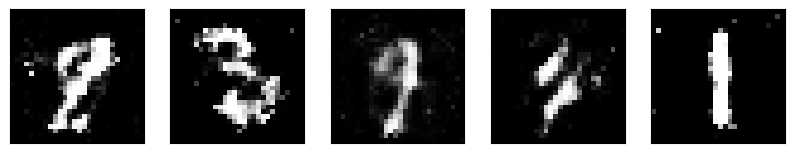

 Epoch: 187 batch: 1 D_loss: 1.273 G_loss: 1.164 
 Epoch: 187 batch: 2 D_loss: 1.283 G_loss: 1.118 
 Epoch: 187 batch: 3 D_loss: 1.244 G_loss: 1.087 
 Epoch: 187 batch: 4 D_loss: 1.222 G_loss: 1.030 
 Epoch: 187 batch: 5 D_loss: 1.285 G_loss: 1.107 
 Epoch: 187 batch: 6 D_loss: 1.267 G_loss: 1.128 
 Epoch: 187 batch: 7 D_loss: 1.284 G_loss: 1.157 
 Epoch: 187 batch: 8 D_loss: 1.312 G_loss: 1.081 
 Epoch: 187 batch: 9 D_loss: 1.297 G_loss: 1.151 
 Epoch: 187 batch: 10 D_loss: 1.206 G_loss: 1.074 
 Epoch: 187 batch: 11 D_loss: 1.325 G_loss: 0.957 
 Epoch: 187 batch: 12 D_loss: 1.243 G_loss: 0.953 
 Epoch: 187 batch: 13 D_loss: 1.269 G_loss: 0.974 
 Epoch: 187 batch: 14 D_loss: 1.314 G_loss: 0.957 
 Epoch: 187 batch: 15 D_loss: 1.300 G_loss: 0.956 
 Epoch: 187 batch: 16 D_loss: 1.274 G_loss: 1.016 
 Epoch: 187 batch: 17 D_loss: 1.266 G_loss: 1.003 
 Epoch: 187 batch: 18 D_loss: 1.296 G_loss: 1.057 
 Epoch: 187 batch: 19 D_loss: 1.222 G_loss: 0.991 
 Epoch: 187 batch: 20 D_loss: 1.288 G_lo

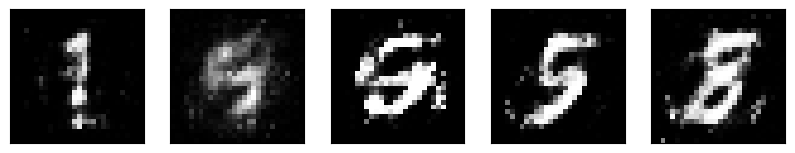

 Epoch: 188 batch: 1 D_loss: 1.301 G_loss: 0.993 
 Epoch: 188 batch: 2 D_loss: 1.273 G_loss: 1.004 
 Epoch: 188 batch: 3 D_loss: 1.248 G_loss: 0.949 
 Epoch: 188 batch: 4 D_loss: 1.262 G_loss: 0.927 
 Epoch: 188 batch: 5 D_loss: 1.332 G_loss: 0.931 
 Epoch: 188 batch: 6 D_loss: 1.301 G_loss: 0.988 
 Epoch: 188 batch: 7 D_loss: 1.254 G_loss: 1.037 
 Epoch: 188 batch: 8 D_loss: 1.309 G_loss: 1.052 
 Epoch: 188 batch: 9 D_loss: 1.319 G_loss: 1.083 
 Epoch: 188 batch: 10 D_loss: 1.235 G_loss: 1.080 
 Epoch: 188 batch: 11 D_loss: 1.234 G_loss: 1.015 
 Epoch: 188 batch: 12 D_loss: 1.197 G_loss: 1.095 
 Epoch: 188 batch: 13 D_loss: 1.206 G_loss: 1.209 
 Epoch: 188 batch: 14 D_loss: 1.191 G_loss: 1.207 
 Epoch: 188 batch: 15 D_loss: 1.203 G_loss: 1.337 
 Epoch: 188 batch: 16 D_loss: 1.207 G_loss: 1.431 
 Epoch: 188 batch: 17 D_loss: 1.209 G_loss: 1.483 
 Epoch: 188 batch: 18 D_loss: 1.323 G_loss: 1.254 
 Epoch: 188 batch: 19 D_loss: 1.343 G_loss: 1.381 
 Epoch: 188 batch: 20 D_loss: 1.342 G_lo

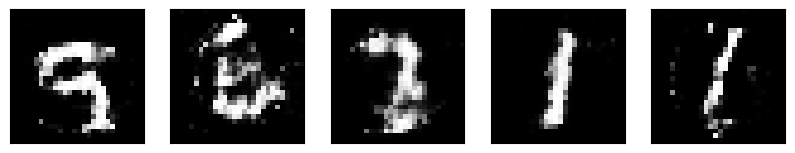

 Epoch: 189 batch: 1 D_loss: 1.277 G_loss: 1.283 
 Epoch: 189 batch: 2 D_loss: 1.250 G_loss: 1.284 
 Epoch: 189 batch: 3 D_loss: 1.201 G_loss: 1.151 
 Epoch: 189 batch: 4 D_loss: 1.234 G_loss: 1.075 
 Epoch: 189 batch: 5 D_loss: 1.350 G_loss: 1.098 
 Epoch: 189 batch: 6 D_loss: 1.282 G_loss: 1.047 
 Epoch: 189 batch: 7 D_loss: 1.277 G_loss: 1.072 
 Epoch: 189 batch: 8 D_loss: 1.323 G_loss: 0.997 
 Epoch: 189 batch: 9 D_loss: 1.333 G_loss: 0.978 
 Epoch: 189 batch: 10 D_loss: 1.258 G_loss: 1.015 
 Epoch: 189 batch: 11 D_loss: 1.330 G_loss: 0.954 
 Epoch: 189 batch: 12 D_loss: 1.255 G_loss: 0.977 
 Epoch: 189 batch: 13 D_loss: 1.270 G_loss: 0.899 
 Epoch: 189 batch: 14 D_loss: 1.282 G_loss: 0.919 
 Epoch: 189 batch: 15 D_loss: 1.292 G_loss: 0.953 
 Epoch: 189 batch: 16 D_loss: 1.284 G_loss: 0.919 
 Epoch: 189 batch: 17 D_loss: 1.253 G_loss: 0.978 
 Epoch: 189 batch: 18 D_loss: 1.278 G_loss: 0.974 
 Epoch: 189 batch: 19 D_loss: 1.294 G_loss: 0.916 
 Epoch: 189 batch: 20 D_loss: 1.275 G_lo

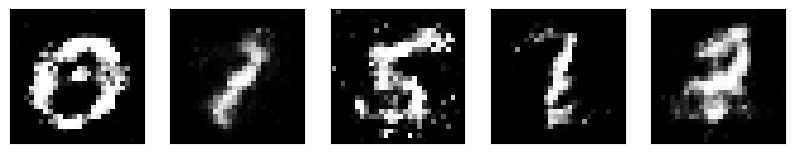

 Epoch: 190 batch: 1 D_loss: 1.233 G_loss: 1.379 
 Epoch: 190 batch: 2 D_loss: 1.260 G_loss: 1.485 
 Epoch: 190 batch: 3 D_loss: 1.231 G_loss: 1.385 
 Epoch: 190 batch: 4 D_loss: 1.210 G_loss: 1.256 
 Epoch: 190 batch: 5 D_loss: 1.351 G_loss: 1.180 
 Epoch: 190 batch: 6 D_loss: 1.351 G_loss: 1.063 
 Epoch: 190 batch: 7 D_loss: 1.252 G_loss: 0.986 
 Epoch: 190 batch: 8 D_loss: 1.323 G_loss: 1.011 
 Epoch: 190 batch: 9 D_loss: 1.346 G_loss: 0.912 
 Epoch: 190 batch: 10 D_loss: 1.288 G_loss: 0.877 
 Epoch: 190 batch: 11 D_loss: 1.292 G_loss: 0.896 
 Epoch: 190 batch: 12 D_loss: 1.268 G_loss: 0.870 
 Epoch: 190 batch: 13 D_loss: 1.296 G_loss: 0.888 
 Epoch: 190 batch: 14 D_loss: 1.331 G_loss: 0.879 
 Epoch: 190 batch: 15 D_loss: 1.307 G_loss: 0.885 
 Epoch: 190 batch: 16 D_loss: 1.282 G_loss: 0.879 
 Epoch: 190 batch: 17 D_loss: 1.304 G_loss: 0.885 
 Epoch: 190 batch: 18 D_loss: 1.273 G_loss: 0.889 
 Epoch: 190 batch: 19 D_loss: 1.292 G_loss: 0.883 
 Epoch: 190 batch: 20 D_loss: 1.334 G_lo

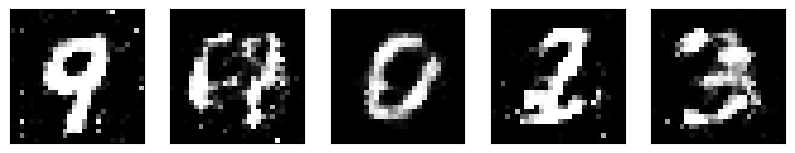

 Epoch: 191 batch: 1 D_loss: 1.274 G_loss: 1.166 
 Epoch: 191 batch: 2 D_loss: 1.249 G_loss: 1.228 
 Epoch: 191 batch: 3 D_loss: 1.253 G_loss: 1.183 
 Epoch: 191 batch: 4 D_loss: 1.221 G_loss: 1.214 
 Epoch: 191 batch: 5 D_loss: 1.293 G_loss: 1.127 
 Epoch: 191 batch: 6 D_loss: 1.294 G_loss: 1.099 
 Epoch: 191 batch: 7 D_loss: 1.252 G_loss: 1.055 
 Epoch: 191 batch: 8 D_loss: 1.343 G_loss: 1.098 
 Epoch: 191 batch: 9 D_loss: 1.323 G_loss: 1.044 
 Epoch: 191 batch: 10 D_loss: 1.269 G_loss: 1.065 
 Epoch: 191 batch: 11 D_loss: 1.288 G_loss: 1.099 
 Epoch: 191 batch: 12 D_loss: 1.283 G_loss: 1.027 
 Epoch: 191 batch: 13 D_loss: 1.271 G_loss: 1.065 
 Epoch: 191 batch: 14 D_loss: 1.337 G_loss: 1.009 
 Epoch: 191 batch: 15 D_loss: 1.339 G_loss: 0.968 
 Epoch: 191 batch: 16 D_loss: 1.291 G_loss: 0.924 
 Epoch: 191 batch: 17 D_loss: 1.339 G_loss: 0.967 
 Epoch: 191 batch: 18 D_loss: 1.300 G_loss: 0.962 
 Epoch: 191 batch: 19 D_loss: 1.311 G_loss: 1.009 
 Epoch: 191 batch: 20 D_loss: 1.261 G_lo

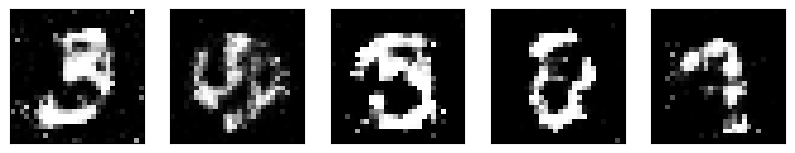

 Epoch: 192 batch: 1 D_loss: 1.313 G_loss: 1.074 
 Epoch: 192 batch: 2 D_loss: 1.280 G_loss: 1.042 
 Epoch: 192 batch: 3 D_loss: 1.262 G_loss: 0.974 
 Epoch: 192 batch: 4 D_loss: 1.262 G_loss: 0.989 
 Epoch: 192 batch: 5 D_loss: 1.242 G_loss: 1.041 
 Epoch: 192 batch: 6 D_loss: 1.290 G_loss: 1.009 
 Epoch: 192 batch: 7 D_loss: 1.243 G_loss: 1.061 
 Epoch: 192 batch: 8 D_loss: 1.334 G_loss: 1.032 
 Epoch: 192 batch: 9 D_loss: 1.303 G_loss: 1.101 
 Epoch: 192 batch: 10 D_loss: 1.216 G_loss: 1.151 
 Epoch: 192 batch: 11 D_loss: 1.319 G_loss: 1.055 
 Epoch: 192 batch: 12 D_loss: 1.268 G_loss: 1.177 
 Epoch: 192 batch: 13 D_loss: 1.243 G_loss: 1.020 
 Epoch: 192 batch: 14 D_loss: 1.270 G_loss: 1.086 
 Epoch: 192 batch: 15 D_loss: 1.309 G_loss: 1.083 
 Epoch: 192 batch: 16 D_loss: 1.282 G_loss: 1.088 
 Epoch: 192 batch: 17 D_loss: 1.290 G_loss: 1.062 
 Epoch: 192 batch: 18 D_loss: 1.259 G_loss: 1.032 
 Epoch: 192 batch: 19 D_loss: 1.276 G_loss: 1.072 
 Epoch: 192 batch: 20 D_loss: 1.293 G_lo

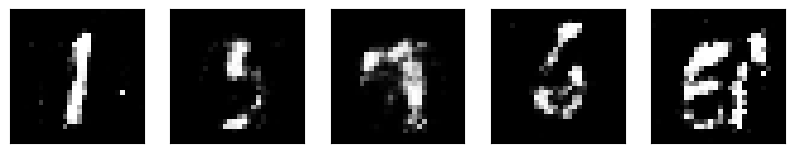

 Epoch: 193 batch: 1 D_loss: 1.305 G_loss: 1.115 
 Epoch: 193 batch: 2 D_loss: 1.255 G_loss: 1.147 
 Epoch: 193 batch: 3 D_loss: 1.256 G_loss: 1.113 
 Epoch: 193 batch: 4 D_loss: 1.298 G_loss: 1.158 
 Epoch: 193 batch: 5 D_loss: 1.249 G_loss: 1.073 
 Epoch: 193 batch: 6 D_loss: 1.292 G_loss: 1.203 
 Epoch: 193 batch: 7 D_loss: 1.260 G_loss: 1.205 
 Epoch: 193 batch: 8 D_loss: 1.278 G_loss: 1.327 
 Epoch: 193 batch: 9 D_loss: 1.281 G_loss: 1.235 
 Epoch: 193 batch: 10 D_loss: 1.251 G_loss: 1.163 
 Epoch: 193 batch: 11 D_loss: 1.258 G_loss: 1.447 
 Epoch: 193 batch: 12 D_loss: 1.290 G_loss: 1.291 
 Epoch: 193 batch: 13 D_loss: 1.317 G_loss: 1.324 
 Epoch: 193 batch: 14 D_loss: 1.255 G_loss: 1.118 
 Epoch: 193 batch: 15 D_loss: 1.291 G_loss: 0.986 
 Epoch: 193 batch: 16 D_loss: 1.295 G_loss: 1.081 
 Epoch: 193 batch: 17 D_loss: 1.259 G_loss: 1.127 
 Epoch: 193 batch: 18 D_loss: 1.307 G_loss: 1.243 
 Epoch: 193 batch: 19 D_loss: 1.261 G_loss: 1.264 
 Epoch: 193 batch: 20 D_loss: 1.264 G_lo

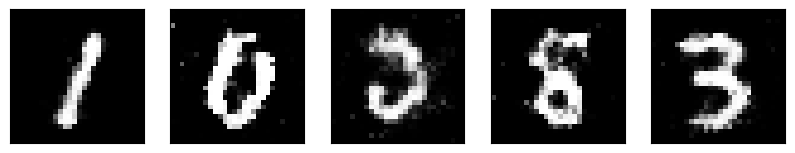

 Epoch: 194 batch: 1 D_loss: 1.260 G_loss: 1.417 
 Epoch: 194 batch: 2 D_loss: 1.177 G_loss: 1.489 
 Epoch: 194 batch: 3 D_loss: 1.198 G_loss: 1.389 
 Epoch: 194 batch: 4 D_loss: 1.213 G_loss: 1.427 
 Epoch: 194 batch: 5 D_loss: 1.263 G_loss: 1.380 
 Epoch: 194 batch: 6 D_loss: 1.345 G_loss: 1.223 
 Epoch: 194 batch: 7 D_loss: 1.277 G_loss: 1.077 
 Epoch: 194 batch: 8 D_loss: 1.368 G_loss: 0.999 
 Epoch: 194 batch: 9 D_loss: 1.369 G_loss: 0.948 
 Epoch: 194 batch: 10 D_loss: 1.233 G_loss: 0.992 
 Epoch: 194 batch: 11 D_loss: 1.304 G_loss: 1.022 
 Epoch: 194 batch: 12 D_loss: 1.324 G_loss: 1.009 
 Epoch: 194 batch: 13 D_loss: 1.324 G_loss: 0.980 
 Epoch: 194 batch: 14 D_loss: 1.284 G_loss: 0.955 
 Epoch: 194 batch: 15 D_loss: 1.314 G_loss: 0.942 
 Epoch: 194 batch: 16 D_loss: 1.326 G_loss: 0.863 
 Epoch: 194 batch: 17 D_loss: 1.288 G_loss: 0.857 
 Epoch: 194 batch: 18 D_loss: 1.297 G_loss: 0.814 
 Epoch: 194 batch: 19 D_loss: 1.303 G_loss: 0.904 
 Epoch: 194 batch: 20 D_loss: 1.267 G_lo

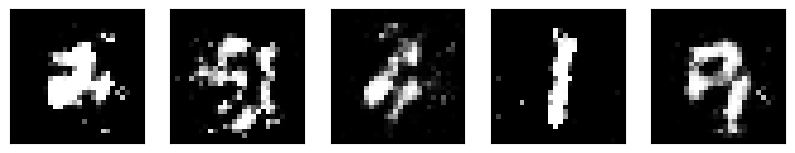

 Epoch: 195 batch: 1 D_loss: 1.244 G_loss: 1.134 
 Epoch: 195 batch: 2 D_loss: 1.212 G_loss: 1.099 
 Epoch: 195 batch: 3 D_loss: 1.146 G_loss: 1.021 
 Epoch: 195 batch: 4 D_loss: 1.168 G_loss: 1.022 
 Epoch: 195 batch: 5 D_loss: 1.201 G_loss: 1.018 
 Epoch: 195 batch: 6 D_loss: 1.260 G_loss: 1.038 
 Epoch: 195 batch: 7 D_loss: 1.207 G_loss: 1.134 
 Epoch: 195 batch: 8 D_loss: 1.285 G_loss: 1.178 
 Epoch: 195 batch: 9 D_loss: 1.247 G_loss: 1.196 
 Epoch: 195 batch: 10 D_loss: 1.199 G_loss: 1.199 
 Epoch: 195 batch: 11 D_loss: 1.234 G_loss: 1.210 
 Epoch: 195 batch: 12 D_loss: 1.173 G_loss: 1.199 
 Epoch: 195 batch: 13 D_loss: 1.164 G_loss: 1.225 
 Epoch: 195 batch: 14 D_loss: 1.268 G_loss: 1.146 
 Epoch: 195 batch: 15 D_loss: 1.264 G_loss: 1.218 
 Epoch: 195 batch: 16 D_loss: 1.222 G_loss: 1.179 
 Epoch: 195 batch: 17 D_loss: 1.253 G_loss: 1.115 
 Epoch: 195 batch: 18 D_loss: 1.280 G_loss: 1.161 
 Epoch: 195 batch: 19 D_loss: 1.336 G_loss: 1.090 
 Epoch: 195 batch: 20 D_loss: 1.293 G_lo

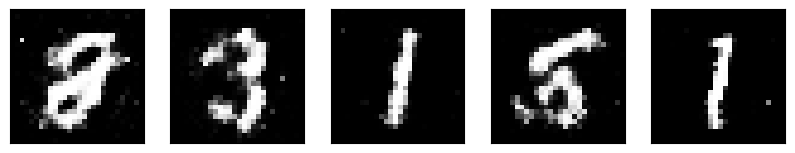

 Epoch: 196 batch: 1 D_loss: 1.264 G_loss: 1.082 
 Epoch: 196 batch: 2 D_loss: 1.245 G_loss: 1.055 
 Epoch: 196 batch: 3 D_loss: 1.308 G_loss: 1.047 
 Epoch: 196 batch: 4 D_loss: 1.254 G_loss: 1.072 
 Epoch: 196 batch: 5 D_loss: 1.301 G_loss: 0.966 
 Epoch: 196 batch: 6 D_loss: 1.313 G_loss: 0.974 
 Epoch: 196 batch: 7 D_loss: 1.256 G_loss: 0.988 
 Epoch: 196 batch: 8 D_loss: 1.336 G_loss: 0.996 
 Epoch: 196 batch: 9 D_loss: 1.327 G_loss: 1.046 
 Epoch: 196 batch: 10 D_loss: 1.259 G_loss: 1.049 
 Epoch: 196 batch: 11 D_loss: 1.309 G_loss: 1.053 
 Epoch: 196 batch: 12 D_loss: 1.258 G_loss: 1.062 
 Epoch: 196 batch: 13 D_loss: 1.266 G_loss: 1.028 
 Epoch: 196 batch: 14 D_loss: 1.226 G_loss: 0.982 
 Epoch: 196 batch: 15 D_loss: 1.309 G_loss: 1.005 
 Epoch: 196 batch: 16 D_loss: 1.268 G_loss: 0.957 
 Epoch: 196 batch: 17 D_loss: 1.275 G_loss: 0.939 
 Epoch: 196 batch: 18 D_loss: 1.238 G_loss: 0.958 
 Epoch: 196 batch: 19 D_loss: 1.301 G_loss: 0.936 
 Epoch: 196 batch: 20 D_loss: 1.287 G_lo

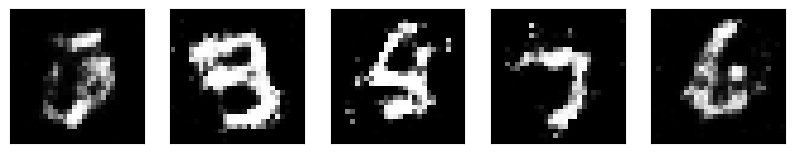

 Epoch: 197 batch: 1 D_loss: 1.253 G_loss: 1.090 
 Epoch: 197 batch: 2 D_loss: 1.229 G_loss: 1.137 
 Epoch: 197 batch: 3 D_loss: 1.214 G_loss: 1.120 
 Epoch: 197 batch: 4 D_loss: 1.186 G_loss: 1.087 
 Epoch: 197 batch: 5 D_loss: 1.291 G_loss: 1.172 
 Epoch: 197 batch: 6 D_loss: 1.255 G_loss: 1.138 
 Epoch: 197 batch: 7 D_loss: 1.211 G_loss: 1.118 
 Epoch: 197 batch: 8 D_loss: 1.298 G_loss: 1.102 
 Epoch: 197 batch: 9 D_loss: 1.300 G_loss: 1.122 
 Epoch: 197 batch: 10 D_loss: 1.187 G_loss: 1.056 
 Epoch: 197 batch: 11 D_loss: 1.198 G_loss: 1.092 
 Epoch: 197 batch: 12 D_loss: 1.165 G_loss: 1.121 
 Epoch: 197 batch: 13 D_loss: 1.192 G_loss: 1.195 
 Epoch: 197 batch: 14 D_loss: 1.154 G_loss: 1.170 
 Epoch: 197 batch: 15 D_loss: 1.231 G_loss: 1.236 
 Epoch: 197 batch: 16 D_loss: 1.205 G_loss: 1.296 
 Epoch: 197 batch: 17 D_loss: 1.202 G_loss: 1.278 
 Epoch: 197 batch: 18 D_loss: 1.278 G_loss: 1.184 
 Epoch: 197 batch: 19 D_loss: 1.324 G_loss: 1.244 
 Epoch: 197 batch: 20 D_loss: 1.266 G_lo

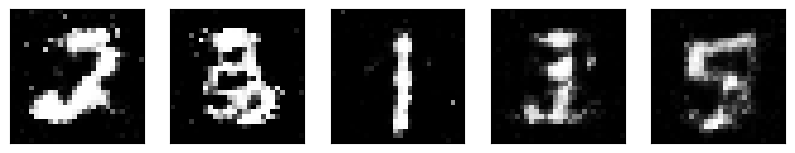

 Epoch: 198 batch: 1 D_loss: 1.342 G_loss: 1.169 
 Epoch: 198 batch: 2 D_loss: 1.288 G_loss: 1.034 
 Epoch: 198 batch: 3 D_loss: 1.319 G_loss: 0.921 
 Epoch: 198 batch: 4 D_loss: 1.281 G_loss: 0.934 
 Epoch: 198 batch: 5 D_loss: 1.340 G_loss: 0.972 
 Epoch: 198 batch: 6 D_loss: 1.342 G_loss: 0.996 
 Epoch: 198 batch: 7 D_loss: 1.289 G_loss: 1.001 
 Epoch: 198 batch: 8 D_loss: 1.322 G_loss: 0.966 
 Epoch: 198 batch: 9 D_loss: 1.332 G_loss: 0.927 
 Epoch: 198 batch: 10 D_loss: 1.305 G_loss: 0.920 
 Epoch: 198 batch: 11 D_loss: 1.283 G_loss: 0.886 
 Epoch: 198 batch: 12 D_loss: 1.318 G_loss: 0.908 
 Epoch: 198 batch: 13 D_loss: 1.268 G_loss: 0.933 
 Epoch: 198 batch: 14 D_loss: 1.230 G_loss: 0.983 
 Epoch: 198 batch: 15 D_loss: 1.257 G_loss: 1.050 
 Epoch: 198 batch: 16 D_loss: 1.256 G_loss: 1.128 
 Epoch: 198 batch: 17 D_loss: 1.225 G_loss: 1.092 
 Epoch: 198 batch: 18 D_loss: 1.200 G_loss: 0.990 
 Epoch: 198 batch: 19 D_loss: 1.247 G_loss: 1.095 
 Epoch: 198 batch: 20 D_loss: 1.215 G_lo

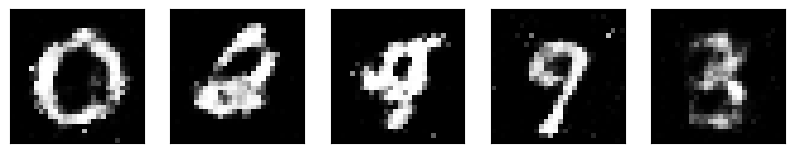

 Epoch: 199 batch: 1 D_loss: 1.352 G_loss: 1.242 
 Epoch: 199 batch: 2 D_loss: 1.316 G_loss: 1.114 
 Epoch: 199 batch: 3 D_loss: 1.262 G_loss: 1.098 
 Epoch: 199 batch: 4 D_loss: 1.266 G_loss: 1.056 
 Epoch: 199 batch: 5 D_loss: 1.350 G_loss: 1.074 
 Epoch: 199 batch: 6 D_loss: 1.295 G_loss: 0.996 
 Epoch: 199 batch: 7 D_loss: 1.317 G_loss: 0.961 
 Epoch: 199 batch: 8 D_loss: 1.389 G_loss: 0.950 
 Epoch: 199 batch: 9 D_loss: 1.364 G_loss: 0.938 
 Epoch: 199 batch: 10 D_loss: 1.271 G_loss: 0.950 
 Epoch: 199 batch: 11 D_loss: 1.353 G_loss: 0.904 
 Epoch: 199 batch: 12 D_loss: 1.271 G_loss: 0.956 
 Epoch: 199 batch: 13 D_loss: 1.270 G_loss: 0.978 
 Epoch: 199 batch: 14 D_loss: 1.248 G_loss: 0.986 
 Epoch: 199 batch: 15 D_loss: 1.265 G_loss: 0.962 
 Epoch: 199 batch: 16 D_loss: 1.283 G_loss: 0.923 
 Epoch: 199 batch: 17 D_loss: 1.223 G_loss: 0.952 
 Epoch: 199 batch: 18 D_loss: 1.238 G_loss: 0.922 
 Epoch: 199 batch: 19 D_loss: 1.277 G_loss: 0.974 
 Epoch: 199 batch: 20 D_loss: 1.239 G_lo

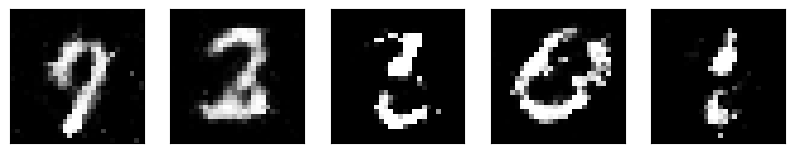

 Epoch: 200 batch: 1 D_loss: 1.262 G_loss: 1.100 
 Epoch: 200 batch: 2 D_loss: 1.246 G_loss: 1.129 
 Epoch: 200 batch: 3 D_loss: 1.229 G_loss: 1.051 
 Epoch: 200 batch: 4 D_loss: 1.231 G_loss: 1.026 
 Epoch: 200 batch: 5 D_loss: 1.296 G_loss: 1.042 
 Epoch: 200 batch: 6 D_loss: 1.258 G_loss: 0.976 
 Epoch: 200 batch: 7 D_loss: 1.252 G_loss: 0.970 
 Epoch: 200 batch: 8 D_loss: 1.284 G_loss: 0.971 
 Epoch: 200 batch: 9 D_loss: 1.295 G_loss: 0.992 
 Epoch: 200 batch: 10 D_loss: 1.196 G_loss: 1.000 
 Epoch: 200 batch: 11 D_loss: 1.270 G_loss: 1.085 
 Epoch: 200 batch: 12 D_loss: 1.207 G_loss: 1.101 
 Epoch: 200 batch: 13 D_loss: 1.192 G_loss: 1.120 
 Epoch: 200 batch: 14 D_loss: 1.237 G_loss: 1.164 
 Epoch: 200 batch: 15 D_loss: 1.232 G_loss: 1.108 
 Epoch: 200 batch: 16 D_loss: 1.245 G_loss: 1.182 
 Epoch: 200 batch: 17 D_loss: 1.229 G_loss: 1.118 
 Epoch: 200 batch: 18 D_loss: 1.209 G_loss: 1.163 
 Epoch: 200 batch: 19 D_loss: 1.267 G_loss: 1.097 
 Epoch: 200 batch: 20 D_loss: 1.213 G_lo

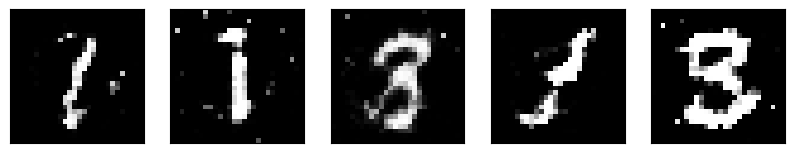

 Epoch: 201 batch: 1 D_loss: 1.242 G_loss: 1.292 
 Epoch: 201 batch: 2 D_loss: 1.248 G_loss: 1.288 
 Epoch: 201 batch: 3 D_loss: 1.228 G_loss: 1.205 
 Epoch: 201 batch: 4 D_loss: 1.200 G_loss: 1.148 
 Epoch: 201 batch: 5 D_loss: 1.292 G_loss: 1.106 
 Epoch: 201 batch: 6 D_loss: 1.280 G_loss: 1.085 
 Epoch: 201 batch: 7 D_loss: 1.239 G_loss: 1.054 
 Epoch: 201 batch: 8 D_loss: 1.301 G_loss: 1.156 
 Epoch: 201 batch: 9 D_loss: 1.389 G_loss: 1.162 
 Epoch: 201 batch: 10 D_loss: 1.228 G_loss: 1.125 
 Epoch: 201 batch: 11 D_loss: 1.278 G_loss: 1.098 
 Epoch: 201 batch: 12 D_loss: 1.299 G_loss: 1.138 
 Epoch: 201 batch: 13 D_loss: 1.252 G_loss: 1.108 
 Epoch: 201 batch: 14 D_loss: 1.264 G_loss: 1.020 
 Epoch: 201 batch: 15 D_loss: 1.247 G_loss: 0.995 
 Epoch: 201 batch: 16 D_loss: 1.237 G_loss: 1.024 
 Epoch: 201 batch: 17 D_loss: 1.269 G_loss: 1.014 
 Epoch: 201 batch: 18 D_loss: 1.241 G_loss: 1.059 
 Epoch: 201 batch: 19 D_loss: 1.242 G_loss: 1.107 
 Epoch: 201 batch: 20 D_loss: 1.226 G_lo

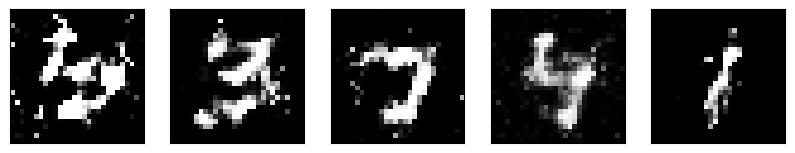

 Epoch: 202 batch: 1 D_loss: 1.292 G_loss: 1.035 
 Epoch: 202 batch: 2 D_loss: 1.275 G_loss: 1.017 
 Epoch: 202 batch: 3 D_loss: 1.237 G_loss: 0.948 
 Epoch: 202 batch: 4 D_loss: 1.275 G_loss: 0.952 
 Epoch: 202 batch: 5 D_loss: 1.334 G_loss: 0.944 
 Epoch: 202 batch: 6 D_loss: 1.316 G_loss: 0.954 
 Epoch: 202 batch: 7 D_loss: 1.272 G_loss: 0.934 
 Epoch: 202 batch: 8 D_loss: 1.322 G_loss: 0.897 
 Epoch: 202 batch: 9 D_loss: 1.296 G_loss: 0.946 
 Epoch: 202 batch: 10 D_loss: 1.237 G_loss: 0.941 
 Epoch: 202 batch: 11 D_loss: 1.270 G_loss: 0.967 
 Epoch: 202 batch: 12 D_loss: 1.251 G_loss: 0.916 
 Epoch: 202 batch: 13 D_loss: 1.237 G_loss: 0.963 
 Epoch: 202 batch: 14 D_loss: 1.199 G_loss: 1.007 
 Epoch: 202 batch: 15 D_loss: 1.207 G_loss: 1.068 
 Epoch: 202 batch: 16 D_loss: 1.190 G_loss: 1.167 
 Epoch: 202 batch: 17 D_loss: 1.179 G_loss: 1.318 
 Epoch: 202 batch: 18 D_loss: 1.158 G_loss: 1.556 
 Epoch: 202 batch: 19 D_loss: 1.172 G_loss: 1.907 
 Epoch: 202 batch: 20 D_loss: 1.208 G_lo

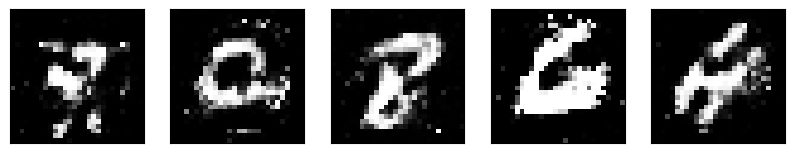

 Epoch: 203 batch: 1 D_loss: 1.272 G_loss: 1.194 
 Epoch: 203 batch: 2 D_loss: 1.243 G_loss: 1.144 
 Epoch: 203 batch: 3 D_loss: 1.237 G_loss: 1.204 
 Epoch: 203 batch: 4 D_loss: 1.267 G_loss: 1.203 
 Epoch: 203 batch: 5 D_loss: 1.253 G_loss: 1.224 
 Epoch: 203 batch: 6 D_loss: 1.234 G_loss: 1.209 
 Epoch: 203 batch: 7 D_loss: 1.269 G_loss: 1.175 
 Epoch: 203 batch: 8 D_loss: 1.383 G_loss: 1.332 
 Epoch: 203 batch: 9 D_loss: 1.324 G_loss: 1.229 
 Epoch: 203 batch: 10 D_loss: 1.281 G_loss: 1.028 
 Epoch: 203 batch: 11 D_loss: 1.326 G_loss: 1.016 
 Epoch: 203 batch: 12 D_loss: 1.284 G_loss: 1.027 
 Epoch: 203 batch: 13 D_loss: 1.275 G_loss: 1.084 
 Epoch: 203 batch: 14 D_loss: 1.263 G_loss: 1.083 
 Epoch: 203 batch: 15 D_loss: 1.331 G_loss: 1.041 
 Epoch: 203 batch: 16 D_loss: 1.311 G_loss: 1.011 
 Epoch: 203 batch: 17 D_loss: 1.295 G_loss: 0.970 
 Epoch: 203 batch: 18 D_loss: 1.280 G_loss: 0.957 
 Epoch: 203 batch: 19 D_loss: 1.287 G_loss: 0.995 
 Epoch: 203 batch: 20 D_loss: 1.294 G_lo

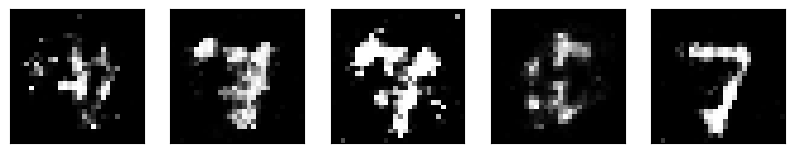

 Epoch: 204 batch: 1 D_loss: 1.293 G_loss: 1.187 
 Epoch: 204 batch: 2 D_loss: 1.217 G_loss: 1.191 
 Epoch: 204 batch: 3 D_loss: 1.239 G_loss: 1.168 
 Epoch: 204 batch: 4 D_loss: 1.257 G_loss: 1.136 
 Epoch: 204 batch: 5 D_loss: 1.307 G_loss: 1.200 
 Epoch: 204 batch: 6 D_loss: 1.301 G_loss: 1.206 
 Epoch: 204 batch: 7 D_loss: 1.247 G_loss: 1.159 
 Epoch: 204 batch: 8 D_loss: 1.285 G_loss: 1.177 
 Epoch: 204 batch: 9 D_loss: 1.205 G_loss: 1.153 
 Epoch: 204 batch: 10 D_loss: 1.193 G_loss: 1.203 
 Epoch: 204 batch: 11 D_loss: 1.248 G_loss: 1.094 
 Epoch: 204 batch: 12 D_loss: 1.169 G_loss: 1.247 
 Epoch: 204 batch: 13 D_loss: 1.201 G_loss: 1.455 
 Epoch: 204 batch: 14 D_loss: 1.256 G_loss: 1.426 
 Epoch: 204 batch: 15 D_loss: 1.209 G_loss: 1.325 
 Epoch: 204 batch: 16 D_loss: 1.189 G_loss: 1.389 
 Epoch: 204 batch: 17 D_loss: 1.223 G_loss: 1.271 
 Epoch: 204 batch: 18 D_loss: 1.197 G_loss: 1.311 
 Epoch: 204 batch: 19 D_loss: 1.240 G_loss: 1.233 
 Epoch: 204 batch: 20 D_loss: 1.250 G_lo

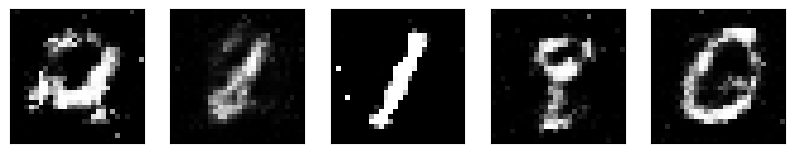

 Epoch: 205 batch: 1 D_loss: 1.258 G_loss: 0.992 
 Epoch: 205 batch: 2 D_loss: 1.282 G_loss: 0.965 
 Epoch: 205 batch: 3 D_loss: 1.217 G_loss: 0.980 
 Epoch: 205 batch: 4 D_loss: 1.234 G_loss: 0.985 
 Epoch: 205 batch: 5 D_loss: 1.327 G_loss: 1.063 
 Epoch: 205 batch: 6 D_loss: 1.230 G_loss: 1.050 
 Epoch: 205 batch: 7 D_loss: 1.193 G_loss: 1.178 
 Epoch: 205 batch: 8 D_loss: 1.294 G_loss: 1.343 
 Epoch: 205 batch: 9 D_loss: 1.246 G_loss: 1.425 
 Epoch: 205 batch: 10 D_loss: 1.164 G_loss: 1.520 
 Epoch: 205 batch: 11 D_loss: 1.282 G_loss: 1.425 
 Epoch: 205 batch: 12 D_loss: 1.273 G_loss: 1.465 
 Epoch: 205 batch: 13 D_loss: 1.284 G_loss: 1.292 
 Epoch: 205 batch: 14 D_loss: 1.294 G_loss: 1.367 
 Epoch: 205 batch: 15 D_loss: 1.272 G_loss: 1.110 
 Epoch: 205 batch: 16 D_loss: 1.284 G_loss: 1.158 
 Epoch: 205 batch: 17 D_loss: 1.282 G_loss: 1.085 
 Epoch: 205 batch: 18 D_loss: 1.355 G_loss: 1.055 
 Epoch: 205 batch: 19 D_loss: 1.326 G_loss: 1.016 
 Epoch: 205 batch: 20 D_loss: 1.310 G_lo

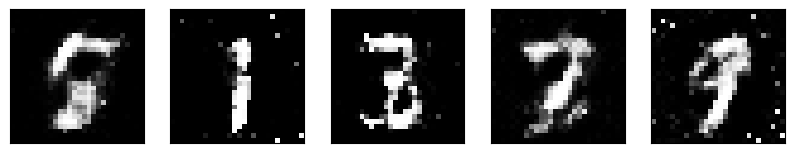

 Epoch: 206 batch: 1 D_loss: 1.235 G_loss: 1.023 
 Epoch: 206 batch: 2 D_loss: 1.227 G_loss: 0.979 
 Epoch: 206 batch: 3 D_loss: 1.238 G_loss: 0.994 
 Epoch: 206 batch: 4 D_loss: 1.162 G_loss: 1.013 
 Epoch: 206 batch: 5 D_loss: 1.269 G_loss: 1.105 
 Epoch: 206 batch: 6 D_loss: 1.261 G_loss: 1.114 
 Epoch: 206 batch: 7 D_loss: 1.202 G_loss: 1.137 
 Epoch: 206 batch: 8 D_loss: 1.223 G_loss: 1.226 
 Epoch: 206 batch: 9 D_loss: 1.249 G_loss: 1.240 
 Epoch: 206 batch: 10 D_loss: 1.142 G_loss: 1.252 
 Epoch: 206 batch: 11 D_loss: 1.239 G_loss: 1.269 
 Epoch: 206 batch: 12 D_loss: 1.209 G_loss: 1.303 
 Epoch: 206 batch: 13 D_loss: 1.235 G_loss: 1.403 
 Epoch: 206 batch: 14 D_loss: 1.187 G_loss: 1.402 
 Epoch: 206 batch: 15 D_loss: 1.215 G_loss: 1.263 
 Epoch: 206 batch: 16 D_loss: 1.223 G_loss: 1.354 
 Epoch: 206 batch: 17 D_loss: 1.141 G_loss: 1.220 
 Epoch: 206 batch: 18 D_loss: 1.232 G_loss: 1.265 
 Epoch: 206 batch: 19 D_loss: 1.200 G_loss: 1.292 
 Epoch: 206 batch: 20 D_loss: 1.263 G_lo

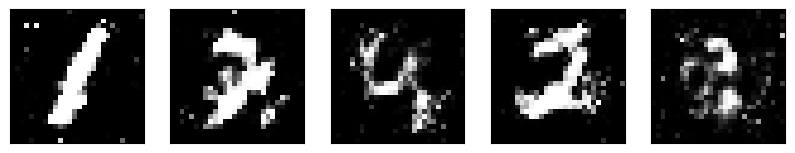

 Epoch: 207 batch: 1 D_loss: 1.369 G_loss: 1.157 
 Epoch: 207 batch: 2 D_loss: 1.284 G_loss: 1.141 
 Epoch: 207 batch: 3 D_loss: 1.231 G_loss: 1.083 
 Epoch: 207 batch: 4 D_loss: 1.238 G_loss: 1.059 
 Epoch: 207 batch: 5 D_loss: 1.279 G_loss: 0.997 
 Epoch: 207 batch: 6 D_loss: 1.289 G_loss: 0.962 
 Epoch: 207 batch: 7 D_loss: 1.254 G_loss: 0.957 
 Epoch: 207 batch: 8 D_loss: 1.312 G_loss: 0.932 
 Epoch: 207 batch: 9 D_loss: 1.354 G_loss: 0.917 
 Epoch: 207 batch: 10 D_loss: 1.216 G_loss: 0.930 
 Epoch: 207 batch: 11 D_loss: 1.292 G_loss: 0.984 
 Epoch: 207 batch: 12 D_loss: 1.289 G_loss: 0.970 
 Epoch: 207 batch: 13 D_loss: 1.239 G_loss: 0.976 
 Epoch: 207 batch: 14 D_loss: 1.279 G_loss: 0.966 
 Epoch: 207 batch: 15 D_loss: 1.292 G_loss: 0.946 
 Epoch: 207 batch: 16 D_loss: 1.281 G_loss: 0.968 
 Epoch: 207 batch: 17 D_loss: 1.205 G_loss: 0.969 
 Epoch: 207 batch: 18 D_loss: 1.244 G_loss: 0.999 
 Epoch: 207 batch: 19 D_loss: 1.260 G_loss: 1.005 
 Epoch: 207 batch: 20 D_loss: 1.301 G_lo

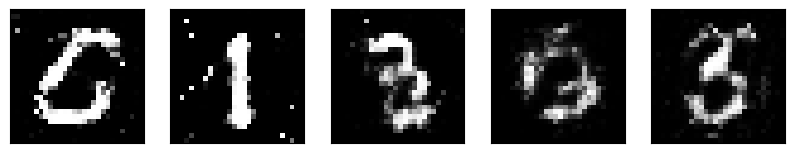

 Epoch: 208 batch: 1 D_loss: 1.293 G_loss: 1.022 
 Epoch: 208 batch: 2 D_loss: 1.295 G_loss: 1.029 
 Epoch: 208 batch: 3 D_loss: 1.287 G_loss: 1.008 
 Epoch: 208 batch: 4 D_loss: 1.247 G_loss: 0.966 
 Epoch: 208 batch: 5 D_loss: 1.318 G_loss: 0.930 
 Epoch: 208 batch: 6 D_loss: 1.319 G_loss: 0.941 
 Epoch: 208 batch: 7 D_loss: 1.268 G_loss: 0.936 
 Epoch: 208 batch: 8 D_loss: 1.318 G_loss: 0.913 
 Epoch: 208 batch: 9 D_loss: 1.292 G_loss: 0.945 
 Epoch: 208 batch: 10 D_loss: 1.298 G_loss: 0.956 
 Epoch: 208 batch: 11 D_loss: 1.274 G_loss: 0.993 
 Epoch: 208 batch: 12 D_loss: 1.273 G_loss: 0.965 
 Epoch: 208 batch: 13 D_loss: 1.270 G_loss: 0.976 
 Epoch: 208 batch: 14 D_loss: 1.241 G_loss: 0.967 
 Epoch: 208 batch: 15 D_loss: 1.260 G_loss: 0.982 
 Epoch: 208 batch: 16 D_loss: 1.296 G_loss: 0.961 
 Epoch: 208 batch: 17 D_loss: 1.245 G_loss: 1.025 
 Epoch: 208 batch: 18 D_loss: 1.303 G_loss: 1.084 
 Epoch: 208 batch: 19 D_loss: 1.240 G_loss: 1.168 
 Epoch: 208 batch: 20 D_loss: 1.305 G_lo

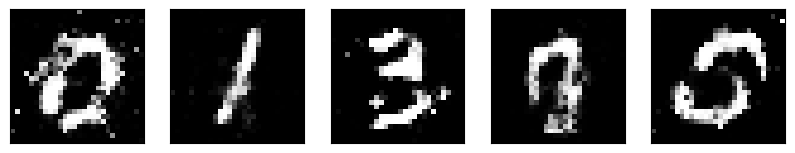

 Epoch: 209 batch: 1 D_loss: 1.238 G_loss: 1.169 
 Epoch: 209 batch: 2 D_loss: 1.216 G_loss: 1.103 
 Epoch: 209 batch: 3 D_loss: 1.233 G_loss: 1.124 
 Epoch: 209 batch: 4 D_loss: 1.259 G_loss: 1.115 
 Epoch: 209 batch: 5 D_loss: 1.251 G_loss: 1.147 
 Epoch: 209 batch: 6 D_loss: 1.325 G_loss: 1.186 
 Epoch: 209 batch: 7 D_loss: 1.177 G_loss: 1.162 
 Epoch: 209 batch: 8 D_loss: 1.306 G_loss: 1.202 
 Epoch: 209 batch: 9 D_loss: 1.333 G_loss: 1.187 
 Epoch: 209 batch: 10 D_loss: 1.235 G_loss: 1.127 
 Epoch: 209 batch: 11 D_loss: 1.309 G_loss: 1.042 
 Epoch: 209 batch: 12 D_loss: 1.337 G_loss: 0.977 
 Epoch: 209 batch: 13 D_loss: 1.300 G_loss: 0.932 
 Epoch: 209 batch: 14 D_loss: 1.274 G_loss: 0.925 
 Epoch: 209 batch: 15 D_loss: 1.304 G_loss: 0.982 
 Epoch: 209 batch: 16 D_loss: 1.293 G_loss: 0.985 
 Epoch: 209 batch: 17 D_loss: 1.300 G_loss: 1.019 
 Epoch: 209 batch: 18 D_loss: 1.298 G_loss: 1.007 
 Epoch: 209 batch: 19 D_loss: 1.303 G_loss: 0.972 
 Epoch: 209 batch: 20 D_loss: 1.325 G_lo

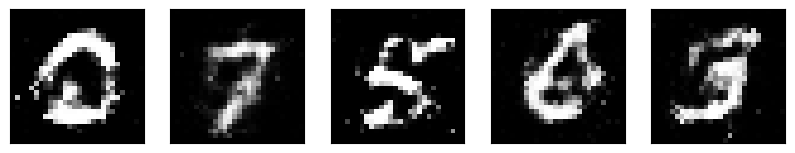

 Epoch: 210 batch: 1 D_loss: 1.239 G_loss: 1.155 
 Epoch: 210 batch: 2 D_loss: 1.220 G_loss: 1.195 
 Epoch: 210 batch: 3 D_loss: 1.267 G_loss: 1.177 
 Epoch: 210 batch: 4 D_loss: 1.245 G_loss: 1.113 
 Epoch: 210 batch: 5 D_loss: 1.325 G_loss: 1.092 
 Epoch: 210 batch: 6 D_loss: 1.266 G_loss: 1.105 
 Epoch: 210 batch: 7 D_loss: 1.253 G_loss: 1.155 
 Epoch: 210 batch: 8 D_loss: 1.349 G_loss: 1.163 
 Epoch: 210 batch: 9 D_loss: 1.307 G_loss: 1.085 
 Epoch: 210 batch: 10 D_loss: 1.175 G_loss: 0.992 
 Epoch: 210 batch: 11 D_loss: 1.278 G_loss: 1.014 
 Epoch: 210 batch: 12 D_loss: 1.276 G_loss: 0.960 
 Epoch: 210 batch: 13 D_loss: 1.222 G_loss: 0.996 
 Epoch: 210 batch: 14 D_loss: 1.256 G_loss: 1.089 
 Epoch: 210 batch: 15 D_loss: 1.272 G_loss: 1.104 
 Epoch: 210 batch: 16 D_loss: 1.279 G_loss: 1.195 
 Epoch: 210 batch: 17 D_loss: 1.253 G_loss: 1.224 
 Epoch: 210 batch: 18 D_loss: 1.252 G_loss: 1.244 
 Epoch: 210 batch: 19 D_loss: 1.296 G_loss: 1.191 
 Epoch: 210 batch: 20 D_loss: 1.373 G_lo

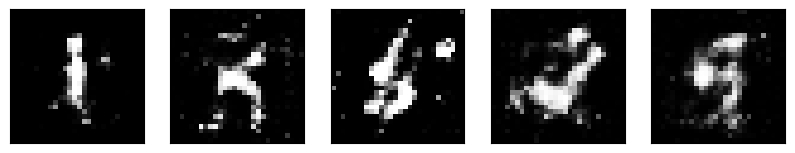

 Epoch: 211 batch: 1 D_loss: 1.318 G_loss: 1.082 
 Epoch: 211 batch: 2 D_loss: 1.317 G_loss: 1.046 
 Epoch: 211 batch: 3 D_loss: 1.294 G_loss: 0.962 
 Epoch: 211 batch: 4 D_loss: 1.289 G_loss: 0.949 
 Epoch: 211 batch: 5 D_loss: 1.326 G_loss: 0.946 
 Epoch: 211 batch: 6 D_loss: 1.320 G_loss: 1.010 
 Epoch: 211 batch: 7 D_loss: 1.280 G_loss: 0.989 
 Epoch: 211 batch: 8 D_loss: 1.315 G_loss: 0.956 
 Epoch: 211 batch: 9 D_loss: 1.259 G_loss: 0.949 
 Epoch: 211 batch: 10 D_loss: 1.239 G_loss: 1.025 
 Epoch: 211 batch: 11 D_loss: 1.275 G_loss: 0.968 
 Epoch: 211 batch: 12 D_loss: 1.268 G_loss: 1.059 
 Epoch: 211 batch: 13 D_loss: 1.235 G_loss: 1.109 
 Epoch: 211 batch: 14 D_loss: 1.245 G_loss: 1.246 
 Epoch: 211 batch: 15 D_loss: 1.260 G_loss: 1.243 
 Epoch: 211 batch: 16 D_loss: 1.204 G_loss: 1.247 
 Epoch: 211 batch: 17 D_loss: 1.184 G_loss: 1.221 
 Epoch: 211 batch: 18 D_loss: 1.235 G_loss: 1.242 
 Epoch: 211 batch: 19 D_loss: 1.148 G_loss: 1.220 
 Epoch: 211 batch: 20 D_loss: 1.226 G_lo

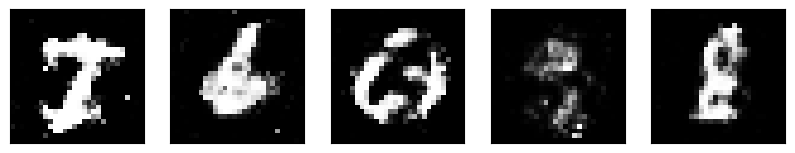

 Epoch: 212 batch: 1 D_loss: 1.240 G_loss: 1.151 
 Epoch: 212 batch: 2 D_loss: 1.173 G_loss: 1.175 
 Epoch: 212 batch: 3 D_loss: 1.088 G_loss: 1.332 
 Epoch: 212 batch: 4 D_loss: 1.195 G_loss: 1.422 
 Epoch: 212 batch: 5 D_loss: 1.212 G_loss: 1.433 
 Epoch: 212 batch: 6 D_loss: 1.231 G_loss: 1.456 
 Epoch: 212 batch: 7 D_loss: 1.239 G_loss: 1.404 
 Epoch: 212 batch: 8 D_loss: 1.323 G_loss: 1.119 
 Epoch: 212 batch: 9 D_loss: 1.317 G_loss: 1.084 
 Epoch: 212 batch: 10 D_loss: 1.204 G_loss: 1.118 
 Epoch: 212 batch: 11 D_loss: 1.325 G_loss: 1.140 
 Epoch: 212 batch: 12 D_loss: 1.255 G_loss: 1.183 
 Epoch: 212 batch: 13 D_loss: 1.231 G_loss: 1.218 
 Epoch: 212 batch: 14 D_loss: 1.251 G_loss: 1.150 
 Epoch: 212 batch: 15 D_loss: 1.298 G_loss: 1.109 
 Epoch: 212 batch: 16 D_loss: 1.273 G_loss: 1.003 
 Epoch: 212 batch: 17 D_loss: 1.250 G_loss: 0.968 
 Epoch: 212 batch: 18 D_loss: 1.299 G_loss: 0.909 
 Epoch: 212 batch: 19 D_loss: 1.299 G_loss: 0.910 
 Epoch: 212 batch: 20 D_loss: 1.299 G_lo

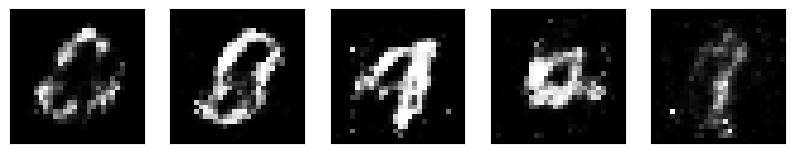

 Epoch: 213 batch: 1 D_loss: 1.232 G_loss: 0.918 
 Epoch: 213 batch: 2 D_loss: 1.263 G_loss: 0.991 
 Epoch: 213 batch: 3 D_loss: 1.229 G_loss: 1.017 
 Epoch: 213 batch: 4 D_loss: 1.204 G_loss: 1.084 
 Epoch: 213 batch: 5 D_loss: 1.248 G_loss: 1.177 
 Epoch: 213 batch: 6 D_loss: 1.232 G_loss: 1.193 
 Epoch: 213 batch: 7 D_loss: 1.216 G_loss: 1.282 
 Epoch: 213 batch: 8 D_loss: 1.279 G_loss: 1.555 
 Epoch: 213 batch: 9 D_loss: 1.226 G_loss: 1.404 
 Epoch: 213 batch: 10 D_loss: 1.230 G_loss: 1.510 
 Epoch: 213 batch: 11 D_loss: 1.239 G_loss: 1.454 
 Epoch: 213 batch: 12 D_loss: 1.178 G_loss: 1.129 
 Epoch: 213 batch: 13 D_loss: 1.267 G_loss: 1.040 
 Epoch: 213 batch: 14 D_loss: 1.284 G_loss: 1.085 
 Epoch: 213 batch: 15 D_loss: 1.245 G_loss: 1.158 
 Epoch: 213 batch: 16 D_loss: 1.266 G_loss: 1.092 
 Epoch: 213 batch: 17 D_loss: 1.291 G_loss: 1.087 
 Epoch: 213 batch: 18 D_loss: 1.245 G_loss: 1.037 
 Epoch: 213 batch: 19 D_loss: 1.252 G_loss: 0.998 
 Epoch: 213 batch: 20 D_loss: 1.315 G_lo

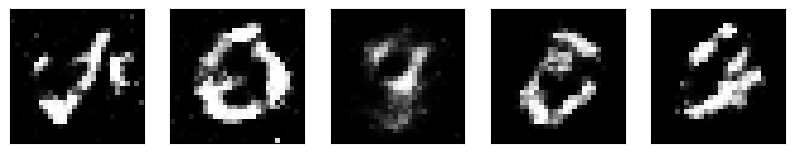

 Epoch: 214 batch: 1 D_loss: 1.272 G_loss: 1.133 
 Epoch: 214 batch: 2 D_loss: 1.239 G_loss: 1.069 
 Epoch: 214 batch: 3 D_loss: 1.211 G_loss: 1.075 
 Epoch: 214 batch: 4 D_loss: 1.247 G_loss: 1.068 
 Epoch: 214 batch: 5 D_loss: 1.334 G_loss: 1.149 
 Epoch: 214 batch: 6 D_loss: 1.334 G_loss: 1.155 
 Epoch: 214 batch: 7 D_loss: 1.307 G_loss: 1.105 
 Epoch: 214 batch: 8 D_loss: 1.352 G_loss: 1.124 
 Epoch: 214 batch: 9 D_loss: 1.382 G_loss: 1.035 
 Epoch: 214 batch: 10 D_loss: 1.220 G_loss: 1.016 
 Epoch: 214 batch: 11 D_loss: 1.302 G_loss: 0.968 
 Epoch: 214 batch: 12 D_loss: 1.285 G_loss: 0.889 
 Epoch: 214 batch: 13 D_loss: 1.279 G_loss: 0.872 
 Epoch: 214 batch: 14 D_loss: 1.293 G_loss: 0.862 
 Epoch: 214 batch: 15 D_loss: 1.308 G_loss: 0.914 
 Epoch: 214 batch: 16 D_loss: 1.295 G_loss: 0.914 
 Epoch: 214 batch: 17 D_loss: 1.304 G_loss: 0.922 
 Epoch: 214 batch: 18 D_loss: 1.267 G_loss: 0.937 
 Epoch: 214 batch: 19 D_loss: 1.277 G_loss: 0.934 
 Epoch: 214 batch: 20 D_loss: 1.290 G_lo

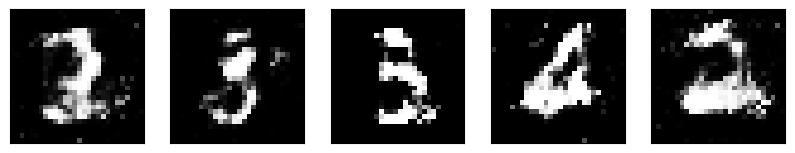

 Epoch: 215 batch: 1 D_loss: 1.299 G_loss: 0.879 
 Epoch: 215 batch: 2 D_loss: 1.302 G_loss: 0.804 
 Epoch: 215 batch: 3 D_loss: 1.320 G_loss: 0.805 
 Epoch: 215 batch: 4 D_loss: 1.320 G_loss: 0.889 
 Epoch: 215 batch: 5 D_loss: 1.360 G_loss: 0.950 
 Epoch: 215 batch: 6 D_loss: 1.359 G_loss: 1.024 
 Epoch: 215 batch: 7 D_loss: 1.325 G_loss: 1.019 
 Epoch: 215 batch: 8 D_loss: 1.374 G_loss: 0.898 
 Epoch: 215 batch: 9 D_loss: 1.323 G_loss: 0.818 
 Epoch: 215 batch: 10 D_loss: 1.295 G_loss: 0.775 
 Epoch: 215 batch: 11 D_loss: 1.330 G_loss: 0.793 
 Epoch: 215 batch: 12 D_loss: 1.315 G_loss: 0.863 
 Epoch: 215 batch: 13 D_loss: 1.332 G_loss: 0.930 
 Epoch: 215 batch: 14 D_loss: 1.298 G_loss: 0.945 
 Epoch: 215 batch: 15 D_loss: 1.297 G_loss: 0.955 
 Epoch: 215 batch: 16 D_loss: 1.310 G_loss: 0.922 
 Epoch: 215 batch: 17 D_loss: 1.247 G_loss: 0.864 
 Epoch: 215 batch: 18 D_loss: 1.271 G_loss: 0.815 
 Epoch: 215 batch: 19 D_loss: 1.301 G_loss: 0.894 
 Epoch: 215 batch: 20 D_loss: 1.248 G_lo

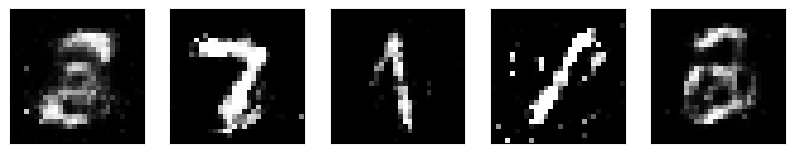

 Epoch: 216 batch: 1 D_loss: 1.238 G_loss: 0.963 
 Epoch: 216 batch: 2 D_loss: 1.288 G_loss: 0.908 
 Epoch: 216 batch: 3 D_loss: 1.281 G_loss: 0.972 
 Epoch: 216 batch: 4 D_loss: 1.238 G_loss: 0.986 
 Epoch: 216 batch: 5 D_loss: 1.276 G_loss: 1.125 
 Epoch: 216 batch: 6 D_loss: 1.315 G_loss: 1.100 
 Epoch: 216 batch: 7 D_loss: 1.254 G_loss: 1.156 
 Epoch: 216 batch: 8 D_loss: 1.311 G_loss: 1.330 
 Epoch: 216 batch: 9 D_loss: 1.310 G_loss: 1.304 
 Epoch: 216 batch: 10 D_loss: 1.158 G_loss: 1.186 
 Epoch: 216 batch: 11 D_loss: 1.245 G_loss: 1.186 
 Epoch: 216 batch: 12 D_loss: 1.317 G_loss: 1.138 
 Epoch: 216 batch: 13 D_loss: 1.258 G_loss: 1.141 
 Epoch: 216 batch: 14 D_loss: 1.258 G_loss: 1.188 
 Epoch: 216 batch: 15 D_loss: 1.222 G_loss: 1.195 
 Epoch: 216 batch: 16 D_loss: 1.251 G_loss: 1.290 
 Epoch: 216 batch: 17 D_loss: 1.268 G_loss: 1.380 
 Epoch: 216 batch: 18 D_loss: 1.318 G_loss: 1.244 
 Epoch: 216 batch: 19 D_loss: 1.268 G_loss: 1.109 
 Epoch: 216 batch: 20 D_loss: 1.302 G_lo

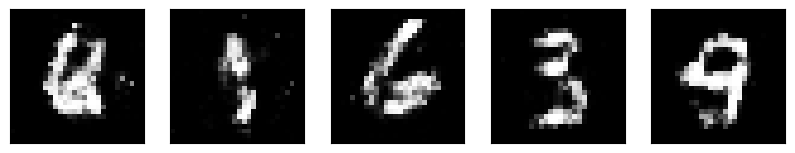

 Epoch: 217 batch: 1 D_loss: 1.242 G_loss: 1.139 
 Epoch: 217 batch: 2 D_loss: 1.315 G_loss: 0.984 
 Epoch: 217 batch: 3 D_loss: 1.251 G_loss: 1.004 
 Epoch: 217 batch: 4 D_loss: 1.271 G_loss: 0.974 
 Epoch: 217 batch: 5 D_loss: 1.305 G_loss: 0.944 
 Epoch: 217 batch: 6 D_loss: 1.285 G_loss: 0.962 
 Epoch: 217 batch: 7 D_loss: 1.274 G_loss: 0.915 
 Epoch: 217 batch: 8 D_loss: 1.315 G_loss: 0.904 
 Epoch: 217 batch: 9 D_loss: 1.304 G_loss: 0.866 
 Epoch: 217 batch: 10 D_loss: 1.243 G_loss: 0.864 
 Epoch: 217 batch: 11 D_loss: 1.246 G_loss: 0.884 
 Epoch: 217 batch: 12 D_loss: 1.225 G_loss: 0.933 
 Epoch: 217 batch: 13 D_loss: 1.212 G_loss: 0.970 
 Epoch: 217 batch: 14 D_loss: 1.207 G_loss: 1.109 
 Epoch: 217 batch: 15 D_loss: 1.152 G_loss: 1.223 
 Epoch: 217 batch: 16 D_loss: 1.176 G_loss: 1.338 
 Epoch: 217 batch: 17 D_loss: 1.201 G_loss: 1.348 
 Epoch: 217 batch: 18 D_loss: 1.130 G_loss: 1.638 
 Epoch: 217 batch: 19 D_loss: 1.126 G_loss: 1.443 
 Epoch: 217 batch: 20 D_loss: 1.165 G_lo

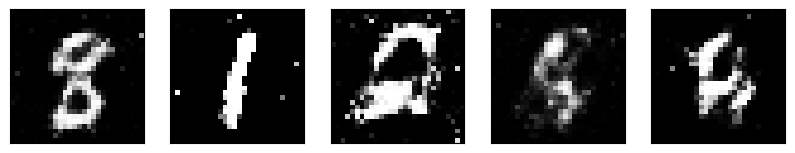

 Epoch: 218 batch: 1 D_loss: 1.213 G_loss: 1.233 
 Epoch: 218 batch: 2 D_loss: 1.223 G_loss: 1.302 
 Epoch: 218 batch: 3 D_loss: 1.242 G_loss: 1.164 
 Epoch: 218 batch: 4 D_loss: 1.239 G_loss: 1.389 
 Epoch: 218 batch: 5 D_loss: 1.276 G_loss: 1.248 
 Epoch: 218 batch: 6 D_loss: 1.298 G_loss: 1.273 
 Epoch: 218 batch: 7 D_loss: 1.222 G_loss: 1.200 
 Epoch: 218 batch: 8 D_loss: 1.310 G_loss: 1.135 
 Epoch: 218 batch: 9 D_loss: 1.287 G_loss: 1.068 
 Epoch: 218 batch: 10 D_loss: 1.238 G_loss: 1.023 
 Epoch: 218 batch: 11 D_loss: 1.323 G_loss: 0.932 
 Epoch: 218 batch: 12 D_loss: 1.281 G_loss: 0.972 
 Epoch: 218 batch: 13 D_loss: 1.248 G_loss: 0.983 
 Epoch: 218 batch: 14 D_loss: 1.207 G_loss: 1.073 
 Epoch: 218 batch: 15 D_loss: 1.211 G_loss: 1.089 
 Epoch: 218 batch: 16 D_loss: 1.218 G_loss: 1.067 
 Epoch: 218 batch: 17 D_loss: 1.199 G_loss: 1.006 
 Epoch: 218 batch: 18 D_loss: 1.199 G_loss: 0.996 
 Epoch: 218 batch: 19 D_loss: 1.233 G_loss: 1.049 
 Epoch: 218 batch: 20 D_loss: 1.201 G_lo

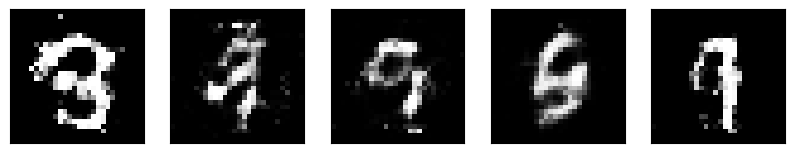

 Epoch: 219 batch: 1 D_loss: 1.256 G_loss: 1.165 
 Epoch: 219 batch: 2 D_loss: 1.295 G_loss: 1.178 
 Epoch: 219 batch: 3 D_loss: 1.237 G_loss: 1.274 
 Epoch: 219 batch: 4 D_loss: 1.263 G_loss: 1.148 
 Epoch: 219 batch: 5 D_loss: 1.274 G_loss: 1.210 
 Epoch: 219 batch: 6 D_loss: 1.251 G_loss: 1.119 
 Epoch: 219 batch: 7 D_loss: 1.244 G_loss: 1.037 
 Epoch: 219 batch: 8 D_loss: 1.335 G_loss: 1.033 
 Epoch: 219 batch: 9 D_loss: 1.275 G_loss: 1.062 
 Epoch: 219 batch: 10 D_loss: 1.220 G_loss: 1.056 
 Epoch: 219 batch: 11 D_loss: 1.237 G_loss: 1.057 
 Epoch: 219 batch: 12 D_loss: 1.258 G_loss: 1.101 
 Epoch: 219 batch: 13 D_loss: 1.235 G_loss: 1.141 
 Epoch: 219 batch: 14 D_loss: 1.236 G_loss: 1.105 
 Epoch: 219 batch: 15 D_loss: 1.243 G_loss: 1.122 
 Epoch: 219 batch: 16 D_loss: 1.239 G_loss: 1.216 
 Epoch: 219 batch: 17 D_loss: 1.257 G_loss: 1.178 
 Epoch: 219 batch: 18 D_loss: 1.156 G_loss: 1.261 
 Epoch: 219 batch: 19 D_loss: 1.202 G_loss: 1.200 
 Epoch: 219 batch: 20 D_loss: 1.235 G_lo

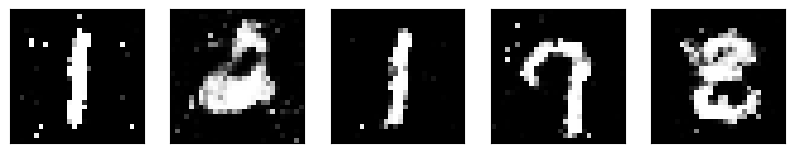

 Epoch: 220 batch: 1 D_loss: 1.209 G_loss: 1.288 
 Epoch: 220 batch: 2 D_loss: 1.154 G_loss: 1.341 
 Epoch: 220 batch: 3 D_loss: 1.154 G_loss: 1.335 
 Epoch: 220 batch: 4 D_loss: 1.102 G_loss: 1.377 
 Epoch: 220 batch: 5 D_loss: 1.286 G_loss: 1.328 
 Epoch: 220 batch: 6 D_loss: 1.257 G_loss: 1.136 
 Epoch: 220 batch: 7 D_loss: 1.254 G_loss: 1.067 
 Epoch: 220 batch: 8 D_loss: 1.364 G_loss: 1.066 
 Epoch: 220 batch: 9 D_loss: 1.301 G_loss: 1.088 
 Epoch: 220 batch: 10 D_loss: 1.158 G_loss: 1.035 
 Epoch: 220 batch: 11 D_loss: 1.269 G_loss: 1.117 
 Epoch: 220 batch: 12 D_loss: 1.220 G_loss: 1.114 
 Epoch: 220 batch: 13 D_loss: 1.272 G_loss: 1.094 
 Epoch: 220 batch: 14 D_loss: 1.254 G_loss: 1.001 
 Epoch: 220 batch: 15 D_loss: 1.249 G_loss: 0.952 
 Epoch: 220 batch: 16 D_loss: 1.247 G_loss: 0.924 
 Epoch: 220 batch: 17 D_loss: 1.254 G_loss: 0.878 
 Epoch: 220 batch: 18 D_loss: 1.260 G_loss: 0.926 
 Epoch: 220 batch: 19 D_loss: 1.270 G_loss: 0.904 
 Epoch: 220 batch: 20 D_loss: 1.271 G_lo

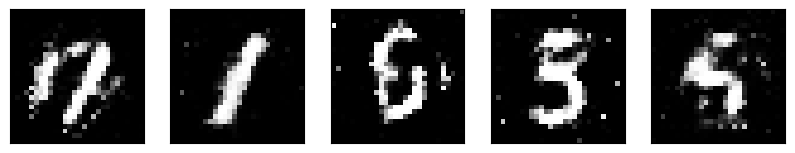

 Epoch: 221 batch: 1 D_loss: 1.299 G_loss: 1.160 
 Epoch: 221 batch: 2 D_loss: 1.265 G_loss: 1.166 
 Epoch: 221 batch: 3 D_loss: 1.263 G_loss: 1.144 
 Epoch: 221 batch: 4 D_loss: 1.241 G_loss: 1.062 
 Epoch: 221 batch: 5 D_loss: 1.340 G_loss: 0.958 
 Epoch: 221 batch: 6 D_loss: 1.391 G_loss: 0.916 
 Epoch: 221 batch: 7 D_loss: 1.317 G_loss: 0.899 
 Epoch: 221 batch: 8 D_loss: 1.357 G_loss: 0.952 
 Epoch: 221 batch: 9 D_loss: 1.352 G_loss: 0.955 
 Epoch: 221 batch: 10 D_loss: 1.283 G_loss: 0.984 
 Epoch: 221 batch: 11 D_loss: 1.322 G_loss: 1.023 
 Epoch: 221 batch: 12 D_loss: 1.343 G_loss: 0.988 
 Epoch: 221 batch: 13 D_loss: 1.295 G_loss: 0.980 
 Epoch: 221 batch: 14 D_loss: 1.271 G_loss: 0.913 
 Epoch: 221 batch: 15 D_loss: 1.288 G_loss: 0.914 
 Epoch: 221 batch: 16 D_loss: 1.294 G_loss: 0.878 
 Epoch: 221 batch: 17 D_loss: 1.312 G_loss: 0.888 
 Epoch: 221 batch: 18 D_loss: 1.242 G_loss: 0.961 
 Epoch: 221 batch: 19 D_loss: 1.204 G_loss: 1.047 
 Epoch: 221 batch: 20 D_loss: 1.262 G_lo

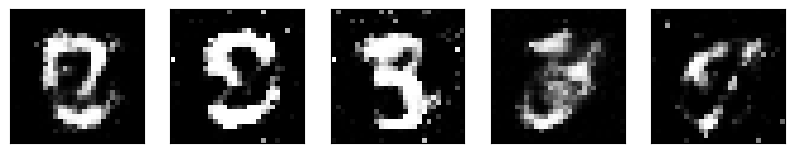

 Epoch: 222 batch: 1 D_loss: 1.317 G_loss: 1.009 
 Epoch: 222 batch: 2 D_loss: 1.271 G_loss: 0.994 
 Epoch: 222 batch: 3 D_loss: 1.298 G_loss: 1.009 
 Epoch: 222 batch: 4 D_loss: 1.244 G_loss: 0.991 
 Epoch: 222 batch: 5 D_loss: 1.308 G_loss: 0.959 
 Epoch: 222 batch: 6 D_loss: 1.295 G_loss: 0.938 
 Epoch: 222 batch: 7 D_loss: 1.250 G_loss: 0.945 
 Epoch: 222 batch: 8 D_loss: 1.305 G_loss: 0.928 
 Epoch: 222 batch: 9 D_loss: 1.312 G_loss: 0.955 
 Epoch: 222 batch: 10 D_loss: 1.255 G_loss: 1.045 
 Epoch: 222 batch: 11 D_loss: 1.225 G_loss: 1.129 
 Epoch: 222 batch: 12 D_loss: 1.211 G_loss: 1.153 
 Epoch: 222 batch: 13 D_loss: 1.277 G_loss: 1.235 
 Epoch: 222 batch: 14 D_loss: 1.251 G_loss: 1.184 
 Epoch: 222 batch: 15 D_loss: 1.264 G_loss: 1.216 
 Epoch: 222 batch: 16 D_loss: 1.249 G_loss: 1.103 
 Epoch: 222 batch: 17 D_loss: 1.282 G_loss: 1.133 
 Epoch: 222 batch: 18 D_loss: 1.270 G_loss: 1.023 
 Epoch: 222 batch: 19 D_loss: 1.282 G_loss: 1.036 
 Epoch: 222 batch: 20 D_loss: 1.279 G_lo

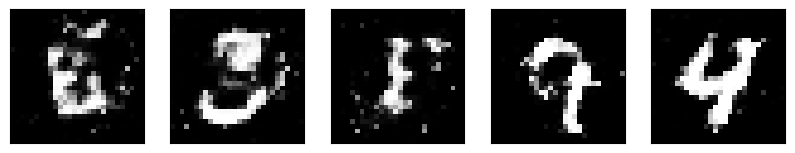

 Epoch: 223 batch: 1 D_loss: 1.298 G_loss: 1.136 
 Epoch: 223 batch: 2 D_loss: 1.177 G_loss: 1.121 
 Epoch: 223 batch: 3 D_loss: 1.210 G_loss: 1.121 
 Epoch: 223 batch: 4 D_loss: 1.156 G_loss: 1.126 
 Epoch: 223 batch: 5 D_loss: 1.322 G_loss: 1.243 
 Epoch: 223 batch: 6 D_loss: 1.271 G_loss: 1.196 
 Epoch: 223 batch: 7 D_loss: 1.262 G_loss: 1.218 
 Epoch: 223 batch: 8 D_loss: 1.342 G_loss: 1.116 
 Epoch: 223 batch: 9 D_loss: 1.286 G_loss: 1.101 
 Epoch: 223 batch: 10 D_loss: 1.237 G_loss: 1.009 
 Epoch: 223 batch: 11 D_loss: 1.327 G_loss: 1.052 
 Epoch: 223 batch: 12 D_loss: 1.190 G_loss: 1.021 
 Epoch: 223 batch: 13 D_loss: 1.213 G_loss: 1.048 
 Epoch: 223 batch: 14 D_loss: 1.247 G_loss: 1.036 
 Epoch: 223 batch: 15 D_loss: 1.245 G_loss: 1.032 
 Epoch: 223 batch: 16 D_loss: 1.234 G_loss: 0.991 
 Epoch: 223 batch: 17 D_loss: 1.239 G_loss: 1.040 
 Epoch: 223 batch: 18 D_loss: 1.255 G_loss: 1.103 
 Epoch: 223 batch: 19 D_loss: 1.232 G_loss: 1.145 
 Epoch: 223 batch: 20 D_loss: 1.275 G_lo

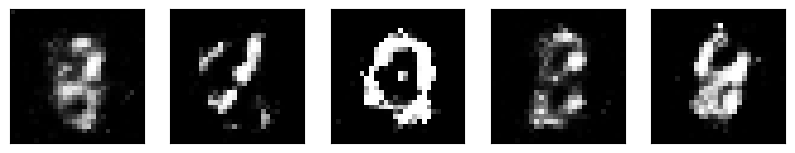

 Epoch: 224 batch: 1 D_loss: 1.250 G_loss: 1.141 
 Epoch: 224 batch: 2 D_loss: 1.278 G_loss: 1.167 
 Epoch: 224 batch: 3 D_loss: 1.277 G_loss: 1.146 
 Epoch: 224 batch: 4 D_loss: 1.245 G_loss: 1.067 
 Epoch: 224 batch: 5 D_loss: 1.287 G_loss: 1.084 
 Epoch: 224 batch: 6 D_loss: 1.283 G_loss: 1.003 
 Epoch: 224 batch: 7 D_loss: 1.330 G_loss: 0.946 
 Epoch: 224 batch: 8 D_loss: 1.313 G_loss: 1.017 
 Epoch: 224 batch: 9 D_loss: 1.305 G_loss: 0.963 
 Epoch: 224 batch: 10 D_loss: 1.285 G_loss: 0.978 
 Epoch: 224 batch: 11 D_loss: 1.276 G_loss: 1.013 
 Epoch: 224 batch: 12 D_loss: 1.203 G_loss: 1.016 
 Epoch: 224 batch: 13 D_loss: 1.258 G_loss: 1.033 
 Epoch: 224 batch: 14 D_loss: 1.232 G_loss: 0.986 
 Epoch: 224 batch: 15 D_loss: 1.248 G_loss: 1.033 
 Epoch: 224 batch: 16 D_loss: 1.224 G_loss: 0.935 
 Epoch: 224 batch: 17 D_loss: 1.229 G_loss: 1.002 
 Epoch: 224 batch: 18 D_loss: 1.200 G_loss: 0.979 
 Epoch: 224 batch: 19 D_loss: 1.323 G_loss: 1.065 
 Epoch: 224 batch: 20 D_loss: 1.238 G_lo

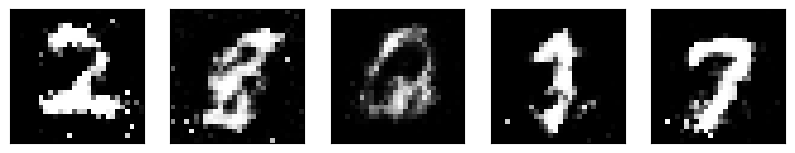

 Epoch: 225 batch: 1 D_loss: 1.244 G_loss: 1.102 
 Epoch: 225 batch: 2 D_loss: 1.236 G_loss: 1.132 
 Epoch: 225 batch: 3 D_loss: 1.232 G_loss: 1.134 
 Epoch: 225 batch: 4 D_loss: 1.190 G_loss: 1.097 
 Epoch: 225 batch: 5 D_loss: 1.260 G_loss: 1.043 
 Epoch: 225 batch: 6 D_loss: 1.232 G_loss: 0.991 
 Epoch: 225 batch: 7 D_loss: 1.280 G_loss: 0.909 
 Epoch: 225 batch: 8 D_loss: 1.323 G_loss: 0.949 
 Epoch: 225 batch: 9 D_loss: 1.331 G_loss: 0.971 
 Epoch: 225 batch: 10 D_loss: 1.194 G_loss: 1.021 
 Epoch: 225 batch: 11 D_loss: 1.257 G_loss: 1.086 
 Epoch: 225 batch: 12 D_loss: 1.253 G_loss: 1.036 
 Epoch: 225 batch: 13 D_loss: 1.263 G_loss: 1.079 
 Epoch: 225 batch: 14 D_loss: 1.222 G_loss: 1.090 
 Epoch: 225 batch: 15 D_loss: 1.277 G_loss: 1.032 
 Epoch: 225 batch: 16 D_loss: 1.325 G_loss: 1.084 
 Epoch: 225 batch: 17 D_loss: 1.286 G_loss: 1.080 
 Epoch: 225 batch: 18 D_loss: 1.217 G_loss: 1.103 
 Epoch: 225 batch: 19 D_loss: 1.280 G_loss: 1.145 
 Epoch: 225 batch: 20 D_loss: 1.329 G_lo

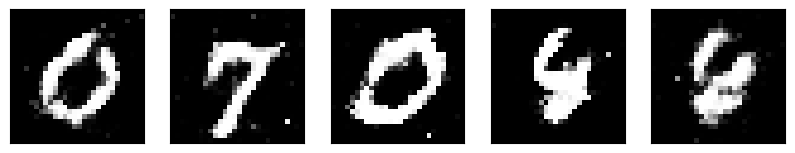

 Epoch: 226 batch: 1 D_loss: 1.243 G_loss: 1.021 
 Epoch: 226 batch: 2 D_loss: 1.185 G_loss: 1.046 
 Epoch: 226 batch: 3 D_loss: 1.188 G_loss: 0.978 
 Epoch: 226 batch: 4 D_loss: 1.199 G_loss: 1.027 
 Epoch: 226 batch: 5 D_loss: 1.217 G_loss: 1.096 
 Epoch: 226 batch: 6 D_loss: 1.279 G_loss: 1.129 
 Epoch: 226 batch: 7 D_loss: 1.187 G_loss: 1.111 
 Epoch: 226 batch: 8 D_loss: 1.254 G_loss: 1.125 
 Epoch: 226 batch: 9 D_loss: 1.238 G_loss: 1.141 
 Epoch: 226 batch: 10 D_loss: 1.137 G_loss: 1.155 
 Epoch: 226 batch: 11 D_loss: 1.203 G_loss: 1.203 
 Epoch: 226 batch: 12 D_loss: 1.186 G_loss: 1.140 
 Epoch: 226 batch: 13 D_loss: 1.123 G_loss: 1.310 
 Epoch: 226 batch: 14 D_loss: 1.148 G_loss: 1.336 
 Epoch: 226 batch: 15 D_loss: 1.174 G_loss: 1.539 
 Epoch: 226 batch: 16 D_loss: 1.170 G_loss: 1.461 
 Epoch: 226 batch: 17 D_loss: 1.185 G_loss: 1.593 
 Epoch: 226 batch: 18 D_loss: 1.260 G_loss: 1.496 
 Epoch: 226 batch: 19 D_loss: 1.300 G_loss: 1.386 
 Epoch: 226 batch: 20 D_loss: 1.327 G_lo

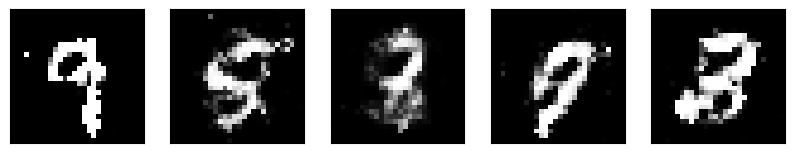

 Epoch: 227 batch: 1 D_loss: 1.217 G_loss: 1.262 
 Epoch: 227 batch: 2 D_loss: 1.280 G_loss: 1.335 
 Epoch: 227 batch: 3 D_loss: 1.216 G_loss: 1.182 
 Epoch: 227 batch: 4 D_loss: 1.267 G_loss: 1.133 
 Epoch: 227 batch: 5 D_loss: 1.294 G_loss: 1.050 
 Epoch: 227 batch: 6 D_loss: 1.296 G_loss: 1.032 
 Epoch: 227 batch: 7 D_loss: 1.264 G_loss: 1.064 
 Epoch: 227 batch: 8 D_loss: 1.306 G_loss: 0.962 
 Epoch: 227 batch: 9 D_loss: 1.322 G_loss: 0.979 
 Epoch: 227 batch: 10 D_loss: 1.247 G_loss: 0.971 
 Epoch: 227 batch: 11 D_loss: 1.312 G_loss: 0.960 
 Epoch: 227 batch: 12 D_loss: 1.282 G_loss: 0.938 
 Epoch: 227 batch: 13 D_loss: 1.271 G_loss: 0.936 
 Epoch: 227 batch: 14 D_loss: 1.270 G_loss: 0.945 
 Epoch: 227 batch: 15 D_loss: 1.335 G_loss: 0.914 
 Epoch: 227 batch: 16 D_loss: 1.310 G_loss: 0.941 
 Epoch: 227 batch: 17 D_loss: 1.280 G_loss: 0.991 
 Epoch: 227 batch: 18 D_loss: 1.261 G_loss: 1.015 
 Epoch: 227 batch: 19 D_loss: 1.281 G_loss: 1.011 
 Epoch: 227 batch: 20 D_loss: 1.283 G_lo

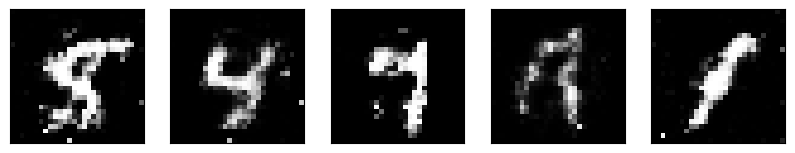

 Epoch: 228 batch: 1 D_loss: 1.181 G_loss: 1.220 
 Epoch: 228 batch: 2 D_loss: 1.272 G_loss: 1.226 
 Epoch: 228 batch: 3 D_loss: 1.196 G_loss: 1.079 
 Epoch: 228 batch: 4 D_loss: 1.182 G_loss: 1.102 
 Epoch: 228 batch: 5 D_loss: 1.191 G_loss: 1.131 
 Epoch: 228 batch: 6 D_loss: 1.194 G_loss: 1.253 
 Epoch: 228 batch: 7 D_loss: 1.260 G_loss: 1.241 
 Epoch: 228 batch: 8 D_loss: 1.298 G_loss: 1.233 
 Epoch: 228 batch: 9 D_loss: 1.352 G_loss: 1.162 
 Epoch: 228 batch: 10 D_loss: 1.197 G_loss: 1.096 
 Epoch: 228 batch: 11 D_loss: 1.303 G_loss: 1.023 
 Epoch: 228 batch: 12 D_loss: 1.268 G_loss: 1.047 
 Epoch: 228 batch: 13 D_loss: 1.197 G_loss: 1.019 
 Epoch: 228 batch: 14 D_loss: 1.290 G_loss: 0.983 
 Epoch: 228 batch: 15 D_loss: 1.304 G_loss: 0.993 
 Epoch: 228 batch: 16 D_loss: 1.257 G_loss: 1.004 
 Epoch: 228 batch: 17 D_loss: 1.251 G_loss: 1.019 
 Epoch: 228 batch: 18 D_loss: 1.239 G_loss: 0.979 
 Epoch: 228 batch: 19 D_loss: 1.271 G_loss: 0.959 
 Epoch: 228 batch: 20 D_loss: 1.293 G_lo

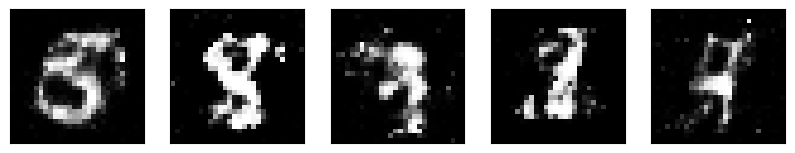

 Epoch: 229 batch: 1 D_loss: 1.229 G_loss: 1.055 
 Epoch: 229 batch: 2 D_loss: 1.206 G_loss: 1.104 
 Epoch: 229 batch: 3 D_loss: 1.196 G_loss: 1.080 
 Epoch: 229 batch: 4 D_loss: 1.211 G_loss: 1.073 
 Epoch: 229 batch: 5 D_loss: 1.255 G_loss: 1.147 
 Epoch: 229 batch: 6 D_loss: 1.305 G_loss: 1.124 
 Epoch: 229 batch: 7 D_loss: 1.249 G_loss: 1.163 
 Epoch: 229 batch: 8 D_loss: 1.335 G_loss: 1.148 
 Epoch: 229 batch: 9 D_loss: 1.356 G_loss: 1.153 
 Epoch: 229 batch: 10 D_loss: 1.158 G_loss: 1.208 
 Epoch: 229 batch: 11 D_loss: 1.232 G_loss: 1.124 
 Epoch: 229 batch: 12 D_loss: 1.259 G_loss: 1.154 
 Epoch: 229 batch: 13 D_loss: 1.211 G_loss: 1.135 
 Epoch: 229 batch: 14 D_loss: 1.270 G_loss: 1.060 
 Epoch: 229 batch: 15 D_loss: 1.262 G_loss: 1.016 
 Epoch: 229 batch: 16 D_loss: 1.269 G_loss: 1.047 
 Epoch: 229 batch: 17 D_loss: 1.281 G_loss: 1.049 
 Epoch: 229 batch: 18 D_loss: 1.218 G_loss: 1.026 
 Epoch: 229 batch: 19 D_loss: 1.271 G_loss: 1.008 
 Epoch: 229 batch: 20 D_loss: 1.233 G_lo

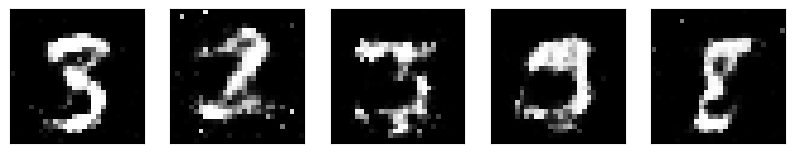

 Epoch: 230 batch: 1 D_loss: 1.296 G_loss: 1.073 
 Epoch: 230 batch: 2 D_loss: 1.302 G_loss: 1.072 
 Epoch: 230 batch: 3 D_loss: 1.307 G_loss: 1.009 
 Epoch: 230 batch: 4 D_loss: 1.290 G_loss: 1.001 
 Epoch: 230 batch: 5 D_loss: 1.321 G_loss: 0.951 
 Epoch: 230 batch: 6 D_loss: 1.270 G_loss: 0.949 
 Epoch: 230 batch: 7 D_loss: 1.299 G_loss: 0.938 
 Epoch: 230 batch: 8 D_loss: 1.325 G_loss: 0.994 
 Epoch: 230 batch: 9 D_loss: 1.309 G_loss: 1.016 
 Epoch: 230 batch: 10 D_loss: 1.211 G_loss: 1.082 
 Epoch: 230 batch: 11 D_loss: 1.249 G_loss: 1.100 
 Epoch: 230 batch: 12 D_loss: 1.286 G_loss: 1.101 
 Epoch: 230 batch: 13 D_loss: 1.276 G_loss: 1.235 
 Epoch: 230 batch: 14 D_loss: 1.215 G_loss: 1.080 
 Epoch: 230 batch: 15 D_loss: 1.297 G_loss: 1.177 
 Epoch: 230 batch: 16 D_loss: 1.276 G_loss: 1.155 
 Epoch: 230 batch: 17 D_loss: 1.286 G_loss: 1.129 
 Epoch: 230 batch: 18 D_loss: 1.285 G_loss: 1.077 
 Epoch: 230 batch: 19 D_loss: 1.316 G_loss: 1.188 
 Epoch: 230 batch: 20 D_loss: 1.283 G_lo

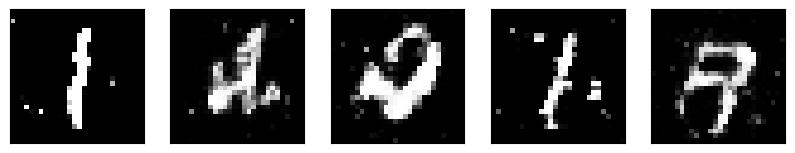

 Epoch: 231 batch: 1 D_loss: 1.252 G_loss: 1.100 
 Epoch: 231 batch: 2 D_loss: 1.254 G_loss: 1.107 
 Epoch: 231 batch: 3 D_loss: 1.265 G_loss: 1.062 
 Epoch: 231 batch: 4 D_loss: 1.304 G_loss: 1.064 
 Epoch: 231 batch: 5 D_loss: 1.354 G_loss: 1.078 
 Epoch: 231 batch: 6 D_loss: 1.274 G_loss: 0.988 
 Epoch: 231 batch: 7 D_loss: 1.299 G_loss: 0.985 
 Epoch: 231 batch: 8 D_loss: 1.264 G_loss: 0.950 
 Epoch: 231 batch: 9 D_loss: 1.270 G_loss: 0.982 
 Epoch: 231 batch: 10 D_loss: 1.230 G_loss: 0.917 
 Epoch: 231 batch: 11 D_loss: 1.268 G_loss: 0.888 
 Epoch: 231 batch: 12 D_loss: 1.242 G_loss: 0.908 
 Epoch: 231 batch: 13 D_loss: 1.291 G_loss: 1.006 
 Epoch: 231 batch: 14 D_loss: 1.258 G_loss: 1.072 
 Epoch: 231 batch: 15 D_loss: 1.264 G_loss: 1.225 
 Epoch: 231 batch: 16 D_loss: 1.269 G_loss: 1.258 
 Epoch: 231 batch: 17 D_loss: 1.230 G_loss: 1.154 
 Epoch: 231 batch: 18 D_loss: 1.238 G_loss: 1.176 
 Epoch: 231 batch: 19 D_loss: 1.275 G_loss: 1.302 
 Epoch: 231 batch: 20 D_loss: 1.275 G_lo

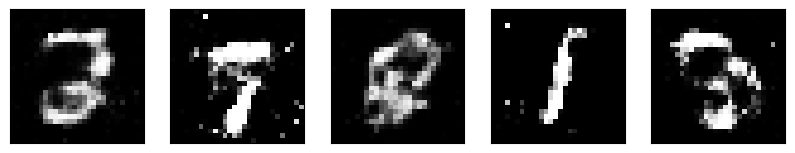

 Epoch: 232 batch: 1 D_loss: 1.289 G_loss: 0.979 
 Epoch: 232 batch: 2 D_loss: 1.230 G_loss: 1.000 
 Epoch: 232 batch: 3 D_loss: 1.246 G_loss: 0.968 
 Epoch: 232 batch: 4 D_loss: 1.255 G_loss: 0.969 
 Epoch: 232 batch: 5 D_loss: 1.283 G_loss: 1.024 
 Epoch: 232 batch: 6 D_loss: 1.215 G_loss: 1.081 
 Epoch: 232 batch: 7 D_loss: 1.219 G_loss: 1.252 
 Epoch: 232 batch: 8 D_loss: 1.252 G_loss: 1.282 
 Epoch: 232 batch: 9 D_loss: 1.286 G_loss: 1.307 
 Epoch: 232 batch: 10 D_loss: 1.190 G_loss: 1.230 
 Epoch: 232 batch: 11 D_loss: 1.244 G_loss: 1.329 
 Epoch: 232 batch: 12 D_loss: 1.231 G_loss: 1.343 
 Epoch: 232 batch: 13 D_loss: 1.293 G_loss: 1.167 
 Epoch: 232 batch: 14 D_loss: 1.251 G_loss: 1.173 
 Epoch: 232 batch: 15 D_loss: 1.282 G_loss: 1.041 
 Epoch: 232 batch: 16 D_loss: 1.296 G_loss: 0.988 
 Epoch: 232 batch: 17 D_loss: 1.295 G_loss: 0.962 
 Epoch: 232 batch: 18 D_loss: 1.300 G_loss: 0.910 
 Epoch: 232 batch: 19 D_loss: 1.296 G_loss: 0.888 
 Epoch: 232 batch: 20 D_loss: 1.275 G_lo

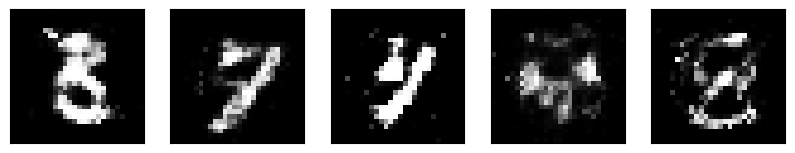

 Epoch: 233 batch: 1 D_loss: 1.286 G_loss: 1.066 
 Epoch: 233 batch: 2 D_loss: 1.256 G_loss: 1.023 
 Epoch: 233 batch: 3 D_loss: 1.291 G_loss: 1.065 
 Epoch: 233 batch: 4 D_loss: 1.302 G_loss: 1.138 
 Epoch: 233 batch: 5 D_loss: 1.263 G_loss: 1.041 
 Epoch: 233 batch: 6 D_loss: 1.311 G_loss: 1.055 
 Epoch: 233 batch: 7 D_loss: 1.239 G_loss: 1.036 
 Epoch: 233 batch: 8 D_loss: 1.260 G_loss: 1.104 
 Epoch: 233 batch: 9 D_loss: 1.229 G_loss: 1.153 
 Epoch: 233 batch: 10 D_loss: 1.250 G_loss: 1.134 
 Epoch: 233 batch: 11 D_loss: 1.294 G_loss: 1.312 
 Epoch: 233 batch: 12 D_loss: 1.333 G_loss: 1.231 
 Epoch: 233 batch: 13 D_loss: 1.283 G_loss: 1.058 
 Epoch: 233 batch: 14 D_loss: 1.312 G_loss: 1.010 
 Epoch: 233 batch: 15 D_loss: 1.276 G_loss: 1.045 
 Epoch: 233 batch: 16 D_loss: 1.284 G_loss: 1.089 
 Epoch: 233 batch: 17 D_loss: 1.315 G_loss: 1.060 
 Epoch: 233 batch: 18 D_loss: 1.276 G_loss: 1.065 
 Epoch: 233 batch: 19 D_loss: 1.282 G_loss: 1.021 
 Epoch: 233 batch: 20 D_loss: 1.318 G_lo

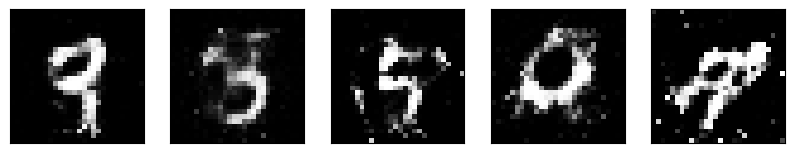

 Epoch: 234 batch: 1 D_loss: 1.215 G_loss: 1.137 
 Epoch: 234 batch: 2 D_loss: 1.266 G_loss: 1.042 
 Epoch: 234 batch: 3 D_loss: 1.235 G_loss: 1.049 
 Epoch: 234 batch: 4 D_loss: 1.183 G_loss: 1.187 
 Epoch: 234 batch: 5 D_loss: 1.266 G_loss: 1.120 
 Epoch: 234 batch: 6 D_loss: 1.311 G_loss: 1.144 
 Epoch: 234 batch: 7 D_loss: 1.286 G_loss: 1.122 
 Epoch: 234 batch: 8 D_loss: 1.335 G_loss: 1.082 
 Epoch: 234 batch: 9 D_loss: 1.302 G_loss: 1.072 
 Epoch: 234 batch: 10 D_loss: 1.251 G_loss: 1.020 
 Epoch: 234 batch: 11 D_loss: 1.345 G_loss: 1.065 
 Epoch: 234 batch: 12 D_loss: 1.258 G_loss: 1.069 
 Epoch: 234 batch: 13 D_loss: 1.212 G_loss: 1.011 
 Epoch: 234 batch: 14 D_loss: 1.266 G_loss: 1.103 
 Epoch: 234 batch: 15 D_loss: 1.270 G_loss: 1.050 
 Epoch: 234 batch: 16 D_loss: 1.294 G_loss: 1.002 
 Epoch: 234 batch: 17 D_loss: 1.233 G_loss: 0.988 
 Epoch: 234 batch: 18 D_loss: 1.259 G_loss: 1.006 
 Epoch: 234 batch: 19 D_loss: 1.268 G_loss: 1.022 
 Epoch: 234 batch: 20 D_loss: 1.301 G_lo

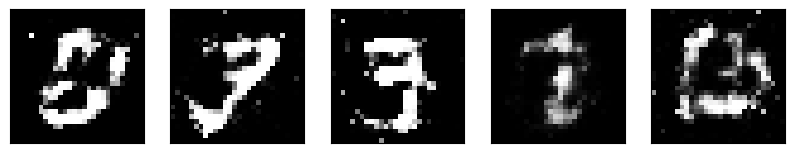

 Epoch: 235 batch: 1 D_loss: 1.274 G_loss: 1.116 
 Epoch: 235 batch: 2 D_loss: 1.302 G_loss: 1.081 
 Epoch: 235 batch: 3 D_loss: 1.270 G_loss: 1.063 
 Epoch: 235 batch: 4 D_loss: 1.254 G_loss: 0.966 
 Epoch: 235 batch: 5 D_loss: 1.248 G_loss: 0.976 
 Epoch: 235 batch: 6 D_loss: 1.214 G_loss: 0.998 
 Epoch: 235 batch: 7 D_loss: 1.276 G_loss: 1.120 
 Epoch: 235 batch: 8 D_loss: 1.282 G_loss: 1.119 
 Epoch: 235 batch: 9 D_loss: 1.313 G_loss: 1.139 
 Epoch: 235 batch: 10 D_loss: 1.212 G_loss: 1.227 
 Epoch: 235 batch: 11 D_loss: 1.325 G_loss: 1.168 
 Epoch: 235 batch: 12 D_loss: 1.228 G_loss: 1.261 
 Epoch: 235 batch: 13 D_loss: 1.241 G_loss: 1.153 
 Epoch: 235 batch: 14 D_loss: 1.230 G_loss: 1.116 
 Epoch: 235 batch: 15 D_loss: 1.305 G_loss: 1.110 
 Epoch: 235 batch: 16 D_loss: 1.246 G_loss: 1.060 
 Epoch: 235 batch: 17 D_loss: 1.264 G_loss: 1.056 
 Epoch: 235 batch: 18 D_loss: 1.313 G_loss: 1.009 
 Epoch: 235 batch: 19 D_loss: 1.359 G_loss: 1.087 
 Epoch: 235 batch: 20 D_loss: 1.317 G_lo

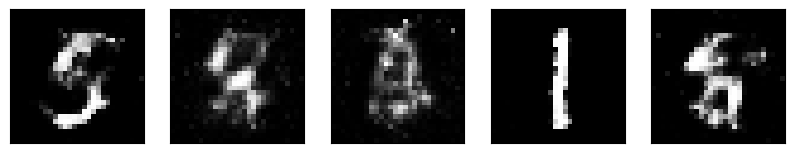

 Epoch: 236 batch: 1 D_loss: 1.265 G_loss: 1.518 
 Epoch: 236 batch: 2 D_loss: 1.173 G_loss: 1.492 
 Epoch: 236 batch: 3 D_loss: 1.160 G_loss: 1.703 
 Epoch: 236 batch: 4 D_loss: 1.200 G_loss: 1.726 
 Epoch: 236 batch: 5 D_loss: 1.222 G_loss: 1.532 
 Epoch: 236 batch: 6 D_loss: 1.311 G_loss: 1.148 
 Epoch: 236 batch: 7 D_loss: 1.263 G_loss: 1.150 
 Epoch: 236 batch: 8 D_loss: 1.425 G_loss: 0.893 
 Epoch: 236 batch: 9 D_loss: 1.383 G_loss: 0.968 
 Epoch: 236 batch: 10 D_loss: 1.278 G_loss: 0.924 
 Epoch: 236 batch: 11 D_loss: 1.329 G_loss: 0.966 
 Epoch: 236 batch: 12 D_loss: 1.350 G_loss: 0.989 
 Epoch: 236 batch: 13 D_loss: 1.322 G_loss: 0.944 
 Epoch: 236 batch: 14 D_loss: 1.310 G_loss: 0.888 
 Epoch: 236 batch: 15 D_loss: 1.333 G_loss: 0.838 
 Epoch: 236 batch: 16 D_loss: 1.303 G_loss: 0.803 
 Epoch: 236 batch: 17 D_loss: 1.338 G_loss: 0.829 
 Epoch: 236 batch: 18 D_loss: 1.304 G_loss: 0.840 
 Epoch: 236 batch: 19 D_loss: 1.349 G_loss: 0.930 
 Epoch: 236 batch: 20 D_loss: 1.324 G_lo

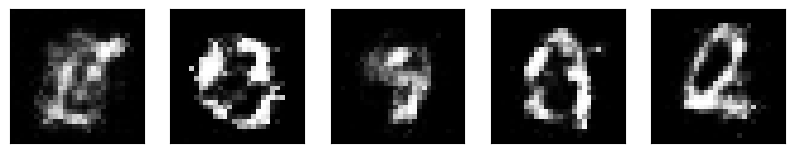

 Epoch: 237 batch: 1 D_loss: 1.336 G_loss: 1.594 
 Epoch: 237 batch: 2 D_loss: 1.229 G_loss: 1.535 
 Epoch: 237 batch: 3 D_loss: 1.216 G_loss: 1.229 
 Epoch: 237 batch: 4 D_loss: 1.305 G_loss: 1.190 
 Epoch: 237 batch: 5 D_loss: 1.301 G_loss: 1.006 
 Epoch: 237 batch: 6 D_loss: 1.326 G_loss: 1.035 
 Epoch: 237 batch: 7 D_loss: 1.316 G_loss: 1.062 
 Epoch: 237 batch: 8 D_loss: 1.319 G_loss: 1.037 
 Epoch: 237 batch: 9 D_loss: 1.348 G_loss: 1.126 
 Epoch: 237 batch: 10 D_loss: 1.283 G_loss: 1.035 
 Epoch: 237 batch: 11 D_loss: 1.312 G_loss: 1.041 
 Epoch: 237 batch: 12 D_loss: 1.275 G_loss: 0.923 
 Epoch: 237 batch: 13 D_loss: 1.252 G_loss: 0.906 
 Epoch: 237 batch: 14 D_loss: 1.258 G_loss: 0.909 
 Epoch: 237 batch: 15 D_loss: 1.320 G_loss: 0.931 
 Epoch: 237 batch: 16 D_loss: 1.262 G_loss: 1.018 
 Epoch: 237 batch: 17 D_loss: 1.243 G_loss: 1.043 
 Epoch: 237 batch: 18 D_loss: 1.285 G_loss: 1.086 
 Epoch: 237 batch: 19 D_loss: 1.287 G_loss: 1.066 
 Epoch: 237 batch: 20 D_loss: 1.235 G_lo

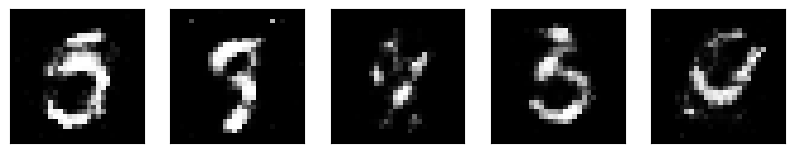

 Epoch: 238 batch: 1 D_loss: 1.302 G_loss: 1.265 
 Epoch: 238 batch: 2 D_loss: 1.321 G_loss: 1.229 
 Epoch: 238 batch: 3 D_loss: 1.221 G_loss: 1.104 
 Epoch: 238 batch: 4 D_loss: 1.214 G_loss: 1.015 
 Epoch: 238 batch: 5 D_loss: 1.283 G_loss: 1.064 
 Epoch: 238 batch: 6 D_loss: 1.263 G_loss: 1.028 
 Epoch: 238 batch: 7 D_loss: 1.228 G_loss: 1.025 
 Epoch: 238 batch: 8 D_loss: 1.256 G_loss: 1.092 
 Epoch: 238 batch: 9 D_loss: 1.317 G_loss: 1.134 
 Epoch: 238 batch: 10 D_loss: 1.187 G_loss: 1.208 
 Epoch: 238 batch: 11 D_loss: 1.207 G_loss: 1.190 
 Epoch: 238 batch: 12 D_loss: 1.211 G_loss: 1.231 
 Epoch: 238 batch: 13 D_loss: 1.192 G_loss: 1.272 
 Epoch: 238 batch: 14 D_loss: 1.271 G_loss: 1.289 
 Epoch: 238 batch: 15 D_loss: 1.240 G_loss: 1.381 
 Epoch: 238 batch: 16 D_loss: 1.205 G_loss: 1.508 
 Epoch: 238 batch: 17 D_loss: 1.217 G_loss: 1.444 
 Epoch: 238 batch: 18 D_loss: 1.242 G_loss: 1.306 
 Epoch: 238 batch: 19 D_loss: 1.237 G_loss: 1.167 
 Epoch: 238 batch: 20 D_loss: 1.305 G_lo

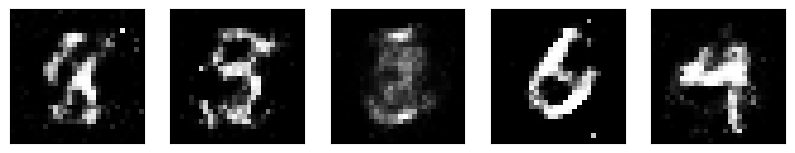

 Epoch: 239 batch: 1 D_loss: 1.244 G_loss: 0.952 
 Epoch: 239 batch: 2 D_loss: 1.220 G_loss: 1.027 
 Epoch: 239 batch: 3 D_loss: 1.176 G_loss: 1.044 
 Epoch: 239 batch: 4 D_loss: 1.217 G_loss: 1.102 
 Epoch: 239 batch: 5 D_loss: 1.281 G_loss: 1.045 
 Epoch: 239 batch: 6 D_loss: 1.303 G_loss: 1.083 
 Epoch: 239 batch: 7 D_loss: 1.209 G_loss: 1.041 
 Epoch: 239 batch: 8 D_loss: 1.327 G_loss: 1.018 
 Epoch: 239 batch: 9 D_loss: 1.282 G_loss: 1.001 
 Epoch: 239 batch: 10 D_loss: 1.208 G_loss: 1.055 
 Epoch: 239 batch: 11 D_loss: 1.248 G_loss: 1.113 
 Epoch: 239 batch: 12 D_loss: 1.216 G_loss: 1.151 
 Epoch: 239 batch: 13 D_loss: 1.181 G_loss: 1.084 
 Epoch: 239 batch: 14 D_loss: 1.212 G_loss: 1.216 
 Epoch: 239 batch: 15 D_loss: 1.229 G_loss: 1.241 
 Epoch: 239 batch: 16 D_loss: 1.217 G_loss: 1.333 
 Epoch: 239 batch: 17 D_loss: 1.189 G_loss: 1.483 
 Epoch: 239 batch: 18 D_loss: 1.187 G_loss: 1.581 
 Epoch: 239 batch: 19 D_loss: 1.335 G_loss: 1.713 
 Epoch: 239 batch: 20 D_loss: 1.250 G_lo

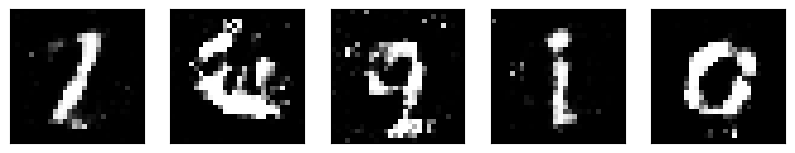

 Epoch: 240 batch: 1 D_loss: 1.281 G_loss: 1.113 
 Epoch: 240 batch: 2 D_loss: 1.242 G_loss: 1.104 
 Epoch: 240 batch: 3 D_loss: 1.272 G_loss: 1.031 
 Epoch: 240 batch: 4 D_loss: 1.220 G_loss: 1.039 
 Epoch: 240 batch: 5 D_loss: 1.274 G_loss: 1.018 
 Epoch: 240 batch: 6 D_loss: 1.279 G_loss: 1.042 
 Epoch: 240 batch: 7 D_loss: 1.220 G_loss: 1.025 
 Epoch: 240 batch: 8 D_loss: 1.304 G_loss: 1.042 
 Epoch: 240 batch: 9 D_loss: 1.254 G_loss: 1.041 
 Epoch: 240 batch: 10 D_loss: 1.227 G_loss: 1.005 
 Epoch: 240 batch: 11 D_loss: 1.257 G_loss: 1.023 
 Epoch: 240 batch: 12 D_loss: 1.195 G_loss: 1.073 
 Epoch: 240 batch: 13 D_loss: 1.234 G_loss: 1.117 
 Epoch: 240 batch: 14 D_loss: 1.233 G_loss: 1.169 
 Epoch: 240 batch: 15 D_loss: 1.247 G_loss: 1.093 
 Epoch: 240 batch: 16 D_loss: 1.240 G_loss: 1.114 
 Epoch: 240 batch: 17 D_loss: 1.193 G_loss: 1.103 
 Epoch: 240 batch: 18 D_loss: 1.213 G_loss: 1.262 
 Epoch: 240 batch: 19 D_loss: 1.342 G_loss: 1.225 
 Epoch: 240 batch: 20 D_loss: 1.228 G_lo

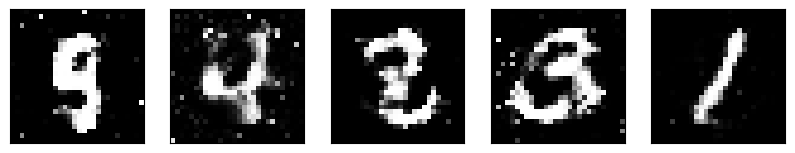

 Epoch: 241 batch: 1 D_loss: 1.201 G_loss: 1.563 
 Epoch: 241 batch: 2 D_loss: 1.237 G_loss: 1.428 
 Epoch: 241 batch: 3 D_loss: 1.255 G_loss: 1.452 
 Epoch: 241 batch: 4 D_loss: 1.203 G_loss: 1.448 
 Epoch: 241 batch: 5 D_loss: 1.236 G_loss: 1.437 
 Epoch: 241 batch: 6 D_loss: 1.208 G_loss: 1.243 
 Epoch: 241 batch: 7 D_loss: 1.266 G_loss: 1.075 
 Epoch: 241 batch: 8 D_loss: 1.299 G_loss: 1.116 
 Epoch: 241 batch: 9 D_loss: 1.314 G_loss: 1.049 
 Epoch: 241 batch: 10 D_loss: 1.208 G_loss: 1.082 
 Epoch: 241 batch: 11 D_loss: 1.288 G_loss: 1.033 
 Epoch: 241 batch: 12 D_loss: 1.272 G_loss: 1.045 
 Epoch: 241 batch: 13 D_loss: 1.269 G_loss: 1.031 
 Epoch: 241 batch: 14 D_loss: 1.238 G_loss: 1.059 
 Epoch: 241 batch: 15 D_loss: 1.261 G_loss: 1.042 
 Epoch: 241 batch: 16 D_loss: 1.194 G_loss: 0.987 
 Epoch: 241 batch: 17 D_loss: 1.237 G_loss: 0.932 
 Epoch: 241 batch: 18 D_loss: 1.217 G_loss: 0.944 
 Epoch: 241 batch: 19 D_loss: 1.260 G_loss: 0.980 
 Epoch: 241 batch: 20 D_loss: 1.312 G_lo

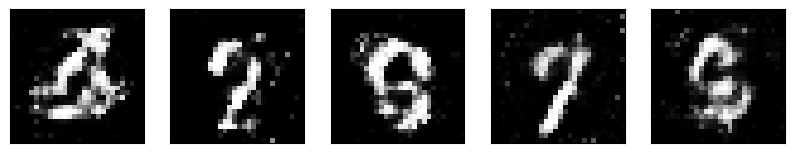

 Epoch: 242 batch: 1 D_loss: 1.256 G_loss: 0.972 
 Epoch: 242 batch: 2 D_loss: 1.230 G_loss: 0.979 
 Epoch: 242 batch: 3 D_loss: 1.259 G_loss: 0.954 
 Epoch: 242 batch: 4 D_loss: 1.254 G_loss: 0.977 
 Epoch: 242 batch: 5 D_loss: 1.264 G_loss: 0.975 
 Epoch: 242 batch: 6 D_loss: 1.287 G_loss: 0.960 
 Epoch: 242 batch: 7 D_loss: 1.212 G_loss: 1.021 
 Epoch: 242 batch: 8 D_loss: 1.320 G_loss: 1.099 
 Epoch: 242 batch: 9 D_loss: 1.279 G_loss: 1.132 
 Epoch: 242 batch: 10 D_loss: 1.196 G_loss: 1.110 
 Epoch: 242 batch: 11 D_loss: 1.209 G_loss: 1.185 
 Epoch: 242 batch: 12 D_loss: 1.229 G_loss: 1.082 
 Epoch: 242 batch: 13 D_loss: 1.215 G_loss: 1.237 
 Epoch: 242 batch: 14 D_loss: 1.172 G_loss: 1.277 
 Epoch: 242 batch: 15 D_loss: 1.151 G_loss: 1.299 
 Epoch: 242 batch: 16 D_loss: 1.245 G_loss: 1.455 
 Epoch: 242 batch: 17 D_loss: 1.235 G_loss: 1.454 
 Epoch: 242 batch: 18 D_loss: 1.275 G_loss: 1.481 
 Epoch: 242 batch: 19 D_loss: 1.287 G_loss: 1.273 
 Epoch: 242 batch: 20 D_loss: 1.242 G_lo

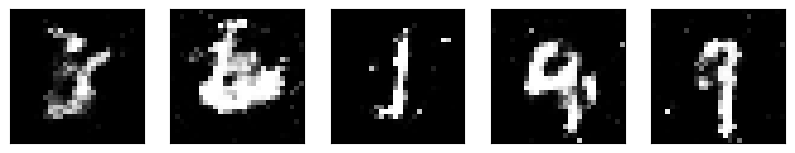

 Epoch: 243 batch: 1 D_loss: 1.359 G_loss: 0.902 
 Epoch: 243 batch: 2 D_loss: 1.273 G_loss: 0.804 
 Epoch: 243 batch: 3 D_loss: 1.312 G_loss: 0.779 
 Epoch: 243 batch: 4 D_loss: 1.291 G_loss: 0.860 
 Epoch: 243 batch: 5 D_loss: 1.310 G_loss: 0.931 
 Epoch: 243 batch: 6 D_loss: 1.328 G_loss: 1.007 
 Epoch: 243 batch: 7 D_loss: 1.312 G_loss: 1.007 
 Epoch: 243 batch: 8 D_loss: 1.325 G_loss: 0.956 
 Epoch: 243 batch: 9 D_loss: 1.305 G_loss: 0.899 
 Epoch: 243 batch: 10 D_loss: 1.277 G_loss: 0.860 
 Epoch: 243 batch: 11 D_loss: 1.288 G_loss: 0.873 
 Epoch: 243 batch: 12 D_loss: 1.284 G_loss: 0.909 
 Epoch: 243 batch: 13 D_loss: 1.233 G_loss: 0.976 
 Epoch: 243 batch: 14 D_loss: 1.271 G_loss: 1.015 
 Epoch: 243 batch: 15 D_loss: 1.236 G_loss: 1.087 
 Epoch: 243 batch: 16 D_loss: 1.234 G_loss: 1.063 
 Epoch: 243 batch: 17 D_loss: 1.256 G_loss: 1.140 
 Epoch: 243 batch: 18 D_loss: 1.254 G_loss: 1.062 
 Epoch: 243 batch: 19 D_loss: 1.245 G_loss: 1.157 
 Epoch: 243 batch: 20 D_loss: 1.292 G_lo

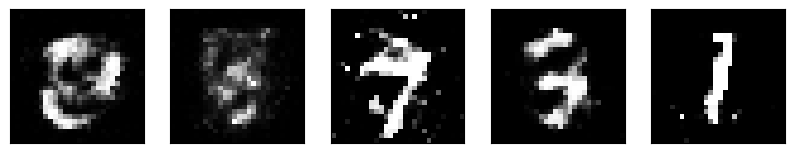

 Epoch: 244 batch: 1 D_loss: 1.295 G_loss: 1.277 
 Epoch: 244 batch: 2 D_loss: 1.219 G_loss: 1.328 
 Epoch: 244 batch: 3 D_loss: 1.195 G_loss: 1.379 
 Epoch: 244 batch: 4 D_loss: 1.180 G_loss: 1.220 
 Epoch: 244 batch: 5 D_loss: 1.284 G_loss: 1.267 
 Epoch: 244 batch: 6 D_loss: 1.251 G_loss: 1.135 
 Epoch: 244 batch: 7 D_loss: 1.226 G_loss: 1.347 
 Epoch: 244 batch: 8 D_loss: 1.260 G_loss: 1.259 
 Epoch: 244 batch: 9 D_loss: 1.269 G_loss: 1.397 
 Epoch: 244 batch: 10 D_loss: 1.244 G_loss: 1.351 
 Epoch: 244 batch: 11 D_loss: 1.272 G_loss: 1.259 
 Epoch: 244 batch: 12 D_loss: 1.264 G_loss: 1.244 
 Epoch: 244 batch: 13 D_loss: 1.239 G_loss: 1.167 
 Epoch: 244 batch: 14 D_loss: 1.259 G_loss: 1.094 
 Epoch: 244 batch: 15 D_loss: 1.270 G_loss: 1.071 
 Epoch: 244 batch: 16 D_loss: 1.287 G_loss: 1.135 
 Epoch: 244 batch: 17 D_loss: 1.314 G_loss: 1.112 
 Epoch: 244 batch: 18 D_loss: 1.265 G_loss: 1.054 
 Epoch: 244 batch: 19 D_loss: 1.359 G_loss: 1.122 
 Epoch: 244 batch: 20 D_loss: 1.360 G_lo

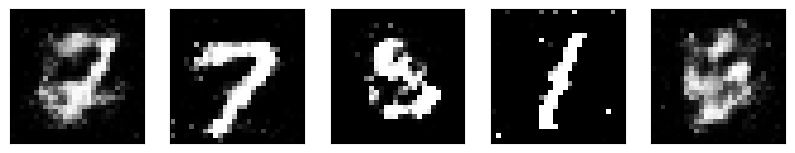

 Epoch: 245 batch: 1 D_loss: 1.260 G_loss: 1.163 
 Epoch: 245 batch: 2 D_loss: 1.249 G_loss: 1.196 
 Epoch: 245 batch: 3 D_loss: 1.236 G_loss: 1.247 
 Epoch: 245 batch: 4 D_loss: 1.301 G_loss: 1.173 
 Epoch: 245 batch: 5 D_loss: 1.244 G_loss: 1.208 
 Epoch: 245 batch: 6 D_loss: 1.286 G_loss: 1.097 
 Epoch: 245 batch: 7 D_loss: 1.269 G_loss: 1.211 
 Epoch: 245 batch: 8 D_loss: 1.339 G_loss: 1.117 
 Epoch: 245 batch: 9 D_loss: 1.330 G_loss: 1.094 
 Epoch: 245 batch: 10 D_loss: 1.270 G_loss: 1.112 
 Epoch: 245 batch: 11 D_loss: 1.288 G_loss: 1.024 
 Epoch: 245 batch: 12 D_loss: 1.306 G_loss: 1.159 
 Epoch: 245 batch: 13 D_loss: 1.267 G_loss: 1.009 
 Epoch: 245 batch: 14 D_loss: 1.285 G_loss: 0.926 
 Epoch: 245 batch: 15 D_loss: 1.292 G_loss: 0.952 
 Epoch: 245 batch: 16 D_loss: 1.282 G_loss: 0.946 
 Epoch: 245 batch: 17 D_loss: 1.272 G_loss: 0.936 
 Epoch: 245 batch: 18 D_loss: 1.245 G_loss: 1.035 
 Epoch: 245 batch: 19 D_loss: 1.237 G_loss: 1.061 
 Epoch: 245 batch: 20 D_loss: 1.285 G_lo

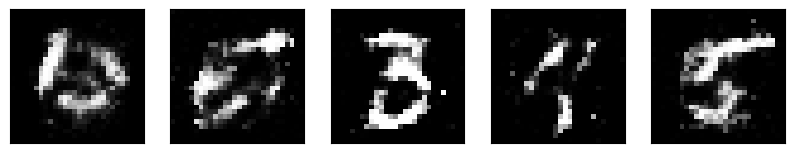

 Epoch: 246 batch: 1 D_loss: 1.242 G_loss: 1.000 
 Epoch: 246 batch: 2 D_loss: 1.235 G_loss: 1.006 
 Epoch: 246 batch: 3 D_loss: 1.234 G_loss: 0.970 
 Epoch: 246 batch: 4 D_loss: 1.268 G_loss: 0.939 
 Epoch: 246 batch: 5 D_loss: 1.274 G_loss: 0.932 
 Epoch: 246 batch: 6 D_loss: 1.260 G_loss: 0.971 
 Epoch: 246 batch: 7 D_loss: 1.241 G_loss: 0.971 
 Epoch: 246 batch: 8 D_loss: 1.312 G_loss: 1.024 
 Epoch: 246 batch: 9 D_loss: 1.275 G_loss: 1.110 
 Epoch: 246 batch: 10 D_loss: 1.236 G_loss: 1.112 
 Epoch: 246 batch: 11 D_loss: 1.231 G_loss: 1.107 
 Epoch: 246 batch: 12 D_loss: 1.218 G_loss: 1.141 
 Epoch: 246 batch: 13 D_loss: 1.206 G_loss: 1.056 
 Epoch: 246 batch: 14 D_loss: 1.258 G_loss: 1.061 
 Epoch: 246 batch: 15 D_loss: 1.250 G_loss: 1.047 
 Epoch: 246 batch: 16 D_loss: 1.220 G_loss: 1.081 
 Epoch: 246 batch: 17 D_loss: 1.227 G_loss: 1.071 
 Epoch: 246 batch: 18 D_loss: 1.232 G_loss: 1.087 
 Epoch: 246 batch: 19 D_loss: 1.246 G_loss: 1.108 
 Epoch: 246 batch: 20 D_loss: 1.235 G_lo

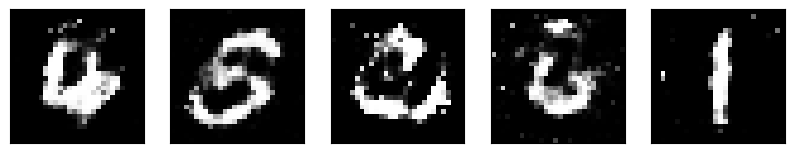

 Epoch: 247 batch: 1 D_loss: 1.240 G_loss: 1.257 
 Epoch: 247 batch: 2 D_loss: 1.257 G_loss: 1.487 
 Epoch: 247 batch: 3 D_loss: 1.219 G_loss: 1.323 
 Epoch: 247 batch: 4 D_loss: 1.197 G_loss: 1.371 
 Epoch: 247 batch: 5 D_loss: 1.350 G_loss: 1.390 
 Epoch: 247 batch: 6 D_loss: 1.247 G_loss: 1.219 
 Epoch: 247 batch: 7 D_loss: 1.306 G_loss: 1.145 
 Epoch: 247 batch: 8 D_loss: 1.395 G_loss: 1.092 
 Epoch: 247 batch: 9 D_loss: 1.336 G_loss: 0.938 
 Epoch: 247 batch: 10 D_loss: 1.246 G_loss: 0.929 
 Epoch: 247 batch: 11 D_loss: 1.308 G_loss: 0.927 
 Epoch: 247 batch: 12 D_loss: 1.309 G_loss: 0.952 
 Epoch: 247 batch: 13 D_loss: 1.264 G_loss: 0.949 
 Epoch: 247 batch: 14 D_loss: 1.217 G_loss: 0.932 
 Epoch: 247 batch: 15 D_loss: 1.296 G_loss: 0.897 
 Epoch: 247 batch: 16 D_loss: 1.251 G_loss: 0.986 
 Epoch: 247 batch: 17 D_loss: 1.227 G_loss: 1.043 
 Epoch: 247 batch: 18 D_loss: 1.198 G_loss: 1.033 
 Epoch: 247 batch: 19 D_loss: 1.198 G_loss: 1.108 
 Epoch: 247 batch: 20 D_loss: 1.190 G_lo

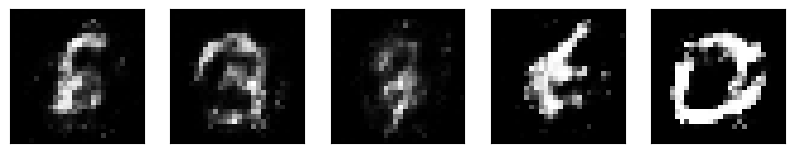

 Epoch: 248 batch: 1 D_loss: 1.288 G_loss: 1.368 
 Epoch: 248 batch: 2 D_loss: 1.220 G_loss: 1.312 
 Epoch: 248 batch: 3 D_loss: 1.255 G_loss: 1.211 
 Epoch: 248 batch: 4 D_loss: 1.249 G_loss: 1.154 
 Epoch: 248 batch: 5 D_loss: 1.303 G_loss: 1.168 
 Epoch: 248 batch: 6 D_loss: 1.215 G_loss: 1.160 
 Epoch: 248 batch: 7 D_loss: 1.259 G_loss: 1.162 
 Epoch: 248 batch: 8 D_loss: 1.252 G_loss: 1.148 
 Epoch: 248 batch: 9 D_loss: 1.300 G_loss: 1.100 
 Epoch: 248 batch: 10 D_loss: 1.236 G_loss: 1.065 
 Epoch: 248 batch: 11 D_loss: 1.272 G_loss: 1.016 
 Epoch: 248 batch: 12 D_loss: 1.257 G_loss: 0.960 
 Epoch: 248 batch: 13 D_loss: 1.245 G_loss: 0.952 
 Epoch: 248 batch: 14 D_loss: 1.250 G_loss: 0.929 
 Epoch: 248 batch: 15 D_loss: 1.255 G_loss: 1.033 
 Epoch: 248 batch: 16 D_loss: 1.233 G_loss: 1.140 
 Epoch: 248 batch: 17 D_loss: 1.204 G_loss: 1.150 
 Epoch: 248 batch: 18 D_loss: 1.176 G_loss: 1.246 
 Epoch: 248 batch: 19 D_loss: 1.232 G_loss: 1.358 
 Epoch: 248 batch: 20 D_loss: 1.248 G_lo

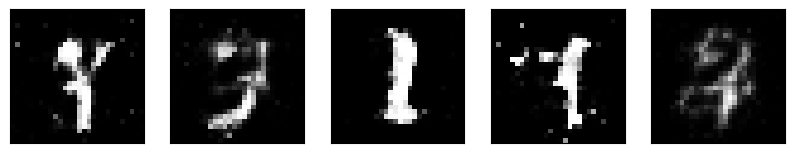

 Epoch: 249 batch: 1 D_loss: 1.201 G_loss: 1.131 
 Epoch: 249 batch: 2 D_loss: 1.265 G_loss: 1.282 
 Epoch: 249 batch: 3 D_loss: 1.252 G_loss: 1.236 
 Epoch: 249 batch: 4 D_loss: 1.194 G_loss: 1.188 
 Epoch: 249 batch: 5 D_loss: 1.227 G_loss: 1.221 
 Epoch: 249 batch: 6 D_loss: 1.251 G_loss: 1.209 
 Epoch: 249 batch: 7 D_loss: 1.202 G_loss: 1.285 
 Epoch: 249 batch: 8 D_loss: 1.293 G_loss: 1.214 
 Epoch: 249 batch: 9 D_loss: 1.255 G_loss: 1.181 
 Epoch: 249 batch: 10 D_loss: 1.173 G_loss: 1.115 
 Epoch: 249 batch: 11 D_loss: 1.290 G_loss: 1.138 
 Epoch: 249 batch: 12 D_loss: 1.239 G_loss: 1.146 
 Epoch: 249 batch: 13 D_loss: 1.223 G_loss: 1.161 
 Epoch: 249 batch: 14 D_loss: 1.176 G_loss: 1.157 
 Epoch: 249 batch: 15 D_loss: 1.234 G_loss: 1.189 
 Epoch: 249 batch: 16 D_loss: 1.184 G_loss: 1.157 
 Epoch: 249 batch: 17 D_loss: 1.195 G_loss: 1.237 
 Epoch: 249 batch: 18 D_loss: 1.247 G_loss: 1.228 
 Epoch: 249 batch: 19 D_loss: 1.254 G_loss: 1.134 
 Epoch: 249 batch: 20 D_loss: 1.226 G_lo

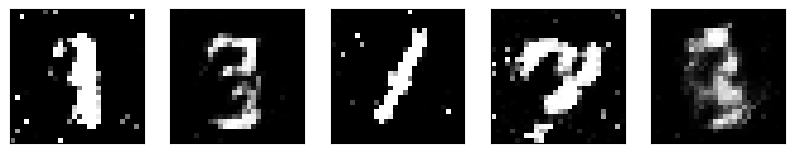

 Epoch: 250 batch: 1 D_loss: 1.337 G_loss: 1.128 
 Epoch: 250 batch: 2 D_loss: 1.281 G_loss: 1.215 
 Epoch: 250 batch: 3 D_loss: 1.250 G_loss: 1.235 
 Epoch: 250 batch: 4 D_loss: 1.234 G_loss: 1.084 
 Epoch: 250 batch: 5 D_loss: 1.243 G_loss: 0.976 
 Epoch: 250 batch: 6 D_loss: 1.324 G_loss: 0.868 
 Epoch: 250 batch: 7 D_loss: 1.305 G_loss: 0.933 
 Epoch: 250 batch: 8 D_loss: 1.289 G_loss: 0.999 
 Epoch: 250 batch: 9 D_loss: 1.340 G_loss: 1.061 
 Epoch: 250 batch: 10 D_loss: 1.268 G_loss: 1.142 
 Epoch: 250 batch: 11 D_loss: 1.304 G_loss: 1.075 
 Epoch: 250 batch: 12 D_loss: 1.267 G_loss: 1.043 
 Epoch: 250 batch: 13 D_loss: 1.223 G_loss: 0.966 
 Epoch: 250 batch: 14 D_loss: 1.203 G_loss: 0.915 
 Epoch: 250 batch: 15 D_loss: 1.263 G_loss: 0.915 
 Epoch: 250 batch: 16 D_loss: 1.297 G_loss: 0.927 
 Epoch: 250 batch: 17 D_loss: 1.222 G_loss: 1.128 
 Epoch: 250 batch: 18 D_loss: 1.234 G_loss: 1.124 
 Epoch: 250 batch: 19 D_loss: 1.207 G_loss: 1.192 
 Epoch: 250 batch: 20 D_loss: 1.191 G_lo

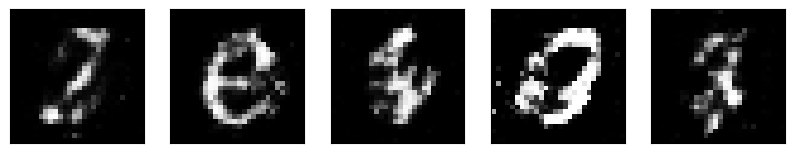

In [27]:
for epoch in range(250):
    D_running_loss = 0 # perda do discriminador
    G_running_loss = 0 # perda do gerador
    for i, (imagens_reais, _) in enumerate(train_loader): # carrega o dataset
        G.train()
        batch_size = imagens_reais.size(0)
        imagens_reais = imagens_reais * 2 - 1 # normaliza as imagens reais entre 0 e 1
        imagens_reais = imagens_reais.to(device)

        # Treinar o gerador
        G_optimizer.zero_grad()
        ruido = np.random.uniform(low=-1., high=1.,
                                  size=(batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        output_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.ones(batch_size).to(device)
        G_loss = criterion(output_falsas.view(*labels_falsas.shape),
                           labels_falsas)
        G_loss.backward()
        G_optimizer.step()

        # Treinar o discriminador
        D.train()
        D_optimizer.zero_grad()
        output_reais = D(imagens_reais) # espera-se que sejam reais
        labels_reais = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_reais = criterion(output_reais.view(*labels_reais.shape),
                                 labels_reais)

        ruido = np.random.uniform(-1, 1, (batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)

        imagens_falsas = G(ruido)
        output_falsas = D(imagens_falsas) #0
        labels_falsas = torch.zeros(batch_size).to(device) #0

        D_loss_falsas = criterion(output_falsas.view(*labels_falsas.shape),
                                  labels_falsas)

        D_loss = D_loss_reais + D_loss_falsas
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()

        #imprimir as perdas
        print(f"\r Epoch: {epoch + 1} batch: {i + 1} D_loss: {D_loss:.3f} G_loss: {G_loss:.3f} ")

    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)

    print(f"Epoch: {epoch} D_loss: {D_running_loss:.3f} G_loss: {G_running_loss:.3f} ")

    fig, ax = plt.subplots(1, 5, figsize=(10, 5))
    for i in range(5):
        ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28),
                     cmap="gray")
        ax[i].xaxis.set_visible(False)
        ax[i].yaxis.set_visible(False)
    plt.show()




## Etapa 7: Criação de novas imagens

In [28]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [29]:
ruido[1]

array([-0.80444128,  0.55718054,  0.60612438, -0.37654639,  0.07317465,
       -0.8555342 ,  0.75520087, -0.04092039, -0.92237301,  0.30250875,
       -0.096435  , -0.55799943, -0.99174357, -0.19880504, -0.6027034 ,
        0.49190572,  0.81500022, -0.62175486, -0.91984509,  0.14525477,
        0.28904356,  0.38265676, -0.91638551, -0.91300713, -0.71898509,
       -0.97510994, -0.46172743, -0.98926834,  0.97713315, -0.27053872,
        0.22271303,  0.35302665,  0.30852389,  0.47077553,  0.1080085 ,
        0.82431278, -0.93291474, -0.45884869,  0.79503113,  0.52715691,
        0.78116456, -0.34151898, -0.35976952, -0.8676782 , -0.16390615,
        0.57783011,  0.42888384,  0.87137503,  0.99681815,  0.7799571 ,
       -0.46504769, -0.50215859, -0.30292218, -0.96269476,  0.37270664,
       -0.98677074, -0.95971908,  0.37073285,  0.77713505, -0.32832163,
        0.99526962,  0.56832545,  0.8843526 , -0.56807888, -0.76236402,
        0.073806  , -0.5095775 , -0.58330197,  0.34984273,  0.71

In [30]:
ruido = torch.from_numpy(ruido).float().to(device)

In [31]:
type(ruido)

torch.Tensor

In [32]:
G.eval()

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [33]:
previsao = G(ruido)

In [34]:
previsao = previsao.cpu().detach().numpy()

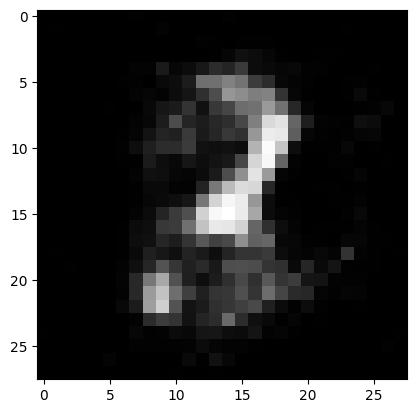

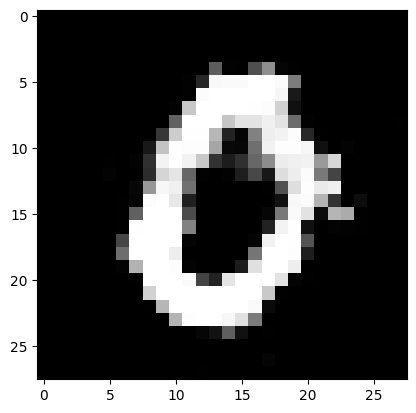

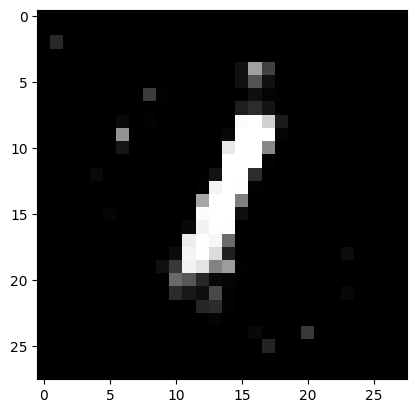

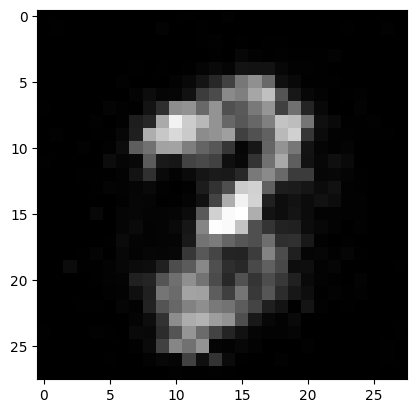

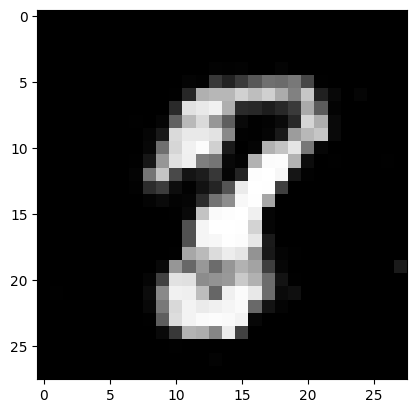

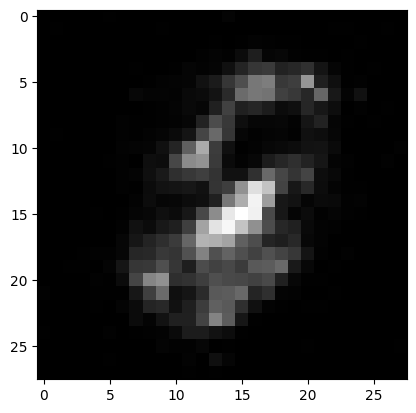

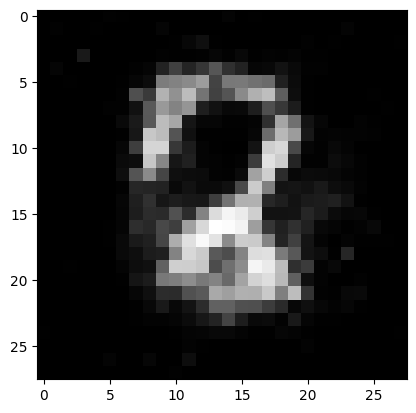

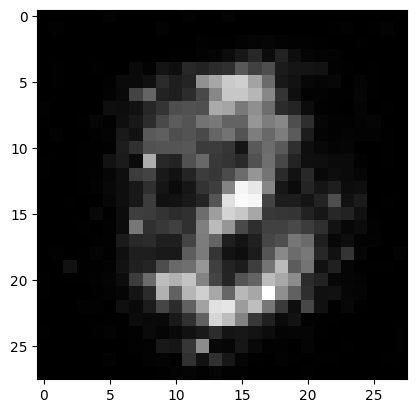

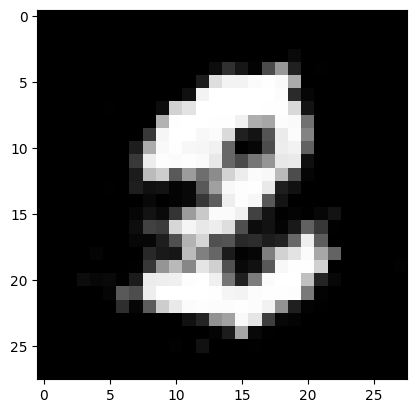

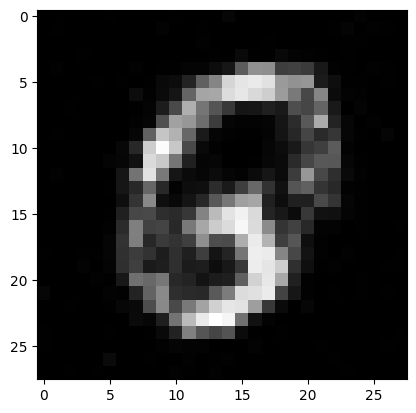

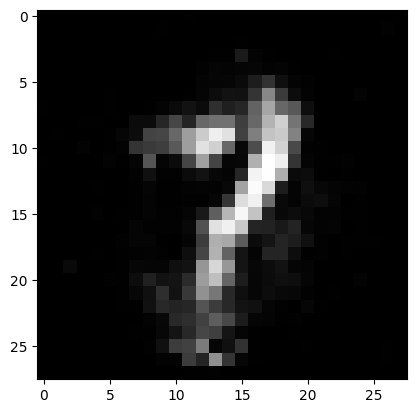

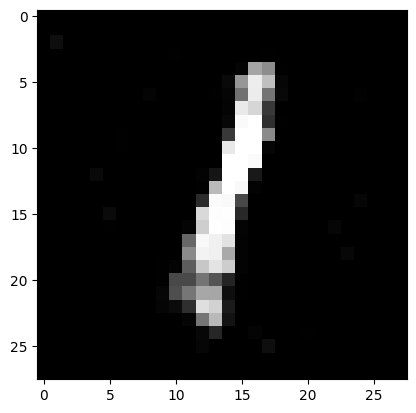

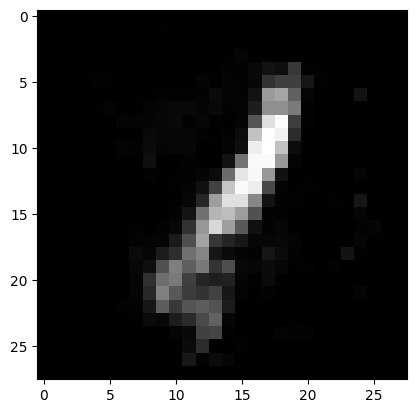

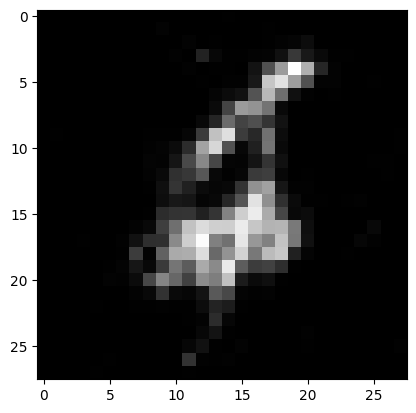

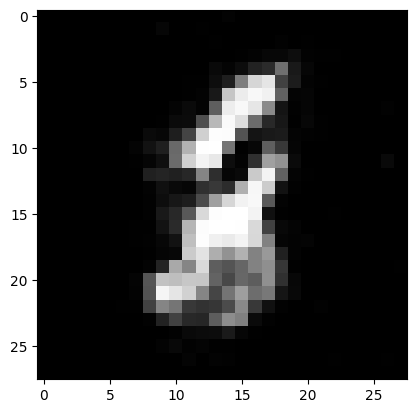

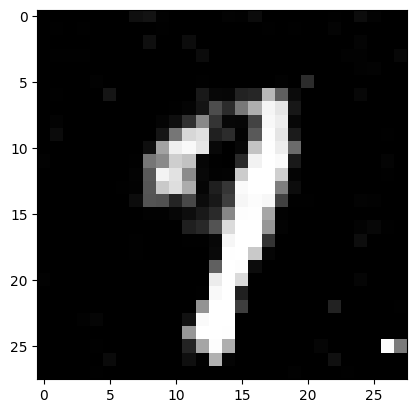

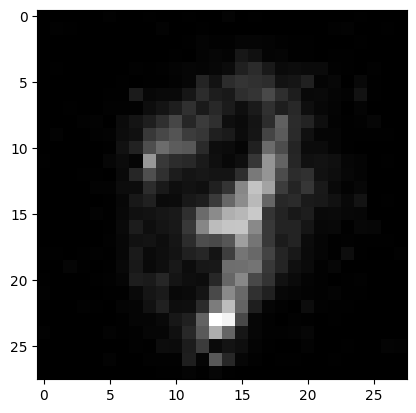

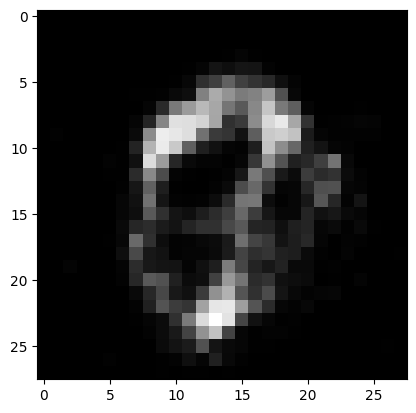

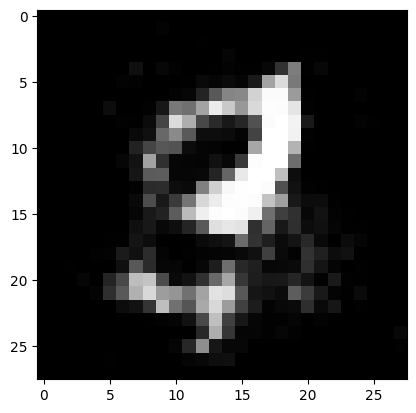

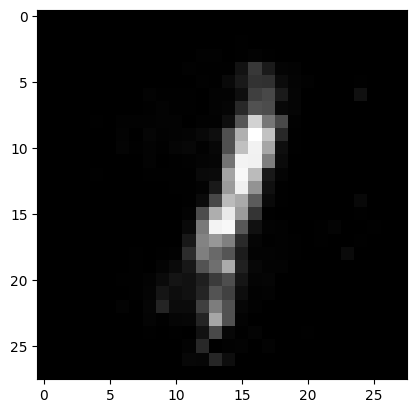

In [35]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap="gray")
  plt.show()